# Introduction

Mr Chukwudi and Sons Automobile require aid predicting the best price to sell cars. The company has recorded significant losses in the last 4 years because there is no scientific basis of determining the best price to sell his vehicles. They need an efficient Machine Learning algorithm developed to predict the best prices to sell the vehicles following 

In [1]:
#import the libraries needed to read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#train = pd.read_csv('train_car0408.csv',error_bad_lines=False, index_col=False, dtype='unicode')
train = pd.read_csv('train_car0408.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224537 entries, 0 to 224536
Data columns (total 19 columns):
ID                      224537 non-null int64
seller_type             224537 non-null object
country_of_use          224537 non-null object
scrapped_date           224537 non-null object
postal_code             224537 non-null object
car_name                224537 non-null object
car_type                196508 non-null object
year_of_registration    224537 non-null object
registration_month      224537 non-null object
horse_power             224537 non-null object
mileage                 224535 non-null float64
gas_type                208562 non-null object
car_brand               224537 non-null object
repair_status           187435 non-null object
gear_type               215454 non-null object
date_of_advert          224536 non-null object
last_advert_online      224535 non-null object
model                   214201 non-null object
naira_price             224535 non-null obj

We forced all columns to be of object type due to some bad data stored in some of the columns

error_bad_lines=False, index_col=False, dtype='unicode'

In [5]:
train.head()

ID seller_type country_of_use scrapped_date postal_code  \
0   1     private         london    24/03/2016       66954   
1   3     private         london    17/03/2016       91074   
2   4     private         london    31/03/2016       60437   
3   5     private         london    04/04/2016       33775   
4   8     private         london    17/03/2016       27472   

                                            car_name   car_type  \
0                               A5_Sportback_2.7_Tdi      coupé   
1                                 GOLF_4_1_4__3TÜRER  small car   
2                     Skoda_Fabia_1.4_TDI_PD_Classic  small car   
3  BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  limousine   
4  VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...  small car   

  year_of_registration registration_month horse_power   mileage  gas_type  \
0                 2013                  5         190  201125.0    diesel   
1                 2003                  6          75  241350.0  gasoline   
2                 2010                  7          69  144810.0    diesel   
3                 1997                 10         102  241350.0  gasoline   
4                 2000                  0         101  241350.0       NaN   

    car_brand repair_status gear_type date_of_advert last_advert_online  \
0        audi           Yes   manuell     24/03/2016         07/04/2016   
1  volkswagen            No   manuell     17/03/2016         17/03/2016   
2       skoda            No   manuell     31/03/2016         06/04/2016   
3         bmw           Yes   manuell     04/04/2016         06/04/2016   
4  volkswagen           NaN   manuell     17/03/2016         31/03/2016   

   model naira_price  
0    NaN     6588000  
1   golf      540000  
2  fabia     1296000  
3    3er      234000  
4   golf      359640

In [6]:
#Look at informtion about the data
print(train.info())
print("----------------------------------------------------")
train.isnull().sum() #check for data completeness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224537 entries, 0 to 224536
Data columns (total 19 columns):
ID                      224537 non-null int64
seller_type             224537 non-null object
country_of_use          224537 non-null object
scrapped_date           224537 non-null object
postal_code             224537 non-null object
car_name                224537 non-null object
car_type                196508 non-null object
year_of_registration    224537 non-null object
registration_month      224537 non-null object
horse_power             224537 non-null object
mileage                 224535 non-null float64
gas_type                208562 non-null object
car_brand               224537 non-null object
repair_status           187435 non-null object
gear_type               215454 non-null object
date_of_advert          224536 non-null object
last_advert_online      224535 non-null object
model                   214201 non-null object
naira_price             224535 non-null obj

ID                          0
seller_type                 0
country_of_use              0
scrapped_date               0
postal_code                 0
car_name                    0
car_type                28029
year_of_registration        0
registration_month          0
horse_power                 0
mileage                     2
gas_type                15975
car_brand                   0
repair_status           37102
gear_type                9083
date_of_advert              1
last_advert_online          2
model                   10336
naira_price                 2
dtype: int64

There are 224,537 cars in the dataset. We have 19 columns with information about the cars. 9 (Car, Gas, and Gear type, mileage, Status of car repair, date and last day of advert, Car model and naira price) of these columns have null data in them, which will need to be handled. 

In [7]:
# Check for duplicates
idsUnique = len(set(train.ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print(idsDupli)

#check two, we expect unique instances in Customer id to be equal to dataset size
print( "There are %s unique ids and the size of the dataset is %d " %(len(train.ID.unique()), len(train)))

0
There are 224537 unique ids and the size of the dataset is 224537 


## Univariate Analysis

In [8]:
categoricals = train.select_dtypes(np.object).columns
numericals = train.select_dtypes(np.number).columns
print(categoricals)
print(numericals)

Index(['seller_type', 'country_of_use', 'scrapped_date', 'postal_code',
       'car_name', 'car_type', 'year_of_registration', 'registration_month',
       'horse_power', 'gas_type', 'car_brand', 'repair_status', 'gear_type',
       'date_of_advert', 'last_advert_online', 'model', 'naira_price'],
      dtype='object')
Index(['ID', 'mileage'], dtype='object')


We can see that some of these columns are stored as categoricals when they should be nurmericals or datetimes.Let's fix that. But first let's remove the rows that have dirty data

In [9]:
corrupt_columns = ['postal_code','year_of_registration',
                   'registration_month',  'date_of_advert', 'last_advert_online','horse_power','naira_price']
for col in train.columns:
    print('----------------')
    print(col)
    print(train[col].unique())

----------------
ID
[     1      3      4 ... 335121 335122 335123]
----------------
seller_type
['private' 'kleinwagen' '07/03/2016 10:57' '13/03/2016 15:52'
 '20/03/2016 15:30' '24/03/2016 16:52' '27/03/2016 16:52'
 '25/03/2016 19:52' '26/03/2016 18:25' '09/03/2016 17:37']
----------------
country_of_use
['london' '2002' 'Land_Rover_Defender_110_Tdi' 'Mercedes_A_160_Automatik'
 'Auto_Mit_Tuev_und_Anhaengerkupplung' 'Mercedes_Benz_280SL_Pagode'
 'Renault_Clio_1.6_Automatik_RXE_Tuev_Neu'
 'Ford_Fiesta_1.25_SYNC_Edition_82PS__Unfallfrei_mit_Garantie'
 'Mercedes_Benz_CLA_200_Urban'
 'Skoda_Octavia_Combi_1.6_Ambiente""/Autogas_Diamantsilber_Metallic"']
----------------
scrapped_date
['24/03/2016' '17/03/2016' '31/03/2016' '04/04/2016' '26/03/2016'
 '07/04/2016' '21/03/2016' '20/03/2016' '23/03/2016' '27/03/2016'
 '13/03/2016' '18/03/2016' '07/03/2016' '08/03/2016' '29/03/2016'
 '25/03/2016' '28/03/2016' '01/04/2016' '30/03/2016' '15/03/2016'
 '22/03/2016' '10/03/2016' '05/03/2016' '11/03/

we can see there is dirty data in the dataframe, so we will need to handle that

In [10]:
dirty_words = ['benzin', '1997' ,'2000', '1994', '1970', '1999', '2014', '2013',
 'gasoline']
rgx = fr"(?i){'|'.join(dirty_words)}"
dirty_data = train[train.registration_month.str.contains(rgx, na=False)]
print("There are %s corrupted rows" %len(dirty_data)) #check how many rows
dirty_data

There are 9 corrupted rows


ID       seller_type  \
85886  128254        kleinwagen   
85887  128256  07/03/2016 10:57   
85888  128258  13/03/2016 15:52   
85889  128259  20/03/2016 15:30   
85890  128260  24/03/2016 16:52   
85891  128261  27/03/2016 16:52   
85892  128262  25/03/2016 19:52   
85893  128264  26/03/2016 18:25   
85894  128265  09/03/2016 17:37   

                                          country_of_use scrapped_date  \
85886                                               2002           NaT   
85887                        Land_Rover_Defender_110_Tdi           NaT   
85888                           Mercedes_A_160_Automatik           NaT   
85889                Auto_Mit_Tuev_und_Anhaengerkupplung           NaT   
85890                         Mercedes_Benz_280SL_Pagode           NaT   
85891            Renault_Clio_1.6_Automatik_RXE_Tuev_Neu           NaT   
85892  Ford_Fiesta_1.25_SYNC_Edition_82PS__Unfallfrei...           NaT   
85893                        Mercedes_Benz_CLA_200_Urban           NaT   
85894  Skoda_Octavia_Combi_1.6_Ambiente""/Autogas_Dia...           NaT   

      postal_code car_name car_type year_of_registration registration_month  \
85886          55   twingo   125000                    4             benzin   
85887     Angebot     9999     test                  suv               1997   
85888     Angebot     1980     test           kleinwagen               2000   
85889     Angebot      650     test            limousine               1994   
85890     Angebot   225000  control               cabrio               1970   
85891     Angebot     1499     test           kleinwagen               1999   
85892     Angebot    10900     test           kleinwagen               2014   
85893     Angebot    22900     test                coupe               2013   
85894        2008       10      102               241350           gasoline   

      horse_power  mileage          gas_type   car_brand repair_status  \
85886     renault      NaN  19/03/2016 00:00           0         51645   
85887     manuell    113.0          defender      150000            10   
85888   automatik    100.0          a_klasse      150000            10   
85889     manuell      0.0          c_klasse      150000             4   
85890   automatik    170.0            andere        5000             6   
85891   automatik     90.0              clio      150000             6   
85892     manuell     82.0            fiesta       40000             7   
85893     manuell    156.0            andere       50000             7   
85894       skoda      NaN           manuell  09/03/2016    15/03/2016   

              gear_type date_of_advert last_advert_online model  \
85886  19/03/2016 17:43            NaN                NaN   NaN   
85887            diesel     land_rover                 ja     0   
85888            benzin  mercedes_benz               nein     0   
85889            benzin  mercedes_benz               nein     0   
85890            benzin  mercedes_benz               nein     0   
85891            benzin        renault               nein     0   
85892            benzin           ford                 ja     0   
85893            benzin  mercedes_benz               nein     0   
85894           1440000        octavia                NaN   NaN   

            naira_price  
85886               NaN  
85887  07/03/2016 00:00  
85888  13/03/2016 00:00  
85889  20/03/2016 00:00  
85890  24/03/2016 00:00  
85891  27/03/2016 00:00  
85892  25/03/2016 00:00  
85893  26/03/2016 00:00  
85894               NaN

# Cleaning the train data 

In [11]:
#We will need to either unscramble the rows or drop them

print('before drop: ')
print(len(train))
cleaner_train = train[~train.registration_month.str.contains(rgx, na=False)]
print('after drop: ')
print(len(cleaner_train))
cleaner_train 


before drop: 
224537
after drop: 
224528


ID seller_type country_of_use scrapped_date postal_code  \
0            1     private         london    24/03/2016       66954   
1            3     private         london    17/03/2016       91074   
2            4     private         london    31/03/2016       60437   
3            5     private         london    04/04/2016       33775   
4            8     private         london    17/03/2016       27472   
5            9     private         london    26/03/2016       96224   
6           10     private         london    07/04/2016       57290   
7           13     private         london    21/03/2016        4177   
8           14     private         london    20/03/2016       65599   
9           15     private         london    23/03/2016       88361   
10          18     private         london    27/03/2016       68309   
11          19     private         london    23/03/2016       49716   
12          20     private         london    13/03/2016       35390   
13          21     private         london    18/03/2016       73765   
14          23     private         london    07/03/2016       12621   
15          25     private         london    08/03/2016       86199   
16          27     private         london    29/03/2016       37075   
17          28     private         london    25/03/2016       39179   
18          29     private         london    17/03/2016       67071   
19          31     private         london    28/03/2016       46483   
20          32     private         london    01/04/2016       10551   
21          34     private         london    30/03/2016       33649   
22          36     private         london    13/03/2016       59174   
23          37     private         london    17/03/2016       21073   
24          38     private         london    29/03/2016       84180   
25          39     private         london    15/03/2016       53604   
26          42     private         london    04/04/2016       35576   
27          43     private         london    30/03/2016       48691   
28          45     private         london    04/04/2016       34454   
29          46     private         london    29/03/2016       71083   
...        ...         ...            ...           ...         ...   
224507  335088     private         london    13/03/2016       30519   
224508  335089     private         london    22/03/2016       91301   
224509  335091     private         london    05/03/2016       17034   
224510  335092     private         london    26/03/2016        4107   
224511  335093     private         london    20/03/2016       53947   
224512  335095     private         london    11/03/2016       65936   
224513  335096     private         london    08/03/2016       24850   
224514  335097     private         london    21/03/2016       38470   
224515  335098     private         london    26/03/2016       34320   
224516  335099     private         london    01/04/2016       34414   
224517  335100     private         london    01/04/2016       90439   
224518  335101     private         london    07/03/2016       61169   
224519  335102     private         london    03/04/2016       58730   
224520  335104     private         london    16/03/2016       56472   
224521  335105     private         london    02/04/2016       23820   
224522  335106     private         london    11/03/2016       87700   
224523  335109     private         london    25/03/2016       90473   
224524  335111     private         london    04/04/2016       88477   
224525  335112     private         london    09/03/2016       18246   
224526  335113     private         london    04/04/2016       48653   
224527  335114     private         london    28/03/2016       75223   
224528  335115     private         london    02/04/2016       81825   
224529  335116     private         london    09/03/2016       51371   
224530  335117     private         london    19/03/2016       96465   
224531  335118     private         l

In [12]:
#NEW METHOD

important_columns = [ 'scrapped_date', 'postal_code', 'car_type',
       'horse_power', 'mileage', 'gas_type','date_of_advert', 'last_advert_online']

for col in dirty_data.columns:
    print('----------------')
    print(col)
    print('before replacement')
    print(dirty_data[col].unique())
    dirty_data[col][dirty_data[dirty_data.registration_month != cleaner_train[col].mode()[0]].index]=cleaner_train[col].mode()[0]
    print('after replacement')
    print(dirty_data[col].unique())



----------------
ID
before replacement
[128254 128256 128258 128259 128260 128261 128262 128264 128265]


/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:1079: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)
/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

after replacement
[1]
----------------
seller_type
before replacement
['kleinwagen' '07/03/2016 10:57' '13/03/2016 15:52' '20/03/2016 15:30'
 '24/03/2016 16:52' '27/03/2016 16:52' '25/03/2016 19:52'
 '26/03/2016 18:25' '09/03/2016 17:37']
after replacement
['private']
----------------
country_of_use
before replacement
['2002' 'Land_Rover_Defender_110_Tdi' 'Mercedes_A_160_Automatik'
 'Auto_Mit_Tuev_und_Anhaengerkupplung' 'Mercedes_Benz_280SL_Pagode'
 'Renault_Clio_1.6_Automatik_RXE_Tuev_Neu'
 'Ford_Fiesta_1.25_SYNC_Edition_82PS__Unfallfrei_mit_Garantie'
 'Mercedes_Benz_CLA_200_Urban'
 'Skoda_Octavia_Combi_1.6_Ambiente""/Autogas_Diamantsilber_Metallic"']
after replacement
['london']
----------------
scrapped_date
before replacement
['NaT']
after replacement
['03/04/2016']
----------------
postal_code
before replacement
['55' 'Angebot' '2008']
after replacement
[10115]
----------------
car_name
before replacement
['twingo' '9999' '1980' '650' '225000' '1499' '10900' '22900' '10']
after re

/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


after replacement
['gasoline']
----------------
car_brand
before replacement
['0' '150000' '5000' '40000' '50000' '09/03/2016']
after replacement
['volkswagen']
----------------
repair_status
before replacement
['51645' '10' '4' '6' '7' '15/03/2016']
after replacement
['No']
----------------
gear_type
before replacement
['19/03/2016 17:43' 'diesel' 'benzin' '1440000']
after replacement
['manuell']
----------------
date_of_advert
before replacement
[nan 'land_rover' 'mercedes_benz' 'renault' 'ford' 'octavia']
after replacement
['03/04/2016']
----------------
last_advert_online
before replacement
[nan 'ja' 'nein']
after replacement
['06/04/2016']
----------------
model
before replacement
[nan '0']
after replacement
['golf']
----------------
naira_price
before replacement
[nan '07/03/2016 00:00' '13/03/2016 00:00' '20/03/2016 00:00'
 '24/03/2016 00:00' '27/03/2016 00:00' '25/03/2016 00:00'
 '26/03/2016 00:00']
after replacement
[180000]


In [13]:
dirty_data

ID seller_type country_of_use scrapped_date  postal_code  car_name  \
85886   1     private         london    03/04/2016        10115  BMW_318i   
85887   1     private         london    03/04/2016        10115  BMW_318i   
85888   1     private         london    03/04/2016        10115  BMW_318i   
85889   1     private         london    03/04/2016        10115  BMW_318i   
85890   1     private         london    03/04/2016        10115  BMW_318i   
85891   1     private         london    03/04/2016        10115  BMW_318i   
85892   1     private         london    03/04/2016        10115  BMW_318i   
85893   1     private         london    03/04/2016        10115  BMW_318i   
85894   1     private         london    03/04/2016        10115  BMW_318i   

        car_type  year_of_registration  registration_month  horse_power  \
85886  limousine                  2007                   3            0   
85887  limousine                  2007                   3            0   
85888  limousine                  2007                   3            0   
85889  limousine                  2007                   3            0   
85890  limousine                  2007                   3            0   
85891  limousine                  2007                   3            0   
85892  limousine                  2007                   3            0   
85893  limousine                  2007                   3            0   
85894  limousine                  2007                   3            0   

        mileage  gas_type   car_brand repair_status gear_type date_of_advert  \
85886  241350.0  gasoline  volkswagen            No   manuell     03/04/2016   
85887  241350.0  gasoline  volkswagen            No   manuell     03/04/2016   
85888  241350.0  gasoline  volkswagen            No   manuell     03/04/2016   
85889  241350.0  gasoline  volkswagen            No   manuell     03/04/2016   
85890  241350.0  gasoline  volkswagen            No   manuell     03/04/2016   
85891  241350.0  gasoline  volkswagen            No   manuell     03/04/2016   
85892  241350.0  gasoline  volkswagen            No   manuell     03/04/2016   
85893  241350.0  gasoline  volkswagen            No   manuell     03/04/2016   
85894  241350.0  gasoline  volkswagen            No   manuell     03/04/2016   

      last_advert_online model  naira_price  
85886         06/04/2016  golf       180000  
85887         06/04/2016  golf       180000  
85888         06/04/2016  golf       180000  
85889         06/04/2016  golf       180000  
85890         06/04/2016  golf       180000  
85891         06/04/2016  golf       180000  
85892         06/04/2016  golf       180000  
85893         06/04/2016  golf       180000  
85894         06/04/2016  golf       180000

In [14]:
train.update(dirty_data)

In [15]:
for col in train.columns:
    print('----------------')
    print(col)
    print(train[col].unique())

----------------
ID
[1.00000e+00 3.00000e+00 4.00000e+00 ... 3.35121e+05 3.35122e+05
 3.35123e+05]
----------------
seller_type
['private']
----------------
country_of_use
['london']
----------------
scrapped_date
['24/03/2016' '17/03/2016' '31/03/2016' '04/04/2016' '26/03/2016'
 '07/04/2016' '21/03/2016' '20/03/2016' '23/03/2016' '27/03/2016'
 '13/03/2016' '18/03/2016' '07/03/2016' '08/03/2016' '29/03/2016'
 '25/03/2016' '28/03/2016' '01/04/2016' '30/03/2016' '15/03/2016'
 '22/03/2016' '10/03/2016' '05/03/2016' '11/03/2016' '09/03/2016'
 '12/03/2016' '02/04/2016' '16/03/2016' '14/03/2016' '03/04/2016'
 '05/04/2016' '19/03/2016' '06/03/2016' '06/04/2016']
----------------
postal_code
[66954 91074 60437 ... 56253 22965 95197]
----------------
car_name
['A5_Sportback_2.7_Tdi' 'GOLF_4_1_4__3TÜRER'
 'Skoda_Fabia_1.4_TDI_PD_Classic' ...
 'Smart_smart_leistungssteigerung_100ps' 'VW_Golf_Kombi_1_9l_TDI'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']
----------------
car_type
['coupé' 'small

In [16]:
print(train['repair_status'].unique())
train['repair_status'] = train['repair_status'].replace('nein','No')
train['repair_status'] = train['repair_status'].replace('ja','Yes')
train['repair_status'] = train['repair_status'].replace('51645','No')
train['repair_status'] = train['repair_status'].replace('15/03/2016','No')
print(train['repair_status'].unique())

['Yes' 'No' nan]
['Yes' 'No' nan]


In [17]:
print(train['gear_type'].unique())
train['gear_type'] = train['gear_type'].replace('19/03/2016 17:43','manuell')
print(train['gear_type'].unique())

['manuell' 'automatik' nan]
['manuell' 'automatik' nan]


In [18]:
print(train['registration_month'].unique())
train['registration_month'] = train['registration_month'].replace('gasoline',3)
print(train['registration_month'].unique())

[5 6 7 10 0 12 3 2 9 11 1 4 8 '12' '8' '7' '2' '5' '3' '0' '9' '6' '11'
 '10' '4' '1']
[5 6 7 10 0 12 3 2 9 11 1 4 8 '12' '8' '7' '2' '5' '3' '0' '9' '6' '11'
 '10' '4' '1']


In [19]:
#lets start with the datetime columns

#Convert columns to datetime
date_time = train[['scrapped_date','date_of_advert', 'last_advert_online']]

for col in date_time:
    print('Before conversion')
    print(train[col].dtype)
    train[col] = pd.to_datetime(train[col], format='%d/%m/%Y')
    print('After conversion')
    print(train[col].dtype)

Before conversion
object
After conversion
datetime64[ns]
Before conversion
object
After conversion
datetime64[ns]
Before conversion
object
After conversion
datetime64[ns]


In [20]:

categoricals = train.select_dtypes(np.object).columns
numericals = train.select_dtypes(np.number).columns
print(categoricals)
print(numericals)


Index(['seller_type', 'country_of_use', 'postal_code', 'car_name', 'car_type',
       'year_of_registration', 'registration_month', 'horse_power', 'gas_type',
       'car_brand', 'repair_status', 'gear_type', 'model', 'naira_price'],
      dtype='object')
Index(['ID', 'mileage'], dtype='object')


In [21]:
list_fix = ['horse_power', 'naira_price','year_of_registration', 'registration_month']

for i in list_fix:
    print('--------------')
    print(i)
    print(train[i].unique())

--------------
horse_power
[190 75 69 ... 1548 473 564]
--------------
naira_price
[6588000 540000 1296000 ... 4462200 8962200 3954600]
--------------
year_of_registration
[2013 2003 2010 1997 2000 2006 2007 2009 2004 2018 1992 2005 2001 2014
 2008 2002 1995 1999 2015 2012 1996 2011 1993 1998 2016 1970 1984 2017
 1994 1978 1985 1961 1983 1973 1989 1975 1987 1990 1969 1982 1986 1972
 1988 1991 1967 1947 1976 1981 1957 1980 1979 1965 1968 1971 1974 1977
 1966 1960 1963 1958 1964 1962 1953 1959 1951 1956 1954 1955 1952 '2005'
 '2018' '2009' '2011' '2000' '2007' '1999' '2006' '2001' '2010' '2016'
 '2008' '1994' '2015' '2012' '1998' '1995' '2002' '2004' '1992' '1959'
 '2003' '2014' '2013' '1983' '1990' '1996' '1991' '1997' '1993' '1987'
 '2017' '1974' '1980' '1969' '1989' '1986' '1985' '1978' '1972' '1984'
 '1977' '1981' '1968' '1988' '1979' '1971' '1965' '1975' '1976' '1982'
 '1954' '1973' '1961' '1966' '1967' '1970' '1960' '1962' '1964' '1958'
 '1963' '1957' '1953' '1956' '1955' 1949 1950

In [22]:
train['horse_power'] = train['horse_power'].replace('renault', 0)
print("After conversion")

After conversion


In [23]:
#now to convert to integers
print("Before conversion")
print(train[['horse_power', 'naira_price','year_of_registration', 'registration_month']].dtypes)

#coversion
train[['horse_power', 'naira_price','year_of_registration', 'registration_month']] = train[['horse_power', 'naira_price',
                                                                                            'year_of_registration', 'registration_month']].astype(int)
print("After conversion")
print(train[['horse_power', 'naira_price','year_of_registration', 'registration_month']].dtypes)

Before conversion
horse_power             object
naira_price             object
year_of_registration    object
registration_month      object
dtype: object
After conversion
horse_power             int64
naira_price             int64
year_of_registration    int64
registration_month      int64
dtype: object


In [24]:
train.dtypes

ID                             float64
seller_type                     object
country_of_use                  object
scrapped_date           datetime64[ns]
postal_code                     object
car_name                        object
car_type                        object
year_of_registration             int64
registration_month               int64
horse_power                      int64
mileage                        float64
gas_type                        object
car_brand                       object
repair_status                   object
gear_type                       object
date_of_advert          datetime64[ns]
last_advert_online      datetime64[ns]
model                           object
naira_price                      int64
dtype: object

In [25]:
#Now onto Null data

train.isnull().sum()
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
repair_status         37102  0.165238
car_type              28029  0.124830
gas_type              15975  0.071146
model                 10334  0.046024
gear_type              9083  0.040452
naira_price               0  0.000000
seller_type               0  0.000000
country_of_use            0  0.000000
scrapped_date             0  0.000000
postal_code               0  0.000000
car_name                  0  0.000000
horse_power               0  0.000000
year_of_registration      0  0.000000
registration_month        0  0.000000
mileage                   0  0.000000
car_brand                 0  0.000000
date_of_advert            0  0.000000
last_advert_online        0  0.000000
ID                        0  0.000000

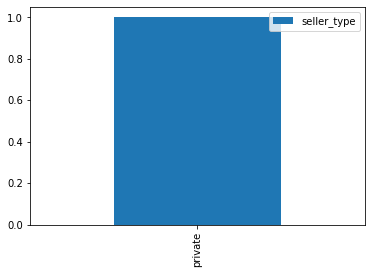

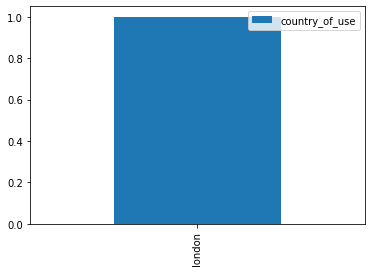

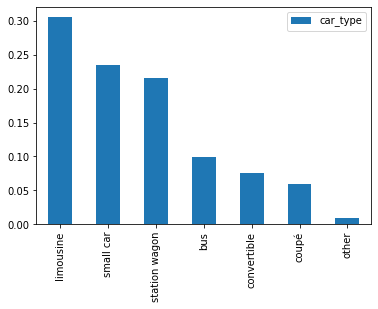

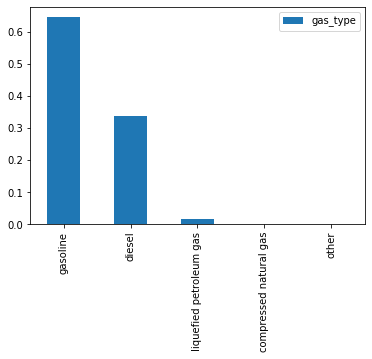

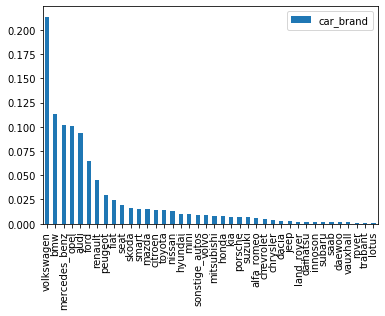

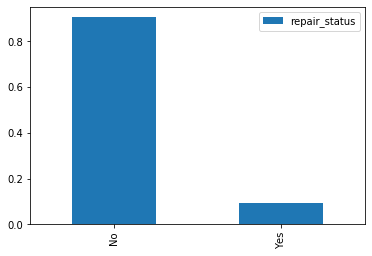

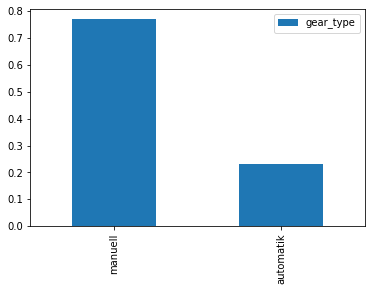

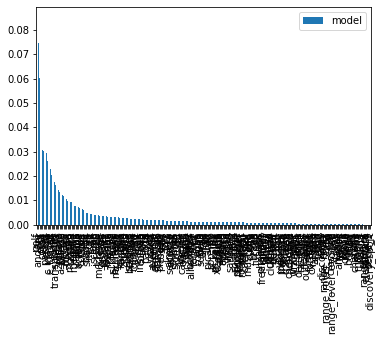

In [26]:
cols = ['seller_type', 'country_of_use', 
        'car_type','gas_type','car_brand','repair_status',
       'gear_type','model']
for col in cols:
    train[col].value_counts(50).plot(kind = 'bar', label='{}'.format(col))
    plt.legend();
    plt.show();

The cars are all sold by private dealers for use in London. We will drop seller type, country of use as they have only one information in them, therefore no variability.


'weblog_date','car_name','date_of_advert', 'last_advert_online', 'model'


### What is the most common car type in dataset?

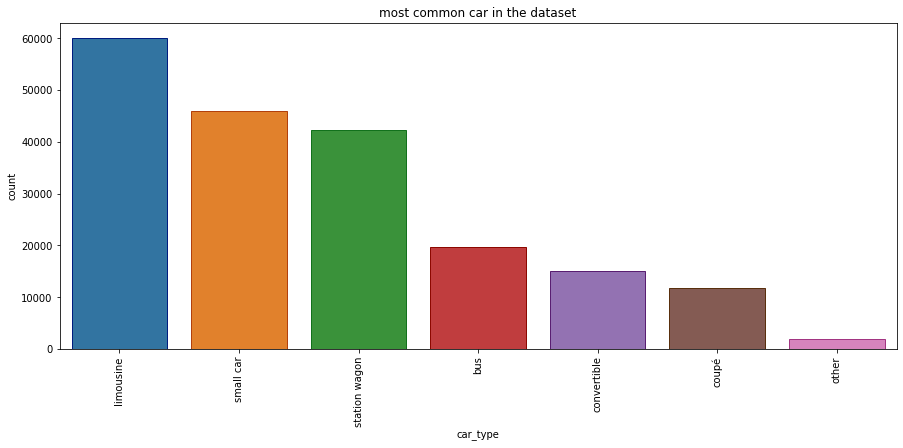

In [27]:
plt.subplots(figsize=(15,6))
sns.countplot('car_type',data=train,
              edgecolor=sns.color_palette('dark',7),
              order=train['car_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('most common car in the dataset')
plt.show()

Limuosines are the most common type of cars

### What is the most gas type in dataset?

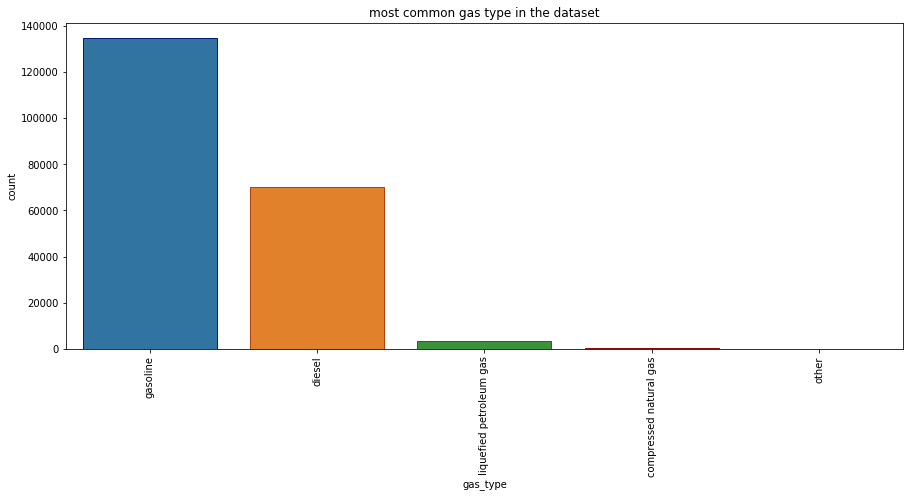

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot('gas_type',data=train,
              edgecolor=sns.color_palette('dark',7),
              order=train['gas_type'].value_counts(10).index)
plt.xticks(rotation=90)
plt.title('most common gas type in the dataset')
plt.show()

Gasoline is the most common gas type

###  What is the most common car brand in dataset?

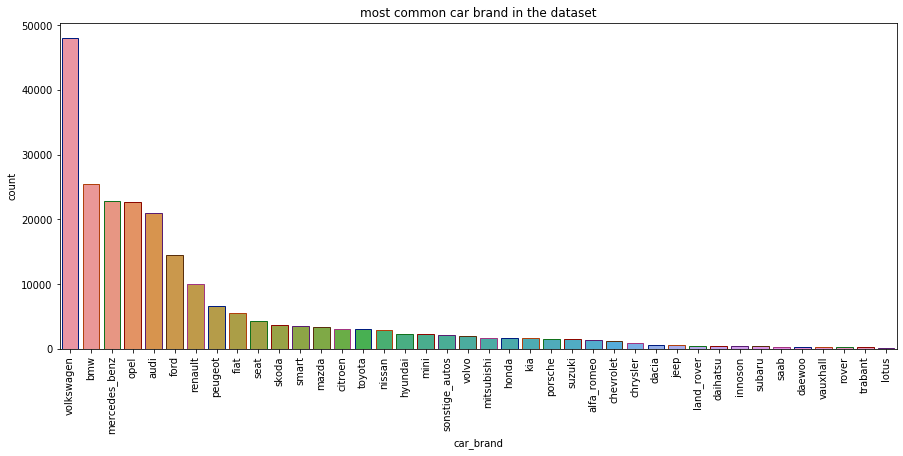

In [29]:
plt.subplots(figsize=(15,6))
sns.countplot('car_brand',data=train,
              edgecolor=sns.color_palette('dark',7),
              order=train['car_brand'].value_counts(10).index)
plt.xticks(rotation=90)
plt.title('most common car brand in the dataset')
plt.show()

Volkswagen, BMW, Merceds and Opel are the most common brand types

###  What is the repair state of the cars in dataset?

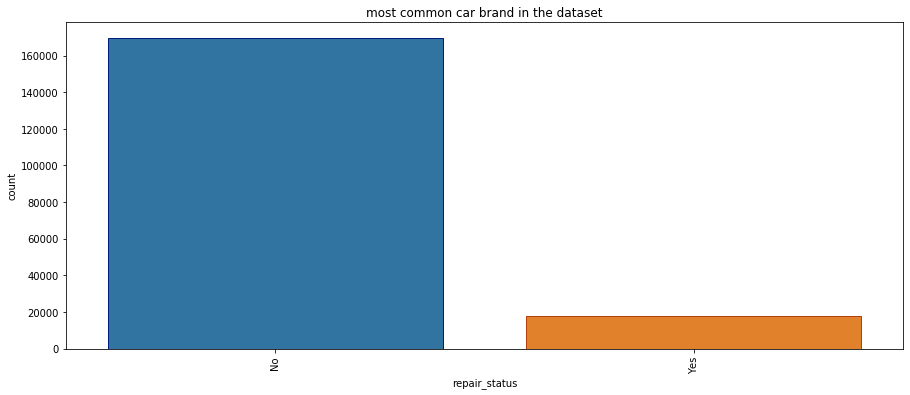

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot('repair_status',data=train,
              edgecolor=sns.color_palette('dark',7),
              order=train['repair_status'].value_counts(10).index)
plt.xticks(rotation=90)
plt.title('most common car brand in the dataset')
plt.show()

Most of the cars have not been repaired

###  What is the most common gear type of the cars in dataset?

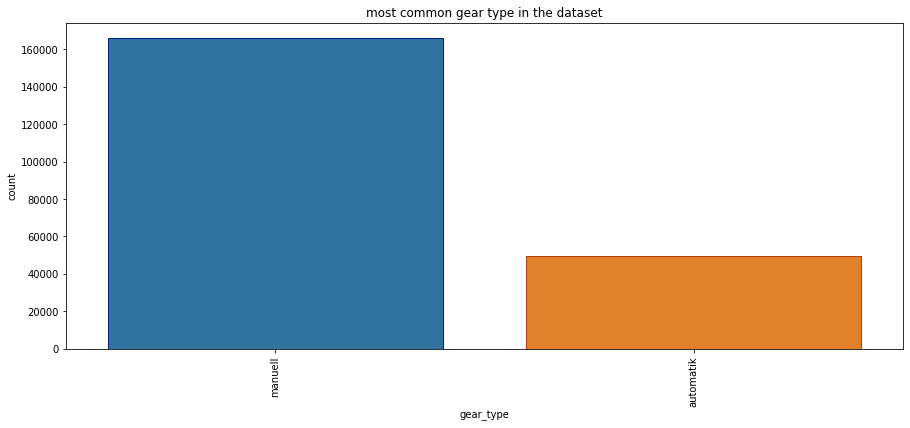

In [31]:
plt.subplots(figsize=(15,6))
sns.countplot('gear_type',data=train,
              edgecolor=sns.color_palette('dark',7),
              order=train['gear_type'].value_counts(10).index)
plt.xticks(rotation=90)
plt.title('most common gear type in the dataset')
plt.show()

Most of the cars use Manual

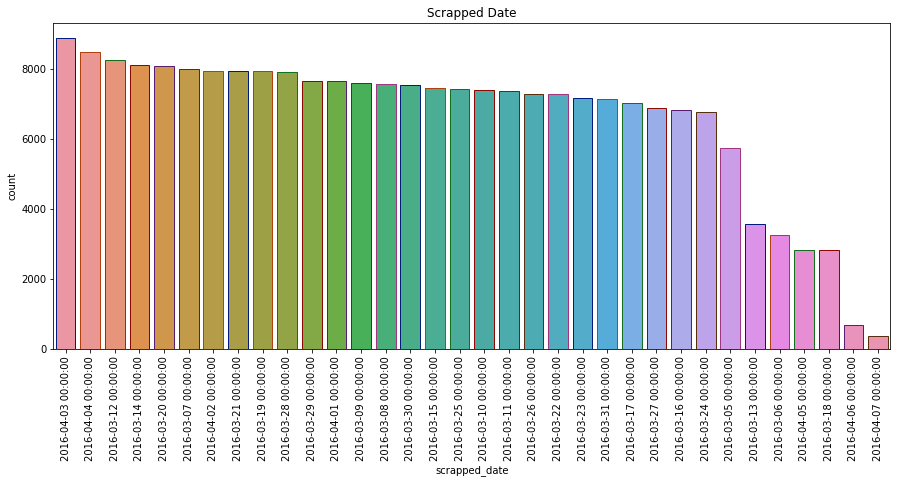

In [32]:
plt.subplots(figsize=(15,6))
sns.countplot('scrapped_date',data=train,
              edgecolor=sns.color_palette('dark',7),
              order=train['scrapped_date'].value_counts(10).index)
plt.xticks(rotation=90)
plt.title('Scrapped Date')
plt.show()

The information in the dataset was scrapped in 2016 in March and April

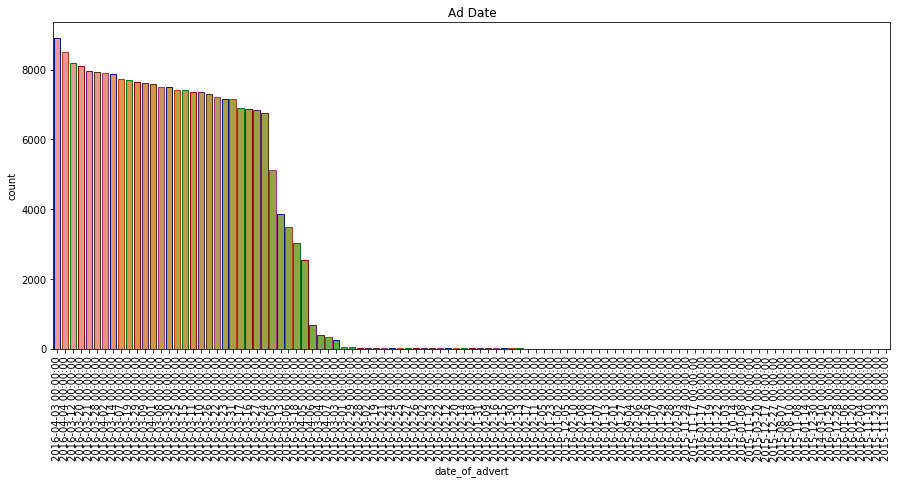

In [33]:
plt.subplots(figsize=(15,6))
sns.countplot('date_of_advert',data=train,
              edgecolor=sns.color_palette('dark',7),
              order=train['date_of_advert'].value_counts(10).index)
plt.xticks(rotation=90)
plt.title('Ad Date')
plt.show()

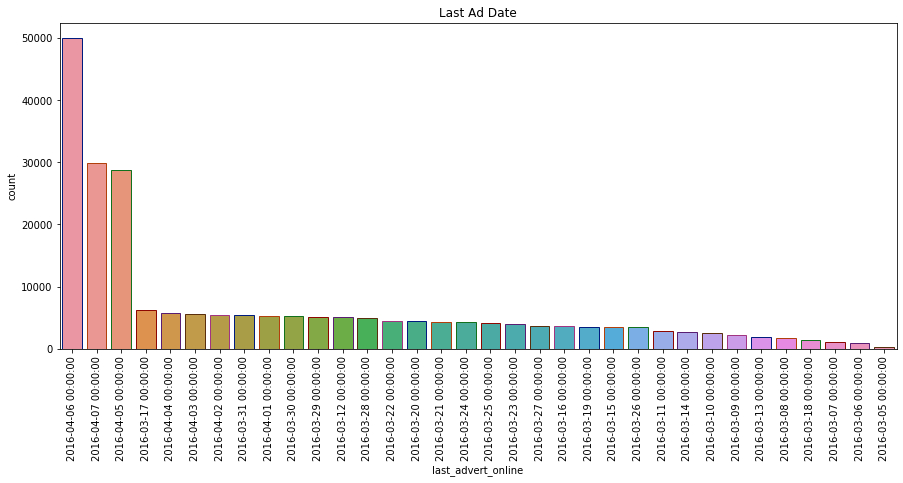

In [34]:
plt.subplots(figsize=(15,6))
sns.countplot('last_advert_online',data=train,
              edgecolor=sns.color_palette('dark',7),
              order=train['last_advert_online'].value_counts(10).index)
plt.xticks(rotation=90)
plt.title('Last Ad Date')
plt.show()

In [35]:
train.columns

Index(['ID', 'seller_type', 'country_of_use', 'scrapped_date', 'postal_code',
       'car_name', 'car_type', 'year_of_registration', 'registration_month',
       'horse_power', 'mileage', 'gas_type', 'car_brand', 'repair_status',
       'gear_type', 'date_of_advert', 'last_advert_online', 'model',
       'naira_price'],
      dtype='object')

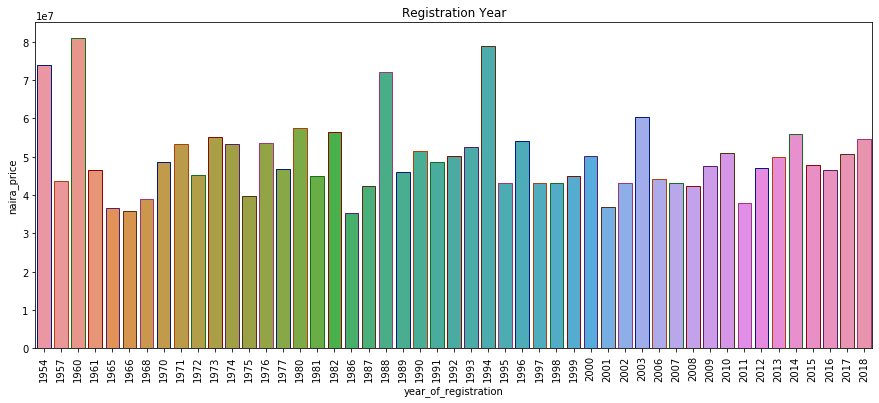

In [36]:
data = train.nlargest(200, 'naira_price').sort_values('naira_price',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x='year_of_registration', y="naira_price",
            data=data,edgecolor=sns.color_palette('dark',7), ci=None
           )
plt.xticks(rotation=90)
plt.title('Registration Year')
plt.show()

In [37]:
train.describe()

ID  year_of_registration  registration_month    horse_power  \
count  224537.00000         224537.000000       224537.000000  224537.000000   
mean   167609.07764           2005.738912            5.927638     120.702869   
std     96785.43509              7.257842            3.632739     193.571608   
min         1.00000           1947.000000            0.000000       0.000000   
25%     83887.00000           2002.000000            3.000000      75.000000   
50%    167638.00000           2006.000000            6.000000     110.000000   
75%    251452.00000           2010.000000            9.000000     150.000000   
max    335123.00000           2018.000000           12.000000   20000.000000   

             mileage   naira_price  
count  224537.000000  2.245370e+05  
mean   201441.515897  2.262530e+06  
std     63833.095071  3.090284e+06  
min      8045.000000  1.800000e+05  
25%    160900.000000  5.400000e+05  
50%    241350.000000  1.260000e+06  
75%    241350.000000  2.844000e+06  
max    241350.000000  8.568000e+07

- Registration year: 
    Range from 1947 to 2018.
    We can get the age of the car from this column
    
    
- Registration month: 
    Range from 0 to 12 ? Whcih doesnt make any sense as there is no month number that corresponds to 0. We will need to remove it from the dataset. Horse power: We can see it ranges from 0 to 20,000. 
    
    
- Horsepowers cannot be realisticlly 0 so we will have to fix that. 



- Mileage : 
    range from 8045 to 241,350
    
    
    
- Naira Price:
    Range from 180000 to 8,820,000,000 



In [38]:
#Let us get the age of the car from Year of registration - today's year
train['age'] = pd.to_datetime('today').year - train.year_of_registration
train['age'].head(4) #check

0     6
1    16
2     9
3    22
Name: age, dtype: int64

age


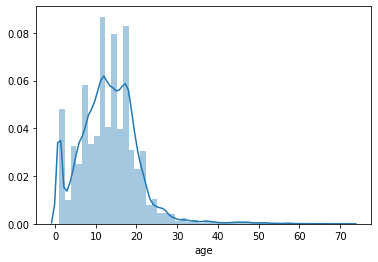

registration_month


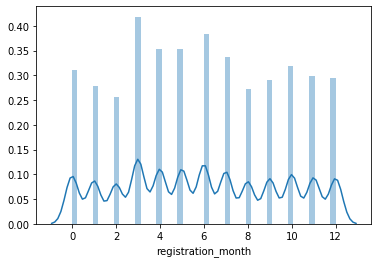

horse_power


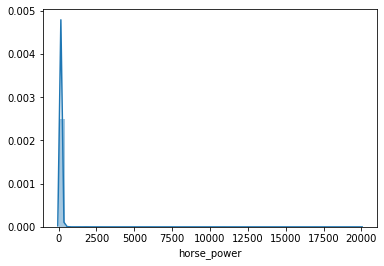

mileage


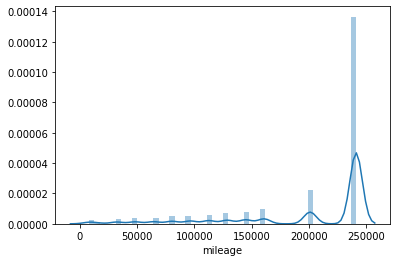

naira_price


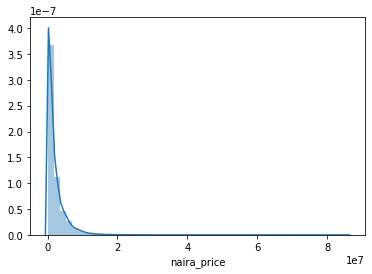

In [39]:
#numericals = train.select_dtypes(np.number).columns
numericals = ['age',
       'registration_month', 'horse_power', 'mileage', 'naira_price']
for col in numericals:
    #train[col].hist()
    sns.distplot(train[col])
    print(col)
    plt.show();

- None of the features are normally distributed
- There seems to be a lot of cars with 0 Horsepower, which does not realistically makes sense and will need to be handled. 
- Most of the cars in the dataset are used judging the mileage distibution count


## Multivariate Analysis

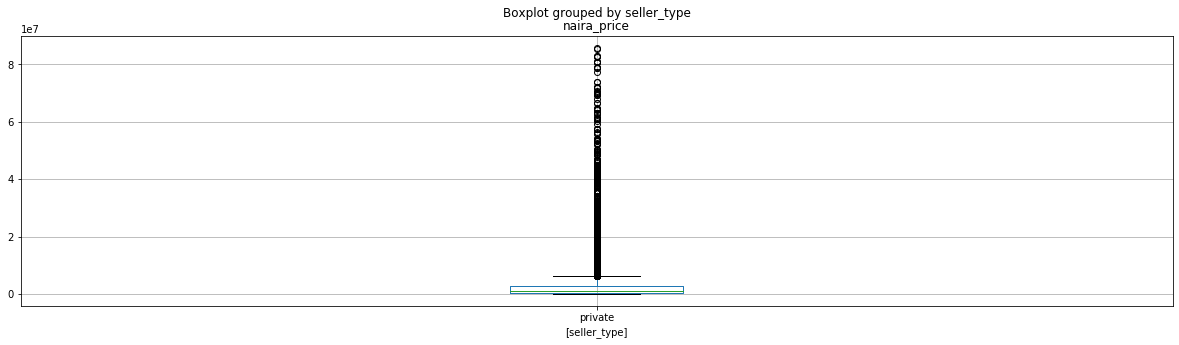

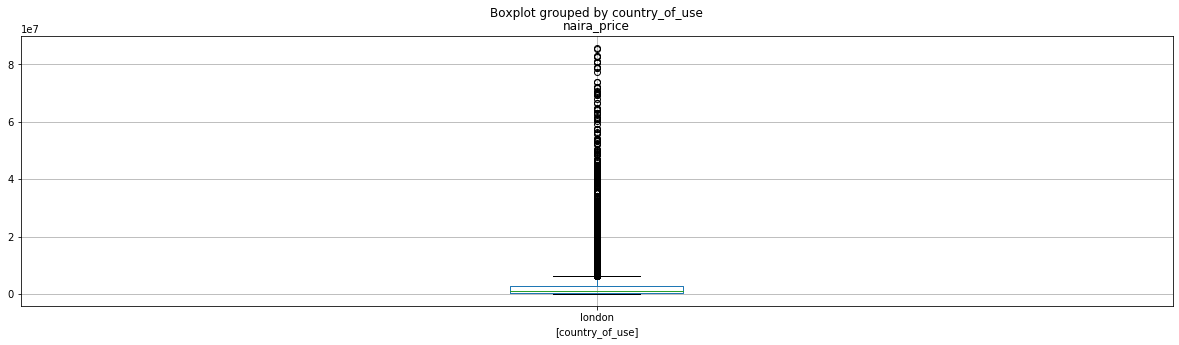

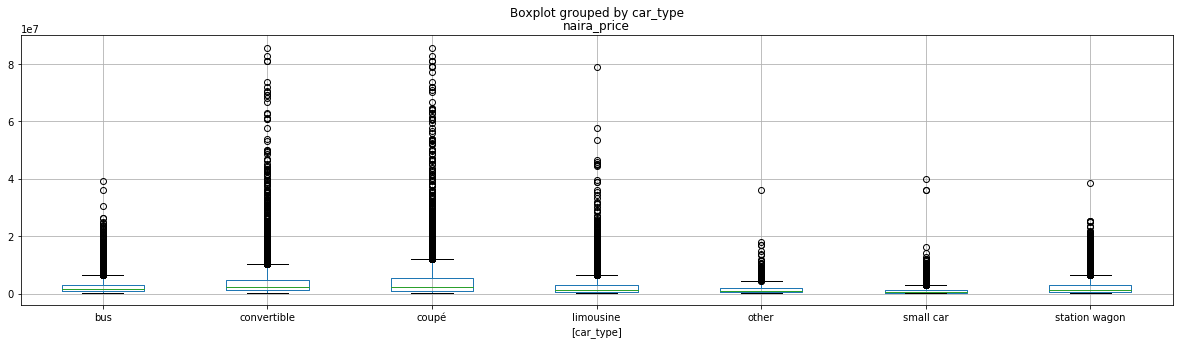

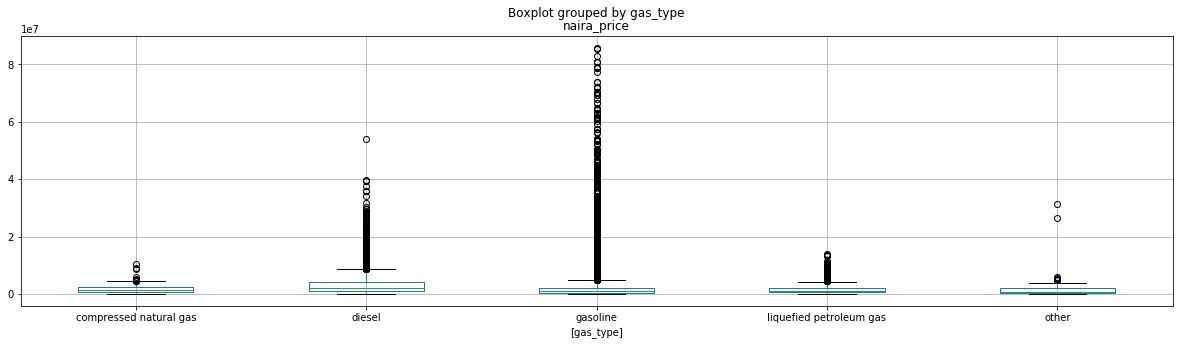

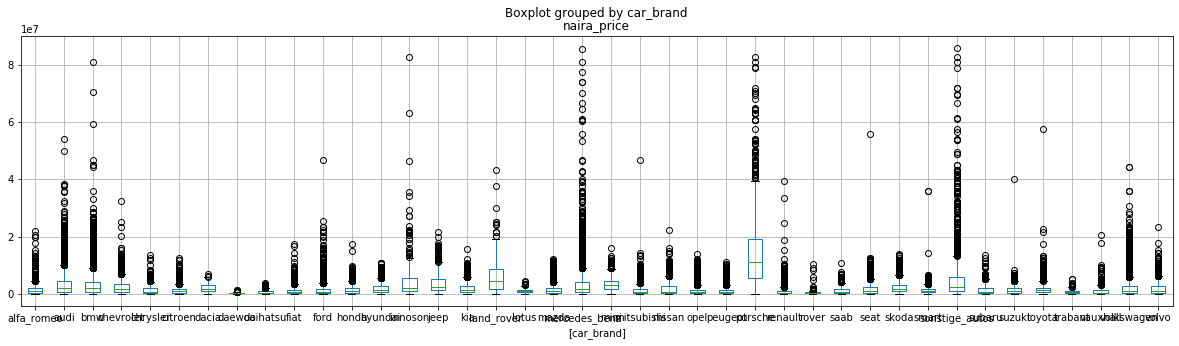

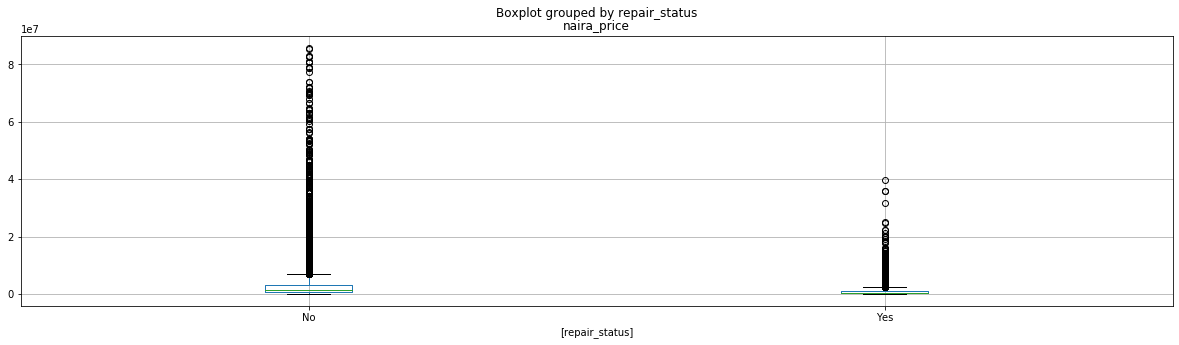

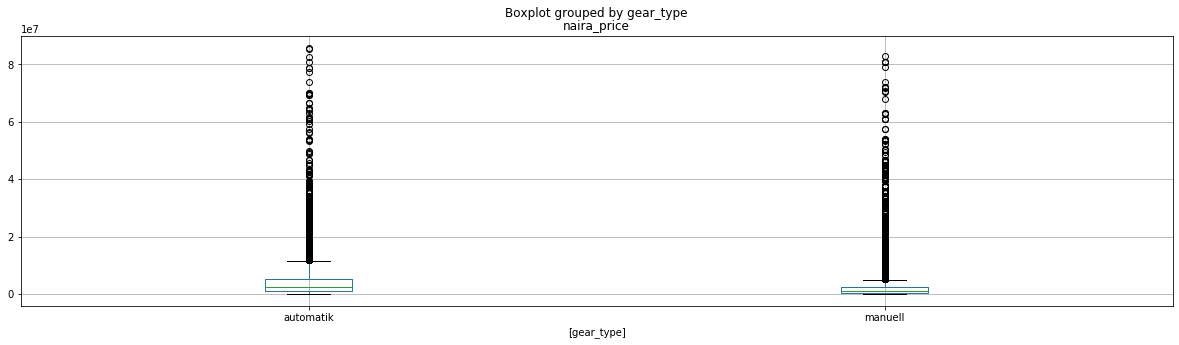

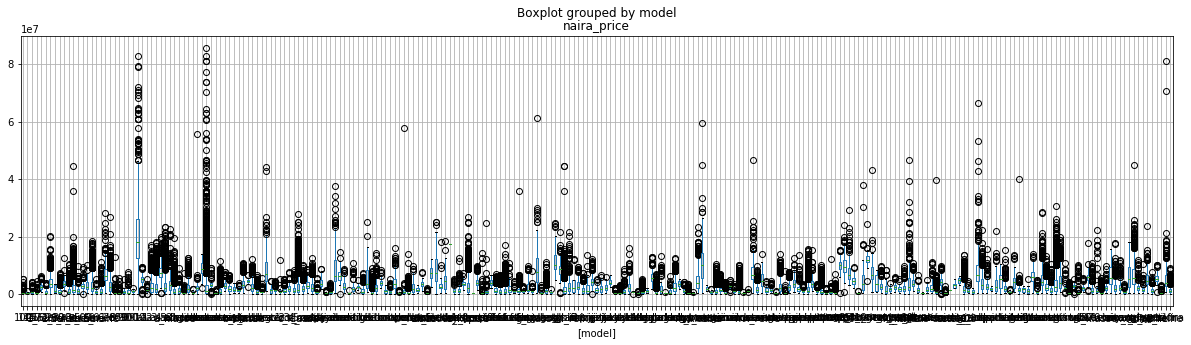

In [40]:
for col in cols:
    train.boxplot(column = 'naira_price', by= [col], figsize = (20, 5));
    plt.show();

Using the boxplot it is a bit hard to see if some of the features have variabilty in them in regards to their price. However we can see variability in:
- car type
- gas type
- car brand
- status of car repair
- gear type

# Handling Missing Data

In [41]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
repair_status         37102  0.165238
car_type              28029  0.124830
gas_type              15975  0.071146
model                 10334  0.046024
gear_type              9083  0.040452
age                       0  0.000000
year_of_registration      0  0.000000
seller_type               0  0.000000
country_of_use            0  0.000000
scrapped_date             0  0.000000
postal_code               0  0.000000
car_name                  0  0.000000
horse_power               0  0.000000
registration_month        0  0.000000
naira_price               0  0.000000
mileage                   0  0.000000
car_brand                 0  0.000000
date_of_advert            0  0.000000
last_advert_online        0  0.000000
ID                        0  0.000000

### **1.** Input Null values with mode

In [42]:
#make a new dataframe to store result of approach 1
train_mode = train.copy()
train_mode['repair_status'].fillna(train_mode['repair_status'].mode()[0], inplace=True)
train_mode['car_type'].fillna(train_mode['car_type'].mode()[0], inplace=True)
train_mode['gas_type'].fillna(train_mode['gas_type'].mode()[0], inplace=True)
train_mode['gear_type'].fillna(train_mode['gear_type'].mode()[0], inplace=True)
train_mode['model'].fillna(train_mode['model'].mode()[0], inplace=True)

In [43]:
total = train_mode.isnull().sum().sort_values(ascending=False)
percent = (train_mode.isnull().sum()/train_mode.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
age                       0      0.0
naira_price               0      0.0
seller_type               0      0.0
country_of_use            0      0.0
scrapped_date             0      0.0
postal_code               0      0.0
car_name                  0      0.0
car_type                  0      0.0
year_of_registration      0      0.0
registration_month        0      0.0
horse_power               0      0.0
mileage                   0      0.0
gas_type                  0      0.0
car_brand                 0      0.0
repair_status             0      0.0
gear_type                 0      0.0
date_of_advert            0      0.0
last_advert_online        0      0.0
model                     0      0.0
ID                        0      0.0

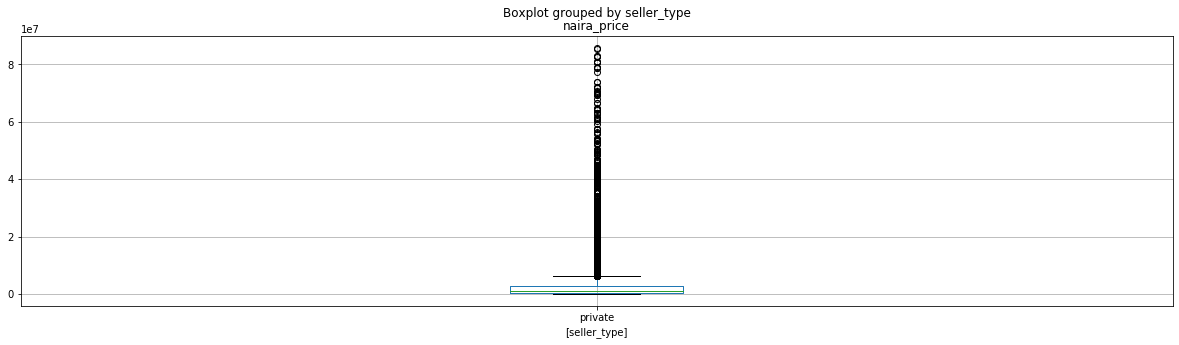

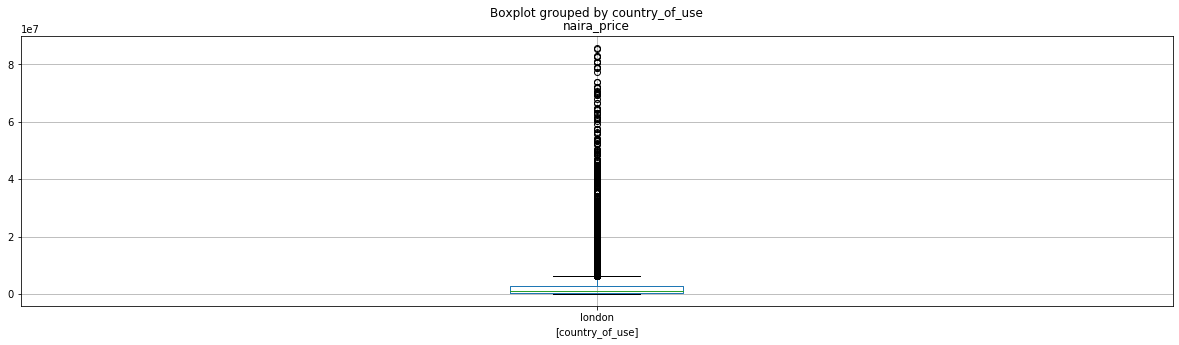

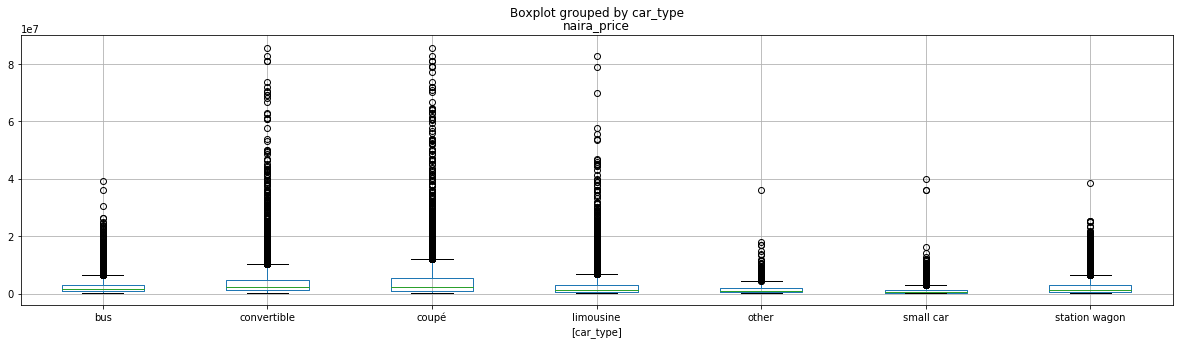

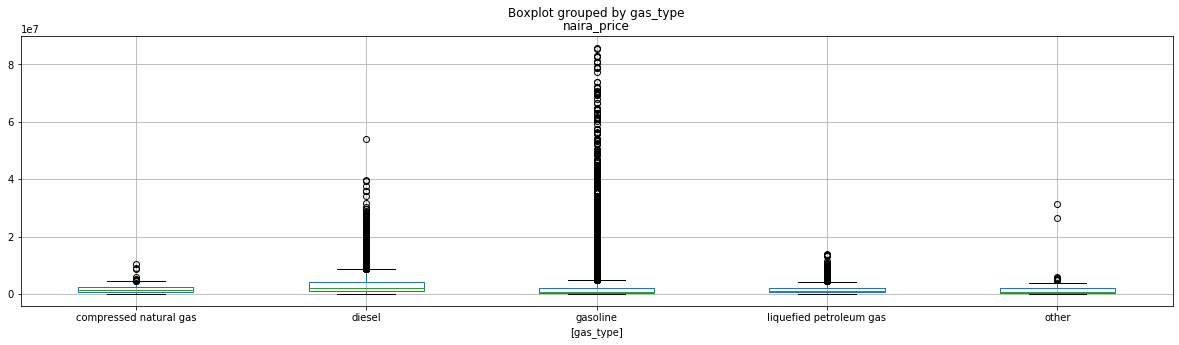

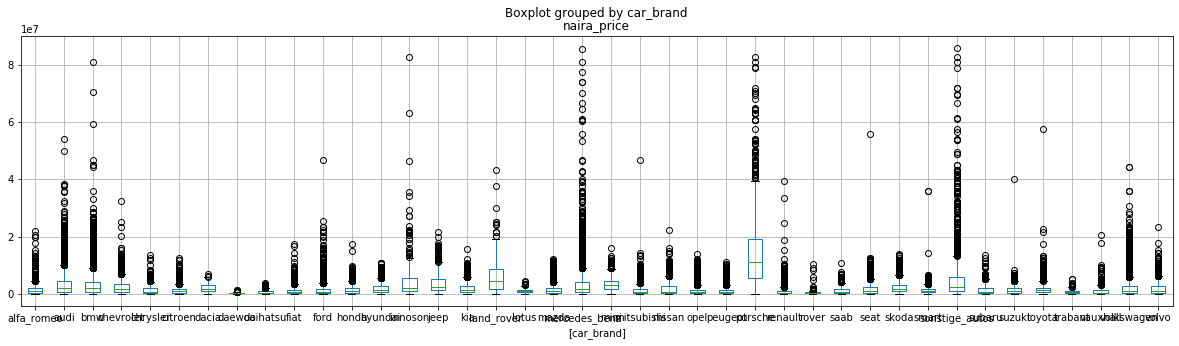

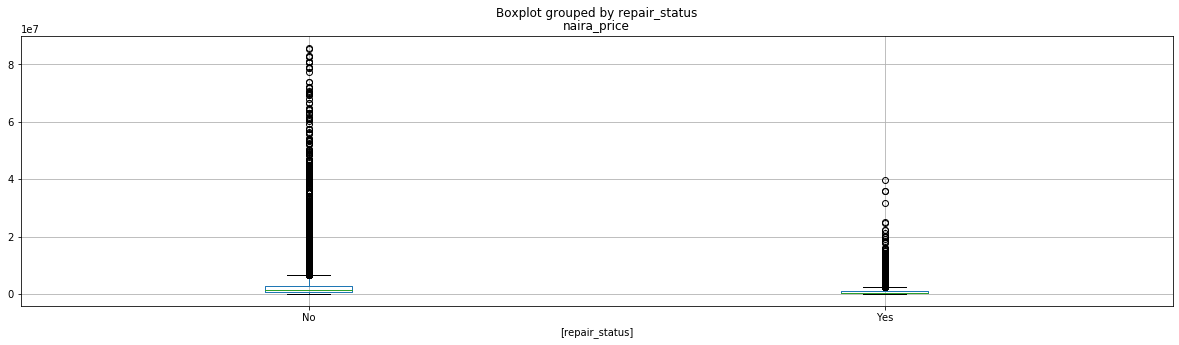

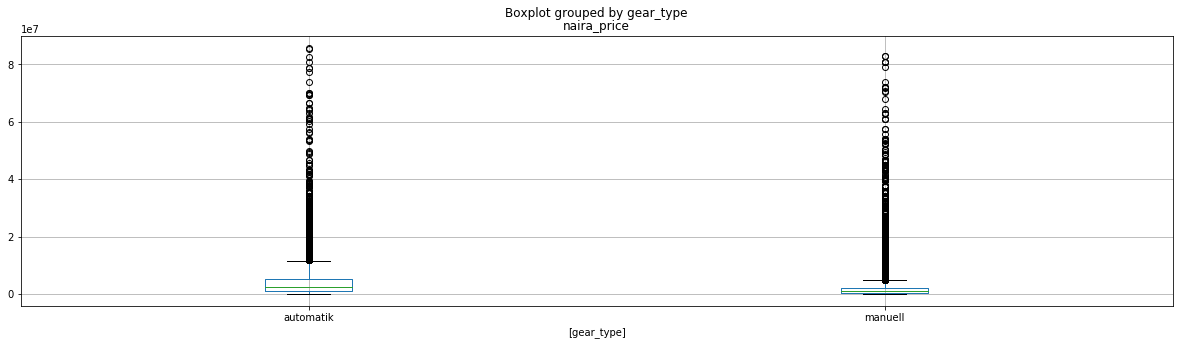

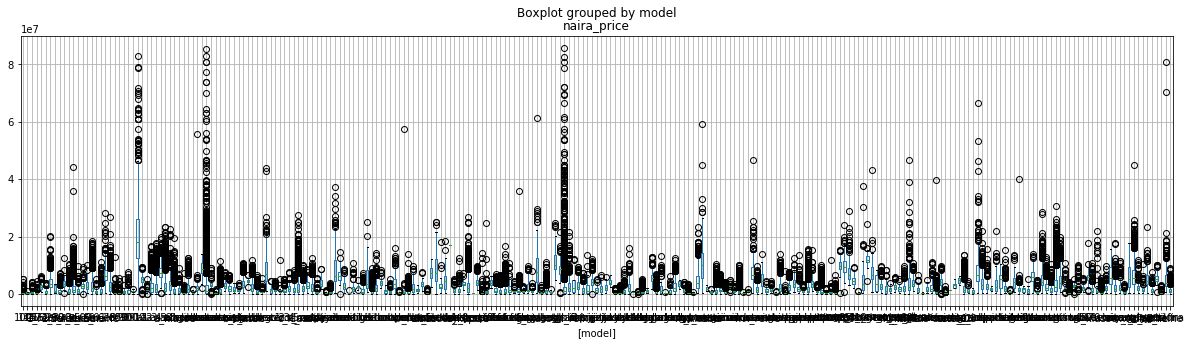

In [44]:
for col in cols:
    train_mode.boxplot(column = 'naira_price', by= [col], figsize = (20, 5));
    plt.show();

Using the boxplot it is a bit hard to see if the features have variabilty in them in regards to their price 

We can see features that may have good predictive power for the Car price
- Car type
- Gas type
- Car brand
- Car repair
- Gear Type


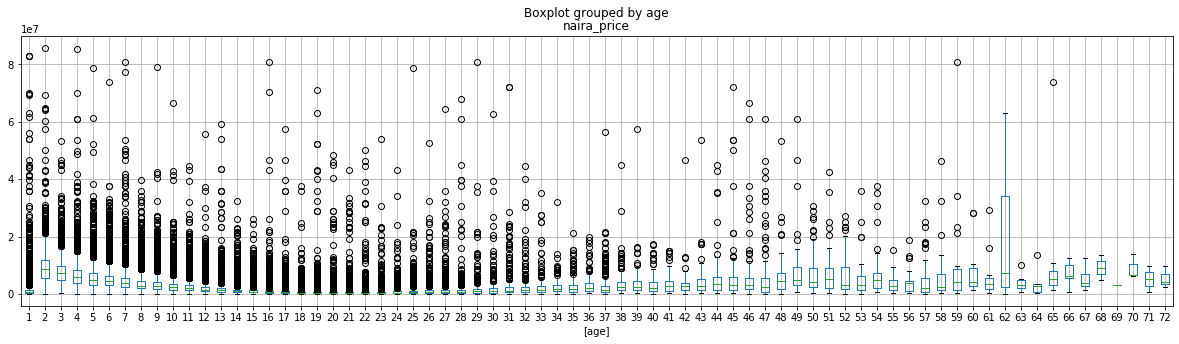

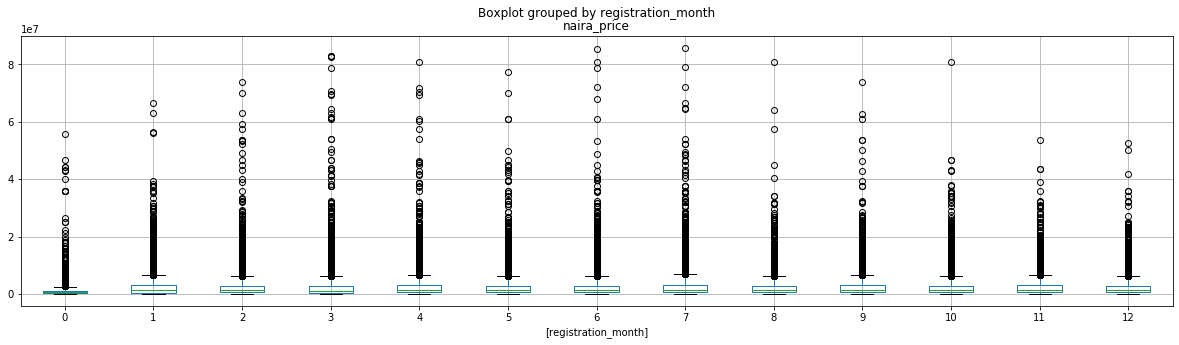

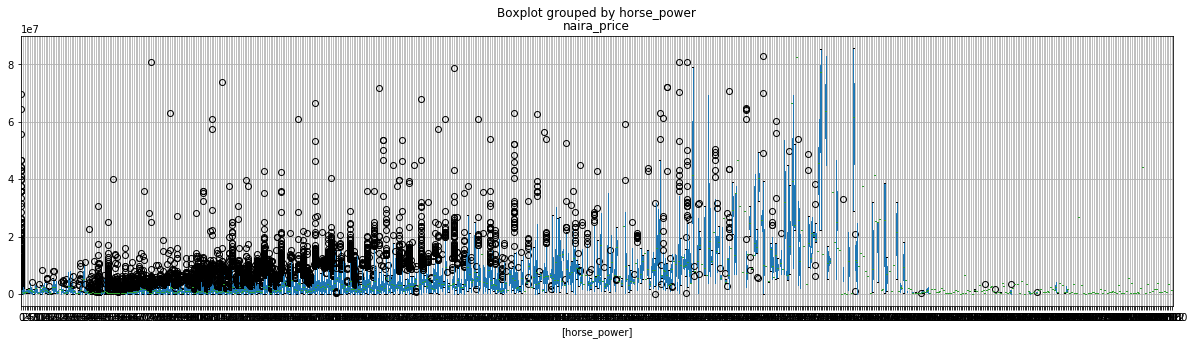

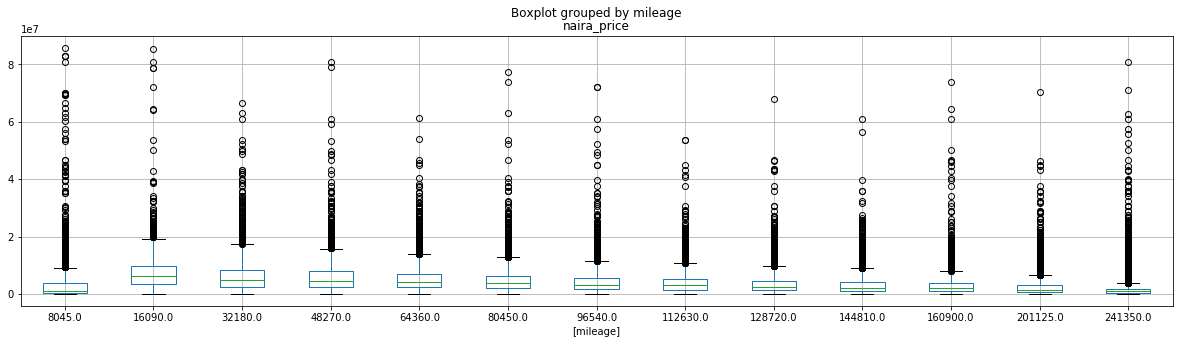

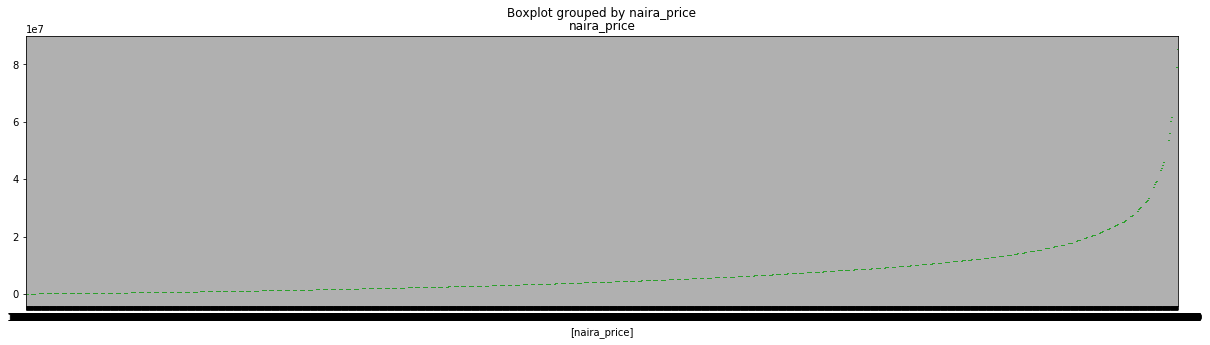

In [45]:
for col in numericals:
    train_mode.boxplot(column = 'naira_price', by= [col], figsize = (20, 5));
    plt.show();

Using the boxplot it is a bit hard to see if the features have variabilty in them in regards to their price 
We can see features that may have good predictive power for the Car price
- Age
- Registration month
- mileage

We might need to group 
- the Age column 
- the registration month columns
- the horse power group
to better expose the information
We might need 

In [46]:

train_mode['horse_power']= train_mode.horse_power.mask(train_mode['horse_power']== 0,
                                                       train_mode['horse_power'].median())


count    224537.000000
mean        130.249491
std         190.064048
min           1.000000
25%          90.000000
50%         110.000000
75%         150.000000
max       20000.000000
Name: horse_power, dtype: float64


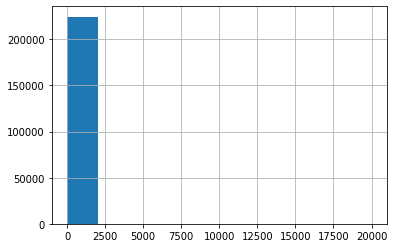

In [47]:
print(train_mode['horse_power'].describe())
train_mode['horse_power'].hist();

In [48]:
train_mode['horse_power'].unique()

array([  190,    75,    69,   102,   101,   105,   140,   136,   231,
          90,   118,   193,    99,    60,   218,   122,   110,   129,
         306,    95,    61,   177,   109,   170,    55,   143,    64,
         160,   150,    50,   156,    80,    82,   204,   185,    87,
         113,    86,   131,   163,   224,   200,   178,   265,    77,
          54,   286,   116,   184,   126,   194,   115,   305,   197,
         120,   179,   235,    88,   313,    41,    45,   125,   165,
          98,   130,    56,   326,   201,   213,   107,    83,   174,
         100,   220,    73,    68,    66,   299,    74,    52,   510,
         147,   310,    97,    65,   295,   203,     5,   144,    58,
         300,    85,   245,   258,    84,   292,   239,   320,    63,
          81,   148,    70,   145,   180,   260,   457,   104,   409,
         250,   188,   114,   117,   192,   155,    39,   272,    92,
          51,   135,    59,   230,   435,   209,    67,   344,    72,
         249,   103,

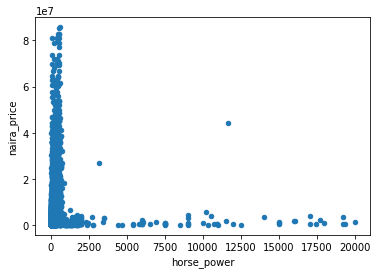

In [49]:
train_mode.plot(kind = 'scatter',x = 'horse_power', y ='naira_price');

In [50]:
#input 0s in mregoistration month with mode
train_mode['registration_month']= train_mode.registration_month.mask(train_mode['registration_month']== 0,
                                                       3.0)



In [51]:
train_mode.registration_month.value_counts()

3     39286
6     20681
4     19031
5     19016
7     18172
10    17159
11    16071
12    15919
9     15712
1     14977
8     14674
2     13839
Name: registration_month, dtype: int64

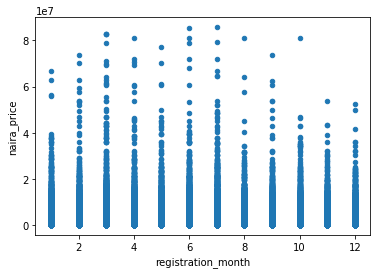

In [52]:
train_mode.plot(kind = 'scatter',x = 'registration_month', y ='naira_price');

# Preprocessing

In [53]:
#changing categoricals into numbers

train_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224537 entries, 0 to 224536
Data columns (total 20 columns):
ID                      224537 non-null float64
seller_type             224537 non-null object
country_of_use          224537 non-null object
scrapped_date           224537 non-null datetime64[ns]
postal_code             224537 non-null object
car_name                224537 non-null object
car_type                224537 non-null object
year_of_registration    224537 non-null int64
registration_month      224537 non-null int64
horse_power             224537 non-null int64
mileage                 224537 non-null float64
gas_type                224537 non-null object
car_brand               224537 non-null object
repair_status           224537 non-null object
gear_type               224537 non-null object
date_of_advert          224537 non-null datetime64[ns]
last_advert_online      224537 non-null datetime64[ns]
model                   224537 non-null object
naira_price         

In [54]:
brandprice = train_mode[['car_brand','naira_price']].sample(1000)

In [59]:
pd.crosstab(train_mode.brand_cat, train_mode.naira_price, normalize = 'index')

naira_price    180000    180360    181800    183600    185400    186120    \
brand_cat                                                                   
budget         0.007759  0.000000  0.000000  0.000000  0.000000  0.000000   
budget_plus    0.009427  0.000000  0.000000  0.000000  0.000000  0.000000   
mid_minus      0.026822  0.000037  0.000018  0.000055  0.000037  0.000000   
mid_plus       0.017569  0.000000  0.000000  0.000035  0.000000  0.000000   
mid_range      0.023632  0.000044  0.000000  0.000044  0.000000  0.000000   
other          0.018966  0.000431  0.000431  0.000000  0.000000  0.000000   
premium        0.007654  0.000000  0.000000  0.000042  0.000000  0.000014   
premium_minus  0.016102  0.000000  0.000000  0.000000  0.000000  0.000000   

naira_price    186840    187200    187920    188280    ...  72000000  \
brand_cat                                              ...             
budget         0.000000  0.000000  0.000000  0.000000  ...  0.000000   
budget_plus    0.000000  0.000000  0.000000  0.000000  ...  0.000000   
mid_minus      0.000000  0.000296  0.000018  0.000000  ...  0.000000   
mid_plus       0.000018  0.000141  0.000000  0.000000  ...  0.000000   
mid_range      0.000000  0.000264  0.000000  0.000000  ...  0.000000   
other          0.000000  0.000000  0.000000  0.000000  ...  0.000862   
premium        0.000000  0.000014  0.000000  0.000014  ...  0.000000   
premium_minus  0.000153  0.000153  0.000000  0.000000  ...  0.000000   

naira_price    73800000  77328000  78840000  79200000  81000000  82764000  \
brand_cat                                                                   
budget         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
budget_plus    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mid_minus      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mid_plus       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mid_range      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
other          0.000000  0.000000  0.000431  0.000000  0.000431  0.000431   
premium        0.000028  0.000014  0.000014  0.000014  0.000042  0.000000   
premium_minus  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

naira_price    82800000  85500000  85680000  
brand_cat                                    
budget         0.000000  0.000000  0.000000  
budget_plus    0.000000  0.000000  0.000000  
mid_minus      0.000000  0.000000  0.000000  
mid_plus       0.000000  0.000000  0.000000  
mid_range      0.000000  0.000000  0.000000  
other          0.000000  0.000000  0.000431  
premium        0.000014  0.000014  0.000000  
premium_minus  0.000000  0.000000  0.000000  

[8 rows x 4450 columns]

In [56]:
other =['lada', 'trabant','sonstige_autos']
budget=['chevrolet', 'daewoo', 'dacia']
budget_plus =['hyundai', 'kia', 'skoda', 'daihatsu']
mid_minus =['chrysler', 'fiat', 'ford', 'citroen', 'mitsubishi', 'opel','rover', 'seat', 'suzuki']
mid_range =['nissan', 'peugeot', 'renault', 'toyota']
mid_plus = ['honda', 'mazda', 'smart', 'subaru', 'volkswagen']
premium_minus=['alfa_romeo', 'lancia', 'saab', 'jeep', 'volvo', 'mini']
premium = ['audi', 'bmw', 'jaguar', 'land_rover', 'mercedes_benz', 'porsche']


In [57]:
train_mode['brand_cat'] = None
train_mode.loc[train_mode['car_brand'].isin(other),'brand_cat'] = 'other'
train_mode.loc[train_mode['car_brand'].isin(budget),'brand_cat'] = 'budget'
train_mode.loc[train_mode['car_brand'].isin(budget_plus),'brand_cat'] = 'budget_plus'
train_mode.loc[train_mode['car_brand'].isin(mid_minus),'brand_cat']= 'mid_minus'
train_mode.loc[train_mode['car_brand'].isin(mid_range),'brand_cat']= 'mid_range'
train_mode.loc[train_mode['car_brand'].isin(mid_plus),'brand_cat']= 'mid_plus'
train_mode.loc[train_mode['car_brand'].isin(premium_minus),'brand_cat']= 'premium_minus'
train_mode.loc[train_mode['car_brand'].isin(premium),'brand_cat']= 'premium'




In [62]:
train_mode[['car_brand','brand_cat']].sample(10)

car_brand  brand_cat
74714      renault  mid_range
175517  volkswagen   mid_plus
119655        opel  mid_minus
99753         ford  mid_minus
110999  volkswagen   mid_plus
38670         opel  mid_minus
135253        ford  mid_minus
173207        seat  mid_minus
165757     peugeot  mid_range
150874    chrysler  mid_minus

In [68]:
train_mode.brand_cat.unique()

array(['premium', 'mid_plus', 'budget_plus', 'mid_range', 'mid_minus',
       'premium_minus', 'budget', 'other'], dtype=object)

In [67]:
train_mode['brand_cat'].fillna(train_mode['brand_cat'].mode()[0], inplace=True)

In [69]:
train_mode.brand_cat.unique()

array(['premium', 'mid_plus', 'budget_plus', 'mid_range', 'mid_minus',
       'premium_minus', 'budget', 'other'], dtype=object)

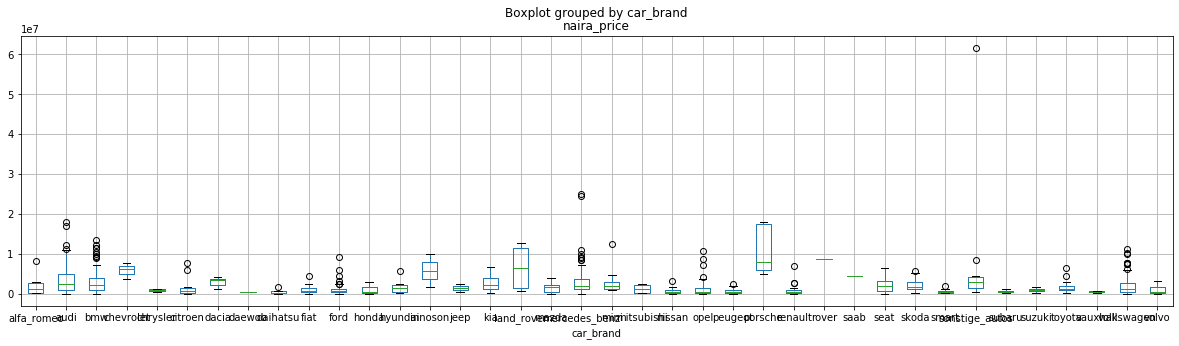

In [64]:
#brandprice.plot(kind = 'bar', x ='car_brand', y = 'naira_price', figsize = (15,8));
brandprice.boxplot(column = 'naira_price', by= 'car_brand', figsize = (20, 5));
plt.show();

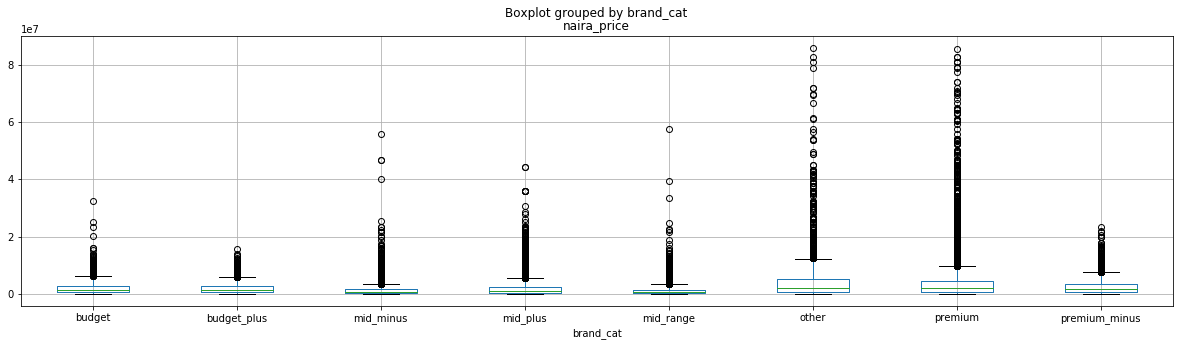

In [70]:
#brandprice.plot(kind = 'bar', x ='car_brand', y = 'naira_price', figsize = (15,8));
train_mode.boxplot(column = 'naira_price', by= 'brand_cat', figsize = (20, 5));
plt.show();

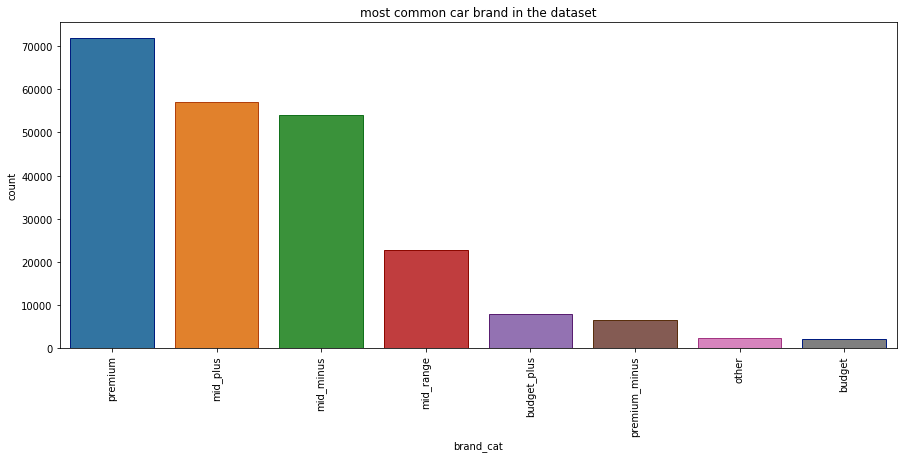

In [71]:
plt.subplots(figsize=(15,6))
sns.countplot('brand_cat',data=train_mode,
              edgecolor=sns.color_palette('dark',7),
              order=train_mode['brand_cat'].value_counts(10).index)
plt.xticks(rotation=90)
plt.title('most common car brand in the dataset')
plt.show()

In [232]:
#drop columns that are not relevant

train_mode_dropped = train_mode[['car_type','car_brand','age',
                                 'registration_month','horse_power',
                                 'mileage','gas_type','repair_status',
                                'gear_type','naira_price']]
train_mode_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224537 entries, 0 to 224536
Data columns (total 10 columns):
car_type              224537 non-null object
car_brand             224537 non-null object
age                   224537 non-null int64
registration_month    224537 non-null int64
horse_power           224537 non-null int64
mileage               224537 non-null float64
gas_type              224537 non-null object
repair_status         224537 non-null object
gear_type             224537 non-null object
naira_price           224537 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 17.1+ MB


In [233]:
train_mode_dropped.head()

car_type   car_brand  age  registration_month  horse_power   mileage  \
0      coupé        audi    6                   5          190  201125.0   
1  small car  volkswagen   16                   6           75  241350.0   
2  small car       skoda    9                   7           69  144810.0   
3  limousine         bmw   22                  10          102  241350.0   
4  small car  volkswagen   19                   3          101  241350.0   

   gas_type repair_status gear_type  naira_price  
0    diesel           Yes   manuell      6588000  
1  gasoline            No   manuell       540000  
2    diesel            No   manuell      1296000  
3  gasoline           Yes   manuell       234000  
4  gasoline            No   manuell       359640

# Modelling

In [234]:
#convert cat columns to one hot encoding
X = train_mode_dropped
col = train_mode_dropped.select_dtypes(np.object).columns
col = list(col)
col.append('registration_month')
X=pd.get_dummies(X, columns=col,prefix=col)


In [235]:
X.columns

Index(['age', 'horse_power', 'mileage', 'naira_price', 'car_type_bus',
       'car_type_convertible', 'car_type_coupé', 'car_type_limousine',
       'car_type_other', 'car_type_small car', 'car_type_station wagon',
       'car_brand_alfa_romeo', 'car_brand_audi', 'car_brand_bmw',
       'car_brand_chevrolet', 'car_brand_chrysler', 'car_brand_citroen',
       'car_brand_dacia', 'car_brand_daewoo', 'car_brand_daihatsu',
       'car_brand_fiat', 'car_brand_ford', 'car_brand_honda',
       'car_brand_hyundai', 'car_brand_innoson', 'car_brand_jeep',
       'car_brand_kia', 'car_brand_land_rover', 'car_brand_lotus',
       'car_brand_mazda', 'car_brand_mercedes_benz', 'car_brand_mini',
       'car_brand_mitsubishi', 'car_brand_nissan', 'car_brand_opel',
       'car_brand_peugeot', 'car_brand_porsche', 'car_brand_renault',
       'car_brand_rover', 'car_brand_saab', 'car_brand_seat',
       'car_brand_skoda', 'car_brand_smart', 'car_brand_sonstige_autos',
       'car_brand_subaru', 'car_brand

In [170]:
X = X[['age', 'horse_power', 'mileage', 'naira_price', 'car_type_bus',
       'car_type_convertible', 'car_type_coupé', 'car_type_limousine',
       'car_type_other', 'car_type_small car', 'car_type_station wagon',
       'brand_cat_budget', 'brand_cat_budget_plus', 'brand_cat_mid_minus',
       'brand_cat_mid_plus', 'brand_cat_mid_range', 'brand_cat_other',
       'brand_cat_premium', 'brand_cat_premium_minus',
       'gas_type_compressed natural gas', 'gas_type_diesel',
       'gas_type_gasoline', 'gas_type_liquefied petroleum gas',
       'gas_type_other', 'repair_status_No', 'repair_status_Yes',
       'gear_type_automatik', 'gear_type_manuell', 'registration_month_1',
       'registration_month_2', 'registration_month_3', 'registration_month_4',
       'registration_month_5', 'registration_month_6', 'registration_month_7',
       'registration_month_8', 'registration_month_9', 'registration_month_10',
       'registration_month_11', 'registration_month_12']]

In [236]:
X = X.drop(axis=1, columns = 'naira_price')

In [237]:
print(X.columns)
X.head()

Index(['age', 'horse_power', 'mileage', 'car_type_bus', 'car_type_convertible',
       'car_type_coupé', 'car_type_limousine', 'car_type_other',
       'car_type_small car', 'car_type_station wagon', 'car_brand_alfa_romeo',
       'car_brand_audi', 'car_brand_bmw', 'car_brand_chevrolet',
       'car_brand_chrysler', 'car_brand_citroen', 'car_brand_dacia',
       'car_brand_daewoo', 'car_brand_daihatsu', 'car_brand_fiat',
       'car_brand_ford', 'car_brand_honda', 'car_brand_hyundai',
       'car_brand_innoson', 'car_brand_jeep', 'car_brand_kia',
       'car_brand_land_rover', 'car_brand_lotus', 'car_brand_mazda',
       'car_brand_mercedes_benz', 'car_brand_mini', 'car_brand_mitsubishi',
       'car_brand_nissan', 'car_brand_opel', 'car_brand_peugeot',
       'car_brand_porsche', 'car_brand_renault', 'car_brand_rover',
       'car_brand_saab', 'car_brand_seat', 'car_brand_skoda',
       'car_brand_smart', 'car_brand_sonstige_autos', 'car_brand_subaru',
       'car_brand_suzuki', 'car_

age  horse_power   mileage  car_type_bus  car_type_convertible  \
0    6          190  201125.0             0                     0   
1   16           75  241350.0             0                     0   
2    9           69  144810.0             0                     0   
3   22          102  241350.0             0                     0   
4   19          101  241350.0             0                     0   

   car_type_coupé  car_type_limousine  car_type_other  car_type_small car  \
0               1                   0               0                   0   
1               0                   0               0                   1   
2               0                   0               0                   1   
3               0                   1               0                   0   
4               0                   0               0                   1   

   car_type_station wagon  ...  registration_month_3  registration_month_4  \
0                       0  ...                     0                     0   
1                       0  ...                     0                     0   
2                       0  ...                     0                     0   
3                       0  ...                     0                     0   
4                       0  ...                     1                     0   

   registration_month_5  registration_month_6  registration_month_7  \
0                     1                     0                     0   
1                     0                     1                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   registration_month_8  registration_month_9  registration_month_10  \
0                     0                     0                      0   
1                     0                     0                      0   
2                     0                     0                      0   
3                     0                     0                      1   
4                     0                     0                      0   

   registration_month_11  registration_month_12  
0                      0                      0  
1                      0                      0  
2                      0                      0  
3                      0                      0  
4                      0                      0  

[5 rows x 71 columns]

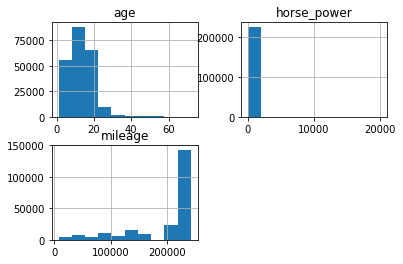

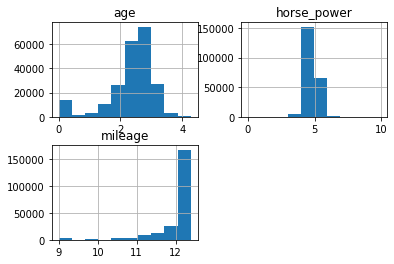

In [238]:
X[['horse_power','mileage','age']].hist()
plt.show();
X['age'] = np.log(X['age'])
X['horse_power'] = np.log(X['horse_power'])
X['mileage'] = np.log(X['mileage'])
X[['horse_power','mileage','age']].hist()
plt.show();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x145f104e0>,
      dtype=object)

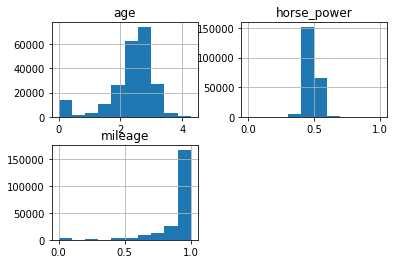

In [239]:
#Rescaling
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

X['horse_power'] =  scaler.fit_transform(X['horse_power'].values.reshape(-1,1))
X['mileage'] =  scaler.fit_transform(X['mileage'].values.reshape(-1,1))
X[['horse_power','mileage','age']].hist()

X['age'] = np.log(X['age'])
X['horse_power'] = np.log(X['horse_power'])
X['mileage'] = np.log(X['mileage'])

In [240]:
y =  np.ravel(train_mode_dropped.naira_price)

In [241]:
from sklearn.model_selection import train_test_split

#split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#check the shape of the train and validation data 
print('The size of the train features data is:',X_train.shape)
print('The size of the test features data is:',X_test.shape)
print('---------------------------------------')
print('The size of the train target data is:', y_train.shape)
print('The size of the test target data is:', y_test.shape)

The size of the train features data is: (150439, 71)
The size of the test features data is: (74098, 71)
---------------------------------------
The size of the train target data is: (150439,)
The size of the test target data is: (74098,)


# CROSS VAL METHOD

In [111]:
#score of the model
from sklearn.model_selection import cross_val_score

def cross_val(model,X,Y):
    scores = list(-1* cross_val_score(model,X, Y, cv = 5, scoring = 'neg_mean_squared_error'))
    rmse = []
    for mse in scores:
        rmse.append(np.sqrt(mse))
    print(rmse)
    arr = np.array(rmse)
    print('Score Standard Deviation:', arr.std())
    return print('Score Mean:',arr.mean())
    


# Learning curve plot method

In [87]:
# Cross validate model with Kfold stratified cross val
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

from sklearn.model_selection import learning_curve 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Bayesian Optimizer

In [ ]:

from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def test(max_depth, min_samples_split,min_samples_leaf, X, y):
 
    estimator = LinearRegression(max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf, random_state = 42)
    cval = cross_val_score(estimator, train_X, train_Y,
                           scoring='neg_mean_squared_error', cv=5)
    return cval.mean()





def optimize_test(X,y):
    def test_cv(max_depth, min_samples_split, min_samples_leaf):
       
        return test(max_depth = int(max_depth),
                min_samples_split = float(min_samples_split),
                min_samples_leaf = int(min_samples_leaf),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={
            "max_depth": (5, 15),
            "min_samples_split": (0.1, 1.0),
            "min_samples_leaf": (1, 15),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

### Catboost Regressor Model

In [212]:

from bayes_opt import BayesianOptimization
def test( learning_rate, n_estimators, max_depth, X, y):
 
    estimator = CatBoostRegressor(learning_rate=learning_rate,
                                           n_estimators = n_estimators,
                                           max_depth = max_depth,
                                           random_state = 42)
    cval= list(-1* cross_val_score(estimator, X_test, y_test, cv = 5, scoring = 'neg_mean_squared_error'))
    #cval = cross_val_score(estimator, X_test, y_test,scoring='neg_mean_squared_error', cv=5)
    rmse = []
    for mse in cval:
        rmse.append(np.sqrt(mse))
    arr = np.array(rmse)
    return arr.mean()





def optimize_testCBR(X,y):
    def test_cv(learning_rate, n_estimators, max_depth):
       
        return test(
                    learning_rate = float(learning_rate),
                    n_estimators = int(n_estimators),
                    max_depth = int(max_depth),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={
                 "learning_rate": (0.05, 0.1),
                 "n_estimators": (900,1000),
            "max_depth": (3,5),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [213]:
optimize_testCBR(X_train,y_train)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
0:	learn: 3651555.2355590	total: 11.8ms	remaining: 11.2s
1:	learn: 3515009.1507610	total: 22.1ms	remaining: 10.4s
2:	learn: 3382763.5054119	total: 32.8ms	remaining: 10.3s
3:	learn: 3267835.7294764	total: 42.1ms	remaining: 9.88s
4:	learn: 3154468.1411695	total: 52ms	remaining: 9.76s
5:	learn: 3050870.7087279	total: 62.7ms	remaining: 9.79s
6:	learn: 2955207.5823404	total: 72.6ms	remaining: 9.71s
7:	learn: 2869061.9002946	total: 83ms	remaining: 9.71s
8:	learn: 2787714.8708107	total: 93.4ms	remaining: 9.69s
9:	learn: 2711737.8933161	total: 103ms	remaining: 9.61s
10:	learn: 2643340.9795794	total: 114ms	remaining: 9.64s
11:	learn: 2580886.5570928	total: 123ms	remaining: 9.58s
12:	learn: 2522315.3550570	total: 133ms	remaining: 9.52s
13:	learn: 2470847.1846403	total: 143ms	remaining: 9.52s
14:	learn: 2419255.1803339	total: 153ms	remaining: 9.49s
15:	learn: 2371465.6498999

158:	learn: 1528839.8559703	total: 1.61s	remaining: 7.92s
159:	learn: 1527955.8118953	total: 1.62s	remaining: 7.91s
160:	learn: 1527376.3770051	total: 1.63s	remaining: 7.91s
161:	learn: 1526953.9866713	total: 1.64s	remaining: 7.89s
162:	learn: 1525656.6923937	total: 1.64s	remaining: 7.87s
163:	learn: 1524168.0842201	total: 1.65s	remaining: 7.85s
164:	learn: 1523360.4524295	total: 1.66s	remaining: 7.82s
165:	learn: 1522734.9294120	total: 1.67s	remaining: 7.8s
166:	learn: 1521856.1511569	total: 1.67s	remaining: 7.77s
167:	learn: 1520796.9141224	total: 1.68s	remaining: 7.75s
168:	learn: 1519873.6096210	total: 1.69s	remaining: 7.72s
169:	learn: 1519492.5227916	total: 1.69s	remaining: 7.7s
170:	learn: 1518604.3620843	total: 1.7s	remaining: 7.68s
171:	learn: 1517947.6018650	total: 1.71s	remaining: 7.66s
172:	learn: 1516819.5477935	total: 1.72s	remaining: 7.63s
173:	learn: 1515593.8695648	total: 1.72s	remaining: 7.61s
174:	learn: 1515324.1282183	total: 1.73s	remaining: 7.6s
175:	learn: 151484

305:	learn: 1421963.3168655	total: 2.82s	remaining: 5.87s
306:	learn: 1421753.1072280	total: 2.83s	remaining: 5.86s
307:	learn: 1421273.1440138	total: 2.84s	remaining: 5.85s
308:	learn: 1420742.9209332	total: 2.85s	remaining: 5.84s
309:	learn: 1420458.3485607	total: 2.86s	remaining: 5.83s
310:	learn: 1420044.4986771	total: 2.86s	remaining: 5.82s
311:	learn: 1419306.6490660	total: 2.87s	remaining: 5.81s
312:	learn: 1418558.9191116	total: 2.88s	remaining: 5.79s
313:	learn: 1418228.6406339	total: 2.89s	remaining: 5.78s
314:	learn: 1417900.5279756	total: 2.89s	remaining: 5.77s
315:	learn: 1417472.3806233	total: 2.9s	remaining: 5.75s
316:	learn: 1417076.7231514	total: 2.91s	remaining: 5.74s
317:	learn: 1416826.9271373	total: 2.91s	remaining: 5.73s
318:	learn: 1416520.8442063	total: 2.92s	remaining: 5.71s
319:	learn: 1415997.5669520	total: 2.93s	remaining: 5.7s
320:	learn: 1414855.4764867	total: 2.93s	remaining: 5.68s
321:	learn: 1414578.2220407	total: 2.94s	remaining: 5.67s
322:	learn: 1413

467:	learn: 1351092.7132642	total: 4s	remaining: 4.06s
468:	learn: 1350609.5194749	total: 4.01s	remaining: 4.05s
469:	learn: 1350017.5718538	total: 4.02s	remaining: 4.04s
470:	learn: 1349524.8732612	total: 4.03s	remaining: 4.04s
471:	learn: 1349145.6611125	total: 4.04s	remaining: 4.03s
472:	learn: 1348849.5998188	total: 4.04s	remaining: 4.02s
473:	learn: 1348741.6651790	total: 4.05s	remaining: 4.01s
474:	learn: 1348363.1424799	total: 4.06s	remaining: 4s
475:	learn: 1347909.5086759	total: 4.07s	remaining: 3.99s
476:	learn: 1347621.1696469	total: 4.07s	remaining: 3.98s
477:	learn: 1347152.7280850	total: 4.08s	remaining: 3.97s
478:	learn: 1346871.7080285	total: 4.09s	remaining: 3.96s
479:	learn: 1346449.7558071	total: 4.1s	remaining: 3.95s
480:	learn: 1346196.9107705	total: 4.11s	remaining: 3.94s
481:	learn: 1345761.5685068	total: 4.11s	remaining: 3.93s
482:	learn: 1344064.6520804	total: 4.12s	remaining: 3.92s
483:	learn: 1343671.5907428	total: 4.13s	remaining: 3.92s
484:	learn: 1343126.6

629:	learn: 1297885.1734770	total: 5.17s	remaining: 2.57s
630:	learn: 1297250.3396465	total: 5.18s	remaining: 2.56s
631:	learn: 1297157.6535551	total: 5.19s	remaining: 2.55s
632:	learn: 1297021.9701738	total: 5.2s	remaining: 2.55s
633:	learn: 1296904.7304422	total: 5.21s	remaining: 2.54s
634:	learn: 1296639.7270257	total: 5.21s	remaining: 2.53s
635:	learn: 1296373.9254029	total: 5.22s	remaining: 2.52s
636:	learn: 1296037.4263431	total: 5.23s	remaining: 2.51s
637:	learn: 1295486.9328517	total: 5.24s	remaining: 2.5s
638:	learn: 1295384.7008439	total: 5.24s	remaining: 2.5s
639:	learn: 1295001.9139425	total: 5.25s	remaining: 2.49s
640:	learn: 1294761.7032717	total: 5.26s	remaining: 2.48s
641:	learn: 1294270.7450547	total: 5.26s	remaining: 2.47s
642:	learn: 1294162.1696139	total: 5.27s	remaining: 2.46s
643:	learn: 1294108.3656441	total: 5.28s	remaining: 2.45s
644:	learn: 1293824.6727384	total: 5.29s	remaining: 2.44s
645:	learn: 1293669.4126192	total: 5.29s	remaining: 2.43s
646:	learn: 12933

788:	learn: 1259977.9601336	total: 6.34s	remaining: 1.24s
789:	learn: 1259677.5387075	total: 6.35s	remaining: 1.23s
790:	learn: 1259349.8557196	total: 6.37s	remaining: 1.22s
791:	learn: 1259185.9202634	total: 6.38s	remaining: 1.22s
792:	learn: 1258898.2479613	total: 6.39s	remaining: 1.21s
793:	learn: 1258843.2750501	total: 6.39s	remaining: 1.2s
794:	learn: 1258741.9517604	total: 6.4s	remaining: 1.19s
795:	learn: 1258651.3374289	total: 6.41s	remaining: 1.18s
796:	learn: 1258467.5671802	total: 6.42s	remaining: 1.18s
797:	learn: 1258358.3485239	total: 6.43s	remaining: 1.17s
798:	learn: 1258259.6348676	total: 6.43s	remaining: 1.16s
799:	learn: 1257963.6028403	total: 6.44s	remaining: 1.15s
800:	learn: 1257840.5752515	total: 6.45s	remaining: 1.14s
801:	learn: 1257712.5100802	total: 6.45s	remaining: 1.13s
802:	learn: 1257589.9716001	total: 6.46s	remaining: 1.13s
803:	learn: 1257494.8350732	total: 6.47s	remaining: 1.12s
804:	learn: 1257255.7488293	total: 6.47s	remaining: 1.11s
805:	learn: 1257

0:	learn: 3693667.2196795	total: 9.4ms	remaining: 8.86s
1:	learn: 3557641.7030544	total: 16.4ms	remaining: 7.73s
2:	learn: 3426417.9184246	total: 23.9ms	remaining: 7.49s
3:	learn: 3309233.0742425	total: 30.9ms	remaining: 7.26s
4:	learn: 3195447.7833217	total: 38.2ms	remaining: 7.16s
5:	learn: 3091503.1731338	total: 45.5ms	remaining: 7.1s
6:	learn: 2999342.9029846	total: 53.1ms	remaining: 7.11s
7:	learn: 2911586.1583479	total: 60.4ms	remaining: 7.06s
8:	learn: 2829435.4631033	total: 68ms	remaining: 7.06s
9:	learn: 2756832.6621941	total: 75.5ms	remaining: 7.04s
10:	learn: 2688913.5108119	total: 82.9ms	remaining: 7.03s
11:	learn: 2625906.5924884	total: 90.4ms	remaining: 7.01s
12:	learn: 2567515.3028483	total: 97.7ms	remaining: 6.99s
13:	learn: 2516028.4402068	total: 105ms	remaining: 6.94s
14:	learn: 2467012.3156832	total: 112ms	remaining: 6.91s
15:	learn: 2420953.5756086	total: 119ms	remaining: 6.88s
16:	learn: 2377426.8934492	total: 126ms	remaining: 6.86s
17:	learn: 2336512.7368156	total

154:	learn: 1583525.9733389	total: 1.21s	remaining: 6.15s
155:	learn: 1582961.2251761	total: 1.22s	remaining: 6.16s
156:	learn: 1581573.7930999	total: 1.23s	remaining: 6.16s
157:	learn: 1580481.8192864	total: 1.24s	remaining: 6.15s
158:	learn: 1579379.5142262	total: 1.25s	remaining: 6.14s
159:	learn: 1578386.3760527	total: 1.25s	remaining: 6.14s
160:	learn: 1577794.5952849	total: 1.26s	remaining: 6.13s
161:	learn: 1576961.1738126	total: 1.27s	remaining: 6.11s
162:	learn: 1575994.3674534	total: 1.27s	remaining: 6.1s
163:	learn: 1574363.6860620	total: 1.28s	remaining: 6.09s
164:	learn: 1573706.7436411	total: 1.29s	remaining: 6.08s
165:	learn: 1573060.8409040	total: 1.3s	remaining: 6.07s
166:	learn: 1572164.6164998	total: 1.3s	remaining: 6.06s
167:	learn: 1570946.0666031	total: 1.31s	remaining: 6.05s
168:	learn: 1570053.5553812	total: 1.32s	remaining: 6.03s
169:	learn: 1569516.8449374	total: 1.32s	remaining: 6.02s
170:	learn: 1568448.3752269	total: 1.33s	remaining: 6.01s
171:	learn: 15680

310:	learn: 1469454.9151604	total: 2.39s	remaining: 4.87s
311:	learn: 1469017.8519930	total: 2.4s	remaining: 4.86s
312:	learn: 1468717.3998091	total: 2.42s	remaining: 4.86s
313:	learn: 1468079.2039568	total: 2.42s	remaining: 4.86s
314:	learn: 1467698.1635567	total: 2.43s	remaining: 4.85s
315:	learn: 1467293.0870547	total: 2.44s	remaining: 4.84s
316:	learn: 1467052.1540757	total: 2.45s	remaining: 4.83s
317:	learn: 1466216.1420353	total: 2.46s	remaining: 4.83s
318:	learn: 1465618.8858318	total: 2.46s	remaining: 4.82s
319:	learn: 1465311.6960757	total: 2.47s	remaining: 4.81s
320:	learn: 1463708.1283239	total: 2.48s	remaining: 4.8s
321:	learn: 1463340.4206484	total: 2.48s	remaining: 4.79s
322:	learn: 1462648.3292248	total: 2.49s	remaining: 4.78s
323:	learn: 1462318.8017801	total: 2.5s	remaining: 4.77s
324:	learn: 1461572.3164057	total: 2.5s	remaining: 4.76s
325:	learn: 1461104.6514180	total: 2.51s	remaining: 4.75s
326:	learn: 1460379.3934296	total: 2.52s	remaining: 4.75s
327:	learn: 146001

476:	learn: 1399838.9252820	total: 3.59s	remaining: 3.51s
477:	learn: 1399713.7513983	total: 3.6s	remaining: 3.5s
478:	learn: 1399309.9752777	total: 3.61s	remaining: 3.5s
479:	learn: 1399050.1838884	total: 3.62s	remaining: 3.5s
480:	learn: 1398631.7380404	total: 3.63s	remaining: 3.49s
481:	learn: 1398110.7317030	total: 3.64s	remaining: 3.48s
482:	learn: 1396867.6154811	total: 3.65s	remaining: 3.47s
483:	learn: 1396561.9262487	total: 3.65s	remaining: 3.46s
484:	learn: 1396398.4095864	total: 3.66s	remaining: 3.46s
485:	learn: 1395827.9090402	total: 3.67s	remaining: 3.45s
486:	learn: 1395561.6757626	total: 3.67s	remaining: 3.44s
487:	learn: 1395377.3847343	total: 3.68s	remaining: 3.43s
488:	learn: 1395146.1417202	total: 3.69s	remaining: 3.42s
489:	learn: 1394879.8367655	total: 3.69s	remaining: 3.42s
490:	learn: 1394440.6891048	total: 3.7s	remaining: 3.41s
491:	learn: 1394359.8277088	total: 3.71s	remaining: 3.4s
492:	learn: 1394228.1954352	total: 3.71s	remaining: 3.39s
493:	learn: 1393686.

644:	learn: 1346897.4175403	total: 4.78s	remaining: 2.21s
645:	learn: 1346706.2589813	total: 4.79s	remaining: 2.2s
646:	learn: 1346629.2942280	total: 4.8s	remaining: 2.2s
647:	learn: 1346483.0528966	total: 4.81s	remaining: 2.19s
648:	learn: 1346019.3340546	total: 4.82s	remaining: 2.18s
649:	learn: 1345875.7272359	total: 4.82s	remaining: 2.17s
650:	learn: 1345676.9954857	total: 4.83s	remaining: 2.17s
651:	learn: 1345564.8125181	total: 4.83s	remaining: 2.16s
652:	learn: 1345414.0423144	total: 4.84s	remaining: 2.15s
653:	learn: 1345159.9031692	total: 4.85s	remaining: 2.14s
654:	learn: 1344888.8308794	total: 4.86s	remaining: 2.13s
655:	learn: 1344755.0648701	total: 4.86s	remaining: 2.13s
656:	learn: 1344453.2169547	total: 4.87s	remaining: 2.12s
657:	learn: 1344343.6148299	total: 4.88s	remaining: 2.11s
658:	learn: 1344150.9879272	total: 4.88s	remaining: 2.1s
659:	learn: 1343328.4319554	total: 4.89s	remaining: 2.1s
660:	learn: 1343200.6444558	total: 4.89s	remaining: 2.09s
661:	learn: 1342345

808:	learn: 1307329.0354629	total: 5.97s	remaining: 989ms
809:	learn: 1307271.1660293	total: 5.98s	remaining: 982ms
810:	learn: 1307110.8420345	total: 5.99s	remaining: 975ms
811:	learn: 1307035.5554444	total: 6s	remaining: 969ms
812:	learn: 1306832.8860411	total: 6.01s	remaining: 961ms
813:	learn: 1306770.3170269	total: 6.02s	remaining: 954ms
814:	learn: 1306533.6127559	total: 6.03s	remaining: 946ms
815:	learn: 1306389.8115392	total: 6.03s	remaining: 939ms
816:	learn: 1306299.0215879	total: 6.04s	remaining: 931ms
817:	learn: 1306223.4725134	total: 6.04s	remaining: 924ms
818:	learn: 1306017.5098904	total: 6.05s	remaining: 916ms
819:	learn: 1305845.9312355	total: 6.06s	remaining: 909ms
820:	learn: 1305676.2613550	total: 6.06s	remaining: 901ms
821:	learn: 1305639.8441024	total: 6.07s	remaining: 894ms
822:	learn: 1305486.8912695	total: 6.08s	remaining: 886ms
823:	learn: 1305289.3912886	total: 6.08s	remaining: 879ms
824:	learn: 1305111.7196462	total: 6.09s	remaining: 871ms
825:	learn: 13048

27:	learn: 2041882.8629109	total: 212ms	remaining: 6.91s
28:	learn: 2024002.0146432	total: 222ms	remaining: 6.99s
29:	learn: 2007624.1877041	total: 232ms	remaining: 7.06s
30:	learn: 1991845.4390252	total: 242ms	remaining: 7.11s
31:	learn: 1975333.5603830	total: 249ms	remaining: 7.08s
32:	learn: 1961446.8466594	total: 258ms	remaining: 7.1s
33:	learn: 1947653.0598140	total: 265ms	remaining: 7.08s
34:	learn: 1935563.6600018	total: 272ms	remaining: 7.06s
35:	learn: 1922489.6973508	total: 279ms	remaining: 7.03s
36:	learn: 1909227.3540238	total: 286ms	remaining: 7.01s
37:	learn: 1898204.9920130	total: 293ms	remaining: 6.97s
38:	learn: 1885834.5538758	total: 300ms	remaining: 6.95s
39:	learn: 1874711.9354417	total: 307ms	remaining: 6.93s
40:	learn: 1867523.5754217	total: 315ms	remaining: 6.92s
41:	learn: 1859076.9520505	total: 321ms	remaining: 6.89s
42:	learn: 1850165.1469575	total: 328ms	remaining: 6.87s
43:	learn: 1842418.0830685	total: 335ms	remaining: 6.85s
44:	learn: 1835843.2853638	total

181:	learn: 1521793.3132009	total: 1.39s	remaining: 5.82s
182:	learn: 1521224.2482247	total: 1.4s	remaining: 5.82s
183:	learn: 1520638.7677567	total: 1.41s	remaining: 5.83s
184:	learn: 1520442.3553980	total: 1.42s	remaining: 5.83s
185:	learn: 1519798.3428297	total: 1.43s	remaining: 5.83s
186:	learn: 1518681.1536308	total: 1.44s	remaining: 5.81s
187:	learn: 1518219.4352988	total: 1.45s	remaining: 5.8s
188:	learn: 1516675.4039281	total: 1.45s	remaining: 5.79s
189:	learn: 1515335.4985289	total: 1.46s	remaining: 5.79s
190:	learn: 1515080.9308484	total: 1.47s	remaining: 5.78s
191:	learn: 1514329.8105693	total: 1.47s	remaining: 5.77s
192:	learn: 1513741.6120381	total: 1.48s	remaining: 5.76s
193:	learn: 1513332.5189975	total: 1.49s	remaining: 5.75s
194:	learn: 1512957.2875235	total: 1.5s	remaining: 5.74s
195:	learn: 1512311.8834363	total: 1.5s	remaining: 5.72s
196:	learn: 1510836.6324105	total: 1.51s	remaining: 5.72s
197:	learn: 1509271.9833265	total: 1.52s	remaining: 5.71s
198:	learn: 150868

338:	learn: 1424536.8820305	total: 2.58s	remaining: 4.59s
339:	learn: 1423649.5625183	total: 2.59s	remaining: 4.59s
340:	learn: 1423434.2462180	total: 2.6s	remaining: 4.59s
341:	learn: 1423255.1878627	total: 2.61s	remaining: 4.58s
342:	learn: 1423033.4802702	total: 2.62s	remaining: 4.58s
343:	learn: 1422163.5038235	total: 2.63s	remaining: 4.57s
344:	learn: 1421362.9979201	total: 2.63s	remaining: 4.57s
345:	learn: 1420876.5738695	total: 2.64s	remaining: 4.56s
346:	learn: 1420562.5525843	total: 2.65s	remaining: 4.55s
347:	learn: 1420378.3635321	total: 2.66s	remaining: 4.55s
348:	learn: 1420028.9372571	total: 2.67s	remaining: 4.54s
349:	learn: 1419648.2776620	total: 2.68s	remaining: 4.54s
350:	learn: 1418920.2894303	total: 2.69s	remaining: 4.53s
351:	learn: 1418439.8661575	total: 2.69s	remaining: 4.52s
352:	learn: 1417845.8023714	total: 2.7s	remaining: 4.51s
353:	learn: 1417740.9742467	total: 2.71s	remaining: 4.5s
354:	learn: 1417552.5629220	total: 2.71s	remaining: 4.49s
355:	learn: 14174

504:	learn: 1361874.7843350	total: 3.77s	remaining: 3.27s
505:	learn: 1361767.5538533	total: 3.77s	remaining: 3.26s
506:	learn: 1361457.6025514	total: 3.78s	remaining: 3.25s
507:	learn: 1361072.7045269	total: 3.79s	remaining: 3.25s
508:	learn: 1360719.2930276	total: 3.8s	remaining: 3.24s
509:	learn: 1360569.5045617	total: 3.81s	remaining: 3.23s
510:	learn: 1360316.7680923	total: 3.82s	remaining: 3.23s
511:	learn: 1359801.9734517	total: 3.82s	remaining: 3.22s
512:	learn: 1359282.0588997	total: 3.83s	remaining: 3.21s
513:	learn: 1359100.8455396	total: 3.84s	remaining: 3.2s
514:	learn: 1358845.1872707	total: 3.85s	remaining: 3.2s
515:	learn: 1358458.5630984	total: 3.85s	remaining: 3.19s
516:	learn: 1358343.7814621	total: 3.86s	remaining: 3.18s
517:	learn: 1357957.8314641	total: 3.87s	remaining: 3.17s
518:	learn: 1357810.8269573	total: 3.87s	remaining: 3.16s
519:	learn: 1357728.5430511	total: 3.88s	remaining: 3.15s
520:	learn: 1357681.4001737	total: 3.89s	remaining: 3.15s
521:	learn: 13573

668:	learn: 1319446.4431329	total: 4.95s	remaining: 2.03s
669:	learn: 1319228.5259814	total: 4.96s	remaining: 2.02s
670:	learn: 1319048.1108135	total: 4.97s	remaining: 2.02s
671:	learn: 1318288.1144050	total: 4.98s	remaining: 2.01s
672:	learn: 1318073.1389559	total: 4.99s	remaining: 2s
673:	learn: 1317865.6001836	total: 5s	remaining: 2s
674:	learn: 1317812.5594002	total: 5s	remaining: 1.99s
675:	learn: 1317777.5855770	total: 5.01s	remaining: 1.98s
676:	learn: 1317395.9784275	total: 5.02s	remaining: 1.97s
677:	learn: 1317152.0337686	total: 5.03s	remaining: 1.96s
678:	learn: 1316881.2573447	total: 5.03s	remaining: 1.96s
679:	learn: 1316787.3317198	total: 5.04s	remaining: 1.95s
680:	learn: 1316674.0205714	total: 5.05s	remaining: 1.94s
681:	learn: 1316520.5545981	total: 5.05s	remaining: 1.93s
682:	learn: 1316362.0141146	total: 5.06s	remaining: 1.93s
683:	learn: 1316243.7010361	total: 5.07s	remaining: 1.92s
684:	learn: 1316141.4601144	total: 5.08s	remaining: 1.91s
685:	learn: 1316004.190637

832:	learn: 1285899.5833084	total: 6.13s	remaining: 810ms
833:	learn: 1285780.0562779	total: 6.14s	remaining: 803ms
834:	learn: 1285612.6862737	total: 6.16s	remaining: 796ms
835:	learn: 1285586.2088319	total: 6.16s	remaining: 789ms
836:	learn: 1285444.6490376	total: 6.17s	remaining: 781ms
837:	learn: 1285324.5119498	total: 6.18s	remaining: 774ms
838:	learn: 1284836.5735897	total: 6.18s	remaining: 767ms
839:	learn: 1284718.6176563	total: 6.19s	remaining: 759ms
840:	learn: 1284426.3722837	total: 6.2s	remaining: 752ms
841:	learn: 1284372.4756262	total: 6.2s	remaining: 744ms
842:	learn: 1284059.3556194	total: 6.21s	remaining: 737ms
843:	learn: 1283654.9107491	total: 6.22s	remaining: 729ms
844:	learn: 1283490.1499001	total: 6.22s	remaining: 722ms
845:	learn: 1283453.2342778	total: 6.23s	remaining: 714ms
846:	learn: 1283360.9569191	total: 6.24s	remaining: 707ms
847:	learn: 1283182.5333459	total: 6.24s	remaining: 699ms
848:	learn: 1282951.2562425	total: 6.25s	remaining: 692ms
849:	learn: 1282

53:	learn: 1745623.0896914	total: 416ms	remaining: 6.85s
54:	learn: 1740287.5062123	total: 427ms	remaining: 6.9s
55:	learn: 1735479.6212398	total: 440ms	remaining: 6.97s
56:	learn: 1729755.1803531	total: 450ms	remaining: 6.99s
57:	learn: 1725128.4449832	total: 457ms	remaining: 6.97s
58:	learn: 1720557.2047627	total: 466ms	remaining: 6.99s
59:	learn: 1715867.8476159	total: 474ms	remaining: 6.97s
60:	learn: 1711639.3857459	total: 482ms	remaining: 6.96s
61:	learn: 1707858.2127430	total: 489ms	remaining: 6.94s
62:	learn: 1704391.3756037	total: 496ms	remaining: 6.93s
63:	learn: 1700268.6133563	total: 503ms	remaining: 6.91s
64:	learn: 1696858.7796235	total: 510ms	remaining: 6.89s
65:	learn: 1692935.3383440	total: 517ms	remaining: 6.88s
66:	learn: 1689410.5017473	total: 525ms	remaining: 6.86s
67:	learn: 1685504.6862223	total: 532ms	remaining: 6.85s
68:	learn: 1681370.3264460	total: 540ms	remaining: 6.84s
69:	learn: 1678535.5038835	total: 547ms	remaining: 6.82s
70:	learn: 1675078.9117741	total

213:	learn: 1480651.4622692	total: 1.61s	remaining: 5.48s
214:	learn: 1480332.1792889	total: 1.62s	remaining: 5.49s
215:	learn: 1479800.0682247	total: 1.63s	remaining: 5.49s
216:	learn: 1479309.9129750	total: 1.64s	remaining: 5.49s
217:	learn: 1478734.5406221	total: 1.65s	remaining: 5.48s
218:	learn: 1478174.0122683	total: 1.66s	remaining: 5.48s
219:	learn: 1477426.0535142	total: 1.66s	remaining: 5.47s
220:	learn: 1476910.7201762	total: 1.67s	remaining: 5.46s
221:	learn: 1475858.4330255	total: 1.68s	remaining: 5.45s
222:	learn: 1475189.2305993	total: 1.69s	remaining: 5.44s
223:	learn: 1474337.9869022	total: 1.69s	remaining: 5.43s
224:	learn: 1472691.8287851	total: 1.7s	remaining: 5.42s
225:	learn: 1471957.7034705	total: 1.71s	remaining: 5.41s
226:	learn: 1471358.3092433	total: 1.71s	remaining: 5.41s
227:	learn: 1471160.3895700	total: 1.72s	remaining: 5.4s
228:	learn: 1470849.5892332	total: 1.73s	remaining: 5.38s
229:	learn: 1470157.0496330	total: 1.73s	remaining: 5.38s
230:	learn: 1469

373:	learn: 1397795.4859224	total: 2.8s	remaining: 4.26s
374:	learn: 1397376.9493206	total: 2.81s	remaining: 4.25s
375:	learn: 1396850.8287181	total: 2.82s	remaining: 4.25s
376:	learn: 1396770.8533027	total: 2.83s	remaining: 4.25s
377:	learn: 1396605.9229469	total: 2.84s	remaining: 4.24s
378:	learn: 1396392.1884948	total: 2.85s	remaining: 4.24s
379:	learn: 1395817.2639964	total: 2.86s	remaining: 4.23s
380:	learn: 1395555.1029127	total: 2.87s	remaining: 4.23s
381:	learn: 1395341.6927015	total: 2.88s	remaining: 4.23s
382:	learn: 1394961.1346176	total: 2.89s	remaining: 4.22s
383:	learn: 1394582.0558402	total: 2.9s	remaining: 4.22s
384:	learn: 1394412.6369144	total: 2.91s	remaining: 4.21s
385:	learn: 1394154.3891117	total: 2.92s	remaining: 4.21s
386:	learn: 1393917.9429642	total: 2.93s	remaining: 4.21s
387:	learn: 1393559.5081364	total: 2.94s	remaining: 4.2s
388:	learn: 1392733.2164347	total: 2.94s	remaining: 4.19s
389:	learn: 1391443.7000901	total: 2.95s	remaining: 4.18s
390:	learn: 13912

530:	learn: 1346064.8071861	total: 3.98s	remaining: 3.09s
531:	learn: 1345934.2022611	total: 3.99s	remaining: 3.09s
532:	learn: 1345873.9085749	total: 4s	remaining: 3.08s
533:	learn: 1345788.2925462	total: 4.01s	remaining: 3.08s
534:	learn: 1345694.4144098	total: 4.02s	remaining: 3.07s
535:	learn: 1345450.8115337	total: 4.03s	remaining: 3.06s
536:	learn: 1345117.7798318	total: 4.04s	remaining: 3.05s
537:	learn: 1344889.1245645	total: 4.04s	remaining: 3.04s
538:	learn: 1344606.7294710	total: 4.05s	remaining: 3.04s
539:	learn: 1344502.0921267	total: 4.06s	remaining: 3.03s
540:	learn: 1344335.3570951	total: 4.07s	remaining: 3.02s
541:	learn: 1344202.3998251	total: 4.07s	remaining: 3.01s
542:	learn: 1344082.7044513	total: 4.08s	remaining: 3s
543:	learn: 1343548.2069917	total: 4.08s	remaining: 3s
544:	learn: 1343338.9525794	total: 4.09s	remaining: 2.99s
545:	learn: 1343198.7914907	total: 4.1s	remaining: 2.98s
546:	learn: 1342903.2579957	total: 4.1s	remaining: 2.97s
547:	learn: 1342765.16821

682:	learn: 1312346.3569247	total: 5.17s	remaining: 1.97s
683:	learn: 1312077.7125168	total: 5.18s	remaining: 1.96s
684:	learn: 1311986.9630309	total: 5.19s	remaining: 1.95s
685:	learn: 1311845.7235248	total: 5.2s	remaining: 1.95s
686:	learn: 1311753.0577400	total: 5.21s	remaining: 1.94s
687:	learn: 1311640.2721569	total: 5.22s	remaining: 1.93s
688:	learn: 1311510.7190612	total: 5.23s	remaining: 1.93s
689:	learn: 1311435.2293643	total: 5.24s	remaining: 1.92s
690:	learn: 1311159.0983095	total: 5.25s	remaining: 1.91s
691:	learn: 1311032.4610406	total: 5.26s	remaining: 1.91s
692:	learn: 1310897.6919075	total: 5.27s	remaining: 1.9s
693:	learn: 1310308.6435652	total: 5.28s	remaining: 1.9s
694:	learn: 1310129.0082548	total: 5.29s	remaining: 1.89s
695:	learn: 1310031.2192553	total: 5.3s	remaining: 1.88s
696:	learn: 1309827.3830785	total: 5.31s	remaining: 1.88s
697:	learn: 1309714.6156838	total: 5.32s	remaining: 1.87s
698:	learn: 1309231.7331662	total: 5.33s	remaining: 1.86s
699:	learn: 130906

830:	learn: 1282829.9215405	total: 6.55s	remaining: 882ms
831:	learn: 1282756.7444729	total: 6.56s	remaining: 875ms
832:	learn: 1282437.6738182	total: 6.57s	remaining: 867ms
833:	learn: 1282292.0346918	total: 6.58s	remaining: 860ms
834:	learn: 1282123.7465351	total: 6.58s	remaining: 852ms
835:	learn: 1281868.7909149	total: 6.59s	remaining: 844ms
836:	learn: 1281596.9750555	total: 6.6s	remaining: 836ms
837:	learn: 1281560.7648040	total: 6.61s	remaining: 828ms
838:	learn: 1281424.8008238	total: 6.61s	remaining: 820ms
839:	learn: 1281274.7091959	total: 6.62s	remaining: 812ms
840:	learn: 1281014.2614594	total: 6.63s	remaining: 804ms
841:	learn: 1280868.6642661	total: 6.63s	remaining: 796ms
842:	learn: 1280796.0240916	total: 6.64s	remaining: 787ms
843:	learn: 1280679.9086491	total: 6.64s	remaining: 779ms
844:	learn: 1280528.5134584	total: 6.65s	remaining: 771ms
845:	learn: 1280371.2520507	total: 6.66s	remaining: 763ms
846:	learn: 1280248.9405426	total: 6.66s	remaining: 755ms
847:	learn: 128

29:	learn: 2018404.6400143	total: 212ms	remaining: 6.44s
30:	learn: 2003366.3526574	total: 222ms	remaining: 6.54s
31:	learn: 1989940.5422765	total: 232ms	remaining: 6.61s
32:	learn: 1973678.6571217	total: 242ms	remaining: 6.67s
33:	learn: 1959692.3192043	total: 252ms	remaining: 6.73s
34:	learn: 1948329.8480343	total: 259ms	remaining: 6.72s
35:	learn: 1935513.1688779	total: 267ms	remaining: 6.74s
36:	learn: 1924091.4352831	total: 275ms	remaining: 6.73s
37:	learn: 1912783.9100474	total: 282ms	remaining: 6.72s
38:	learn: 1902918.8336281	total: 289ms	remaining: 6.71s
39:	learn: 1893029.7235080	total: 296ms	remaining: 6.69s
40:	learn: 1884215.8283866	total: 304ms	remaining: 6.68s
41:	learn: 1873615.9111126	total: 311ms	remaining: 6.67s
42:	learn: 1865990.3670906	total: 318ms	remaining: 6.66s
43:	learn: 1858341.3724203	total: 326ms	remaining: 6.65s
44:	learn: 1850435.7046524	total: 333ms	remaining: 6.64s
45:	learn: 1842119.4797213	total: 340ms	remaining: 6.63s
46:	learn: 1834128.7073226	tota

187:	learn: 1535883.8401865	total: 1.41s	remaining: 5.65s
188:	learn: 1534745.2821067	total: 1.42s	remaining: 5.66s
189:	learn: 1534358.9696093	total: 1.43s	remaining: 5.68s
190:	learn: 1533694.3881854	total: 1.45s	remaining: 5.7s
191:	learn: 1532692.2393423	total: 1.46s	remaining: 5.7s
192:	learn: 1531522.4572151	total: 1.47s	remaining: 5.7s
193:	learn: 1530843.1530836	total: 1.48s	remaining: 5.72s
194:	learn: 1529407.4385027	total: 1.49s	remaining: 5.72s
195:	learn: 1528940.4197499	total: 1.5s	remaining: 5.71s
196:	learn: 1528208.9002274	total: 1.5s	remaining: 5.7s
197:	learn: 1527494.9282822	total: 1.51s	remaining: 5.68s
198:	learn: 1526424.3984083	total: 1.52s	remaining: 5.67s
199:	learn: 1525417.8814393	total: 1.52s	remaining: 5.67s
200:	learn: 1524161.0643905	total: 1.53s	remaining: 5.66s
201:	learn: 1523412.8133609	total: 1.54s	remaining: 5.65s
202:	learn: 1522847.7163691	total: 1.55s	remaining: 5.64s
203:	learn: 1521570.2004294	total: 1.55s	remaining: 5.63s
204:	learn: 1520415.

336:	learn: 1442212.9023657	total: 2.58s	remaining: 4.64s
337:	learn: 1441858.8649300	total: 2.59s	remaining: 4.64s
338:	learn: 1441318.0616122	total: 2.6s	remaining: 4.64s
339:	learn: 1441050.2227387	total: 2.61s	remaining: 4.63s
340:	learn: 1440801.6405317	total: 2.62s	remaining: 4.63s
341:	learn: 1439742.2009358	total: 2.63s	remaining: 4.62s
342:	learn: 1439482.8075328	total: 2.63s	remaining: 4.61s
343:	learn: 1439308.9508431	total: 2.64s	remaining: 4.6s
344:	learn: 1438956.9201945	total: 2.65s	remaining: 4.59s
345:	learn: 1438622.5921197	total: 2.66s	remaining: 4.58s
346:	learn: 1438353.0500432	total: 2.66s	remaining: 4.58s
347:	learn: 1437959.9502265	total: 2.67s	remaining: 4.57s
348:	learn: 1437415.8489824	total: 2.68s	remaining: 4.56s
349:	learn: 1437139.6010141	total: 2.69s	remaining: 4.55s
350:	learn: 1436716.8175213	total: 2.69s	remaining: 4.54s
351:	learn: 1436106.6565531	total: 2.7s	remaining: 4.53s
352:	learn: 1435782.7587939	total: 2.71s	remaining: 4.52s
353:	learn: 14354

498:	learn: 1378720.5110163	total: 3.76s	remaining: 3.35s
499:	learn: 1378401.2408326	total: 3.77s	remaining: 3.34s
500:	learn: 1377914.8756055	total: 3.78s	remaining: 3.34s
501:	learn: 1377724.8126578	total: 3.79s	remaining: 3.33s
502:	learn: 1377490.1302068	total: 3.8s	remaining: 3.32s
503:	learn: 1377341.7509317	total: 3.81s	remaining: 3.32s
504:	learn: 1377147.9889545	total: 3.81s	remaining: 3.31s
505:	learn: 1376846.3187936	total: 3.82s	remaining: 3.3s
506:	learn: 1376609.8024518	total: 3.83s	remaining: 3.29s
507:	learn: 1376485.9113942	total: 3.83s	remaining: 3.28s
508:	learn: 1376301.1150223	total: 3.84s	remaining: 3.27s
509:	learn: 1376085.4745672	total: 3.85s	remaining: 3.27s
510:	learn: 1375681.0763411	total: 3.85s	remaining: 3.26s
511:	learn: 1375602.5902566	total: 3.86s	remaining: 3.25s
512:	learn: 1375546.0459209	total: 3.87s	remaining: 3.24s
513:	learn: 1375335.8103086	total: 3.87s	remaining: 3.23s
514:	learn: 1375159.4142003	total: 3.88s	remaining: 3.22s
515:	learn: 1374

661:	learn: 1334711.1787324	total: 4.95s	remaining: 2.1s
662:	learn: 1334517.0952441	total: 4.96s	remaining: 2.1s
663:	learn: 1334320.9340354	total: 4.97s	remaining: 2.09s
664:	learn: 1333923.9437148	total: 4.98s	remaining: 2.08s
665:	learn: 1333192.2023870	total: 4.99s	remaining: 2.08s
666:	learn: 1333147.8310969	total: 5s	remaining: 2.07s
667:	learn: 1332895.4253771	total: 5s	remaining: 2.06s
668:	learn: 1332720.5668990	total: 5.01s	remaining: 2.05s
669:	learn: 1332603.0714987	total: 5.02s	remaining: 2.04s
670:	learn: 1332255.7662380	total: 5.02s	remaining: 2.04s
671:	learn: 1332104.5801635	total: 5.03s	remaining: 2.03s
672:	learn: 1332069.6297050	total: 5.04s	remaining: 2.02s
673:	learn: 1331909.0247749	total: 5.04s	remaining: 2.01s
674:	learn: 1331386.5883942	total: 5.05s	remaining: 2s
675:	learn: 1331237.1878548	total: 5.06s	remaining: 2s
676:	learn: 1331188.5007472	total: 5.06s	remaining: 1.99s
677:	learn: 1331050.3754957	total: 5.07s	remaining: 1.98s
678:	learn: 1330789.5584831	

825:	learn: 1300807.8634696	total: 6.13s	remaining: 869ms
826:	learn: 1300547.4107336	total: 6.14s	remaining: 862ms
827:	learn: 1300266.5239745	total: 6.15s	remaining: 854ms
828:	learn: 1300175.1485189	total: 6.16s	remaining: 847ms
829:	learn: 1300073.9695491	total: 6.17s	remaining: 840ms
830:	learn: 1299983.6025604	total: 6.18s	remaining: 832ms
831:	learn: 1299813.4702092	total: 6.18s	remaining: 825ms
832:	learn: 1299785.7802583	total: 6.19s	remaining: 818ms
833:	learn: 1299373.1913378	total: 6.2s	remaining: 810ms
834:	learn: 1299113.0243553	total: 6.21s	remaining: 803ms
835:	learn: 1299062.7294440	total: 6.21s	remaining: 795ms
836:	learn: 1298864.1440812	total: 6.22s	remaining: 788ms
837:	learn: 1298795.5207828	total: 6.23s	remaining: 780ms
838:	learn: 1298570.3547377	total: 6.23s	remaining: 773ms
839:	learn: 1298440.5692747	total: 6.24s	remaining: 765ms
840:	learn: 1297934.8767943	total: 6.25s	remaining: 758ms
841:	learn: 1297402.1802384	total: 6.25s	remaining: 750ms
842:	learn: 129

29:	learn: 1807857.1818269	total: 214ms	remaining: 6.4s
30:	learn: 1800180.6998029	total: 226ms	remaining: 6.54s
31:	learn: 1791092.2311725	total: 246ms	remaining: 6.87s
32:	learn: 1783846.2254935	total: 261ms	remaining: 7.08s
33:	learn: 1775238.7527810	total: 275ms	remaining: 7.22s
34:	learn: 1765802.9055887	total: 285ms	remaining: 7.27s
35:	learn: 1757409.7677002	total: 294ms	remaining: 7.29s
36:	learn: 1747232.4188107	total: 302ms	remaining: 7.25s
37:	learn: 1739404.7708069	total: 308ms	remaining: 7.21s
38:	learn: 1734240.5969450	total: 315ms	remaining: 7.16s
39:	learn: 1725937.2981492	total: 321ms	remaining: 7.13s
40:	learn: 1721460.5392706	total: 328ms	remaining: 7.09s
41:	learn: 1715286.3169843	total: 335ms	remaining: 7.05s
42:	learn: 1710852.6237488	total: 341ms	remaining: 7.01s
43:	learn: 1705966.1340955	total: 348ms	remaining: 6.98s
44:	learn: 1700517.0976156	total: 354ms	remaining: 6.95s
45:	learn: 1696218.2261258	total: 361ms	remaining: 6.91s
46:	learn: 1691757.9396590	total

185:	learn: 1435973.2345661	total: 1.42s	remaining: 5.65s
186:	learn: 1435619.5580307	total: 1.43s	remaining: 5.65s
187:	learn: 1435077.4406169	total: 1.44s	remaining: 5.65s
188:	learn: 1434346.6207289	total: 1.45s	remaining: 5.64s
189:	learn: 1432119.4068223	total: 1.45s	remaining: 5.64s
190:	learn: 1431638.4410469	total: 1.46s	remaining: 5.63s
191:	learn: 1431131.5590084	total: 1.47s	remaining: 5.62s
192:	learn: 1430629.1252727	total: 1.47s	remaining: 5.61s
193:	learn: 1429943.2864807	total: 1.48s	remaining: 5.6s
194:	learn: 1428570.1992675	total: 1.49s	remaining: 5.59s
195:	learn: 1428144.3259083	total: 1.5s	remaining: 5.58s
196:	learn: 1427354.9206723	total: 1.5s	remaining: 5.58s
197:	learn: 1426644.3679678	total: 1.51s	remaining: 5.57s
198:	learn: 1425534.3520202	total: 1.52s	remaining: 5.56s
199:	learn: 1424325.1024271	total: 1.53s	remaining: 5.55s
200:	learn: 1423182.2076861	total: 1.53s	remaining: 5.54s
201:	learn: 1422752.0021013	total: 1.54s	remaining: 5.53s
202:	learn: 14216

338:	learn: 1333740.0322312	total: 2.59s	remaining: 4.5s
339:	learn: 1332411.1831596	total: 2.6s	remaining: 4.49s
340:	learn: 1332231.9840689	total: 2.61s	remaining: 4.49s
341:	learn: 1331794.2400452	total: 2.62s	remaining: 4.49s
342:	learn: 1331239.9809990	total: 2.63s	remaining: 4.48s
343:	learn: 1330937.2536295	total: 2.64s	remaining: 4.47s
344:	learn: 1330657.3087802	total: 2.65s	remaining: 4.46s
345:	learn: 1330148.5891197	total: 2.65s	remaining: 4.46s
346:	learn: 1329770.5687014	total: 2.66s	remaining: 4.45s
347:	learn: 1329629.6302872	total: 2.67s	remaining: 4.44s
348:	learn: 1329099.9527731	total: 2.67s	remaining: 4.43s
349:	learn: 1328739.9249153	total: 2.68s	remaining: 4.42s
350:	learn: 1327869.2473266	total: 2.69s	remaining: 4.41s
351:	learn: 1327321.5119673	total: 2.69s	remaining: 4.4s
352:	learn: 1327125.1996880	total: 2.7s	remaining: 4.39s
353:	learn: 1326906.1114370	total: 2.71s	remaining: 4.38s
354:	learn: 1326747.9449937	total: 2.72s	remaining: 4.38s
355:	learn: 132648

496:	learn: 1272166.1219677	total: 3.77s	remaining: 3.26s
497:	learn: 1271918.0554163	total: 3.78s	remaining: 3.26s
498:	learn: 1271464.8681486	total: 3.79s	remaining: 3.25s
499:	learn: 1271180.7320865	total: 3.8s	remaining: 3.25s
500:	learn: 1271042.1681360	total: 3.81s	remaining: 3.24s
501:	learn: 1269927.3795385	total: 3.82s	remaining: 3.23s
502:	learn: 1269771.8213857	total: 3.82s	remaining: 3.22s
503:	learn: 1269599.6908916	total: 3.83s	remaining: 3.22s
504:	learn: 1269479.0073946	total: 3.84s	remaining: 3.21s
505:	learn: 1269122.3504678	total: 3.85s	remaining: 3.2s
506:	learn: 1268030.2049114	total: 3.85s	remaining: 3.19s
507:	learn: 1267734.4061762	total: 3.86s	remaining: 3.18s
508:	learn: 1267361.2326236	total: 3.86s	remaining: 3.17s
509:	learn: 1267153.6524350	total: 3.87s	remaining: 3.17s
510:	learn: 1266916.9590159	total: 3.88s	remaining: 3.16s
511:	learn: 1266519.2578246	total: 3.88s	remaining: 3.15s
512:	learn: 1266311.5254586	total: 3.89s	remaining: 3.14s
513:	learn: 1266

662:	learn: 1219042.3795405	total: 4.96s	remaining: 1.98s
663:	learn: 1218842.1795144	total: 4.97s	remaining: 1.97s
664:	learn: 1218567.7964120	total: 4.98s	remaining: 1.96s
665:	learn: 1218410.7696992	total: 5s	remaining: 1.96s
666:	learn: 1218333.3179802	total: 5s	remaining: 1.95s
667:	learn: 1218147.6548780	total: 5.01s	remaining: 1.94s
668:	learn: 1217986.2087933	total: 5.02s	remaining: 1.93s
669:	learn: 1217766.5254148	total: 5.02s	remaining: 1.93s
670:	learn: 1217507.2768484	total: 5.03s	remaining: 1.92s
671:	learn: 1216911.8959765	total: 5.04s	remaining: 1.91s
672:	learn: 1216800.4546116	total: 5.04s	remaining: 1.9s
673:	learn: 1216532.4853705	total: 5.05s	remaining: 1.9s
674:	learn: 1216140.2174497	total: 5.06s	remaining: 1.89s
675:	learn: 1216070.2061813	total: 5.06s	remaining: 1.88s
676:	learn: 1215732.4905281	total: 5.07s	remaining: 1.87s
677:	learn: 1215413.3220000	total: 5.08s	remaining: 1.86s
678:	learn: 1214984.4186221	total: 5.08s	remaining: 1.86s
679:	learn: 1214901.51

823:	learn: 1180932.2978200	total: 6.14s	remaining: 768ms
824:	learn: 1180775.3673703	total: 6.15s	remaining: 761ms
825:	learn: 1180685.6817567	total: 6.16s	remaining: 754ms
826:	learn: 1180563.5553828	total: 6.17s	remaining: 746ms
827:	learn: 1180252.4706133	total: 6.18s	remaining: 739ms
828:	learn: 1180215.1790294	total: 6.19s	remaining: 732ms
829:	learn: 1180137.0323122	total: 6.2s	remaining: 724ms
830:	learn: 1180020.0383138	total: 6.2s	remaining: 717ms
831:	learn: 1179918.1293557	total: 6.21s	remaining: 709ms
832:	learn: 1179613.4452386	total: 6.22s	remaining: 702ms
833:	learn: 1179511.2345657	total: 6.22s	remaining: 694ms
834:	learn: 1179370.1312302	total: 6.23s	remaining: 687ms
835:	learn: 1179300.9317902	total: 6.24s	remaining: 679ms
836:	learn: 1179185.6058410	total: 6.24s	remaining: 671ms
837:	learn: 1179060.4902687	total: 6.25s	remaining: 664ms
838:	learn: 1178974.3628373	total: 6.26s	remaining: 656ms
839:	learn: 1178850.0104049	total: 6.26s	remaining: 649ms
840:	learn: 1178

52:	learn: 1707090.7187316	total: 410ms	remaining: 6.75s
53:	learn: 1704022.2116110	total: 420ms	remaining: 6.79s
54:	learn: 1701138.3192651	total: 429ms	remaining: 6.8s
55:	learn: 1696303.4264989	total: 439ms	remaining: 6.82s
56:	learn: 1694772.4358989	total: 445ms	remaining: 6.79s
57:	learn: 1690889.4212226	total: 453ms	remaining: 6.79s
58:	learn: 1687399.6252595	total: 460ms	remaining: 6.77s
59:	learn: 1684303.1726517	total: 467ms	remaining: 6.74s
60:	learn: 1681512.3949511	total: 474ms	remaining: 6.72s
61:	learn: 1679172.8249678	total: 480ms	remaining: 6.7s
62:	learn: 1676795.0343868	total: 487ms	remaining: 6.68s
63:	learn: 1673037.3520685	total: 495ms	remaining: 6.67s
64:	learn: 1668963.5536264	total: 501ms	remaining: 6.65s
65:	learn: 1666746.1423393	total: 508ms	remaining: 6.63s
66:	learn: 1664695.7521035	total: 516ms	remaining: 6.62s
67:	learn: 1662436.5933701	total: 523ms	remaining: 6.61s
68:	learn: 1659572.4164920	total: 531ms	remaining: 6.6s
69:	learn: 1656236.1600506	total: 

210:	learn: 1468280.7091224	total: 1.6s	remaining: 5.42s
211:	learn: 1467777.4473734	total: 1.62s	remaining: 5.46s
212:	learn: 1467366.8549193	total: 1.63s	remaining: 5.46s
213:	learn: 1466582.5552990	total: 1.64s	remaining: 5.45s
214:	learn: 1465912.2714120	total: 1.65s	remaining: 5.45s
215:	learn: 1465560.0661307	total: 1.65s	remaining: 5.44s
216:	learn: 1464985.6797850	total: 1.66s	remaining: 5.43s
217:	learn: 1464049.3467864	total: 1.67s	remaining: 5.42s
218:	learn: 1463590.8456678	total: 1.67s	remaining: 5.41s
219:	learn: 1462547.4202299	total: 1.68s	remaining: 5.4s
220:	learn: 1461962.4030889	total: 1.69s	remaining: 5.38s
221:	learn: 1461141.5876179	total: 1.69s	remaining: 5.37s
222:	learn: 1460568.3466402	total: 1.7s	remaining: 5.36s
223:	learn: 1459677.9138169	total: 1.71s	remaining: 5.35s
224:	learn: 1458659.9471720	total: 1.71s	remaining: 5.34s
225:	learn: 1457592.7052647	total: 1.72s	remaining: 5.33s
226:	learn: 1456561.0173536	total: 1.72s	remaining: 5.32s
227:	learn: 14563

358:	learn: 1378696.0475212	total: 2.8s	remaining: 4.43s
359:	learn: 1378431.8577933	total: 2.81s	remaining: 4.43s
360:	learn: 1378296.7952457	total: 2.82s	remaining: 4.43s
361:	learn: 1377769.7709710	total: 2.83s	remaining: 4.42s
362:	learn: 1377408.6227946	total: 2.84s	remaining: 4.41s
363:	learn: 1377087.5475558	total: 2.85s	remaining: 4.41s
364:	learn: 1376067.3782856	total: 2.86s	remaining: 4.4s
365:	learn: 1375645.1115922	total: 2.87s	remaining: 4.39s
366:	learn: 1375106.3190359	total: 2.88s	remaining: 4.39s
367:	learn: 1374663.3003422	total: 2.88s	remaining: 4.38s
368:	learn: 1374545.1073149	total: 2.89s	remaining: 4.37s
369:	learn: 1374208.2354493	total: 2.9s	remaining: 4.37s
370:	learn: 1374003.7225526	total: 2.91s	remaining: 4.36s
371:	learn: 1373352.5944552	total: 2.92s	remaining: 4.35s
372:	learn: 1373011.8421520	total: 2.92s	remaining: 4.34s
373:	learn: 1372477.8278895	total: 2.93s	remaining: 4.33s
374:	learn: 1372316.5779934	total: 2.94s	remaining: 4.33s
375:	learn: 13721

519:	learn: 1319356.2206218	total: 3.97s	remaining: 3.11s
520:	learn: 1319009.3710910	total: 3.98s	remaining: 3.1s
521:	learn: 1318859.3814524	total: 3.99s	remaining: 3.1s
522:	learn: 1318531.8624156	total: 4s	remaining: 3.09s
523:	learn: 1317383.2887006	total: 4.01s	remaining: 3.08s
524:	learn: 1317217.0498327	total: 4.02s	remaining: 3.08s
525:	learn: 1317167.1411832	total: 4.03s	remaining: 3.07s
526:	learn: 1316711.5539819	total: 4.03s	remaining: 3.06s
527:	learn: 1316477.0614864	total: 4.04s	remaining: 3.05s
528:	learn: 1316181.0491624	total: 4.05s	remaining: 3.04s
529:	learn: 1314913.9034274	total: 4.05s	remaining: 3.04s
530:	learn: 1314689.0149650	total: 4.06s	remaining: 3.03s
531:	learn: 1314397.7538479	total: 4.07s	remaining: 3.02s
532:	learn: 1314279.2539278	total: 4.08s	remaining: 3.01s
533:	learn: 1313900.3393199	total: 4.08s	remaining: 3s
534:	learn: 1313414.0081464	total: 4.09s	remaining: 3s
535:	learn: 1313201.9511326	total: 4.09s	remaining: 2.99s
536:	learn: 1312827.84512

682:	learn: 1265761.5640441	total: 5.14s	remaining: 1.84s
683:	learn: 1265538.5671717	total: 5.15s	remaining: 1.83s
684:	learn: 1265385.1928574	total: 5.16s	remaining: 1.82s
685:	learn: 1265240.4119275	total: 5.17s	remaining: 1.82s
686:	learn: 1264877.9068243	total: 5.18s	remaining: 1.81s
687:	learn: 1264672.8031796	total: 5.19s	remaining: 1.8s
688:	learn: 1264617.0875141	total: 5.2s	remaining: 1.79s
689:	learn: 1264481.5900246	total: 5.21s	remaining: 1.79s
690:	learn: 1264170.7525190	total: 5.21s	remaining: 1.78s
691:	learn: 1264041.9389788	total: 5.22s	remaining: 1.77s
692:	learn: 1263956.2549534	total: 5.23s	remaining: 1.76s
693:	learn: 1263813.9061220	total: 5.23s	remaining: 1.76s
694:	learn: 1263667.4162484	total: 5.24s	remaining: 1.75s
695:	learn: 1263588.5655874	total: 5.25s	remaining: 1.74s
696:	learn: 1263417.5632007	total: 5.25s	remaining: 1.73s
697:	learn: 1263290.6702790	total: 5.26s	remaining: 1.73s
698:	learn: 1262079.3354905	total: 5.27s	remaining: 1.72s
699:	learn: 1261

844:	learn: 1229654.6846440	total: 6.31s	remaining: 612ms
845:	learn: 1229284.5030182	total: 6.32s	remaining: 605ms
846:	learn: 1229142.7949574	total: 6.33s	remaining: 598ms
847:	learn: 1229049.6477712	total: 6.34s	remaining: 591ms
848:	learn: 1228863.8060461	total: 6.35s	remaining: 583ms
849:	learn: 1228337.3159365	total: 6.36s	remaining: 576ms
850:	learn: 1228182.3553626	total: 6.37s	remaining: 568ms
851:	learn: 1227978.1221054	total: 6.37s	remaining: 561ms
852:	learn: 1227773.6937119	total: 6.38s	remaining: 553ms
853:	learn: 1227576.8636407	total: 6.39s	remaining: 546ms
854:	learn: 1227456.2277742	total: 6.39s	remaining: 538ms
855:	learn: 1227217.9055825	total: 6.4s	remaining: 531ms
856:	learn: 1227048.6923598	total: 6.41s	remaining: 524ms
857:	learn: 1226563.2569691	total: 6.42s	remaining: 516ms
858:	learn: 1226520.9130206	total: 6.42s	remaining: 509ms
859:	learn: 1226442.5287860	total: 6.43s	remaining: 501ms
860:	learn: 1226228.5490931	total: 6.44s	remaining: 494ms
861:	learn: 122

81:	learn: 1586012.1486351	total: 603ms	remaining: 6.21s
82:	learn: 1584798.8510282	total: 614ms	remaining: 6.24s
83:	learn: 1579754.9333050	total: 624ms	remaining: 6.27s
84:	learn: 1577784.9131529	total: 634ms	remaining: 6.28s
85:	learn: 1576450.3256036	total: 642ms	remaining: 6.27s
86:	learn: 1574171.0968108	total: 651ms	remaining: 6.28s
87:	learn: 1572491.3222652	total: 658ms	remaining: 6.27s
88:	learn: 1569979.9592584	total: 665ms	remaining: 6.26s
89:	learn: 1568463.2142327	total: 671ms	remaining: 6.24s
90:	learn: 1567392.7262243	total: 678ms	remaining: 6.23s
91:	learn: 1565018.2513644	total: 685ms	remaining: 6.22s
92:	learn: 1563223.1467368	total: 692ms	remaining: 6.21s
93:	learn: 1560750.9312509	total: 699ms	remaining: 6.2s
94:	learn: 1559634.4154998	total: 706ms	remaining: 6.19s
95:	learn: 1558078.0707891	total: 713ms	remaining: 6.17s
96:	learn: 1554924.4892746	total: 720ms	remaining: 6.16s
97:	learn: 1552737.7286394	total: 728ms	remaining: 6.16s
98:	learn: 1549889.1267957	total

239:	learn: 1417608.2742055	total: 1.79s	remaining: 5.14s
240:	learn: 1417178.9233549	total: 1.8s	remaining: 5.14s
241:	learn: 1416901.4516776	total: 1.81s	remaining: 5.14s
242:	learn: 1416425.5482954	total: 1.82s	remaining: 5.14s
243:	learn: 1415543.9421826	total: 1.83s	remaining: 5.13s
244:	learn: 1413863.9727148	total: 1.84s	remaining: 5.12s
245:	learn: 1413227.6971701	total: 1.85s	remaining: 5.12s
246:	learn: 1411555.2371103	total: 1.85s	remaining: 5.11s
247:	learn: 1410641.7988984	total: 1.86s	remaining: 5.1s
248:	learn: 1410347.7489768	total: 1.87s	remaining: 5.09s
249:	learn: 1409960.4979594	total: 1.87s	remaining: 5.08s
250:	learn: 1409686.1922504	total: 1.88s	remaining: 5.06s
251:	learn: 1409144.6275905	total: 1.89s	remaining: 5.05s
252:	learn: 1408852.1824000	total: 1.89s	remaining: 5.04s
253:	learn: 1408452.5983251	total: 1.9s	remaining: 5.03s
254:	learn: 1407714.0211364	total: 1.91s	remaining: 5.02s
255:	learn: 1407179.9612005	total: 1.91s	remaining: 5.01s
256:	learn: 14068

397:	learn: 1341091.4769282	total: 3.2s	remaining: 4.25s
398:	learn: 1340893.9385223	total: 3.21s	remaining: 4.25s
399:	learn: 1340635.9590869	total: 3.22s	remaining: 4.24s
400:	learn: 1340318.1884614	total: 3.23s	remaining: 4.24s
401:	learn: 1340049.2540453	total: 3.24s	remaining: 4.23s
402:	learn: 1339696.3602427	total: 3.25s	remaining: 4.22s
403:	learn: 1339560.4594320	total: 3.26s	remaining: 4.22s
404:	learn: 1339204.2235867	total: 3.27s	remaining: 4.21s
405:	learn: 1338515.4329217	total: 3.28s	remaining: 4.21s
406:	learn: 1337876.5122077	total: 3.29s	remaining: 4.2s
407:	learn: 1337651.3930261	total: 3.3s	remaining: 4.2s
408:	learn: 1337361.3215426	total: 3.31s	remaining: 4.19s
409:	learn: 1337104.1996189	total: 3.32s	remaining: 4.18s
410:	learn: 1336599.6622134	total: 3.33s	remaining: 4.18s
411:	learn: 1336225.7302877	total: 3.34s	remaining: 4.17s
412:	learn: 1336040.6257647	total: 3.35s	remaining: 4.17s
413:	learn: 1335965.7073262	total: 3.36s	remaining: 4.16s
414:	learn: 133575

542:	learn: 1294405.6942247	total: 4.38s	remaining: 3.1s
543:	learn: 1294293.8531760	total: 4.4s	remaining: 3.1s
544:	learn: 1294126.5205044	total: 4.41s	remaining: 3.09s
545:	learn: 1293823.8229028	total: 4.42s	remaining: 3.08s
546:	learn: 1293175.6041389	total: 4.42s	remaining: 3.07s
547:	learn: 1292003.9828447	total: 4.43s	remaining: 3.06s
548:	learn: 1291581.2934423	total: 4.44s	remaining: 3.06s
549:	learn: 1291383.2149585	total: 4.45s	remaining: 3.05s
550:	learn: 1291220.6884971	total: 4.45s	remaining: 3.04s
551:	learn: 1290943.2658999	total: 4.46s	remaining: 3.03s
552:	learn: 1290848.3518485	total: 4.46s	remaining: 3.02s
553:	learn: 1290774.8944116	total: 4.47s	remaining: 3.01s
554:	learn: 1290603.5112495	total: 4.48s	remaining: 3s
555:	learn: 1290323.8939596	total: 4.48s	remaining: 2.99s
556:	learn: 1289864.7968939	total: 4.49s	remaining: 2.98s
557:	learn: 1289361.8644865	total: 4.5s	remaining: 2.97s
558:	learn: 1288898.2563754	total: 4.5s	remaining: 2.96s
559:	learn: 1288540.12

708:	learn: 1252209.9339237	total: 5.58s	remaining: 1.72s
709:	learn: 1252116.3895771	total: 5.59s	remaining: 1.71s
710:	learn: 1252043.4532495	total: 5.6s	remaining: 1.7s
711:	learn: 1251839.5662991	total: 5.61s	remaining: 1.69s
712:	learn: 1251493.3338815	total: 5.62s	remaining: 1.69s
713:	learn: 1251372.7528824	total: 5.62s	remaining: 1.68s
714:	learn: 1251022.9683848	total: 5.63s	remaining: 1.67s
715:	learn: 1250971.4533045	total: 5.64s	remaining: 1.66s
716:	learn: 1250880.9221755	total: 5.64s	remaining: 1.65s
717:	learn: 1250713.4631290	total: 5.65s	remaining: 1.65s
718:	learn: 1249486.8435586	total: 5.66s	remaining: 1.64s
719:	learn: 1249421.9708416	total: 5.66s	remaining: 1.63s
720:	learn: 1249370.2394990	total: 5.67s	remaining: 1.62s
721:	learn: 1248129.3457185	total: 5.68s	remaining: 1.61s
722:	learn: 1247964.6438489	total: 5.68s	remaining: 1.6s
723:	learn: 1246832.6064258	total: 5.69s	remaining: 1.59s
724:	learn: 1246728.5024652	total: 5.7s	remaining: 1.59s
725:	learn: 124651

873:	learn: 1218101.5403168	total: 6.78s	remaining: 411ms
874:	learn: 1217878.8421030	total: 6.79s	remaining: 404ms
875:	learn: 1217773.5741671	total: 6.8s	remaining: 396ms
876:	learn: 1217678.7746353	total: 6.81s	remaining: 388ms
877:	learn: 1217453.7716028	total: 6.82s	remaining: 381ms
878:	learn: 1217186.3078979	total: 6.83s	remaining: 373ms
879:	learn: 1217009.5956115	total: 6.84s	remaining: 366ms
880:	learn: 1216830.9041427	total: 6.86s	remaining: 358ms
881:	learn: 1216693.5525382	total: 6.87s	remaining: 350ms
882:	learn: 1216530.5907951	total: 6.88s	remaining: 343ms
883:	learn: 1216298.0649400	total: 6.89s	remaining: 335ms
884:	learn: 1216135.1911194	total: 6.91s	remaining: 328ms
885:	learn: 1216048.2239705	total: 6.92s	remaining: 320ms
886:	learn: 1215831.9849206	total: 6.93s	remaining: 312ms
887:	learn: 1215648.8492681	total: 6.94s	remaining: 305ms
888:	learn: 1215277.8995231	total: 6.95s	remaining: 297ms
889:	learn: 1215013.2770621	total: 6.96s	remaining: 289ms
890:	learn: 121

97:	learn: 1542586.5228371	total: 816ms	remaining: 6.91s
98:	learn: 1541487.5153503	total: 828ms	remaining: 6.92s
99:	learn: 1538623.6807590	total: 838ms	remaining: 6.93s
100:	learn: 1535557.6058138	total: 849ms	remaining: 6.94s
101:	learn: 1534064.1193902	total: 858ms	remaining: 6.94s
102:	learn: 1532995.4962020	total: 865ms	remaining: 6.92s
103:	learn: 1531780.4100165	total: 872ms	remaining: 6.9s
104:	learn: 1531075.3626062	total: 882ms	remaining: 6.91s
105:	learn: 1530392.4861089	total: 892ms	remaining: 6.91s
106:	learn: 1529107.7072287	total: 902ms	remaining: 6.91s
107:	learn: 1527852.9684652	total: 912ms	remaining: 6.92s
108:	learn: 1526366.6302307	total: 922ms	remaining: 6.92s
109:	learn: 1525179.8634246	total: 933ms	remaining: 6.93s
110:	learn: 1524224.1013791	total: 943ms	remaining: 6.93s
111:	learn: 1523138.7439156	total: 954ms	remaining: 6.94s
112:	learn: 1521747.0549514	total: 964ms	remaining: 6.94s
113:	learn: 1520982.5807252	total: 975ms	remaining: 6.95s
114:	learn: 151989

263:	learn: 1390393.9271699	total: 2.23s	remaining: 5.59s
264:	learn: 1389635.5306293	total: 2.24s	remaining: 5.59s
265:	learn: 1389164.9105296	total: 2.25s	remaining: 5.59s
266:	learn: 1387988.9437352	total: 2.26s	remaining: 5.58s
267:	learn: 1386548.6709922	total: 2.27s	remaining: 5.57s
268:	learn: 1386240.4005180	total: 2.27s	remaining: 5.56s
269:	learn: 1385205.5367908	total: 2.28s	remaining: 5.55s
270:	learn: 1384934.4221108	total: 2.29s	remaining: 5.54s
271:	learn: 1384495.0813060	total: 2.29s	remaining: 5.53s
272:	learn: 1384128.0636975	total: 2.3s	remaining: 5.51s
273:	learn: 1383407.2629618	total: 2.31s	remaining: 5.51s
274:	learn: 1382863.5383836	total: 2.32s	remaining: 5.49s
275:	learn: 1382454.3685303	total: 2.32s	remaining: 5.48s
276:	learn: 1382350.3372605	total: 2.33s	remaining: 5.47s
277:	learn: 1381841.2873027	total: 2.34s	remaining: 5.46s
278:	learn: 1381526.1327848	total: 2.34s	remaining: 5.45s
279:	learn: 1380984.6637455	total: 2.35s	remaining: 5.43s
280:	learn: 138

423:	learn: 1318069.6965219	total: 3.41s	remaining: 4.05s
424:	learn: 1318021.4109264	total: 3.43s	remaining: 4.05s
425:	learn: 1316909.2433307	total: 3.44s	remaining: 4.04s
426:	learn: 1316607.8713321	total: 3.45s	remaining: 4.04s
427:	learn: 1316356.6635613	total: 3.46s	remaining: 4.03s
428:	learn: 1316019.0464510	total: 3.46s	remaining: 4.02s
429:	learn: 1315471.5692062	total: 3.47s	remaining: 4.01s
430:	learn: 1314937.6212858	total: 3.47s	remaining: 4s
431:	learn: 1313515.3734955	total: 3.48s	remaining: 3.99s
432:	learn: 1313379.2361436	total: 3.49s	remaining: 3.98s
433:	learn: 1313130.2736028	total: 3.49s	remaining: 3.97s
434:	learn: 1312327.8348018	total: 3.5s	remaining: 3.96s
435:	learn: 1311994.8488717	total: 3.51s	remaining: 3.95s
436:	learn: 1311771.2618877	total: 3.51s	remaining: 3.94s
437:	learn: 1311149.3341206	total: 3.52s	remaining: 3.93s
438:	learn: 1310848.6741279	total: 3.53s	remaining: 3.92s
439:	learn: 1310652.5006670	total: 3.53s	remaining: 3.91s
440:	learn: 131028

586:	learn: 1269077.0438251	total: 4.59s	remaining: 2.66s
587:	learn: 1268830.1346170	total: 4.6s	remaining: 2.65s
588:	learn: 1268622.8222767	total: 4.61s	remaining: 2.65s
589:	learn: 1268548.9345520	total: 4.62s	remaining: 2.64s
590:	learn: 1268402.7679191	total: 4.63s	remaining: 2.63s
591:	learn: 1268121.3680611	total: 4.64s	remaining: 2.62s
592:	learn: 1267729.5478512	total: 4.64s	remaining: 2.62s
593:	learn: 1267064.2961871	total: 4.65s	remaining: 2.61s
594:	learn: 1266866.3848686	total: 4.66s	remaining: 2.6s
595:	learn: 1266691.0833021	total: 4.66s	remaining: 2.59s
596:	learn: 1266429.4869538	total: 4.67s	remaining: 2.58s
597:	learn: 1266226.7601963	total: 4.68s	remaining: 2.57s
598:	learn: 1266096.8419045	total: 4.68s	remaining: 2.56s
599:	learn: 1265861.4637709	total: 4.69s	remaining: 2.56s
600:	learn: 1265767.0641595	total: 4.7s	remaining: 2.55s
601:	learn: 1265516.4875298	total: 4.7s	remaining: 2.54s
602:	learn: 1265436.7644490	total: 4.71s	remaining: 2.53s
603:	learn: 126501

754:	learn: 1234709.1282108	total: 5.77s	remaining: 1.31s
755:	learn: 1234544.0911685	total: 5.78s	remaining: 1.31s
756:	learn: 1234327.1584740	total: 5.79s	remaining: 1.3s
757:	learn: 1234260.8787453	total: 5.8s	remaining: 1.29s
758:	learn: 1234040.8412500	total: 5.81s	remaining: 1.28s
759:	learn: 1233935.9988921	total: 5.82s	remaining: 1.28s
760:	learn: 1233548.5786867	total: 5.82s	remaining: 1.27s
761:	learn: 1233468.9009833	total: 5.83s	remaining: 1.26s
762:	learn: 1232826.7666216	total: 5.84s	remaining: 1.25s
763:	learn: 1232044.6482534	total: 5.84s	remaining: 1.25s
764:	learn: 1231880.3088220	total: 5.85s	remaining: 1.24s
765:	learn: 1231750.1310546	total: 5.86s	remaining: 1.23s
766:	learn: 1231598.6487496	total: 5.86s	remaining: 1.22s
767:	learn: 1230966.9847732	total: 5.87s	remaining: 1.21s
768:	learn: 1230691.2945744	total: 5.88s	remaining: 1.21s
769:	learn: 1230551.6194604	total: 5.88s	remaining: 1.2s
770:	learn: 1230277.7954086	total: 5.89s	remaining: 1.19s
771:	learn: 12301

920:	learn: 1202881.2414711	total: 6.94s	remaining: 45.2ms
921:	learn: 1202610.1441811	total: 6.95s	remaining: 37.7ms
922:	learn: 1202492.3043786	total: 6.96s	remaining: 30.2ms
923:	learn: 1202413.3135099	total: 6.97s	remaining: 22.6ms
924:	learn: 1202259.4591424	total: 6.98s	remaining: 15.1ms
925:	learn: 1202157.5236974	total: 6.99s	remaining: 7.55ms
926:	learn: 1202044.9175167	total: 7s	remaining: 0us
0:	learn: 3607416.5635944	total: 10.3ms	remaining: 9.51s
1:	learn: 3404420.2948679	total: 17.7ms	remaining: 8.18s
2:	learn: 3229929.3965211	total: 24.8ms	remaining: 7.63s
3:	learn: 3072211.3780920	total: 32.1ms	remaining: 7.4s
4:	learn: 2931113.2106803	total: 39.6ms	remaining: 7.3s
5:	learn: 2813342.9903909	total: 47.3ms	remaining: 7.26s
6:	learn: 2700747.7224080	total: 54.9ms	remaining: 7.22s
7:	learn: 2602457.0167836	total: 62.5ms	remaining: 7.18s
8:	learn: 2515549.9792190	total: 70.1ms	remaining: 7.15s
9:	learn: 2438709.8723613	total: 77.6ms	remaining: 7.12s
10:	learn: 2371709.363406

149:	learn: 1509725.6196511	total: 1.22s	remaining: 6.3s
150:	learn: 1509279.9758510	total: 1.23s	remaining: 6.31s
151:	learn: 1508319.7502726	total: 1.24s	remaining: 6.32s
152:	learn: 1507851.9188999	total: 1.25s	remaining: 6.32s
153:	learn: 1507220.7277041	total: 1.26s	remaining: 6.33s
154:	learn: 1505054.2716675	total: 1.27s	remaining: 6.33s
155:	learn: 1504620.7755047	total: 1.28s	remaining: 6.33s
156:	learn: 1502968.0987047	total: 1.29s	remaining: 6.33s
157:	learn: 1502374.1583893	total: 1.3s	remaining: 6.32s
158:	learn: 1501764.8899454	total: 1.31s	remaining: 6.33s
159:	learn: 1501051.1178620	total: 1.32s	remaining: 6.31s
160:	learn: 1500337.3777125	total: 1.32s	remaining: 6.3s
161:	learn: 1498504.3405679	total: 1.33s	remaining: 6.29s
162:	learn: 1497497.7331554	total: 1.34s	remaining: 6.28s
163:	learn: 1496719.8306467	total: 1.35s	remaining: 6.26s
164:	learn: 1495329.9548387	total: 1.35s	remaining: 6.25s
165:	learn: 1494981.9861815	total: 1.36s	remaining: 6.24s
166:	learn: 14943

309:	learn: 1396610.9499189	total: 2.83s	remaining: 5.63s
310:	learn: 1396219.2135605	total: 2.84s	remaining: 5.63s
311:	learn: 1395915.7843491	total: 2.85s	remaining: 5.62s
312:	learn: 1395209.3345590	total: 2.86s	remaining: 5.61s
313:	learn: 1395012.5684580	total: 2.87s	remaining: 5.6s
314:	learn: 1394510.3582672	total: 2.88s	remaining: 5.59s
315:	learn: 1393545.5958001	total: 2.88s	remaining: 5.58s
316:	learn: 1393248.2745264	total: 2.89s	remaining: 5.56s
317:	learn: 1393062.9880464	total: 2.9s	remaining: 5.55s
318:	learn: 1392359.7142401	total: 2.91s	remaining: 5.54s
319:	learn: 1392176.4804495	total: 2.91s	remaining: 5.53s
320:	learn: 1391941.9571593	total: 2.92s	remaining: 5.51s
321:	learn: 1391343.3985133	total: 2.93s	remaining: 5.51s
322:	learn: 1391291.1743097	total: 2.94s	remaining: 5.49s
323:	learn: 1390753.5643598	total: 2.95s	remaining: 5.48s
324:	learn: 1390483.5076304	total: 2.96s	remaining: 5.47s
325:	learn: 1390392.8466727	total: 2.97s	remaining: 5.47s
326:	learn: 1390

471:	learn: 1323206.4934123	total: 4.42s	remaining: 4.26s
472:	learn: 1322897.4842514	total: 4.43s	remaining: 4.25s
473:	learn: 1322642.4235503	total: 4.44s	remaining: 4.24s
474:	learn: 1322268.3140937	total: 4.45s	remaining: 4.24s
475:	learn: 1321798.0402721	total: 4.46s	remaining: 4.23s
476:	learn: 1321133.0511565	total: 4.47s	remaining: 4.22s
477:	learn: 1320743.0846763	total: 4.48s	remaining: 4.21s
478:	learn: 1320408.9211878	total: 4.49s	remaining: 4.2s
479:	learn: 1319709.6203451	total: 4.5s	remaining: 4.19s
480:	learn: 1318740.1151491	total: 4.51s	remaining: 4.18s
481:	learn: 1318536.3865786	total: 4.52s	remaining: 4.17s
482:	learn: 1318335.3770956	total: 4.53s	remaining: 4.17s
483:	learn: 1318205.1203625	total: 4.54s	remaining: 4.16s
484:	learn: 1318135.4385029	total: 4.55s	remaining: 4.15s
485:	learn: 1317939.6485112	total: 4.56s	remaining: 4.13s
486:	learn: 1317790.5596591	total: 4.57s	remaining: 4.13s
487:	learn: 1317505.8318750	total: 4.58s	remaining: 4.12s
488:	learn: 1317

628:	learn: 1278233.7371015	total: 5.61s	remaining: 2.66s
629:	learn: 1278018.9229153	total: 5.62s	remaining: 2.65s
630:	learn: 1277685.4040494	total: 5.63s	remaining: 2.64s
631:	learn: 1277469.0965934	total: 5.64s	remaining: 2.63s
632:	learn: 1276942.4516122	total: 5.65s	remaining: 2.62s
633:	learn: 1276706.4042602	total: 5.65s	remaining: 2.61s
634:	learn: 1276620.4783354	total: 5.66s	remaining: 2.6s
635:	learn: 1276585.1797673	total: 5.67s	remaining: 2.59s
636:	learn: 1276432.5669713	total: 5.67s	remaining: 2.58s
637:	learn: 1276204.5561229	total: 5.68s	remaining: 2.57s
638:	learn: 1276096.8473988	total: 5.69s	remaining: 2.56s
639:	learn: 1275632.4316733	total: 5.7s	remaining: 2.55s
640:	learn: 1275533.5695309	total: 5.7s	remaining: 2.54s
641:	learn: 1275022.9610311	total: 5.71s	remaining: 2.53s
642:	learn: 1274949.2615948	total: 5.72s	remaining: 2.52s
643:	learn: 1274637.5945831	total: 5.72s	remaining: 2.52s
644:	learn: 1274201.5024830	total: 5.73s	remaining: 2.5s
645:	learn: 127415

794:	learn: 1237836.8388680	total: 6.79s	remaining: 1.13s
795:	learn: 1237604.0197557	total: 6.8s	remaining: 1.12s
796:	learn: 1237157.5614304	total: 6.81s	remaining: 1.11s
797:	learn: 1237044.7895702	total: 6.82s	remaining: 1.1s
798:	learn: 1236943.8966380	total: 6.83s	remaining: 1.09s
799:	learn: 1236888.2299682	total: 6.83s	remaining: 1.08s
800:	learn: 1236605.0597198	total: 6.84s	remaining: 1.08s
801:	learn: 1236251.6310674	total: 6.85s	remaining: 1.07s
802:	learn: 1236209.5164628	total: 6.85s	remaining: 1.06s
803:	learn: 1235874.4655510	total: 6.86s	remaining: 1.05s
804:	learn: 1235729.0500960	total: 6.87s	remaining: 1.04s
805:	learn: 1235625.2127937	total: 6.87s	remaining: 1.03s
806:	learn: 1235040.4586833	total: 6.88s	remaining: 1.02s
807:	learn: 1234786.8817951	total: 6.89s	remaining: 1.01s
808:	learn: 1234514.1036548	total: 6.89s	remaining: 1s
809:	learn: 1234291.3006122	total: 6.9s	remaining: 997ms
810:	learn: 1233889.6849451	total: 6.91s	remaining: 988ms
811:	learn: 1233831.

24:	learn: 2040195.5976232	total: 211ms	remaining: 8.19s
25:	learn: 2019238.1234630	total: 221ms	remaining: 8.24s
26:	learn: 1999656.5922156	total: 232ms	remaining: 8.32s
27:	learn: 1981761.8976101	total: 242ms	remaining: 8.37s
28:	learn: 1963202.3714396	total: 251ms	remaining: 8.37s
29:	learn: 1947494.8527547	total: 258ms	remaining: 8.29s
30:	learn: 1932714.0121429	total: 265ms	remaining: 8.23s
31:	learn: 1918547.3370278	total: 271ms	remaining: 8.16s
32:	learn: 1907172.7988767	total: 278ms	remaining: 8.09s
33:	learn: 1894671.7255872	total: 284ms	remaining: 8.03s
34:	learn: 1884095.1840356	total: 291ms	remaining: 7.99s
35:	learn: 1869889.4193665	total: 298ms	remaining: 7.95s
36:	learn: 1859476.9502811	total: 305ms	remaining: 7.9s
37:	learn: 1845714.8805823	total: 312ms	remaining: 7.85s
38:	learn: 1839854.0259256	total: 318ms	remaining: 7.8s
39:	learn: 1830136.7195249	total: 325ms	remaining: 7.76s
40:	learn: 1824235.2840272	total: 332ms	remaining: 7.72s
41:	learn: 1815736.9589082	total:

181:	learn: 1497085.1520953	total: 1.41s	remaining: 6.3s
182:	learn: 1496342.0877137	total: 1.42s	remaining: 6.31s
183:	learn: 1495132.5719070	total: 1.43s	remaining: 6.31s
184:	learn: 1494161.9242190	total: 1.44s	remaining: 6.31s
185:	learn: 1493463.3934740	total: 1.45s	remaining: 6.3s
186:	learn: 1492473.8420506	total: 1.46s	remaining: 6.3s
187:	learn: 1492079.3622594	total: 1.46s	remaining: 6.28s
188:	learn: 1490586.7774090	total: 1.47s	remaining: 6.27s
189:	learn: 1489645.9787659	total: 1.48s	remaining: 6.26s
190:	learn: 1489009.4472263	total: 1.48s	remaining: 6.25s
191:	learn: 1488144.1905592	total: 1.49s	remaining: 6.24s
192:	learn: 1487580.9556469	total: 1.5s	remaining: 6.22s
193:	learn: 1486843.1841816	total: 1.5s	remaining: 6.21s
194:	learn: 1486419.3245609	total: 1.51s	remaining: 6.2s
195:	learn: 1485516.9384029	total: 1.52s	remaining: 6.19s
196:	learn: 1484007.3060494	total: 1.52s	remaining: 6.17s
197:	learn: 1483186.4479215	total: 1.53s	remaining: 6.16s
198:	learn: 1482810.

342:	learn: 1386831.4148584	total: 2.61s	remaining: 4.96s
343:	learn: 1386527.2179559	total: 2.62s	remaining: 4.96s
344:	learn: 1386242.2611715	total: 2.63s	remaining: 4.95s
345:	learn: 1386061.3764800	total: 2.64s	remaining: 4.95s
346:	learn: 1385457.4559496	total: 2.65s	remaining: 4.94s
347:	learn: 1385305.5222336	total: 2.65s	remaining: 4.93s
348:	learn: 1384736.0762354	total: 2.66s	remaining: 4.93s
349:	learn: 1384411.7202061	total: 2.67s	remaining: 4.92s
350:	learn: 1383908.9796826	total: 2.67s	remaining: 4.91s
351:	learn: 1383609.9039465	total: 2.68s	remaining: 4.9s
352:	learn: 1383278.8511300	total: 2.69s	remaining: 4.89s
353:	learn: 1383105.3603735	total: 2.69s	remaining: 4.88s
354:	learn: 1382881.6195464	total: 2.7s	remaining: 4.87s
355:	learn: 1382571.5511064	total: 2.71s	remaining: 4.86s
356:	learn: 1382039.1150803	total: 2.71s	remaining: 4.85s
357:	learn: 1381458.3114876	total: 2.72s	remaining: 4.84s
358:	learn: 1381193.2356400	total: 2.73s	remaining: 4.83s
359:	learn: 1380

504:	learn: 1321468.9708737	total: 3.78s	remaining: 3.67s
505:	learn: 1321210.9526802	total: 3.79s	remaining: 3.66s
506:	learn: 1320828.4287735	total: 3.8s	remaining: 3.66s
507:	learn: 1320581.4184558	total: 3.81s	remaining: 3.65s
508:	learn: 1320245.1976141	total: 3.82s	remaining: 3.65s
509:	learn: 1319943.3544666	total: 3.83s	remaining: 3.64s
510:	learn: 1319637.0315611	total: 3.83s	remaining: 3.63s
511:	learn: 1319222.2307788	total: 3.84s	remaining: 3.62s
512:	learn: 1318719.1104724	total: 3.85s	remaining: 3.62s
513:	learn: 1318622.6825312	total: 3.86s	remaining: 3.61s
514:	learn: 1317614.4707132	total: 3.86s	remaining: 3.6s
515:	learn: 1317447.4925028	total: 3.87s	remaining: 3.59s
516:	learn: 1317318.9923923	total: 3.88s	remaining: 3.59s
517:	learn: 1316450.7009613	total: 3.89s	remaining: 3.58s
518:	learn: 1316152.5093648	total: 3.89s	remaining: 3.57s
519:	learn: 1316066.5433856	total: 3.9s	remaining: 3.56s
520:	learn: 1315596.0764967	total: 3.91s	remaining: 3.56s
521:	learn: 13154

669:	learn: 1272074.6476714	total: 4.98s	remaining: 2.41s
670:	learn: 1271835.4343165	total: 4.99s	remaining: 2.41s
671:	learn: 1271495.4564455	total: 5s	remaining: 2.4s
672:	learn: 1271334.8068419	total: 5s	remaining: 2.39s
673:	learn: 1271261.5893704	total: 5.01s	remaining: 2.39s
674:	learn: 1270567.7296010	total: 5.02s	remaining: 2.38s
675:	learn: 1270481.2744735	total: 5.03s	remaining: 2.37s
676:	learn: 1270192.3925950	total: 5.03s	remaining: 2.36s
677:	learn: 1269821.9385499	total: 5.04s	remaining: 2.36s
678:	learn: 1269350.1158888	total: 5.05s	remaining: 2.35s
679:	learn: 1269295.0499305	total: 5.05s	remaining: 2.34s
680:	learn: 1269004.8592459	total: 5.06s	remaining: 2.33s
681:	learn: 1268916.4501001	total: 5.07s	remaining: 2.33s
682:	learn: 1268264.5916979	total: 5.08s	remaining: 2.32s
683:	learn: 1268187.1083311	total: 5.08s	remaining: 2.31s
684:	learn: 1267757.9530989	total: 5.09s	remaining: 2.3s
685:	learn: 1267569.6702215	total: 5.1s	remaining: 2.29s
686:	learn: 1267228.965

833:	learn: 1234701.2858210	total: 6.15s	remaining: 1.19s
834:	learn: 1234485.3611544	total: 6.16s	remaining: 1.18s
835:	learn: 1234328.9553348	total: 6.17s	remaining: 1.17s
836:	learn: 1234192.4861113	total: 6.18s	remaining: 1.17s
837:	learn: 1234005.5945462	total: 6.19s	remaining: 1.16s
838:	learn: 1233921.4661759	total: 6.19s	remaining: 1.15s
839:	learn: 1233689.8248538	total: 6.2s	remaining: 1.14s
840:	learn: 1233408.1469004	total: 6.21s	remaining: 1.14s
841:	learn: 1233028.3389557	total: 6.21s	remaining: 1.13s
842:	learn: 1232918.8851848	total: 6.22s	remaining: 1.12s
843:	learn: 1232644.9525142	total: 6.23s	remaining: 1.11s
844:	learn: 1232522.4165960	total: 6.23s	remaining: 1.11s
845:	learn: 1232469.1585400	total: 6.24s	remaining: 1.1s
846:	learn: 1232221.6653773	total: 6.25s	remaining: 1.09s
847:	learn: 1232155.5228626	total: 6.25s	remaining: 1.08s
848:	learn: 1232127.8004187	total: 6.26s	remaining: 1.08s
849:	learn: 1231473.3177839	total: 6.27s	remaining: 1.07s
850:	learn: 1231

980:	learn: 1208065.2527510	total: 8.18s	remaining: 117ms
981:	learn: 1207969.5287648	total: 8.19s	remaining: 108ms
982:	learn: 1207765.0710696	total: 8.21s	remaining: 100ms
983:	learn: 1207637.9228005	total: 8.22s	remaining: 91.9ms
984:	learn: 1207552.5447833	total: 8.23s	remaining: 83.5ms
985:	learn: 1207431.4684794	total: 8.24s	remaining: 75.2ms
986:	learn: 1207177.0188206	total: 8.25s	remaining: 66.9ms
987:	learn: 1207106.1543806	total: 8.26s	remaining: 58.5ms
988:	learn: 1206605.5365997	total: 8.27s	remaining: 50.2ms
989:	learn: 1206235.4550919	total: 8.28s	remaining: 41.8ms
990:	learn: 1205978.3092642	total: 8.29s	remaining: 33.5ms
991:	learn: 1205832.4736826	total: 8.3s	remaining: 25.1ms
992:	learn: 1205780.3631439	total: 8.31s	remaining: 16.7ms
993:	learn: 1205577.9264541	total: 8.32s	remaining: 8.37ms
994:	learn: 1205459.1145983	total: 8.33s	remaining: 0us
0:	learn: 3683136.5774342	total: 9.45ms	remaining: 9.39s
1:	learn: 3538358.2897932	total: 16.6ms	remaining: 8.26s
2:	learn

133:	learn: 1598737.6272858	total: 1.01s	remaining: 6.47s
134:	learn: 1597791.4397987	total: 1.02s	remaining: 6.5s
135:	learn: 1596695.7543482	total: 1.04s	remaining: 6.55s
136:	learn: 1595011.5960111	total: 1.05s	remaining: 6.59s
137:	learn: 1593290.9102675	total: 1.06s	remaining: 6.6s
138:	learn: 1591826.1417641	total: 1.08s	remaining: 6.67s
139:	learn: 1589040.1666888	total: 1.1s	remaining: 6.7s
140:	learn: 1588389.0665532	total: 1.11s	remaining: 6.73s
141:	learn: 1587690.5339888	total: 1.12s	remaining: 6.74s
142:	learn: 1586721.4974860	total: 1.14s	remaining: 6.77s
143:	learn: 1585697.1209677	total: 1.15s	remaining: 6.78s
144:	learn: 1584522.3762075	total: 1.16s	remaining: 6.8s
145:	learn: 1583519.4700670	total: 1.18s	remaining: 6.84s
146:	learn: 1582827.4992727	total: 1.19s	remaining: 6.85s
147:	learn: 1582144.0195216	total: 1.2s	remaining: 6.86s
148:	learn: 1579631.6909633	total: 1.21s	remaining: 6.88s
149:	learn: 1578011.5082568	total: 1.23s	remaining: 6.93s
150:	learn: 1575858.

281:	learn: 1472585.1597812	total: 2.21s	remaining: 5.58s
282:	learn: 1471974.1103478	total: 2.22s	remaining: 5.58s
283:	learn: 1471790.9958446	total: 2.23s	remaining: 5.58s
284:	learn: 1471368.7273932	total: 2.24s	remaining: 5.58s
285:	learn: 1471049.9432581	total: 2.25s	remaining: 5.57s
286:	learn: 1470513.7605330	total: 2.25s	remaining: 5.56s
287:	learn: 1470186.4308310	total: 2.26s	remaining: 5.55s
288:	learn: 1469767.2539640	total: 2.27s	remaining: 5.54s
289:	learn: 1469278.4924772	total: 2.28s	remaining: 5.54s
290:	learn: 1468872.2746210	total: 2.29s	remaining: 5.54s
291:	learn: 1468331.8192511	total: 2.3s	remaining: 5.54s
292:	learn: 1467971.8865055	total: 2.31s	remaining: 5.54s
293:	learn: 1467470.0786276	total: 2.32s	remaining: 5.53s
294:	learn: 1467114.4646422	total: 2.33s	remaining: 5.53s
295:	learn: 1466496.0629098	total: 2.34s	remaining: 5.53s
296:	learn: 1466249.7834450	total: 2.35s	remaining: 5.52s
297:	learn: 1465468.5123273	total: 2.36s	remaining: 5.51s
298:	learn: 146

440:	learn: 1402939.1660585	total: 3.39s	remaining: 4.26s
441:	learn: 1402595.6213260	total: 3.4s	remaining: 4.26s
442:	learn: 1402253.2901785	total: 3.41s	remaining: 4.25s
443:	learn: 1401897.0802654	total: 3.42s	remaining: 4.25s
444:	learn: 1401330.2030309	total: 3.43s	remaining: 4.24s
445:	learn: 1401226.4465021	total: 3.44s	remaining: 4.23s
446:	learn: 1400980.9888687	total: 3.45s	remaining: 4.22s
447:	learn: 1400413.3426817	total: 3.45s	remaining: 4.21s
448:	learn: 1400119.4877368	total: 3.46s	remaining: 4.21s
449:	learn: 1399477.9068333	total: 3.46s	remaining: 4.2s
450:	learn: 1399246.9479688	total: 3.47s	remaining: 4.19s
451:	learn: 1398947.4277329	total: 3.48s	remaining: 4.18s
452:	learn: 1398570.7087754	total: 3.48s	remaining: 4.17s
453:	learn: 1398216.2519518	total: 3.49s	remaining: 4.16s
454:	learn: 1397739.0086712	total: 3.5s	remaining: 4.15s
455:	learn: 1396406.1698754	total: 3.5s	remaining: 4.14s
456:	learn: 1395677.7161954	total: 3.51s	remaining: 4.13s
457:	learn: 139546

601:	learn: 1347182.2142413	total: 4.58s	remaining: 2.99s
602:	learn: 1347018.0312805	total: 4.59s	remaining: 2.98s
603:	learn: 1346846.7947989	total: 4.6s	remaining: 2.98s
604:	learn: 1346514.5618764	total: 4.61s	remaining: 2.97s
605:	learn: 1346331.5598616	total: 4.62s	remaining: 2.96s
606:	learn: 1346147.5817765	total: 4.63s	remaining: 2.96s
607:	learn: 1345995.0462745	total: 4.63s	remaining: 2.95s
608:	learn: 1345845.9272990	total: 4.64s	remaining: 2.94s
609:	learn: 1344961.7928740	total: 4.65s	remaining: 2.93s
610:	learn: 1343913.4206207	total: 4.65s	remaining: 2.92s
611:	learn: 1343673.9978228	total: 4.66s	remaining: 2.92s
612:	learn: 1343347.4126243	total: 4.67s	remaining: 2.91s
613:	learn: 1343141.4055750	total: 4.67s	remaining: 2.9s
614:	learn: 1342630.8219438	total: 4.68s	remaining: 2.89s
615:	learn: 1342332.4935100	total: 4.69s	remaining: 2.88s
616:	learn: 1341932.6319388	total: 4.7s	remaining: 2.88s
617:	learn: 1341169.7631988	total: 4.71s	remaining: 2.87s
618:	learn: 13408

764:	learn: 1305907.4092093	total: 5.76s	remaining: 1.73s
765:	learn: 1305665.3787071	total: 5.77s	remaining: 1.72s
766:	learn: 1305425.3279947	total: 5.78s	remaining: 1.72s
767:	learn: 1305118.4812773	total: 5.79s	remaining: 1.71s
768:	learn: 1305051.5962601	total: 5.79s	remaining: 1.7s
769:	learn: 1304715.9657480	total: 5.8s	remaining: 1.7s
770:	learn: 1304462.5135820	total: 5.81s	remaining: 1.69s
771:	learn: 1304279.2299656	total: 5.82s	remaining: 1.68s
772:	learn: 1304236.2785341	total: 5.82s	remaining: 1.67s
773:	learn: 1304009.8897644	total: 5.83s	remaining: 1.67s
774:	learn: 1303801.2962785	total: 5.84s	remaining: 1.66s
775:	learn: 1303718.0009213	total: 5.85s	remaining: 1.65s
776:	learn: 1302824.0219121	total: 5.85s	remaining: 1.64s
777:	learn: 1302492.4786081	total: 5.86s	remaining: 1.63s
778:	learn: 1302317.7364795	total: 5.87s	remaining: 1.63s
779:	learn: 1302180.7986337	total: 5.87s	remaining: 1.62s
780:	learn: 1301958.2797221	total: 5.88s	remaining: 1.61s
781:	learn: 13017

923:	learn: 1275729.3918211	total: 6.93s	remaining: 533ms
924:	learn: 1275582.9926273	total: 6.95s	remaining: 526ms
925:	learn: 1275326.0414963	total: 6.96s	remaining: 518ms
926:	learn: 1275125.4864423	total: 6.97s	remaining: 511ms
927:	learn: 1275048.3218800	total: 6.98s	remaining: 504ms
928:	learn: 1274967.0011769	total: 6.99s	remaining: 497ms
929:	learn: 1274803.8132110	total: 7s	remaining: 489ms
930:	learn: 1274403.4675426	total: 7.01s	remaining: 482ms
931:	learn: 1274224.8651195	total: 7.01s	remaining: 474ms
932:	learn: 1274090.1415929	total: 7.02s	remaining: 467ms
933:	learn: 1274001.8252357	total: 7.03s	remaining: 459ms
934:	learn: 1273903.0066591	total: 7.04s	remaining: 452ms
935:	learn: 1273749.3303200	total: 7.04s	remaining: 444ms
936:	learn: 1273500.6824928	total: 7.05s	remaining: 436ms
937:	learn: 1273361.5611286	total: 7.06s	remaining: 429ms
938:	learn: 1273156.4959509	total: 7.06s	remaining: 421ms
939:	learn: 1272970.6919358	total: 7.07s	remaining: 414ms
940:	learn: 12727

75:	learn: 1667731.3731250	total: 611ms	remaining: 7.39s
76:	learn: 1663812.9033256	total: 622ms	remaining: 7.41s
77:	learn: 1661265.6906636	total: 632ms	remaining: 7.43s
78:	learn: 1658948.7923237	total: 642ms	remaining: 7.44s
79:	learn: 1656805.0676805	total: 650ms	remaining: 7.43s
80:	learn: 1654492.2424478	total: 659ms	remaining: 7.44s
81:	learn: 1651612.0090865	total: 666ms	remaining: 7.42s
82:	learn: 1650250.7392304	total: 673ms	remaining: 7.39s
83:	learn: 1648069.3793336	total: 680ms	remaining: 7.37s
84:	learn: 1645438.7886191	total: 687ms	remaining: 7.36s
85:	learn: 1643786.2787796	total: 694ms	remaining: 7.34s
86:	learn: 1641430.1349053	total: 701ms	remaining: 7.32s
87:	learn: 1639735.2114629	total: 708ms	remaining: 7.3s
88:	learn: 1636869.7510000	total: 715ms	remaining: 7.28s
89:	learn: 1633711.4302083	total: 722ms	remaining: 7.26s
90:	learn: 1632506.4708577	total: 729ms	remaining: 7.24s
91:	learn: 1630282.8216174	total: 736ms	remaining: 7.22s
92:	learn: 1627224.5228766	total

230:	learn: 1472122.9611331	total: 1.8s	remaining: 5.97s
231:	learn: 1471415.9146925	total: 1.81s	remaining: 5.97s
232:	learn: 1470585.8058435	total: 1.82s	remaining: 5.97s
233:	learn: 1469950.6274360	total: 1.83s	remaining: 5.96s
234:	learn: 1469427.4671814	total: 1.84s	remaining: 5.95s
235:	learn: 1469179.8178361	total: 1.85s	remaining: 5.94s
236:	learn: 1468162.9810021	total: 1.85s	remaining: 5.93s
237:	learn: 1467753.4384431	total: 1.86s	remaining: 5.92s
238:	learn: 1466867.0741847	total: 1.87s	remaining: 5.92s
239:	learn: 1466474.9189429	total: 1.88s	remaining: 5.91s
240:	learn: 1466001.7682980	total: 1.89s	remaining: 5.9s
241:	learn: 1465659.7639008	total: 1.89s	remaining: 5.89s
242:	learn: 1464984.0419051	total: 1.9s	remaining: 5.88s
243:	learn: 1464373.0485049	total: 1.91s	remaining: 5.87s
244:	learn: 1463312.2305392	total: 1.91s	remaining: 5.86s
245:	learn: 1463047.5672121	total: 1.92s	remaining: 5.85s
246:	learn: 1462392.3180258	total: 1.93s	remaining: 5.84s
247:	learn: 14619

382:	learn: 1394009.7317577	total: 2.98s	remaining: 4.76s
383:	learn: 1393855.0686797	total: 2.99s	remaining: 4.76s
384:	learn: 1393613.8056413	total: 3s	remaining: 4.76s
385:	learn: 1393230.9957566	total: 3.01s	remaining: 4.75s
386:	learn: 1392860.9140337	total: 3.02s	remaining: 4.75s
387:	learn: 1392203.3455398	total: 3.03s	remaining: 4.74s
388:	learn: 1391845.9352394	total: 3.04s	remaining: 4.73s
389:	learn: 1391717.6911123	total: 3.04s	remaining: 4.72s
390:	learn: 1391110.7395716	total: 3.05s	remaining: 4.71s
391:	learn: 1390741.7113485	total: 3.05s	remaining: 4.7s
392:	learn: 1390200.4318565	total: 3.06s	remaining: 4.69s
393:	learn: 1390023.4368747	total: 3.07s	remaining: 4.68s
394:	learn: 1389841.5819891	total: 3.07s	remaining: 4.67s
395:	learn: 1389431.2993636	total: 3.08s	remaining: 4.66s
396:	learn: 1389091.9298741	total: 3.09s	remaining: 4.65s
397:	learn: 1388726.3527691	total: 3.1s	remaining: 4.64s
398:	learn: 1388529.9562480	total: 3.1s	remaining: 4.63s
399:	learn: 1388379.

533:	learn: 1344601.4193655	total: 4.17s	remaining: 3.6s
534:	learn: 1343803.9254250	total: 4.18s	remaining: 3.6s
535:	learn: 1343604.7128071	total: 4.19s	remaining: 3.59s
536:	learn: 1343367.2552952	total: 4.2s	remaining: 3.58s
537:	learn: 1343231.3985562	total: 4.21s	remaining: 3.58s
538:	learn: 1342903.6579394	total: 4.22s	remaining: 3.57s
539:	learn: 1342580.1885303	total: 4.22s	remaining: 3.56s
540:	learn: 1342427.6904259	total: 4.23s	remaining: 3.55s
541:	learn: 1342133.0818679	total: 4.24s	remaining: 3.54s
542:	learn: 1341899.3902403	total: 4.25s	remaining: 3.53s
543:	learn: 1341765.1291522	total: 4.25s	remaining: 3.53s
544:	learn: 1341531.7786246	total: 4.26s	remaining: 3.52s
545:	learn: 1341147.5015908	total: 4.27s	remaining: 3.51s
546:	learn: 1340769.2621697	total: 4.27s	remaining: 3.5s
547:	learn: 1340303.0916616	total: 4.28s	remaining: 3.49s
548:	learn: 1339885.3126132	total: 4.29s	remaining: 3.48s
549:	learn: 1339700.4063816	total: 4.3s	remaining: 3.48s
550:	learn: 1339491

689:	learn: 1304759.3391959	total: 5.36s	remaining: 2.37s
690:	learn: 1304604.2035342	total: 5.37s	remaining: 2.36s
691:	learn: 1304396.8619951	total: 5.38s	remaining: 2.35s
692:	learn: 1304127.3168360	total: 5.39s	remaining: 2.35s
693:	learn: 1303827.4870991	total: 5.39s	remaining: 2.34s
694:	learn: 1303536.1538007	total: 5.4s	remaining: 2.33s
695:	learn: 1303466.7031136	total: 5.41s	remaining: 2.32s
696:	learn: 1303216.3475843	total: 5.42s	remaining: 2.32s
697:	learn: 1302946.0540709	total: 5.42s	remaining: 2.31s
698:	learn: 1302796.8381073	total: 5.43s	remaining: 2.3s
699:	learn: 1302492.3174286	total: 5.44s	remaining: 2.29s
700:	learn: 1302431.5628664	total: 5.44s	remaining: 2.28s
701:	learn: 1302300.2872984	total: 5.45s	remaining: 2.27s
702:	learn: 1302160.8357913	total: 5.46s	remaining: 2.27s
703:	learn: 1301934.7644647	total: 5.46s	remaining: 2.26s
704:	learn: 1301797.4759270	total: 5.47s	remaining: 2.25s
705:	learn: 1301609.2308830	total: 5.48s	remaining: 2.24s
706:	learn: 1301

852:	learn: 1272455.2812189	total: 6.54s	remaining: 1.09s
853:	learn: 1272225.8754894	total: 6.56s	remaining: 1.08s
854:	learn: 1271897.7071124	total: 6.57s	remaining: 1.07s
855:	learn: 1271767.2243374	total: 6.58s	remaining: 1.07s
856:	learn: 1271503.0073178	total: 6.58s	remaining: 1.06s
857:	learn: 1271366.9822155	total: 6.59s	remaining: 1.05s
858:	learn: 1270979.5592685	total: 6.6s	remaining: 1.04s
859:	learn: 1270822.1792545	total: 6.61s	remaining: 1.04s
860:	learn: 1270782.8964861	total: 6.61s	remaining: 1.03s
861:	learn: 1270691.4547768	total: 6.62s	remaining: 1.02s
862:	learn: 1270455.5943394	total: 6.62s	remaining: 1.01s
863:	learn: 1270322.2252717	total: 6.63s	remaining: 1s
864:	learn: 1270126.9580689	total: 6.64s	remaining: 997ms
865:	learn: 1270073.4552032	total: 6.64s	remaining: 989ms
866:	learn: 1269973.3669611	total: 6.65s	remaining: 982ms
867:	learn: 1269871.8057956	total: 6.66s	remaining: 974ms
868:	learn: 1269727.9783235	total: 6.66s	remaining: 966ms
869:	learn: 126965

0:	learn: 3652806.1418888	total: 9.15ms	remaining: 9.1s
1:	learn: 3500168.5485209	total: 16.5ms	remaining: 8.21s
2:	learn: 3361980.6139994	total: 24ms	remaining: 7.93s
3:	learn: 3232580.8250879	total: 31.2ms	remaining: 7.72s
4:	learn: 3116094.7102446	total: 38.5ms	remaining: 7.63s
5:	learn: 3012788.8030490	total: 46.3ms	remaining: 7.62s
6:	learn: 2913135.0875384	total: 53.8ms	remaining: 7.6s
7:	learn: 2820475.6732539	total: 61.1ms	remaining: 7.54s
8:	learn: 2739081.3781736	total: 68.9ms	remaining: 7.55s
9:	learn: 2661174.0715169	total: 76.2ms	remaining: 7.5s
10:	learn: 2588983.0298786	total: 82.8ms	remaining: 7.41s
11:	learn: 2524108.4118917	total: 90.1ms	remaining: 7.38s
12:	learn: 2464535.7614607	total: 97.5ms	remaining: 7.36s
13:	learn: 2410702.7941255	total: 105ms	remaining: 7.33s
14:	learn: 2361182.9467134	total: 112ms	remaining: 7.32s
15:	learn: 2312350.8381595	total: 120ms	remaining: 7.32s
16:	learn: 2266465.1165918	total: 127ms	remaining: 7.31s
17:	learn: 2227176.3262831	total:

150:	learn: 1527130.4400153	total: 1.19s	remaining: 6.65s
151:	learn: 1526244.1318640	total: 1.2s	remaining: 6.66s
152:	learn: 1524855.8387830	total: 1.21s	remaining: 6.67s
153:	learn: 1524000.8640543	total: 1.22s	remaining: 6.67s
154:	learn: 1523096.8270798	total: 1.23s	remaining: 6.66s
155:	learn: 1521905.2713247	total: 1.24s	remaining: 6.65s
156:	learn: 1521095.6842425	total: 1.25s	remaining: 6.65s
157:	learn: 1520241.7371727	total: 1.25s	remaining: 6.64s
158:	learn: 1519368.4659130	total: 1.26s	remaining: 6.63s
159:	learn: 1518864.1817278	total: 1.27s	remaining: 6.62s
160:	learn: 1517528.5863901	total: 1.27s	remaining: 6.61s
161:	learn: 1516263.6232960	total: 1.28s	remaining: 6.59s
162:	learn: 1515163.9839606	total: 1.29s	remaining: 6.58s
163:	learn: 1514401.0403587	total: 1.3s	remaining: 6.57s
164:	learn: 1513589.8638043	total: 1.3s	remaining: 6.56s
165:	learn: 1513136.1896505	total: 1.31s	remaining: 6.55s
166:	learn: 1512136.8501676	total: 1.32s	remaining: 6.54s
167:	learn: 15112

297:	learn: 1422519.2030972	total: 2.39s	remaining: 5.6s
298:	learn: 1422246.0102086	total: 2.4s	remaining: 5.59s
299:	learn: 1421967.4641621	total: 2.41s	remaining: 5.59s
300:	learn: 1420598.0177244	total: 2.42s	remaining: 5.59s
301:	learn: 1420344.9667117	total: 2.43s	remaining: 5.58s
302:	learn: 1419811.8197693	total: 2.44s	remaining: 5.57s
303:	learn: 1419646.4208419	total: 2.45s	remaining: 5.56s
304:	learn: 1419071.2801593	total: 2.45s	remaining: 5.55s
305:	learn: 1417767.9893229	total: 2.46s	remaining: 5.54s
306:	learn: 1417133.1272048	total: 2.47s	remaining: 5.53s
307:	learn: 1416669.2002407	total: 2.48s	remaining: 5.52s
308:	learn: 1416195.0431876	total: 2.48s	remaining: 5.51s
309:	learn: 1415529.0406645	total: 2.49s	remaining: 5.5s
310:	learn: 1415201.4337051	total: 2.5s	remaining: 5.49s
311:	learn: 1414779.4301071	total: 2.5s	remaining: 5.48s
312:	learn: 1413466.9199797	total: 2.51s	remaining: 5.47s
313:	learn: 1413268.0780056	total: 2.52s	remaining: 5.46s
314:	learn: 1412741

440:	learn: 1362224.6600621	total: 3.59s	remaining: 4.51s
441:	learn: 1361945.4788007	total: 3.6s	remaining: 4.5s
442:	learn: 1361528.3531222	total: 3.61s	remaining: 4.5s
443:	learn: 1361351.2118331	total: 3.63s	remaining: 4.5s
444:	learn: 1361210.3406776	total: 3.64s	remaining: 4.5s
445:	learn: 1360642.8118106	total: 3.65s	remaining: 4.5s
446:	learn: 1360226.0014166	total: 3.67s	remaining: 4.5s
447:	learn: 1359511.0523747	total: 3.68s	remaining: 4.49s
448:	learn: 1359253.3315907	total: 3.69s	remaining: 4.48s
449:	learn: 1359147.6583634	total: 3.7s	remaining: 4.48s
450:	learn: 1358741.9408616	total: 3.71s	remaining: 4.47s
451:	learn: 1358323.3750033	total: 3.71s	remaining: 4.46s
452:	learn: 1358218.5463176	total: 3.72s	remaining: 4.45s
453:	learn: 1358056.8203247	total: 3.73s	remaining: 4.44s
454:	learn: 1357783.6710351	total: 3.73s	remaining: 4.43s
455:	learn: 1357674.7403153	total: 3.74s	remaining: 4.42s
456:	learn: 1357453.4903709	total: 3.75s	remaining: 4.41s
457:	learn: 1356897.15

601:	learn: 1319852.3769963	total: 4.99s	remaining: 3.26s
602:	learn: 1319774.4257082	total: 5s	remaining: 3.25s
603:	learn: 1319480.1786099	total: 5.01s	remaining: 3.24s
604:	learn: 1319332.8495323	total: 5.02s	remaining: 3.24s
605:	learn: 1318689.4328622	total: 5.03s	remaining: 3.23s
606:	learn: 1318459.8307949	total: 5.04s	remaining: 3.22s
607:	learn: 1318225.3810565	total: 5.05s	remaining: 3.21s
608:	learn: 1317959.0852686	total: 5.05s	remaining: 3.2s
609:	learn: 1317514.8061168	total: 5.06s	remaining: 3.19s
610:	learn: 1317439.3283608	total: 5.07s	remaining: 3.18s
611:	learn: 1317174.5208464	total: 5.07s	remaining: 3.17s
612:	learn: 1317010.6186316	total: 5.08s	remaining: 3.17s
613:	learn: 1316863.3497237	total: 5.09s	remaining: 3.16s
614:	learn: 1316421.7703780	total: 5.09s	remaining: 3.15s
615:	learn: 1316292.2346958	total: 5.1s	remaining: 3.14s
616:	learn: 1316216.6241500	total: 5.11s	remaining: 3.13s
617:	learn: 1315727.8042187	total: 5.12s	remaining: 3.12s
618:	learn: 1315669

758:	learn: 1288141.7324320	total: 6.17s	remaining: 1.92s
759:	learn: 1288005.0665515	total: 6.18s	remaining: 1.91s
760:	learn: 1287737.8473174	total: 6.19s	remaining: 1.9s
761:	learn: 1287591.6380126	total: 6.2s	remaining: 1.9s
762:	learn: 1287190.3355332	total: 6.21s	remaining: 1.89s
763:	learn: 1286996.9046612	total: 6.22s	remaining: 1.88s
764:	learn: 1286838.9475853	total: 6.22s	remaining: 1.87s
765:	learn: 1286708.3580290	total: 6.23s	remaining: 1.86s
766:	learn: 1286345.1669912	total: 6.24s	remaining: 1.85s
767:	learn: 1286259.2191648	total: 6.25s	remaining: 1.85s
768:	learn: 1285994.0858015	total: 6.25s	remaining: 1.84s
769:	learn: 1285820.4649255	total: 6.26s	remaining: 1.83s
770:	learn: 1285493.7613681	total: 6.27s	remaining: 1.82s
771:	learn: 1285403.4869208	total: 6.27s	remaining: 1.81s
772:	learn: 1285221.7669725	total: 6.28s	remaining: 1.8s
773:	learn: 1285049.4022477	total: 6.29s	remaining: 1.79s
774:	learn: 1284645.7357586	total: 6.29s	remaining: 1.79s
775:	learn: 128430

923:	learn: 1254816.9252984	total: 7.54s	remaining: 580ms
924:	learn: 1254152.2697039	total: 7.55s	remaining: 571ms
925:	learn: 1253956.9084370	total: 7.56s	remaining: 563ms
926:	learn: 1253777.1128975	total: 7.57s	remaining: 555ms
927:	learn: 1253641.1047445	total: 7.58s	remaining: 547ms
928:	learn: 1253422.2315580	total: 7.59s	remaining: 539ms
929:	learn: 1253388.8441397	total: 7.59s	remaining: 531ms
930:	learn: 1253216.4093668	total: 7.6s	remaining: 523ms
931:	learn: 1253170.5926886	total: 7.61s	remaining: 514ms
932:	learn: 1251931.4327681	total: 7.61s	remaining: 506ms
933:	learn: 1251821.1799265	total: 7.62s	remaining: 498ms
934:	learn: 1251572.1973165	total: 7.63s	remaining: 489ms
935:	learn: 1251485.6615964	total: 7.63s	remaining: 481ms
936:	learn: 1251416.4236786	total: 7.64s	remaining: 473ms
937:	learn: 1251230.2527614	total: 7.65s	remaining: 465ms
938:	learn: 1251076.6847706	total: 7.65s	remaining: 456ms
939:	learn: 1250985.2550085	total: 7.66s	remaining: 448ms
940:	learn: 125

75:	learn: 1681433.5051783	total: 603ms	remaining: 7.29s
76:	learn: 1677722.7492533	total: 614ms	remaining: 7.31s
77:	learn: 1673813.9599107	total: 624ms	remaining: 7.33s
78:	learn: 1671535.2272654	total: 633ms	remaining: 7.33s
79:	learn: 1668550.5340932	total: 640ms	remaining: 7.32s
80:	learn: 1666285.5968448	total: 648ms	remaining: 7.31s
81:	learn: 1664507.0216926	total: 654ms	remaining: 7.28s
82:	learn: 1662546.9447054	total: 661ms	remaining: 7.26s
83:	learn: 1660653.8103168	total: 667ms	remaining: 7.23s
84:	learn: 1657802.8213329	total: 674ms	remaining: 7.21s
85:	learn: 1655621.7882912	total: 680ms	remaining: 7.19s
86:	learn: 1652125.7601931	total: 687ms	remaining: 7.17s
87:	learn: 1649003.4378728	total: 694ms	remaining: 7.15s
88:	learn: 1646417.0950868	total: 700ms	remaining: 7.13s
89:	learn: 1643415.6761805	total: 707ms	remaining: 7.11s
90:	learn: 1640746.4420248	total: 713ms	remaining: 7.08s
91:	learn: 1638467.5738723	total: 720ms	remaining: 7.07s
92:	learn: 1635975.5770306	tota

224:	learn: 1494738.8390479	total: 2.01s	remaining: 6.87s
225:	learn: 1494501.7299310	total: 2.02s	remaining: 6.86s
226:	learn: 1494307.2547299	total: 2.02s	remaining: 6.85s
227:	learn: 1494002.9918578	total: 2.04s	remaining: 6.85s
228:	learn: 1493721.9999827	total: 2.04s	remaining: 6.84s
229:	learn: 1493248.0296901	total: 2.05s	remaining: 6.83s
230:	learn: 1492307.6966941	total: 2.06s	remaining: 6.83s
231:	learn: 1491873.6064615	total: 2.07s	remaining: 6.82s
232:	learn: 1491167.9395201	total: 2.08s	remaining: 6.82s
233:	learn: 1490844.1032852	total: 2.1s	remaining: 6.81s
234:	learn: 1489746.8098730	total: 2.1s	remaining: 6.81s
235:	learn: 1488856.8558688	total: 2.12s	remaining: 6.81s
236:	learn: 1488473.2699445	total: 2.13s	remaining: 6.8s
237:	learn: 1488173.6975882	total: 2.14s	remaining: 6.79s
238:	learn: 1485960.2592770	total: 2.15s	remaining: 6.79s
239:	learn: 1485611.7953797	total: 2.16s	remaining: 6.79s
240:	learn: 1484886.4524644	total: 2.17s	remaining: 6.78s
241:	learn: 14841

386:	learn: 1408168.8735718	total: 3.38s	remaining: 5.31s
387:	learn: 1407175.2104487	total: 3.4s	remaining: 5.32s
388:	learn: 1407017.2366434	total: 3.41s	remaining: 5.32s
389:	learn: 1405698.9893035	total: 3.42s	remaining: 5.31s
390:	learn: 1404744.8076457	total: 3.43s	remaining: 5.3s
391:	learn: 1404602.6218434	total: 3.44s	remaining: 5.29s
392:	learn: 1404353.5311332	total: 3.45s	remaining: 5.28s
393:	learn: 1404110.2846119	total: 3.45s	remaining: 5.27s
394:	learn: 1403701.4949375	total: 3.46s	remaining: 5.25s
395:	learn: 1403490.4588651	total: 3.46s	remaining: 5.24s
396:	learn: 1403193.0954819	total: 3.47s	remaining: 5.23s
397:	learn: 1402715.0647013	total: 3.48s	remaining: 5.22s
398:	learn: 1402202.3832874	total: 3.48s	remaining: 5.21s
399:	learn: 1401831.0056063	total: 3.49s	remaining: 5.19s
400:	learn: 1401227.6273877	total: 3.5s	remaining: 5.18s
401:	learn: 1401029.3074046	total: 3.51s	remaining: 5.17s
402:	learn: 1400673.6434059	total: 3.51s	remaining: 5.16s
403:	learn: 14005

546:	learn: 1351669.0141988	total: 4.56s	remaining: 3.74s
547:	learn: 1351559.4322389	total: 4.57s	remaining: 3.73s
548:	learn: 1351254.4283807	total: 4.58s	remaining: 3.72s
549:	learn: 1350835.4643858	total: 4.59s	remaining: 3.72s
550:	learn: 1350614.5282561	total: 4.6s	remaining: 3.71s
551:	learn: 1350395.6196913	total: 4.61s	remaining: 3.7s
552:	learn: 1350259.0499657	total: 4.62s	remaining: 3.69s
553:	learn: 1349555.0568213	total: 4.63s	remaining: 3.68s
554:	learn: 1349397.4033825	total: 4.63s	remaining: 3.67s
555:	learn: 1349171.3396440	total: 4.64s	remaining: 3.66s
556:	learn: 1349038.1601790	total: 4.65s	remaining: 3.65s
557:	learn: 1348722.4316172	total: 4.65s	remaining: 3.65s
558:	learn: 1348529.0822296	total: 4.66s	remaining: 3.63s
559:	learn: 1348405.5411050	total: 4.67s	remaining: 3.63s
560:	learn: 1348123.6055058	total: 4.67s	remaining: 3.62s
561:	learn: 1347465.7182511	total: 4.68s	remaining: 3.61s
562:	learn: 1347353.3765651	total: 4.69s	remaining: 3.6s
563:	learn: 13471

706:	learn: 1313558.6166104	total: 5.74s	remaining: 2.34s
707:	learn: 1313382.2542810	total: 5.75s	remaining: 2.33s
708:	learn: 1313335.7399485	total: 5.76s	remaining: 2.32s
709:	learn: 1312519.3411122	total: 5.77s	remaining: 2.32s
710:	learn: 1312335.7393593	total: 5.78s	remaining: 2.31s
711:	learn: 1312264.8647941	total: 5.79s	remaining: 2.3s
712:	learn: 1312116.2416283	total: 5.79s	remaining: 2.29s
713:	learn: 1311922.5159586	total: 5.8s	remaining: 2.28s
714:	learn: 1311660.1499906	total: 5.81s	remaining: 2.27s
715:	learn: 1311473.4910049	total: 5.81s	remaining: 2.27s
716:	learn: 1311281.5103765	total: 5.82s	remaining: 2.26s
717:	learn: 1311197.4074682	total: 5.83s	remaining: 2.25s
718:	learn: 1311143.0223339	total: 5.83s	remaining: 2.24s
719:	learn: 1310951.5546119	total: 5.84s	remaining: 2.23s
720:	learn: 1310717.1231311	total: 5.85s	remaining: 2.22s
721:	learn: 1310564.4357472	total: 5.86s	remaining: 2.21s
722:	learn: 1310375.4827660	total: 5.86s	remaining: 2.21s
723:	learn: 1310

867:	learn: 1276286.6604316	total: 6.91s	remaining: 1.01s
868:	learn: 1276170.5577366	total: 6.92s	remaining: 1s
869:	learn: 1276093.7995716	total: 6.93s	remaining: 996ms
870:	learn: 1275813.7557612	total: 6.94s	remaining: 988ms
871:	learn: 1275737.7785794	total: 6.95s	remaining: 980ms
872:	learn: 1275624.5957826	total: 6.95s	remaining: 972ms
873:	learn: 1275474.3941893	total: 6.96s	remaining: 964ms
874:	learn: 1275370.8656445	total: 6.97s	remaining: 955ms
875:	learn: 1274332.6084483	total: 6.97s	remaining: 947ms
876:	learn: 1274091.3480018	total: 6.98s	remaining: 939ms
877:	learn: 1274030.9875938	total: 6.99s	remaining: 931ms
878:	learn: 1273985.6818330	total: 6.99s	remaining: 923ms
879:	learn: 1273843.2046805	total: 7s	remaining: 914ms
880:	learn: 1273592.9495153	total: 7s	remaining: 906ms
881:	learn: 1273549.4919337	total: 7.01s	remaining: 898ms
882:	learn: 1273451.1234668	total: 7.02s	remaining: 890ms
883:	learn: 1273349.1756147	total: 7.02s	remaining: 882ms
884:	learn: 1273240.076

32:	learn: 1863328.8717700	total: 204ms	remaining: 5.67s
33:	learn: 1855934.8695583	total: 213ms	remaining: 5.75s
34:	learn: 1848966.0015539	total: 223ms	remaining: 5.82s
35:	learn: 1836489.1876146	total: 234ms	remaining: 5.94s
36:	learn: 1826542.0020647	total: 246ms	remaining: 6.07s
37:	learn: 1818964.2471023	total: 259ms	remaining: 6.22s
38:	learn: 1813390.6348442	total: 272ms	remaining: 6.35s
39:	learn: 1802670.0598523	total: 283ms	remaining: 6.43s
40:	learn: 1795880.0922564	total: 292ms	remaining: 6.48s
41:	learn: 1793280.7720030	total: 300ms	remaining: 6.48s
42:	learn: 1786299.4752460	total: 306ms	remaining: 6.46s
43:	learn: 1781178.0982494	total: 312ms	remaining: 6.43s
44:	learn: 1771843.5023623	total: 319ms	remaining: 6.41s
45:	learn: 1763802.1920923	total: 325ms	remaining: 6.38s
46:	learn: 1757814.0856727	total: 331ms	remaining: 6.36s
47:	learn: 1753031.2980241	total: 338ms	remaining: 6.34s
48:	learn: 1750850.4223407	total: 344ms	remaining: 6.32s
49:	learn: 1748226.3035998	tota

176:	learn: 1525921.5558514	total: 1.19s	remaining: 5.21s
177:	learn: 1524596.6158945	total: 1.2s	remaining: 5.21s
178:	learn: 1523620.8432497	total: 1.21s	remaining: 5.22s
179:	learn: 1522590.7493156	total: 1.22s	remaining: 5.22s
180:	learn: 1522198.8387706	total: 1.23s	remaining: 5.22s
181:	learn: 1521502.5590655	total: 1.23s	remaining: 5.21s
182:	learn: 1519589.0873151	total: 1.24s	remaining: 5.2s
183:	learn: 1519261.6872160	total: 1.25s	remaining: 5.19s
184:	learn: 1518280.8763469	total: 1.25s	remaining: 5.18s
185:	learn: 1517398.4713234	total: 1.26s	remaining: 5.18s
186:	learn: 1516920.1552735	total: 1.27s	remaining: 5.17s
187:	learn: 1516283.8576236	total: 1.27s	remaining: 5.16s
188:	learn: 1515091.0966949	total: 1.28s	remaining: 5.15s
189:	learn: 1514357.2578981	total: 1.28s	remaining: 5.14s
190:	learn: 1514035.8114128	total: 1.29s	remaining: 5.13s
191:	learn: 1513130.2794758	total: 1.3s	remaining: 5.12s
192:	learn: 1512187.4177586	total: 1.3s	remaining: 5.11s
193:	learn: 151165

319:	learn: 1439535.6469816	total: 2.18s	remaining: 4.29s
320:	learn: 1438881.3188775	total: 2.19s	remaining: 4.29s
321:	learn: 1438655.4442385	total: 2.2s	remaining: 4.28s
322:	learn: 1438460.8907247	total: 2.21s	remaining: 4.28s
323:	learn: 1438094.5254223	total: 2.21s	remaining: 4.27s
324:	learn: 1437827.1313396	total: 2.22s	remaining: 4.27s
325:	learn: 1437278.3701202	total: 2.23s	remaining: 4.26s
326:	learn: 1436713.2615384	total: 2.23s	remaining: 4.25s
327:	learn: 1436492.9593737	total: 2.24s	remaining: 4.25s
328:	learn: 1436184.0779877	total: 2.25s	remaining: 4.24s
329:	learn: 1435556.0233255	total: 2.25s	remaining: 4.23s
330:	learn: 1435215.1229105	total: 2.26s	remaining: 4.22s
331:	learn: 1434714.3778644	total: 2.27s	remaining: 4.22s
332:	learn: 1434293.0106205	total: 2.27s	remaining: 4.21s
333:	learn: 1433271.7604970	total: 2.28s	remaining: 4.2s
334:	learn: 1432727.0284783	total: 2.28s	remaining: 4.19s
335:	learn: 1432352.9450519	total: 2.29s	remaining: 4.19s
336:	learn: 1432

470:	learn: 1388856.2158205	total: 3.38s	remaining: 3.44s
471:	learn: 1388492.1668528	total: 3.39s	remaining: 3.43s
472:	learn: 1388429.2984368	total: 3.4s	remaining: 3.42s
473:	learn: 1388290.5001513	total: 3.4s	remaining: 3.42s
474:	learn: 1388082.3367799	total: 3.41s	remaining: 3.41s
475:	learn: 1388006.5692346	total: 3.42s	remaining: 3.4s
476:	learn: 1387296.1870059	total: 3.43s	remaining: 3.4s
477:	learn: 1387119.4981903	total: 3.43s	remaining: 3.39s
478:	learn: 1386738.0092860	total: 3.44s	remaining: 3.38s
479:	learn: 1386473.3694926	total: 3.44s	remaining: 3.37s
480:	learn: 1386308.8079809	total: 3.45s	remaining: 3.37s
481:	learn: 1385732.6873593	total: 3.46s	remaining: 3.36s
482:	learn: 1385505.2895161	total: 3.46s	remaining: 3.35s
483:	learn: 1385157.0341141	total: 3.47s	remaining: 3.34s
484:	learn: 1385051.9921509	total: 3.48s	remaining: 3.33s
485:	learn: 1384940.3143696	total: 3.48s	remaining: 3.33s
486:	learn: 1384607.6962850	total: 3.49s	remaining: 3.32s
487:	learn: 138377

634:	learn: 1351716.1909295	total: 4.56s	remaining: 2.26s
635:	learn: 1351563.2609868	total: 4.57s	remaining: 2.25s
636:	learn: 1351335.5336754	total: 4.58s	remaining: 2.25s
637:	learn: 1351119.9136262	total: 4.59s	remaining: 2.24s
638:	learn: 1350978.8053639	total: 4.59s	remaining: 2.24s
639:	learn: 1350919.5042700	total: 4.6s	remaining: 2.23s
640:	learn: 1350520.4983891	total: 4.61s	remaining: 2.22s
641:	learn: 1350198.5649667	total: 4.62s	remaining: 2.21s
642:	learn: 1350101.5712176	total: 4.62s	remaining: 2.21s
643:	learn: 1349995.9202856	total: 4.63s	remaining: 2.2s
644:	learn: 1349877.8821372	total: 4.64s	remaining: 2.19s
645:	learn: 1349459.7341545	total: 4.64s	remaining: 2.19s
646:	learn: 1349344.3457763	total: 4.65s	remaining: 2.18s
647:	learn: 1349161.2148731	total: 4.66s	remaining: 2.17s
648:	learn: 1348646.8211419	total: 4.67s	remaining: 2.16s
649:	learn: 1348494.2799139	total: 4.67s	remaining: 2.16s
650:	learn: 1348364.2380129	total: 4.68s	remaining: 2.15s
651:	learn: 1348

777:	learn: 1323683.5388534	total: 5.54s	remaining: 1.23s
778:	learn: 1323605.4551323	total: 5.55s	remaining: 1.22s
779:	learn: 1323492.1852564	total: 5.56s	remaining: 1.21s
780:	learn: 1323344.8486611	total: 5.57s	remaining: 1.21s
781:	learn: 1323173.1325130	total: 5.58s	remaining: 1.2s
782:	learn: 1323138.1691419	total: 5.58s	remaining: 1.19s
783:	learn: 1322814.2941582	total: 5.59s	remaining: 1.18s
784:	learn: 1322754.6722386	total: 5.6s	remaining: 1.18s
785:	learn: 1322531.5236212	total: 5.6s	remaining: 1.17s
786:	learn: 1322321.8096028	total: 5.61s	remaining: 1.16s
787:	learn: 1322184.7378378	total: 5.61s	remaining: 1.15s
788:	learn: 1322121.4071847	total: 5.62s	remaining: 1.15s
789:	learn: 1321891.2490062	total: 5.63s	remaining: 1.14s
790:	learn: 1321772.6243268	total: 5.63s	remaining: 1.13s
791:	learn: 1321731.7244111	total: 5.64s	remaining: 1.12s
792:	learn: 1321456.6142349	total: 5.64s	remaining: 1.12s
793:	learn: 1321340.5369679	total: 5.65s	remaining: 1.11s
794:	learn: 13212

934:	learn: 1297286.5396084	total: 6.53s	remaining: 105ms
935:	learn: 1296971.2761950	total: 6.53s	remaining: 97.7ms
936:	learn: 1296726.9517438	total: 6.54s	remaining: 90.8ms
937:	learn: 1296709.6127204	total: 6.55s	remaining: 83.8ms
938:	learn: 1296556.8103939	total: 6.56s	remaining: 76.8ms
939:	learn: 1296205.1713528	total: 6.56s	remaining: 69.8ms
940:	learn: 1296103.6685035	total: 6.57s	remaining: 62.9ms
941:	learn: 1295968.2699116	total: 6.58s	remaining: 55.9ms
942:	learn: 1295615.1916729	total: 6.58s	remaining: 48.9ms
943:	learn: 1295223.9519544	total: 6.59s	remaining: 41.9ms
944:	learn: 1295041.9287160	total: 6.59s	remaining: 34.9ms
945:	learn: 1294710.2308353	total: 6.6s	remaining: 27.9ms
946:	learn: 1294632.2269592	total: 6.61s	remaining: 20.9ms
947:	learn: 1294504.7439622	total: 6.61s	remaining: 13.9ms
948:	learn: 1294484.3342908	total: 6.62s	remaining: 6.97ms
949:	learn: 1294467.1254741	total: 6.62s	remaining: 0us
0:	learn: 3621405.2554926	total: 8.67ms	remaining: 8.23s
1:	l

149:	learn: 1597978.0906270	total: 1s	remaining: 5.36s
150:	learn: 1597462.8217911	total: 1.01s	remaining: 5.37s
151:	learn: 1596179.6729254	total: 1.02s	remaining: 5.37s
152:	learn: 1595315.7887802	total: 1.03s	remaining: 5.37s
153:	learn: 1594655.3429898	total: 1.04s	remaining: 5.37s
154:	learn: 1594063.8616249	total: 1.05s	remaining: 5.37s
155:	learn: 1593359.8195694	total: 1.05s	remaining: 5.36s
156:	learn: 1592727.4510055	total: 1.06s	remaining: 5.35s
157:	learn: 1592027.9831491	total: 1.06s	remaining: 5.34s
158:	learn: 1591543.7687584	total: 1.07s	remaining: 5.33s
159:	learn: 1590847.4628844	total: 1.08s	remaining: 5.32s
160:	learn: 1590140.8613010	total: 1.08s	remaining: 5.32s
161:	learn: 1589276.4163162	total: 1.09s	remaining: 5.31s
162:	learn: 1588821.2219260	total: 1.1s	remaining: 5.3s
163:	learn: 1588095.3164920	total: 1.11s	remaining: 5.32s
164:	learn: 1587792.6271314	total: 1.12s	remaining: 5.32s
165:	learn: 1587553.5257270	total: 1.13s	remaining: 5.33s
166:	learn: 1587090

300:	learn: 1500973.7462570	total: 2s	remaining: 4.32s
301:	learn: 1500657.6731801	total: 2.01s	remaining: 4.32s
302:	learn: 1500340.1051407	total: 2.02s	remaining: 4.31s
303:	learn: 1500112.0704684	total: 2.03s	remaining: 4.31s
304:	learn: 1499413.8434278	total: 2.04s	remaining: 4.31s
305:	learn: 1498842.3280158	total: 2.04s	remaining: 4.3s
306:	learn: 1498182.8265755	total: 2.05s	remaining: 4.29s
307:	learn: 1497126.6724858	total: 2.06s	remaining: 4.29s
308:	learn: 1496626.6296695	total: 2.06s	remaining: 4.28s
309:	learn: 1496426.0817291	total: 2.07s	remaining: 4.27s
310:	learn: 1495962.9631412	total: 2.07s	remaining: 4.26s
311:	learn: 1495430.5438280	total: 2.08s	remaining: 4.25s
312:	learn: 1495079.5646553	total: 2.09s	remaining: 4.25s
313:	learn: 1494815.5444127	total: 2.09s	remaining: 4.24s
314:	learn: 1494323.9279533	total: 2.1s	remaining: 4.23s
315:	learn: 1494037.6943267	total: 2.11s	remaining: 4.22s
316:	learn: 1493719.6940960	total: 2.11s	remaining: 4.22s
317:	learn: 1493380

449:	learn: 1449345.0672359	total: 3s	remaining: 3.33s
450:	learn: 1449227.3467613	total: 3.01s	remaining: 3.33s
451:	learn: 1448978.2188903	total: 3.02s	remaining: 3.33s
452:	learn: 1448667.2256688	total: 3.03s	remaining: 3.32s
453:	learn: 1448543.8467341	total: 3.03s	remaining: 3.31s
454:	learn: 1447865.4463321	total: 3.04s	remaining: 3.31s
455:	learn: 1447411.9692719	total: 3.05s	remaining: 3.3s
456:	learn: 1447323.1600176	total: 3.05s	remaining: 3.29s
457:	learn: 1447186.6732436	total: 3.06s	remaining: 3.28s
458:	learn: 1446666.6019857	total: 3.06s	remaining: 3.28s
459:	learn: 1446503.9970496	total: 3.07s	remaining: 3.27s
460:	learn: 1446271.0473461	total: 3.08s	remaining: 3.26s
461:	learn: 1446236.3992524	total: 3.08s	remaining: 3.26s
462:	learn: 1445854.0805743	total: 3.09s	remaining: 3.25s
463:	learn: 1445614.4370065	total: 3.1s	remaining: 3.24s
464:	learn: 1445512.3610087	total: 3.1s	remaining: 3.23s
465:	learn: 1445282.8520484	total: 3.11s	remaining: 3.23s
466:	learn: 1444285.

593:	learn: 1406785.3863201	total: 3.97s	remaining: 2.38s
594:	learn: 1406625.9662558	total: 3.98s	remaining: 2.37s
595:	learn: 1405882.9079823	total: 3.98s	remaining: 2.37s
596:	learn: 1405555.0924799	total: 3.99s	remaining: 2.36s
597:	learn: 1405313.0906760	total: 4s	remaining: 2.35s
598:	learn: 1405226.0999986	total: 4.01s	remaining: 2.35s
599:	learn: 1405181.4399661	total: 4.01s	remaining: 2.34s
600:	learn: 1404687.6698695	total: 4.02s	remaining: 2.33s
601:	learn: 1404569.2867264	total: 4.03s	remaining: 2.33s
602:	learn: 1404392.1268223	total: 4.03s	remaining: 2.32s
603:	learn: 1404220.9121086	total: 4.04s	remaining: 2.31s
604:	learn: 1404060.9671049	total: 4.05s	remaining: 2.31s
605:	learn: 1404036.2446134	total: 4.05s	remaining: 2.3s
606:	learn: 1403755.4248429	total: 4.06s	remaining: 2.29s
607:	learn: 1403577.7173354	total: 4.07s	remaining: 2.29s
608:	learn: 1403096.9700335	total: 4.07s	remaining: 2.28s
609:	learn: 1402931.4513139	total: 4.08s	remaining: 2.27s
610:	learn: 140237

740:	learn: 1374111.8936984	total: 4.95s	remaining: 1.39s
741:	learn: 1374063.9833792	total: 4.95s	remaining: 1.39s
742:	learn: 1373801.6923417	total: 4.96s	remaining: 1.38s
743:	learn: 1373651.1831158	total: 4.97s	remaining: 1.38s
744:	learn: 1373270.0013824	total: 4.98s	remaining: 1.37s
745:	learn: 1373055.1631040	total: 4.99s	remaining: 1.36s
746:	learn: 1372926.5921744	total: 4.99s	remaining: 1.36s
747:	learn: 1372781.2317344	total: 5s	remaining: 1.35s
748:	learn: 1372655.7554908	total: 5s	remaining: 1.34s
749:	learn: 1372601.9402016	total: 5.01s	remaining: 1.34s
750:	learn: 1372447.2802111	total: 5.02s	remaining: 1.33s
751:	learn: 1372224.1842497	total: 5.02s	remaining: 1.32s
752:	learn: 1371919.8115430	total: 5.03s	remaining: 1.31s
753:	learn: 1371085.8007674	total: 5.04s	remaining: 1.31s
754:	learn: 1370879.5223288	total: 5.04s	remaining: 1.3s
755:	learn: 1370653.4028381	total: 5.05s	remaining: 1.29s
756:	learn: 1370017.5610314	total: 5.05s	remaining: 1.29s
757:	learn: 1369969.8

893:	learn: 1348200.9652256	total: 5.93s	remaining: 372ms
894:	learn: 1348019.6669847	total: 5.94s	remaining: 365ms
895:	learn: 1347889.0282561	total: 5.95s	remaining: 359ms
896:	learn: 1347815.7750747	total: 5.96s	remaining: 352ms
897:	learn: 1347591.1250624	total: 5.96s	remaining: 345ms
898:	learn: 1347311.4517340	total: 5.98s	remaining: 339ms
899:	learn: 1347282.7119817	total: 5.99s	remaining: 333ms
900:	learn: 1347165.2966680	total: 6s	remaining: 326ms
901:	learn: 1347106.2515929	total: 6s	remaining: 319ms
902:	learn: 1347032.1440395	total: 6.01s	remaining: 313ms
903:	learn: 1346920.9243048	total: 6.01s	remaining: 306ms
904:	learn: 1346777.8492649	total: 6.02s	remaining: 300ms
905:	learn: 1346681.2854639	total: 6.03s	remaining: 293ms
906:	learn: 1346604.4452792	total: 6.04s	remaining: 286ms
907:	learn: 1346350.9715678	total: 6.04s	remaining: 280ms
908:	learn: 1346310.3360273	total: 6.05s	remaining: 273ms
909:	learn: 1345965.0302239	total: 6.06s	remaining: 266ms
910:	learn: 1345717.

116:	learn: 1606880.2477724	total: 792ms	remaining: 5.64s
117:	learn: 1606081.0342767	total: 800ms	remaining: 5.64s
118:	learn: 1604475.0622526	total: 809ms	remaining: 5.65s
119:	learn: 1603294.5461418	total: 818ms	remaining: 5.66s
120:	learn: 1602487.1669912	total: 831ms	remaining: 5.69s
121:	learn: 1601546.0855880	total: 837ms	remaining: 5.68s
122:	learn: 1601042.5534988	total: 843ms	remaining: 5.67s
123:	learn: 1599307.1580839	total: 850ms	remaining: 5.66s
124:	learn: 1598278.4676349	total: 857ms	remaining: 5.65s
125:	learn: 1597796.2026479	total: 862ms	remaining: 5.64s
126:	learn: 1597493.3770500	total: 869ms	remaining: 5.63s
127:	learn: 1595922.4007349	total: 875ms	remaining: 5.62s
128:	learn: 1595593.6092501	total: 882ms	remaining: 5.61s
129:	learn: 1595108.8686108	total: 888ms	remaining: 5.6s
130:	learn: 1594311.2870472	total: 894ms	remaining: 5.59s
131:	learn: 1592722.7862925	total: 900ms	remaining: 5.58s
132:	learn: 1592142.0219380	total: 906ms	remaining: 5.56s
133:	learn: 159

286:	learn: 1478136.5613541	total: 1.96s	remaining: 4.54s
287:	learn: 1477703.8147712	total: 1.97s	remaining: 4.54s
288:	learn: 1476851.7142218	total: 1.98s	remaining: 4.53s
289:	learn: 1476614.5505833	total: 1.99s	remaining: 4.53s
290:	learn: 1475495.6603690	total: 2s	remaining: 4.53s
291:	learn: 1474715.0642098	total: 2s	remaining: 4.52s
292:	learn: 1473783.4091670	total: 2.01s	remaining: 4.51s
293:	learn: 1473517.8714443	total: 2.02s	remaining: 4.5s
294:	learn: 1473342.5272654	total: 2.03s	remaining: 4.5s
295:	learn: 1472908.9768998	total: 2.03s	remaining: 4.49s
296:	learn: 1472246.4937777	total: 2.04s	remaining: 4.48s
297:	learn: 1471915.3815617	total: 2.04s	remaining: 4.47s
298:	learn: 1471368.6121633	total: 2.05s	remaining: 4.47s
299:	learn: 1471099.5491747	total: 2.06s	remaining: 4.46s
300:	learn: 1470804.9232066	total: 2.06s	remaining: 4.45s
301:	learn: 1470547.5134348	total: 2.07s	remaining: 4.44s
302:	learn: 1470177.5087138	total: 2.08s	remaining: 4.43s
303:	learn: 1469414.47

432:	learn: 1422888.3014029	total: 2.95s	remaining: 3.53s
433:	learn: 1422578.3532487	total: 2.96s	remaining: 3.52s
434:	learn: 1422278.8337457	total: 2.97s	remaining: 3.52s
435:	learn: 1422088.2382641	total: 2.98s	remaining: 3.51s
436:	learn: 1421966.0647847	total: 2.99s	remaining: 3.51s
437:	learn: 1421758.1066554	total: 2.99s	remaining: 3.5s
438:	learn: 1421577.5900048	total: 3s	remaining: 3.49s
439:	learn: 1421428.9754437	total: 3.01s	remaining: 3.48s
440:	learn: 1420914.3128126	total: 3.01s	remaining: 3.48s
441:	learn: 1420768.5576050	total: 3.02s	remaining: 3.47s
442:	learn: 1420478.8353244	total: 3.02s	remaining: 3.46s
443:	learn: 1420439.8150339	total: 3.03s	remaining: 3.45s
444:	learn: 1420390.1726597	total: 3.04s	remaining: 3.45s
445:	learn: 1420331.6122327	total: 3.04s	remaining: 3.44s
446:	learn: 1420069.5825371	total: 3.05s	remaining: 3.43s
447:	learn: 1419884.6367594	total: 3.06s	remaining: 3.42s
448:	learn: 1419294.3463780	total: 3.06s	remaining: 3.42s
449:	learn: 141871

582:	learn: 1384422.3135687	total: 3.94s	remaining: 2.48s
583:	learn: 1384236.2551178	total: 3.94s	remaining: 2.47s
584:	learn: 1384068.4754112	total: 3.95s	remaining: 2.47s
585:	learn: 1383051.0149316	total: 3.96s	remaining: 2.46s
586:	learn: 1382662.9857018	total: 3.97s	remaining: 2.46s
587:	learn: 1382473.3360808	total: 3.98s	remaining: 2.45s
588:	learn: 1382306.2520223	total: 3.98s	remaining: 2.44s
589:	learn: 1382159.6390864	total: 3.99s	remaining: 2.44s
590:	learn: 1381874.2994791	total: 4s	remaining: 2.43s
591:	learn: 1381749.8842619	total: 4s	remaining: 2.42s
592:	learn: 1381649.9900571	total: 4.01s	remaining: 2.41s
593:	learn: 1381626.8440137	total: 4.01s	remaining: 2.41s
594:	learn: 1381525.6939102	total: 4.02s	remaining: 2.4s
595:	learn: 1381186.8174451	total: 4.03s	remaining: 2.39s
596:	learn: 1380985.1510452	total: 4.03s	remaining: 2.38s
597:	learn: 1380836.0511089	total: 4.04s	remaining: 2.38s
598:	learn: 1380598.1775248	total: 4.05s	remaining: 2.37s
599:	learn: 1380406.8

736:	learn: 1354528.8274733	total: 4.91s	remaining: 1.42s
737:	learn: 1354409.8352252	total: 4.92s	remaining: 1.41s
738:	learn: 1353874.2383022	total: 4.93s	remaining: 1.41s
739:	learn: 1353647.0640435	total: 4.94s	remaining: 1.4s
740:	learn: 1353595.5195503	total: 4.95s	remaining: 1.4s
741:	learn: 1353568.5306830	total: 4.95s	remaining: 1.39s
742:	learn: 1353532.1439941	total: 4.96s	remaining: 1.38s
743:	learn: 1353349.3737310	total: 4.97s	remaining: 1.38s
744:	learn: 1353253.7356912	total: 4.97s	remaining: 1.37s
745:	learn: 1353219.2749012	total: 4.98s	remaining: 1.36s
746:	learn: 1353024.1376827	total: 4.99s	remaining: 1.35s
747:	learn: 1352917.0666425	total: 4.99s	remaining: 1.35s
748:	learn: 1352764.5526008	total: 5s	remaining: 1.34s
749:	learn: 1352626.2131906	total: 5s	remaining: 1.33s
750:	learn: 1352397.0606007	total: 5.01s	remaining: 1.33s
751:	learn: 1352339.7418061	total: 5.01s	remaining: 1.32s
752:	learn: 1352198.8118731	total: 5.02s	remaining: 1.31s
753:	learn: 1352134.38

889:	learn: 1331727.5531380	total: 5.9s	remaining: 397ms
890:	learn: 1331574.6830061	total: 5.9s	remaining: 391ms
891:	learn: 1331544.8235139	total: 5.91s	remaining: 385ms
892:	learn: 1331454.8185557	total: 5.92s	remaining: 378ms
893:	learn: 1331427.2642396	total: 5.93s	remaining: 371ms
894:	learn: 1331272.2986496	total: 5.94s	remaining: 365ms
895:	learn: 1331127.1130246	total: 5.94s	remaining: 358ms
896:	learn: 1331015.8365979	total: 5.95s	remaining: 352ms
897:	learn: 1330892.7061316	total: 5.96s	remaining: 345ms
898:	learn: 1330887.5655655	total: 5.96s	remaining: 338ms
899:	learn: 1330732.5505007	total: 5.97s	remaining: 332ms
900:	learn: 1330519.6972675	total: 5.97s	remaining: 325ms
901:	learn: 1330287.8336141	total: 5.98s	remaining: 318ms
902:	learn: 1330256.2741033	total: 5.99s	remaining: 312ms
903:	learn: 1329909.3420843	total: 5.99s	remaining: 305ms
904:	learn: 1329854.5948687	total: 6s	remaining: 298ms
905:	learn: 1329821.0799810	total: 6s	remaining: 292ms
906:	learn: 1329556.81

90:	learn: 1631861.9401179	total: 801ms	remaining: 7.56s
91:	learn: 1630486.8686460	total: 813ms	remaining: 7.58s
92:	learn: 1629115.6601980	total: 823ms	remaining: 7.58s
93:	learn: 1628514.4526353	total: 834ms	remaining: 7.6s
94:	learn: 1626789.7627548	total: 847ms	remaining: 7.63s
95:	learn: 1625880.8168917	total: 858ms	remaining: 7.63s
96:	learn: 1624217.8520010	total: 882ms	remaining: 7.76s
97:	learn: 1622503.3998330	total: 894ms	remaining: 7.77s
98:	learn: 1621152.2133685	total: 905ms	remaining: 7.78s
99:	learn: 1619098.0277190	total: 923ms	remaining: 7.84s
100:	learn: 1617277.4287620	total: 946ms	remaining: 7.95s
101:	learn: 1616726.8809599	total: 957ms	remaining: 7.96s
102:	learn: 1616169.9252657	total: 974ms	remaining: 8.01s
103:	learn: 1615000.0161880	total: 994ms	remaining: 8.09s
104:	learn: 1613916.9710344	total: 1s	remaining: 8.09s
105:	learn: 1612896.5129373	total: 1.02s	remaining: 8.13s
106:	learn: 1611439.4548833	total: 1.03s	remaining: 8.16s
107:	learn: 1610934.6983194	

234:	learn: 1495894.5224479	total: 2.21s	remaining: 6.72s
235:	learn: 1495573.1492152	total: 2.22s	remaining: 6.71s
236:	learn: 1495224.9751557	total: 2.23s	remaining: 6.7s
237:	learn: 1494808.0795594	total: 2.23s	remaining: 6.69s
238:	learn: 1494309.0886849	total: 2.24s	remaining: 6.67s
239:	learn: 1493526.0527930	total: 2.25s	remaining: 6.66s
240:	learn: 1493260.1751443	total: 2.25s	remaining: 6.64s
241:	learn: 1492620.1095154	total: 2.26s	remaining: 6.62s
242:	learn: 1491532.4289848	total: 2.27s	remaining: 6.61s
243:	learn: 1491186.4117325	total: 2.28s	remaining: 6.58s
244:	learn: 1490971.8356645	total: 2.28s	remaining: 6.57s
245:	learn: 1490318.1524897	total: 2.29s	remaining: 6.54s
246:	learn: 1490140.9319171	total: 2.29s	remaining: 6.53s
247:	learn: 1489603.0600328	total: 2.3s	remaining: 6.51s
248:	learn: 1488732.9773593	total: 2.3s	remaining: 6.49s
249:	learn: 1488286.5806496	total: 2.31s	remaining: 6.47s
250:	learn: 1487711.6063221	total: 2.32s	remaining: 6.46s
251:	learn: 14874

377:	learn: 1437833.0807776	total: 3.19s	remaining: 4.82s
378:	learn: 1437558.5758049	total: 3.19s	remaining: 4.81s
379:	learn: 1437260.1783955	total: 3.2s	remaining: 4.81s
380:	learn: 1436911.5168131	total: 3.21s	remaining: 4.8s
381:	learn: 1436745.7667895	total: 3.22s	remaining: 4.79s
382:	learn: 1436573.4180327	total: 3.23s	remaining: 4.78s
383:	learn: 1436499.9203621	total: 3.24s	remaining: 4.77s
384:	learn: 1436067.3906729	total: 3.24s	remaining: 4.76s
385:	learn: 1435597.8088794	total: 3.25s	remaining: 4.75s
386:	learn: 1435194.4809661	total: 3.26s	remaining: 4.74s
387:	learn: 1434063.1995118	total: 3.26s	remaining: 4.73s
388:	learn: 1433945.6959863	total: 3.27s	remaining: 4.71s
389:	learn: 1433698.5712899	total: 3.28s	remaining: 4.7s
390:	learn: 1432560.9068061	total: 3.28s	remaining: 4.69s
391:	learn: 1432431.8122147	total: 3.29s	remaining: 4.68s
392:	learn: 1431844.7213157	total: 3.29s	remaining: 4.67s
393:	learn: 1431670.2939131	total: 3.3s	remaining: 4.66s
394:	learn: 143155

522:	learn: 1399179.2192189	total: 4.16s	remaining: 3.4s
523:	learn: 1398621.3416192	total: 4.17s	remaining: 3.39s
524:	learn: 1398164.5070365	total: 4.18s	remaining: 3.38s
525:	learn: 1398000.8862688	total: 4.18s	remaining: 3.37s
526:	learn: 1397858.8665721	total: 4.19s	remaining: 3.37s
527:	learn: 1397716.4718638	total: 4.2s	remaining: 3.36s
528:	learn: 1397523.2101829	total: 4.21s	remaining: 3.35s
529:	learn: 1397195.2897784	total: 4.21s	remaining: 3.34s
530:	learn: 1396921.2474217	total: 4.22s	remaining: 3.33s
531:	learn: 1396779.5587505	total: 4.23s	remaining: 3.32s
532:	learn: 1396688.3015170	total: 4.23s	remaining: 3.31s
533:	learn: 1396614.0278122	total: 4.24s	remaining: 3.3s
534:	learn: 1396190.1805333	total: 4.25s	remaining: 3.29s
535:	learn: 1395966.8651492	total: 4.25s	remaining: 3.29s
536:	learn: 1395618.0397082	total: 4.26s	remaining: 3.28s
537:	learn: 1395386.9392538	total: 4.27s	remaining: 3.27s
538:	learn: 1395283.0487633	total: 4.27s	remaining: 3.26s
539:	learn: 13951

671:	learn: 1369561.8784936	total: 5.14s	remaining: 2.12s
672:	learn: 1369141.1108603	total: 5.14s	remaining: 2.12s
673:	learn: 1369013.3269246	total: 5.15s	remaining: 2.11s
674:	learn: 1368909.1394970	total: 5.16s	remaining: 2.1s
675:	learn: 1368876.1691904	total: 5.17s	remaining: 2.1s
676:	learn: 1368534.0290776	total: 5.18s	remaining: 2.09s
677:	learn: 1368477.6357909	total: 5.19s	remaining: 2.08s
678:	learn: 1368272.0150495	total: 5.19s	remaining: 2.07s
679:	learn: 1368030.5047474	total: 5.2s	remaining: 2.06s
680:	learn: 1367926.6811598	total: 5.2s	remaining: 2.06s
681:	learn: 1367626.6275555	total: 5.21s	remaining: 2.05s
682:	learn: 1366826.1630676	total: 5.22s	remaining: 2.04s
683:	learn: 1366646.7370976	total: 5.22s	remaining: 2.03s
684:	learn: 1366169.9575318	total: 5.23s	remaining: 2.02s
685:	learn: 1366025.9940771	total: 5.24s	remaining: 2.02s
686:	learn: 1365900.5717825	total: 5.24s	remaining: 2.01s
687:	learn: 1365786.2891608	total: 5.25s	remaining: 2s
688:	learn: 1365674.0

822:	learn: 1343171.7973656	total: 6.11s	remaining: 943ms
823:	learn: 1343063.9039122	total: 6.12s	remaining: 936ms
824:	learn: 1342607.3917625	total: 6.13s	remaining: 928ms
825:	learn: 1342557.7777847	total: 6.13s	remaining: 921ms
826:	learn: 1342481.1237361	total: 6.14s	remaining: 914ms
827:	learn: 1342403.0376749	total: 6.15s	remaining: 907ms
828:	learn: 1342294.2306842	total: 6.16s	remaining: 899ms
829:	learn: 1342143.9744180	total: 6.17s	remaining: 891ms
830:	learn: 1342009.3562580	total: 6.17s	remaining: 884ms
831:	learn: 1341996.0969589	total: 6.18s	remaining: 876ms
832:	learn: 1341731.7051397	total: 6.18s	remaining: 869ms
833:	learn: 1341667.7096828	total: 6.19s	remaining: 861ms
834:	learn: 1341318.5525581	total: 6.2s	remaining: 853ms
835:	learn: 1341261.4228512	total: 6.2s	remaining: 846ms
836:	learn: 1341057.1855643	total: 6.21s	remaining: 838ms
837:	learn: 1340828.3963863	total: 6.21s	remaining: 831ms
838:	learn: 1340734.3290984	total: 6.22s	remaining: 823ms
839:	learn: 1340

26:	learn: 1949496.1194605	total: 209ms	remaining: 7.14s
27:	learn: 1936116.6748850	total: 218ms	remaining: 7.19s
28:	learn: 1930266.4337572	total: 227ms	remaining: 7.22s
29:	learn: 1917517.1597886	total: 237ms	remaining: 7.26s
30:	learn: 1909714.5817279	total: 245ms	remaining: 7.27s
31:	learn: 1902352.8284132	total: 252ms	remaining: 7.22s
32:	learn: 1891793.3961270	total: 259ms	remaining: 7.19s
33:	learn: 1880810.2961259	total: 265ms	remaining: 7.14s
34:	learn: 1871358.4606959	total: 271ms	remaining: 7.1s
35:	learn: 1862457.1877959	total: 278ms	remaining: 7.06s
36:	learn: 1856528.8066920	total: 284ms	remaining: 7.01s
37:	learn: 1846296.4918923	total: 291ms	remaining: 6.98s
38:	learn: 1837549.4928832	total: 298ms	remaining: 6.95s
39:	learn: 1830181.1737241	total: 305ms	remaining: 6.93s
40:	learn: 1823942.7837957	total: 312ms	remaining: 6.92s
41:	learn: 1818268.7254425	total: 319ms	remaining: 6.89s
42:	learn: 1811329.9163981	total: 325ms	remaining: 6.86s
43:	learn: 1803215.7668629	total

173:	learn: 1567790.4025066	total: 1.2s	remaining: 5.34s
174:	learn: 1567559.4130097	total: 1.21s	remaining: 5.34s
175:	learn: 1566602.9152589	total: 1.22s	remaining: 5.35s
176:	learn: 1565794.0704527	total: 1.23s	remaining: 5.35s
177:	learn: 1565274.9931386	total: 1.23s	remaining: 5.35s
178:	learn: 1564792.0569289	total: 1.24s	remaining: 5.34s
179:	learn: 1563912.8589104	total: 1.25s	remaining: 5.34s
180:	learn: 1562692.5979866	total: 1.25s	remaining: 5.33s
181:	learn: 1561726.0111566	total: 1.26s	remaining: 5.32s
182:	learn: 1561278.1216129	total: 1.27s	remaining: 5.33s
183:	learn: 1561086.5309217	total: 1.28s	remaining: 5.33s
184:	learn: 1560096.4429303	total: 1.29s	remaining: 5.33s
185:	learn: 1559445.3148749	total: 1.3s	remaining: 5.34s
186:	learn: 1558492.3138884	total: 1.31s	remaining: 5.34s
187:	learn: 1558130.8622376	total: 1.32s	remaining: 5.34s
188:	learn: 1557610.7066837	total: 1.32s	remaining: 5.33s
189:	learn: 1556499.4132456	total: 1.33s	remaining: 5.32s
190:	learn: 1556

319:	learn: 1484137.2882073	total: 2.18s	remaining: 4.29s
320:	learn: 1484026.4511211	total: 2.19s	remaining: 4.29s
321:	learn: 1483788.9127799	total: 2.2s	remaining: 4.29s
322:	learn: 1483576.3310784	total: 2.21s	remaining: 4.29s
323:	learn: 1483095.3248794	total: 2.21s	remaining: 4.28s
324:	learn: 1482833.7831001	total: 2.22s	remaining: 4.27s
325:	learn: 1482767.9337456	total: 2.23s	remaining: 4.26s
326:	learn: 1482419.1017748	total: 2.23s	remaining: 4.26s
327:	learn: 1481888.7486254	total: 2.24s	remaining: 4.25s
328:	learn: 1481715.2336157	total: 2.25s	remaining: 4.24s
329:	learn: 1481129.9588977	total: 2.25s	remaining: 4.23s
330:	learn: 1481005.5493255	total: 2.26s	remaining: 4.23s
331:	learn: 1480741.3214382	total: 2.27s	remaining: 4.22s
332:	learn: 1480480.9731435	total: 2.27s	remaining: 4.21s
333:	learn: 1480133.0822269	total: 2.28s	remaining: 4.2s
334:	learn: 1479987.1603666	total: 2.29s	remaining: 4.2s
335:	learn: 1479911.3225904	total: 2.29s	remaining: 4.19s
336:	learn: 14793

464:	learn: 1433512.0689637	total: 3.17s	remaining: 3.31s
465:	learn: 1433364.6010012	total: 3.18s	remaining: 3.3s
466:	learn: 1433052.7456574	total: 3.19s	remaining: 3.3s
467:	learn: 1432932.1764179	total: 3.2s	remaining: 3.29s
468:	learn: 1432309.2368592	total: 3.21s	remaining: 3.29s
469:	learn: 1431782.4599435	total: 3.21s	remaining: 3.28s
470:	learn: 1430879.4561321	total: 3.22s	remaining: 3.27s
471:	learn: 1430474.4244355	total: 3.23s	remaining: 3.27s
472:	learn: 1430246.8282992	total: 3.23s	remaining: 3.26s
473:	learn: 1429831.6870867	total: 3.24s	remaining: 3.25s
474:	learn: 1429719.6387804	total: 3.24s	remaining: 3.24s
475:	learn: 1429450.3405552	total: 3.25s	remaining: 3.24s
476:	learn: 1428895.3708364	total: 3.26s	remaining: 3.23s
477:	learn: 1428315.1759707	total: 3.27s	remaining: 3.23s
478:	learn: 1428008.0811441	total: 3.27s	remaining: 3.22s
479:	learn: 1427572.6008580	total: 3.28s	remaining: 3.21s
480:	learn: 1427414.1892814	total: 3.29s	remaining: 3.2s
481:	learn: 142703

611:	learn: 1393549.4663366	total: 4.14s	remaining: 2.29s
612:	learn: 1393393.7095586	total: 4.15s	remaining: 2.28s
613:	learn: 1393185.7878631	total: 4.16s	remaining: 2.27s
614:	learn: 1393072.2485856	total: 4.17s	remaining: 2.27s
615:	learn: 1392671.5284171	total: 4.17s	remaining: 2.26s
616:	learn: 1392409.6627922	total: 4.18s	remaining: 2.26s
617:	learn: 1392187.1717989	total: 4.19s	remaining: 2.25s
618:	learn: 1392051.9735076	total: 4.2s	remaining: 2.24s
619:	learn: 1391862.6105741	total: 4.2s	remaining: 2.24s
620:	learn: 1391783.4277664	total: 4.21s	remaining: 2.23s
621:	learn: 1391606.9357614	total: 4.21s	remaining: 2.22s
622:	learn: 1391583.5378203	total: 4.22s	remaining: 2.21s
623:	learn: 1391245.3504389	total: 4.23s	remaining: 2.21s
624:	learn: 1391040.3715694	total: 4.23s	remaining: 2.2s
625:	learn: 1390794.5662956	total: 4.24s	remaining: 2.19s
626:	learn: 1390472.3364728	total: 4.25s	remaining: 2.19s
627:	learn: 1390358.1341833	total: 4.25s	remaining: 2.18s
628:	learn: 13900

762:	learn: 1364349.1530037	total: 5.11s	remaining: 1.25s
763:	learn: 1364307.8614127	total: 5.12s	remaining: 1.25s
764:	learn: 1364127.7793239	total: 5.13s	remaining: 1.24s
765:	learn: 1364017.1217221	total: 5.13s	remaining: 1.23s
766:	learn: 1363878.3704174	total: 5.14s	remaining: 1.23s
767:	learn: 1363646.4761382	total: 5.15s	remaining: 1.22s
768:	learn: 1363307.4285711	total: 5.16s	remaining: 1.21s
769:	learn: 1363256.8881132	total: 5.16s	remaining: 1.21s
770:	learn: 1363193.1251240	total: 5.17s	remaining: 1.2s
771:	learn: 1362993.2530073	total: 5.17s	remaining: 1.19s
772:	learn: 1362885.3717083	total: 5.18s	remaining: 1.19s
773:	learn: 1362766.5975275	total: 5.18s	remaining: 1.18s
774:	learn: 1362735.5666019	total: 5.19s	remaining: 1.17s
775:	learn: 1362518.3955068	total: 5.2s	remaining: 1.17s
776:	learn: 1362226.6813894	total: 5.2s	remaining: 1.16s
777:	learn: 1362174.6184540	total: 5.21s	remaining: 1.15s
778:	learn: 1362114.2590942	total: 5.21s	remaining: 1.14s
779:	learn: 13617

912:	learn: 1341424.8962063	total: 6.08s	remaining: 246ms
913:	learn: 1341264.4072370	total: 6.09s	remaining: 240ms
914:	learn: 1341127.5797593	total: 6.1s	remaining: 233ms
915:	learn: 1340986.8448994	total: 6.11s	remaining: 227ms
916:	learn: 1340668.3798717	total: 6.11s	remaining: 220ms
917:	learn: 1340561.9984822	total: 6.12s	remaining: 213ms
918:	learn: 1340347.6006161	total: 6.13s	remaining: 207ms
919:	learn: 1340028.4604213	total: 6.13s	remaining: 200ms
920:	learn: 1339861.1684320	total: 6.14s	remaining: 193ms
921:	learn: 1339588.1652226	total: 6.15s	remaining: 187ms
922:	learn: 1338791.8245730	total: 6.15s	remaining: 180ms
923:	learn: 1338675.2199786	total: 6.16s	remaining: 173ms
924:	learn: 1338422.6486278	total: 6.17s	remaining: 167ms
925:	learn: 1338327.7575301	total: 6.17s	remaining: 160ms
926:	learn: 1338190.0449410	total: 6.18s	remaining: 153ms
927:	learn: 1338091.0360180	total: 6.19s	remaining: 147ms
928:	learn: 1338061.8630211	total: 6.19s	remaining: 140ms
929:	learn: 133

107:	learn: 1538208.5918241	total: 816ms	remaining: 6.26s
108:	learn: 1535559.4807546	total: 826ms	remaining: 6.28s
109:	learn: 1534625.8488270	total: 837ms	remaining: 6.29s
110:	learn: 1534060.0296022	total: 846ms	remaining: 6.3s
111:	learn: 1533288.6880782	total: 856ms	remaining: 6.3s
112:	learn: 1532386.7983488	total: 863ms	remaining: 6.29s
113:	learn: 1531223.0245655	total: 870ms	remaining: 6.28s
114:	learn: 1529459.4915580	total: 878ms	remaining: 6.28s
115:	learn: 1527550.7317181	total: 885ms	remaining: 6.26s
116:	learn: 1525491.2637571	total: 893ms	remaining: 6.26s
117:	learn: 1522303.7097446	total: 900ms	remaining: 6.25s
118:	learn: 1521145.1911082	total: 908ms	remaining: 6.24s
119:	learn: 1520036.7510125	total: 916ms	remaining: 6.24s
120:	learn: 1518435.8088920	total: 923ms	remaining: 6.22s
121:	learn: 1517164.8817712	total: 930ms	remaining: 6.21s
122:	learn: 1515740.5783745	total: 937ms	remaining: 6.2s
123:	learn: 1514315.8026207	total: 944ms	remaining: 6.19s
124:	learn: 15133

265:	learn: 1389506.7417569	total: 2.02s	remaining: 5.08s
266:	learn: 1387949.9996879	total: 2.03s	remaining: 5.08s
267:	learn: 1387663.6296378	total: 2.04s	remaining: 5.08s
268:	learn: 1387031.8430359	total: 2.05s	remaining: 5.08s
269:	learn: 1385975.7065124	total: 2.05s	remaining: 5.07s
270:	learn: 1385649.2475781	total: 2.06s	remaining: 5.07s
271:	learn: 1385260.9843607	total: 2.07s	remaining: 5.06s
272:	learn: 1384952.5455154	total: 2.08s	remaining: 5.05s
273:	learn: 1383781.6735000	total: 2.08s	remaining: 5.04s
274:	learn: 1383223.1579024	total: 2.09s	remaining: 5.03s
275:	learn: 1382688.1102326	total: 2.1s	remaining: 5.03s
276:	learn: 1382131.9392004	total: 2.1s	remaining: 5.02s
277:	learn: 1381883.5670608	total: 2.11s	remaining: 5.01s
278:	learn: 1381405.2258322	total: 2.12s	remaining: 5s
279:	learn: 1380687.8478105	total: 2.13s	remaining: 4.99s
280:	learn: 1379988.6956952	total: 2.13s	remaining: 4.98s
281:	learn: 1379655.5394723	total: 2.14s	remaining: 4.97s
282:	learn: 1379208

417:	learn: 1310058.6497953	total: 3.18s	remaining: 3.95s
418:	learn: 1309754.8885188	total: 3.19s	remaining: 3.95s
419:	learn: 1309407.5919151	total: 3.2s	remaining: 3.94s
420:	learn: 1309275.7366315	total: 3.21s	remaining: 3.94s
421:	learn: 1309061.7376395	total: 3.22s	remaining: 3.93s
422:	learn: 1308557.9947433	total: 3.23s	remaining: 3.92s
423:	learn: 1308028.5867452	total: 3.23s	remaining: 3.91s
424:	learn: 1307940.8853653	total: 3.24s	remaining: 3.9s
425:	learn: 1307679.7618221	total: 3.25s	remaining: 3.9s
426:	learn: 1307550.5644614	total: 3.25s	remaining: 3.89s
427:	learn: 1306506.8039143	total: 3.26s	remaining: 3.88s
428:	learn: 1306216.4165516	total: 3.27s	remaining: 3.87s
429:	learn: 1305998.3264829	total: 3.28s	remaining: 3.86s
430:	learn: 1305759.6701746	total: 3.28s	remaining: 3.85s
431:	learn: 1305625.1095060	total: 3.29s	remaining: 3.85s
432:	learn: 1305269.2241599	total: 3.3s	remaining: 3.84s
433:	learn: 1304688.7063989	total: 3.31s	remaining: 3.83s
434:	learn: 130419

576:	learn: 1254535.0452619	total: 4.37s	remaining: 2.73s
577:	learn: 1254439.4650752	total: 4.38s	remaining: 2.72s
578:	learn: 1253938.4891759	total: 4.39s	remaining: 2.72s
579:	learn: 1253495.2623736	total: 4.4s	remaining: 2.71s
580:	learn: 1253302.7900612	total: 4.41s	remaining: 2.7s
581:	learn: 1252601.7617429	total: 4.42s	remaining: 2.69s
582:	learn: 1252390.5099567	total: 4.42s	remaining: 2.69s
583:	learn: 1252321.2321348	total: 4.43s	remaining: 2.68s
584:	learn: 1252082.6562684	total: 4.44s	remaining: 2.67s
585:	learn: 1251614.7783271	total: 4.45s	remaining: 2.66s
586:	learn: 1251323.1793660	total: 4.45s	remaining: 2.65s
587:	learn: 1251071.9966273	total: 4.46s	remaining: 2.65s
588:	learn: 1250792.4017560	total: 4.46s	remaining: 2.64s
589:	learn: 1249388.5631429	total: 4.47s	remaining: 2.63s
590:	learn: 1249193.1078022	total: 4.48s	remaining: 2.62s
591:	learn: 1249067.6045823	total: 4.49s	remaining: 2.62s
592:	learn: 1248987.8782024	total: 4.49s	remaining: 2.61s
593:	learn: 1248

743:	learn: 1209435.6131969	total: 5.55s	remaining: 1.44s
744:	learn: 1209193.5162911	total: 5.56s	remaining: 1.43s
745:	learn: 1208979.4657801	total: 5.57s	remaining: 1.43s
746:	learn: 1208812.4390120	total: 5.58s	remaining: 1.42s
747:	learn: 1208527.0756298	total: 5.59s	remaining: 1.41s
748:	learn: 1208402.3879679	total: 5.6s	remaining: 1.41s
749:	learn: 1208112.3716617	total: 5.6s	remaining: 1.4s
750:	learn: 1207951.7165843	total: 5.61s	remaining: 1.39s
751:	learn: 1207660.8571691	total: 5.62s	remaining: 1.38s
752:	learn: 1207507.2027447	total: 5.62s	remaining: 1.37s
753:	learn: 1207136.1625593	total: 5.63s	remaining: 1.37s
754:	learn: 1207020.1080204	total: 5.64s	remaining: 1.36s
755:	learn: 1206879.8391115	total: 5.64s	remaining: 1.35s
756:	learn: 1206041.5821054	total: 5.65s	remaining: 1.34s
757:	learn: 1205883.8503836	total: 5.66s	remaining: 1.33s
758:	learn: 1205763.7766338	total: 5.66s	remaining: 1.33s
759:	learn: 1205602.2055438	total: 5.67s	remaining: 1.32s
760:	learn: 12055

907:	learn: 1174027.8992851	total: 6.72s	remaining: 215ms
908:	learn: 1173932.5684831	total: 6.73s	remaining: 207ms
909:	learn: 1173664.1399003	total: 6.74s	remaining: 200ms
910:	learn: 1173540.7500568	total: 6.75s	remaining: 193ms
911:	learn: 1173309.2495703	total: 6.76s	remaining: 185ms
912:	learn: 1173203.9280910	total: 6.77s	remaining: 178ms
913:	learn: 1173094.1099444	total: 6.78s	remaining: 171ms
914:	learn: 1172843.2830313	total: 6.78s	remaining: 163ms
915:	learn: 1172719.9162620	total: 6.79s	remaining: 156ms
916:	learn: 1172455.6837261	total: 6.8s	remaining: 148ms
917:	learn: 1172219.9667691	total: 6.8s	remaining: 141ms
918:	learn: 1171705.7059852	total: 6.81s	remaining: 133ms
919:	learn: 1171657.3807356	total: 6.82s	remaining: 126ms
920:	learn: 1171478.3776447	total: 6.82s	remaining: 119ms
921:	learn: 1171412.6933772	total: 6.83s	remaining: 111ms
922:	learn: 1171193.8741973	total: 6.84s	remaining: 104ms
923:	learn: 1171015.5379425	total: 6.84s	remaining: 96.3ms
924:	learn: 117

134:	learn: 1548356.2154647	total: 999ms	remaining: 5.93s
135:	learn: 1547457.5684012	total: 1.01s	remaining: 5.94s
136:	learn: 1546842.3970455	total: 1.02s	remaining: 5.95s
137:	learn: 1545163.6093293	total: 1.03s	remaining: 5.96s
138:	learn: 1543483.0875227	total: 1.04s	remaining: 5.95s
139:	learn: 1540563.4013774	total: 1.04s	remaining: 5.94s
140:	learn: 1540051.6686147	total: 1.05s	remaining: 5.94s
141:	learn: 1539436.1799848	total: 1.06s	remaining: 5.93s
142:	learn: 1538860.2564648	total: 1.07s	remaining: 5.92s
143:	learn: 1538572.1728175	total: 1.07s	remaining: 5.9s
144:	learn: 1536721.6416325	total: 1.08s	remaining: 5.89s
145:	learn: 1535567.7688071	total: 1.08s	remaining: 5.88s
146:	learn: 1534369.0029373	total: 1.09s	remaining: 5.87s
147:	learn: 1533815.7958143	total: 1.1s	remaining: 5.85s
148:	learn: 1531351.8736460	total: 1.1s	remaining: 5.84s
149:	learn: 1529585.7862465	total: 1.11s	remaining: 5.83s
150:	learn: 1528623.2922933	total: 1.12s	remaining: 5.82s
151:	learn: 15274

293:	learn: 1424207.7983935	total: 2.2s	remaining: 4.81s
294:	learn: 1423879.6929482	total: 2.22s	remaining: 4.83s
295:	learn: 1423213.9248738	total: 2.23s	remaining: 4.83s
296:	learn: 1422446.3865637	total: 2.24s	remaining: 4.83s
297:	learn: 1421752.0965138	total: 2.25s	remaining: 4.83s
298:	learn: 1421051.0870110	total: 2.26s	remaining: 4.83s
299:	learn: 1420546.8524244	total: 2.27s	remaining: 4.82s
300:	learn: 1418846.0130579	total: 2.28s	remaining: 4.82s
301:	learn: 1418433.1372644	total: 2.29s	remaining: 4.81s
302:	learn: 1418213.1689650	total: 2.29s	remaining: 4.8s
303:	learn: 1416556.8642590	total: 2.3s	remaining: 4.79s
304:	learn: 1416241.1527216	total: 2.31s	remaining: 4.79s
305:	learn: 1415542.5387902	total: 2.32s	remaining: 4.78s
306:	learn: 1415299.6000832	total: 2.32s	remaining: 4.77s
307:	learn: 1413740.2422997	total: 2.33s	remaining: 4.76s
308:	learn: 1413336.8535199	total: 2.34s	remaining: 4.75s
309:	learn: 1413044.9608757	total: 2.35s	remaining: 4.74s
310:	learn: 14126

452:	learn: 1352168.3438474	total: 3.41s	remaining: 3.64s
453:	learn: 1351850.0179531	total: 3.42s	remaining: 3.64s
454:	learn: 1351348.1628663	total: 3.43s	remaining: 3.63s
455:	learn: 1351205.3515983	total: 3.44s	remaining: 3.63s
456:	learn: 1350368.8243725	total: 3.45s	remaining: 3.62s
457:	learn: 1349975.3722920	total: 3.46s	remaining: 3.62s
458:	learn: 1349650.5721867	total: 3.47s	remaining: 3.61s
459:	learn: 1349531.4963687	total: 3.48s	remaining: 3.61s
460:	learn: 1349238.3011775	total: 3.49s	remaining: 3.6s
461:	learn: 1348692.9766005	total: 3.49s	remaining: 3.59s
462:	learn: 1348190.5690312	total: 3.5s	remaining: 3.58s
463:	learn: 1346593.0150086	total: 3.51s	remaining: 3.57s
464:	learn: 1346354.1723954	total: 3.51s	remaining: 3.57s
465:	learn: 1345723.5316475	total: 3.52s	remaining: 3.56s
466:	learn: 1345409.3682285	total: 3.53s	remaining: 3.55s
467:	learn: 1345320.0573175	total: 3.53s	remaining: 3.54s
468:	learn: 1345045.4201650	total: 3.54s	remaining: 3.53s
469:	learn: 1344

614:	learn: 1293796.5207644	total: 4.58s	remaining: 2.4s
615:	learn: 1293556.7444667	total: 4.59s	remaining: 2.39s
616:	learn: 1293221.8727159	total: 4.6s	remaining: 2.38s
617:	learn: 1292926.0879320	total: 4.61s	remaining: 2.38s
618:	learn: 1292581.7944265	total: 4.62s	remaining: 2.37s
619:	learn: 1292268.9056277	total: 4.63s	remaining: 2.37s
620:	learn: 1291936.5679423	total: 4.63s	remaining: 2.36s
621:	learn: 1291681.4981514	total: 4.64s	remaining: 2.35s
622:	learn: 1291213.2910885	total: 4.65s	remaining: 2.34s
623:	learn: 1290958.4722470	total: 4.65s	remaining: 2.33s
624:	learn: 1290711.6473125	total: 4.66s	remaining: 2.33s
625:	learn: 1290598.4739512	total: 4.67s	remaining: 2.32s
626:	learn: 1290236.6280132	total: 4.67s	remaining: 2.31s
627:	learn: 1289703.4861810	total: 4.68s	remaining: 2.3s
628:	learn: 1289611.4928620	total: 4.69s	remaining: 2.3s
629:	learn: 1289269.8993989	total: 4.7s	remaining: 2.29s
630:	learn: 1289159.3808112	total: 4.7s	remaining: 2.28s
631:	learn: 1288941.

773:	learn: 1254791.8363929	total: 5.76s	remaining: 1.21s
774:	learn: 1254687.2691819	total: 5.78s	remaining: 1.21s
775:	learn: 1254448.5225139	total: 5.79s	remaining: 1.2s
776:	learn: 1254220.3326811	total: 5.8s	remaining: 1.19s
777:	learn: 1253989.0865385	total: 5.81s	remaining: 1.19s
778:	learn: 1253690.7887324	total: 5.82s	remaining: 1.18s
779:	learn: 1253475.3771259	total: 5.83s	remaining: 1.17s
780:	learn: 1253245.4251197	total: 5.84s	remaining: 1.17s
781:	learn: 1252993.0303239	total: 5.85s	remaining: 1.16s
782:	learn: 1252904.5500422	total: 5.86s	remaining: 1.15s
783:	learn: 1252588.5451485	total: 5.87s	remaining: 1.15s
784:	learn: 1252538.1840020	total: 5.88s	remaining: 1.14s
785:	learn: 1252502.4064601	total: 5.89s	remaining: 1.13s
786:	learn: 1252354.3103049	total: 5.9s	remaining: 1.12s
787:	learn: 1252213.3760447	total: 5.91s	remaining: 1.12s
788:	learn: 1252080.8378718	total: 5.92s	remaining: 1.11s
789:	learn: 1251943.4168124	total: 5.93s	remaining: 1.1s
790:	learn: 125132

928:	learn: 1224643.3027522	total: 7.35s	remaining: 63.3ms
929:	learn: 1224494.8070152	total: 7.36s	remaining: 55.4ms
930:	learn: 1224108.8970163	total: 7.37s	remaining: 47.5ms
931:	learn: 1223991.5938143	total: 7.38s	remaining: 39.6ms
932:	learn: 1223896.5304654	total: 7.39s	remaining: 31.7ms
933:	learn: 1223832.0442894	total: 7.39s	remaining: 23.8ms
934:	learn: 1223485.5283809	total: 7.4s	remaining: 15.8ms
935:	learn: 1223344.3019569	total: 7.41s	remaining: 7.92ms
936:	learn: 1223103.9656827	total: 7.42s	remaining: 0us
0:	learn: 3623994.7208630	total: 8.83ms	remaining: 8.27s
1:	learn: 3433063.2858704	total: 15.9ms	remaining: 7.41s
2:	learn: 3260960.0465048	total: 22.7ms	remaining: 7.07s
3:	learn: 3107345.7245950	total: 29.8ms	remaining: 6.94s
4:	learn: 2968779.8656320	total: 36.7ms	remaining: 6.84s
5:	learn: 2847518.9476587	total: 43.5ms	remaining: 6.76s
6:	learn: 2741717.2271088	total: 50.6ms	remaining: 6.72s
7:	learn: 2648866.6291245	total: 57.8ms	remaining: 6.71s
8:	learn: 2559130

159:	learn: 1488829.5985497	total: 1.2s	remaining: 5.83s
160:	learn: 1488336.5939339	total: 1.22s	remaining: 5.87s
161:	learn: 1487894.6562270	total: 1.23s	remaining: 5.88s
162:	learn: 1486449.6925531	total: 1.24s	remaining: 5.88s
163:	learn: 1486045.2215175	total: 1.25s	remaining: 5.87s
164:	learn: 1485576.4189812	total: 1.25s	remaining: 5.86s
165:	learn: 1484985.9011124	total: 1.26s	remaining: 5.85s
166:	learn: 1484445.7265541	total: 1.27s	remaining: 5.86s
167:	learn: 1483829.5870496	total: 1.28s	remaining: 5.84s
168:	learn: 1483000.6859699	total: 1.28s	remaining: 5.84s
169:	learn: 1482216.6258149	total: 1.29s	remaining: 5.83s
170:	learn: 1481930.2657830	total: 1.3s	remaining: 5.82s
171:	learn: 1481483.7085628	total: 1.3s	remaining: 5.81s
172:	learn: 1480454.9239386	total: 1.31s	remaining: 5.8s
173:	learn: 1479345.3418676	total: 1.32s	remaining: 5.79s
174:	learn: 1478393.6295403	total: 1.33s	remaining: 5.79s
175:	learn: 1477738.5391547	total: 1.34s	remaining: 5.78s
176:	learn: 147716

308:	learn: 1393767.7387162	total: 2.6s	remaining: 5.29s
309:	learn: 1393449.1628906	total: 2.61s	remaining: 5.28s
310:	learn: 1392885.4465879	total: 2.62s	remaining: 5.28s
311:	learn: 1392708.5362225	total: 2.63s	remaining: 5.27s
312:	learn: 1392461.6278286	total: 2.64s	remaining: 5.27s
313:	learn: 1391873.9660821	total: 2.65s	remaining: 5.26s
314:	learn: 1390979.0140654	total: 2.66s	remaining: 5.26s
315:	learn: 1390567.9291763	total: 2.67s	remaining: 5.26s
316:	learn: 1390116.1736533	total: 2.68s	remaining: 5.25s
317:	learn: 1389626.2987569	total: 2.69s	remaining: 5.25s
318:	learn: 1389350.5781023	total: 2.71s	remaining: 5.24s
319:	learn: 1388776.8884153	total: 2.71s	remaining: 5.24s
320:	learn: 1388567.8391075	total: 2.73s	remaining: 5.23s
321:	learn: 1388229.0945492	total: 2.74s	remaining: 5.23s
322:	learn: 1388028.2721570	total: 2.75s	remaining: 5.22s
323:	learn: 1387858.8723455	total: 2.76s	remaining: 5.21s
324:	learn: 1387300.1609450	total: 2.77s	remaining: 5.21s
325:	learn: 138

453:	learn: 1336930.5705534	total: 4.05s	remaining: 4.31s
454:	learn: 1336783.3013899	total: 4.06s	remaining: 4.3s
455:	learn: 1336494.9252509	total: 4.07s	remaining: 4.3s
456:	learn: 1336019.1916559	total: 4.09s	remaining: 4.29s
457:	learn: 1335793.4363478	total: 4.1s	remaining: 4.29s
458:	learn: 1335528.3640273	total: 4.11s	remaining: 4.28s
459:	learn: 1335292.4821629	total: 4.12s	remaining: 4.27s
460:	learn: 1334990.5307085	total: 4.13s	remaining: 4.27s
461:	learn: 1334673.1792860	total: 4.15s	remaining: 4.26s
462:	learn: 1334464.7234452	total: 4.16s	remaining: 4.26s
463:	learn: 1333010.2744340	total: 4.17s	remaining: 4.25s
464:	learn: 1332708.4478056	total: 4.18s	remaining: 4.24s
465:	learn: 1332291.5704627	total: 4.19s	remaining: 4.23s
466:	learn: 1332086.3659113	total: 4.2s	remaining: 4.22s
467:	learn: 1331955.0710841	total: 4.2s	remaining: 4.21s
468:	learn: 1331647.9417912	total: 4.21s	remaining: 4.2s
469:	learn: 1331509.0100226	total: 4.22s	remaining: 4.19s
470:	learn: 1331049.

595:	learn: 1292194.4117966	total: 5.43s	remaining: 3.11s
596:	learn: 1292133.4562387	total: 5.45s	remaining: 3.1s
597:	learn: 1291910.9472955	total: 5.46s	remaining: 3.09s
598:	learn: 1291483.6673143	total: 5.47s	remaining: 3.09s
599:	learn: 1291440.9066008	total: 5.48s	remaining: 3.08s
600:	learn: 1290642.5202916	total: 5.49s	remaining: 3.07s
601:	learn: 1290529.1598901	total: 5.5s	remaining: 3.06s
602:	learn: 1290293.6656818	total: 5.51s	remaining: 3.05s
603:	learn: 1289990.4877939	total: 5.52s	remaining: 3.04s
604:	learn: 1289368.0911243	total: 5.53s	remaining: 3.03s
605:	learn: 1289261.7069084	total: 5.54s	remaining: 3.02s
606:	learn: 1288901.9416839	total: 5.54s	remaining: 3.01s
607:	learn: 1288824.9770954	total: 5.55s	remaining: 3s
608:	learn: 1288752.0549688	total: 5.56s	remaining: 3s
609:	learn: 1287366.3353190	total: 5.57s	remaining: 2.99s
610:	learn: 1287100.6969396	total: 5.58s	remaining: 2.98s
611:	learn: 1286934.7568219	total: 5.59s	remaining: 2.97s
612:	learn: 1286644.23

762:	learn: 1252920.8087787	total: 6.8s	remaining: 1.55s
763:	learn: 1252740.2571496	total: 6.82s	remaining: 1.54s
764:	learn: 1252655.6791125	total: 6.83s	remaining: 1.53s
765:	learn: 1252461.6846065	total: 6.83s	remaining: 1.52s
766:	learn: 1252187.2445985	total: 6.84s	remaining: 1.52s
767:	learn: 1251793.6363264	total: 6.85s	remaining: 1.51s
768:	learn: 1251673.0658233	total: 6.86s	remaining: 1.5s
769:	learn: 1251494.8403825	total: 6.87s	remaining: 1.49s
770:	learn: 1251373.7141544	total: 6.88s	remaining: 1.48s
771:	learn: 1251078.5380411	total: 6.88s	remaining: 1.47s
772:	learn: 1250900.3732813	total: 6.89s	remaining: 1.46s
773:	learn: 1250688.1592472	total: 6.9s	remaining: 1.45s
774:	learn: 1250152.4249261	total: 6.9s	remaining: 1.44s
775:	learn: 1249960.9741914	total: 6.91s	remaining: 1.43s
776:	learn: 1249861.3256796	total: 6.92s	remaining: 1.42s
777:	learn: 1249702.2121358	total: 6.92s	remaining: 1.42s
778:	learn: 1248891.4269363	total: 6.93s	remaining: 1.41s
779:	learn: 124866

925:	learn: 1221799.6267824	total: 7.98s	remaining: 94.8ms
926:	learn: 1221534.5667620	total: 7.99s	remaining: 86.2ms
927:	learn: 1221528.8334142	total: 8s	remaining: 77.6ms
928:	learn: 1221449.4777090	total: 8.01s	remaining: 69ms
929:	learn: 1221372.0508150	total: 8.02s	remaining: 60.4ms
930:	learn: 1220815.0501329	total: 8.03s	remaining: 51.7ms
931:	learn: 1220450.5583382	total: 8.03s	remaining: 43.1ms
932:	learn: 1220254.7482648	total: 8.04s	remaining: 34.5ms
933:	learn: 1219978.1179540	total: 8.05s	remaining: 25.8ms
934:	learn: 1219843.0526958	total: 8.05s	remaining: 17.2ms
935:	learn: 1219762.2016807	total: 8.06s	remaining: 8.61ms
936:	learn: 1219688.2206070	total: 8.07s	remaining: 0us
0:	learn: 3602512.4820891	total: 9.21ms	remaining: 8.63s
1:	learn: 3407041.8966649	total: 16ms	remaining: 7.49s
2:	learn: 3234604.5816385	total: 23.1ms	remaining: 7.18s
3:	learn: 3078448.9258412	total: 29.9ms	remaining: 6.98s
4:	learn: 2940718.1360314	total: 36.6ms	remaining: 6.83s
5:	learn: 2822660

150:	learn: 1483330.7437314	total: 1.22s	remaining: 6.35s
151:	learn: 1482644.4011995	total: 1.23s	remaining: 6.35s
152:	learn: 1480932.3398716	total: 1.24s	remaining: 6.36s
153:	learn: 1479594.3754352	total: 1.26s	remaining: 6.41s
154:	learn: 1478962.6046873	total: 1.27s	remaining: 6.41s
155:	learn: 1478270.5859060	total: 1.28s	remaining: 6.42s
156:	learn: 1477473.8856479	total: 1.29s	remaining: 6.43s
157:	learn: 1476771.4776968	total: 1.3s	remaining: 6.42s
158:	learn: 1474568.4047656	total: 1.31s	remaining: 6.41s
159:	learn: 1474081.7285081	total: 1.32s	remaining: 6.39s
160:	learn: 1473219.4963009	total: 1.32s	remaining: 6.38s
161:	learn: 1471931.2175827	total: 1.33s	remaining: 6.37s
162:	learn: 1470354.1382530	total: 1.34s	remaining: 6.35s
163:	learn: 1469693.8370990	total: 1.34s	remaining: 6.34s
164:	learn: 1468526.7525595	total: 1.35s	remaining: 6.33s
165:	learn: 1467834.7468982	total: 1.36s	remaining: 6.32s
166:	learn: 1466923.1925383	total: 1.37s	remaining: 6.31s
167:	learn: 146

296:	learn: 1374226.3858597	total: 2.41s	remaining: 5.18s
297:	learn: 1373661.8837279	total: 2.42s	remaining: 5.18s
298:	learn: 1373417.6736685	total: 2.43s	remaining: 5.18s
299:	learn: 1372789.3063212	total: 2.44s	remaining: 5.17s
300:	learn: 1371589.0575675	total: 2.44s	remaining: 5.17s
301:	learn: 1371306.5819358	total: 2.45s	remaining: 5.16s
302:	learn: 1370824.3644080	total: 2.46s	remaining: 5.15s
303:	learn: 1370485.0291061	total: 2.47s	remaining: 5.14s
304:	learn: 1369978.0209130	total: 2.47s	remaining: 5.13s
305:	learn: 1368535.4685968	total: 2.48s	remaining: 5.12s
306:	learn: 1367835.9664410	total: 2.49s	remaining: 5.11s
307:	learn: 1367688.0781113	total: 2.5s	remaining: 5.09s
308:	learn: 1367094.0815514	total: 2.5s	remaining: 5.08s
309:	learn: 1366257.3483250	total: 2.51s	remaining: 5.08s
310:	learn: 1365684.5637267	total: 2.52s	remaining: 5.07s
311:	learn: 1365186.6182628	total: 2.52s	remaining: 5.06s
312:	learn: 1364868.2586135	total: 2.53s	remaining: 5.05s
313:	learn: 1364

456:	learn: 1309646.7418570	total: 3.6s	remaining: 3.79s
457:	learn: 1309135.5252270	total: 3.62s	remaining: 3.78s
458:	learn: 1308848.4927315	total: 3.63s	remaining: 3.78s
459:	learn: 1308591.1927365	total: 3.63s	remaining: 3.77s
460:	learn: 1308438.7055819	total: 3.64s	remaining: 3.76s
461:	learn: 1307911.6827854	total: 3.65s	remaining: 3.75s
462:	learn: 1307623.3210586	total: 3.66s	remaining: 3.75s
463:	learn: 1307258.3148167	total: 3.67s	remaining: 3.74s
464:	learn: 1306992.6983325	total: 3.67s	remaining: 3.73s
465:	learn: 1306519.6504418	total: 3.68s	remaining: 3.72s
466:	learn: 1306473.6198412	total: 3.69s	remaining: 3.71s
467:	learn: 1306240.3661049	total: 3.69s	remaining: 3.7s
468:	learn: 1305991.1297548	total: 3.7s	remaining: 3.69s
469:	learn: 1305587.7903057	total: 3.71s	remaining: 3.68s
470:	learn: 1305461.8687711	total: 3.71s	remaining: 3.68s
471:	learn: 1305333.5923041	total: 3.72s	remaining: 3.67s
472:	learn: 1304952.9971626	total: 3.73s	remaining: 3.66s
473:	learn: 13044

611:	learn: 1267215.7459392	total: 4.77s	remaining: 2.53s
612:	learn: 1267076.6308903	total: 4.78s	remaining: 2.53s
613:	learn: 1266702.6773748	total: 4.79s	remaining: 2.52s
614:	learn: 1266452.0814950	total: 4.8s	remaining: 2.51s
615:	learn: 1266303.4308362	total: 4.81s	remaining: 2.51s
616:	learn: 1266202.9255465	total: 4.82s	remaining: 2.5s
617:	learn: 1265910.1351377	total: 4.83s	remaining: 2.49s
618:	learn: 1265824.4255918	total: 4.83s	remaining: 2.48s
619:	learn: 1265471.7190313	total: 4.84s	remaining: 2.48s
620:	learn: 1264996.0171996	total: 4.85s	remaining: 2.47s
621:	learn: 1264732.8924684	total: 4.86s	remaining: 2.46s
622:	learn: 1264596.4782530	total: 4.87s	remaining: 2.45s
623:	learn: 1264261.2456378	total: 4.87s	remaining: 2.44s
624:	learn: 1263947.2394278	total: 4.88s	remaining: 2.44s
625:	learn: 1263698.8023211	total: 4.88s	remaining: 2.43s
626:	learn: 1263376.0780220	total: 4.89s	remaining: 2.42s
627:	learn: 1263153.3277026	total: 4.9s	remaining: 2.41s
628:	learn: 12630

765:	learn: 1237698.1333303	total: 5.95s	remaining: 1.33s
766:	learn: 1237362.3606260	total: 5.96s	remaining: 1.32s
767:	learn: 1237053.7324817	total: 5.97s	remaining: 1.31s
768:	learn: 1236788.3114954	total: 5.98s	remaining: 1.31s
769:	learn: 1236566.3392366	total: 5.99s	remaining: 1.3s
770:	learn: 1236394.2762466	total: 6s	remaining: 1.29s
771:	learn: 1236309.9241817	total: 6s	remaining: 1.28s
772:	learn: 1236118.8002935	total: 6.01s	remaining: 1.27s
773:	learn: 1235933.7306395	total: 6.02s	remaining: 1.27s
774:	learn: 1235316.7770262	total: 6.02s	remaining: 1.26s
775:	learn: 1235064.9889276	total: 6.03s	remaining: 1.25s
776:	learn: 1234999.2047767	total: 6.04s	remaining: 1.24s
777:	learn: 1234801.6811902	total: 6.05s	remaining: 1.24s
778:	learn: 1234667.0653418	total: 6.05s	remaining: 1.23s
779:	learn: 1234553.1368669	total: 6.06s	remaining: 1.22s
780:	learn: 1234465.9692928	total: 6.07s	remaining: 1.21s
781:	learn: 1234298.6620395	total: 6.08s	remaining: 1.2s
782:	learn: 1234227.72

926:	learn: 1207038.8183161	total: 7.13s	remaining: 77ms
927:	learn: 1206957.7658959	total: 7.14s	remaining: 69.3ms
928:	learn: 1206749.2096543	total: 7.16s	remaining: 61.6ms
929:	learn: 1206647.6442960	total: 7.17s	remaining: 53.9ms
930:	learn: 1206486.9926478	total: 7.17s	remaining: 46.2ms
931:	learn: 1206434.9156649	total: 7.18s	remaining: 38.5ms
932:	learn: 1206100.6372833	total: 7.19s	remaining: 30.8ms
933:	learn: 1205997.1465384	total: 7.2s	remaining: 23.1ms
934:	learn: 1205757.8442750	total: 7.21s	remaining: 15.4ms
935:	learn: 1205662.4521304	total: 7.21s	remaining: 7.71ms
936:	learn: 1205612.0822157	total: 7.22s	remaining: 0us
0:	learn: 3619901.8774647	total: 9.62ms	remaining: 9s
1:	learn: 3427013.0605233	total: 16.6ms	remaining: 7.77s
2:	learn: 3260105.6148908	total: 23.6ms	remaining: 7.34s
3:	learn: 3108080.5306894	total: 30.3ms	remaining: 7.08s
4:	learn: 2971075.1686110	total: 37.2ms	remaining: 6.93s
5:	learn: 2855654.6186322	total: 44.3ms	remaining: 6.88s
6:	learn: 2744523.

142:	learn: 1530408.6879118	total: 1.2s	remaining: 6.68s
143:	learn: 1529177.3860117	total: 1.21s	remaining: 6.68s
144:	learn: 1526255.9798061	total: 1.22s	remaining: 6.68s
145:	learn: 1524060.9124557	total: 1.24s	remaining: 6.69s
146:	learn: 1522980.7553057	total: 1.24s	remaining: 6.68s
147:	learn: 1521213.2334248	total: 1.25s	remaining: 6.67s
148:	learn: 1520077.3979834	total: 1.26s	remaining: 6.65s
149:	learn: 1519829.6035271	total: 1.26s	remaining: 6.64s
150:	learn: 1519372.7848302	total: 1.27s	remaining: 6.62s
151:	learn: 1518273.8437488	total: 1.28s	remaining: 6.61s
152:	learn: 1517355.0218632	total: 1.28s	remaining: 6.59s
153:	learn: 1516697.7629474	total: 1.29s	remaining: 6.57s
154:	learn: 1514618.9783575	total: 1.3s	remaining: 6.56s
155:	learn: 1514189.1775140	total: 1.31s	remaining: 6.54s
156:	learn: 1512551.1833778	total: 1.31s	remaining: 6.53s
157:	learn: 1511904.0737082	total: 1.32s	remaining: 6.51s
158:	learn: 1511330.6731309	total: 1.33s	remaining: 6.5s
159:	learn: 15106

294:	learn: 1414885.6276733	total: 2.38s	remaining: 5.18s
295:	learn: 1414541.7281251	total: 2.39s	remaining: 5.18s
296:	learn: 1414183.3572226	total: 2.4s	remaining: 5.17s
297:	learn: 1413711.0722025	total: 2.41s	remaining: 5.17s
298:	learn: 1413411.3948761	total: 2.42s	remaining: 5.16s
299:	learn: 1412598.0289085	total: 2.43s	remaining: 5.15s
300:	learn: 1411871.9845029	total: 2.43s	remaining: 5.14s
301:	learn: 1411324.4660087	total: 2.44s	remaining: 5.13s
302:	learn: 1410901.2884844	total: 2.45s	remaining: 5.12s
303:	learn: 1410547.3136860	total: 2.46s	remaining: 5.11s
304:	learn: 1410209.5810393	total: 2.46s	remaining: 5.1s
305:	learn: 1408641.0459536	total: 2.47s	remaining: 5.09s
306:	learn: 1408436.8244843	total: 2.48s	remaining: 5.08s
307:	learn: 1407974.6227611	total: 2.48s	remaining: 5.07s
308:	learn: 1407105.9809627	total: 2.49s	remaining: 5.06s
309:	learn: 1406976.0770603	total: 2.5s	remaining: 5.05s
310:	learn: 1406577.4173864	total: 2.5s	remaining: 5.04s
311:	learn: 140509

443:	learn: 1345636.4162429	total: 3.58s	remaining: 3.98s
444:	learn: 1345390.5135921	total: 3.59s	remaining: 3.97s
445:	learn: 1345254.3802713	total: 3.6s	remaining: 3.96s
446:	learn: 1344950.1409755	total: 3.61s	remaining: 3.96s
447:	learn: 1344032.8126438	total: 3.62s	remaining: 3.95s
448:	learn: 1343894.1686017	total: 3.63s	remaining: 3.94s
449:	learn: 1343657.5468015	total: 3.63s	remaining: 3.93s
450:	learn: 1343569.2837218	total: 3.64s	remaining: 3.92s
451:	learn: 1343348.4891826	total: 3.65s	remaining: 3.91s
452:	learn: 1343000.9857836	total: 3.65s	remaining: 3.9s
453:	learn: 1342696.8739895	total: 3.66s	remaining: 3.89s
454:	learn: 1342556.1563622	total: 3.67s	remaining: 3.88s
455:	learn: 1342195.9590247	total: 3.67s	remaining: 3.88s
456:	learn: 1342059.6698715	total: 3.68s	remaining: 3.87s
457:	learn: 1341313.4452902	total: 3.69s	remaining: 3.86s
458:	learn: 1341013.4691618	total: 3.69s	remaining: 3.85s
459:	learn: 1340121.7187503	total: 3.7s	remaining: 3.84s
460:	learn: 13396

598:	learn: 1298964.0624902	total: 4.76s	remaining: 2.68s
599:	learn: 1298748.3347716	total: 4.77s	remaining: 2.68s
600:	learn: 1298431.3922301	total: 4.78s	remaining: 2.67s
601:	learn: 1298306.0737085	total: 4.79s	remaining: 2.66s
602:	learn: 1298172.6649205	total: 4.79s	remaining: 2.65s
603:	learn: 1298014.7527176	total: 4.8s	remaining: 2.65s
604:	learn: 1297938.1778921	total: 4.81s	remaining: 2.64s
605:	learn: 1297622.8860420	total: 4.82s	remaining: 2.63s
606:	learn: 1297384.1505752	total: 4.82s	remaining: 2.62s
607:	learn: 1297320.4923074	total: 4.83s	remaining: 2.61s
608:	learn: 1297002.9280594	total: 4.84s	remaining: 2.6s
609:	learn: 1296942.1606173	total: 4.84s	remaining: 2.6s
610:	learn: 1296748.3260812	total: 4.85s	remaining: 2.59s
611:	learn: 1296535.9580516	total: 4.86s	remaining: 2.58s
612:	learn: 1296363.4938501	total: 4.87s	remaining: 2.57s
613:	learn: 1296229.3635090	total: 4.87s	remaining: 2.56s
614:	learn: 1296080.1257812	total: 4.88s	remaining: 2.56s
615:	learn: 12958

741:	learn: 1263908.3833372	total: 5.96s	remaining: 1.56s
742:	learn: 1263555.5113389	total: 5.97s	remaining: 1.56s
743:	learn: 1263092.5732559	total: 5.98s	remaining: 1.55s
744:	learn: 1262910.6089049	total: 5.99s	remaining: 1.54s
745:	learn: 1262773.8944767	total: 5.99s	remaining: 1.53s
746:	learn: 1261841.5627058	total: 6s	remaining: 1.53s
747:	learn: 1261699.1725385	total: 6.01s	remaining: 1.52s
748:	learn: 1261632.4893952	total: 6.01s	remaining: 1.51s
749:	learn: 1261310.7938571	total: 6.02s	remaining: 1.5s
750:	learn: 1261133.5160897	total: 6.03s	remaining: 1.49s
751:	learn: 1260914.6539495	total: 6.04s	remaining: 1.49s
752:	learn: 1260619.8637931	total: 6.04s	remaining: 1.48s
753:	learn: 1260418.3555557	total: 6.05s	remaining: 1.47s
754:	learn: 1260286.6070400	total: 6.06s	remaining: 1.46s
755:	learn: 1260135.1623303	total: 6.07s	remaining: 1.45s
756:	learn: 1260009.1277630	total: 6.07s	remaining: 1.44s
757:	learn: 1259817.5553458	total: 6.08s	remaining: 1.44s
758:	learn: 125953

898:	learn: 1229259.9148661	total: 7.14s	remaining: 302ms
899:	learn: 1229160.1821455	total: 7.15s	remaining: 294ms
900:	learn: 1229040.1348597	total: 7.16s	remaining: 286ms
901:	learn: 1228940.0920432	total: 7.17s	remaining: 278ms
902:	learn: 1228844.7153415	total: 7.17s	remaining: 270ms
903:	learn: 1228508.0979826	total: 7.18s	remaining: 262ms
904:	learn: 1228416.8422657	total: 7.19s	remaining: 254ms
905:	learn: 1228134.4089743	total: 7.2s	remaining: 246ms
906:	learn: 1228025.5552325	total: 7.2s	remaining: 238ms
907:	learn: 1227967.0692347	total: 7.21s	remaining: 230ms
908:	learn: 1227746.6862892	total: 7.22s	remaining: 222ms
909:	learn: 1227454.3936929	total: 7.22s	remaining: 214ms
910:	learn: 1227310.4990591	total: 7.23s	remaining: 206ms
911:	learn: 1227185.0694384	total: 7.24s	remaining: 198ms
912:	learn: 1226814.7322119	total: 7.25s	remaining: 190ms
913:	learn: 1226560.1125116	total: 7.25s	remaining: 183ms
914:	learn: 1226397.3384280	total: 7.26s	remaining: 175ms
915:	learn: 1226

108:	learn: 1612253.7204517	total: 797ms	remaining: 5.98s
109:	learn: 1609844.7048879	total: 808ms	remaining: 6s
110:	learn: 1608167.5456749	total: 820ms	remaining: 6.03s
111:	learn: 1606709.1260394	total: 830ms	remaining: 6.04s
112:	learn: 1606210.6841360	total: 840ms	remaining: 6.05s
113:	learn: 1605544.4812520	total: 849ms	remaining: 6.05s
114:	learn: 1604961.5962328	total: 860ms	remaining: 6.07s
115:	learn: 1603857.6880827	total: 871ms	remaining: 6.09s
116:	learn: 1602742.5339239	total: 881ms	remaining: 6.1s
117:	learn: 1601522.1412226	total: 890ms	remaining: 6.1s
118:	learn: 1599917.7720689	total: 900ms	remaining: 6.11s
119:	learn: 1596628.1515927	total: 911ms	remaining: 6.12s
120:	learn: 1595836.1651897	total: 923ms	remaining: 6.15s
121:	learn: 1593749.9123976	total: 933ms	remaining: 6.16s
122:	learn: 1591943.8881289	total: 946ms	remaining: 6.18s
123:	learn: 1590113.4930698	total: 963ms	remaining: 6.23s
124:	learn: 1588640.2104004	total: 980ms	remaining: 6.29s
125:	learn: 1587866

270:	learn: 1470801.9523807	total: 2.4s	remaining: 5.8s
271:	learn: 1470587.2024364	total: 2.41s	remaining: 5.8s
272:	learn: 1470234.9746234	total: 2.42s	remaining: 5.79s
273:	learn: 1469442.0110962	total: 2.43s	remaining: 5.79s
274:	learn: 1469252.2097342	total: 2.44s	remaining: 5.78s
275:	learn: 1469005.2241993	total: 2.45s	remaining: 5.77s
276:	learn: 1468548.4403741	total: 2.46s	remaining: 5.76s
277:	learn: 1468166.7911943	total: 2.46s	remaining: 5.75s
278:	learn: 1466424.8565953	total: 2.47s	remaining: 5.75s
279:	learn: 1466205.6522792	total: 2.48s	remaining: 5.74s
280:	learn: 1465758.2416987	total: 2.49s	remaining: 5.73s
281:	learn: 1465345.9303395	total: 2.5s	remaining: 5.71s
282:	learn: 1464807.8569030	total: 2.5s	remaining: 5.7s
283:	learn: 1464162.4841432	total: 2.51s	remaining: 5.68s
284:	learn: 1463831.9038022	total: 2.52s	remaining: 5.67s
285:	learn: 1463111.7349852	total: 2.52s	remaining: 5.66s
286:	learn: 1462711.4330772	total: 2.53s	remaining: 5.64s
287:	learn: 1462093.

431:	learn: 1411993.0322268	total: 3.58s	remaining: 4.1s
432:	learn: 1411847.5373975	total: 3.58s	remaining: 4.09s
433:	learn: 1411527.8336182	total: 3.59s	remaining: 4.08s
434:	learn: 1411093.8235433	total: 3.6s	remaining: 4.08s
435:	learn: 1410603.6475256	total: 3.61s	remaining: 4.07s
436:	learn: 1410326.2535178	total: 3.62s	remaining: 4.06s
437:	learn: 1409325.9472399	total: 3.63s	remaining: 4.05s
438:	learn: 1409119.0215757	total: 3.63s	remaining: 4.04s
439:	learn: 1408968.7970472	total: 3.64s	remaining: 4.03s
440:	learn: 1408850.0020435	total: 3.65s	remaining: 4.02s
441:	learn: 1408472.2428804	total: 3.66s	remaining: 4.01s
442:	learn: 1408342.6259440	total: 3.66s	remaining: 4s
443:	learn: 1408259.7066373	total: 3.67s	remaining: 3.99s
444:	learn: 1407918.9805928	total: 3.67s	remaining: 3.98s
445:	learn: 1407764.1596869	total: 3.68s	remaining: 3.97s
446:	learn: 1407594.7576537	total: 3.69s	remaining: 3.96s
447:	learn: 1407445.2369376	total: 3.69s	remaining: 3.95s
448:	learn: 1407293

574:	learn: 1372139.7293037	total: 4.56s	remaining: 2.79s
575:	learn: 1372092.2018559	total: 4.57s	remaining: 2.78s
576:	learn: 1371907.5826207	total: 4.57s	remaining: 2.77s
577:	learn: 1371668.1082573	total: 4.58s	remaining: 2.77s
578:	learn: 1371606.0337786	total: 4.59s	remaining: 2.76s
579:	learn: 1371063.8598589	total: 4.59s	remaining: 2.75s
580:	learn: 1370976.6171297	total: 4.6s	remaining: 2.74s
581:	learn: 1370910.5836160	total: 4.61s	remaining: 2.73s
582:	learn: 1370824.3042095	total: 4.62s	remaining: 2.72s
583:	learn: 1370705.4643719	total: 4.62s	remaining: 2.71s
584:	learn: 1370368.2384331	total: 4.63s	remaining: 2.71s
585:	learn: 1370162.5310896	total: 4.63s	remaining: 2.7s
586:	learn: 1370032.4111352	total: 4.64s	remaining: 2.69s
587:	learn: 1369905.8744466	total: 4.65s	remaining: 2.68s
588:	learn: 1369880.1825295	total: 4.65s	remaining: 2.67s
589:	learn: 1369732.0684465	total: 4.66s	remaining: 2.66s
590:	learn: 1369589.6938696	total: 4.67s	remaining: 2.65s
591:	learn: 1369

721:	learn: 1343038.4778191	total: 5.52s	remaining: 1.57s
722:	learn: 1342904.5852917	total: 5.53s	remaining: 1.56s
723:	learn: 1342832.7711804	total: 5.54s	remaining: 1.55s
724:	learn: 1342663.7842643	total: 5.55s	remaining: 1.55s
725:	learn: 1342595.5421536	total: 5.56s	remaining: 1.54s
726:	learn: 1342210.9109288	total: 5.56s	remaining: 1.53s
727:	learn: 1342183.4526187	total: 5.57s	remaining: 1.52s
728:	learn: 1342084.2644125	total: 5.58s	remaining: 1.51s
729:	learn: 1341933.9186134	total: 5.59s	remaining: 1.51s
730:	learn: 1341919.5884092	total: 5.59s	remaining: 1.5s
731:	learn: 1341810.1507935	total: 5.6s	remaining: 1.49s
732:	learn: 1341759.8099869	total: 5.61s	remaining: 1.48s
733:	learn: 1341688.0853962	total: 5.61s	remaining: 1.48s
734:	learn: 1341317.8508786	total: 5.62s	remaining: 1.47s
735:	learn: 1341131.2883788	total: 5.62s	remaining: 1.46s
736:	learn: 1340977.7943446	total: 5.63s	remaining: 1.45s
737:	learn: 1340793.6876394	total: 5.64s	remaining: 1.44s
738:	learn: 1340

868:	learn: 1316715.4775099	total: 6.51s	remaining: 434ms
869:	learn: 1316587.6914478	total: 6.51s	remaining: 427ms
870:	learn: 1316310.3624042	total: 6.53s	remaining: 420ms
871:	learn: 1315897.1246498	total: 6.54s	remaining: 412ms
872:	learn: 1315773.1024768	total: 6.54s	remaining: 405ms
873:	learn: 1315693.8951028	total: 6.55s	remaining: 397ms
874:	learn: 1315509.9692331	total: 6.56s	remaining: 390ms
875:	learn: 1315364.0404692	total: 6.56s	remaining: 382ms
876:	learn: 1315257.1456276	total: 6.57s	remaining: 375ms
877:	learn: 1315215.5041140	total: 6.58s	remaining: 367ms
878:	learn: 1315140.1463879	total: 6.58s	remaining: 359ms
879:	learn: 1315124.4026344	total: 6.59s	remaining: 352ms
880:	learn: 1315069.8793452	total: 6.59s	remaining: 344ms
881:	learn: 1314401.1038505	total: 6.6s	remaining: 337ms
882:	learn: 1314311.0001837	total: 6.6s	remaining: 329ms
883:	learn: 1314158.2870263	total: 6.61s	remaining: 322ms
884:	learn: 1313927.7155583	total: 6.62s	remaining: 314ms
885:	learn: 1313

87:	learn: 1688568.3754314	total: 614ms	remaining: 5.85s
88:	learn: 1685997.9994994	total: 623ms	remaining: 5.87s
89:	learn: 1683588.0163226	total: 633ms	remaining: 5.88s
90:	learn: 1679961.1290201	total: 642ms	remaining: 5.9s
91:	learn: 1677420.0665064	total: 649ms	remaining: 5.89s
92:	learn: 1675822.5477719	total: 657ms	remaining: 5.89s
93:	learn: 1674781.0297009	total: 663ms	remaining: 5.88s
94:	learn: 1672610.7277844	total: 670ms	remaining: 5.86s
95:	learn: 1669807.8331939	total: 676ms	remaining: 5.85s
96:	learn: 1668891.7774144	total: 683ms	remaining: 5.84s
97:	learn: 1667886.0506383	total: 689ms	remaining: 5.83s
98:	learn: 1666887.9716135	total: 695ms	remaining: 5.81s
99:	learn: 1665498.5181252	total: 701ms	remaining: 5.8s
100:	learn: 1663019.8740366	total: 707ms	remaining: 5.79s
101:	learn: 1662242.6943660	total: 713ms	remaining: 5.77s
102:	learn: 1660281.7213172	total: 720ms	remaining: 5.76s
103:	learn: 1658483.6900876	total: 726ms	remaining: 5.75s
104:	learn: 1657034.7946177	t

255:	learn: 1528963.8680375	total: 1.79s	remaining: 4.71s
256:	learn: 1527441.3273481	total: 1.8s	remaining: 4.71s
257:	learn: 1527234.9884697	total: 1.81s	remaining: 4.7s
258:	learn: 1526236.0408949	total: 1.82s	remaining: 4.7s
259:	learn: 1525574.0949925	total: 1.83s	remaining: 4.7s
260:	learn: 1525365.1110393	total: 1.84s	remaining: 4.69s
261:	learn: 1524302.3781595	total: 1.84s	remaining: 4.68s
262:	learn: 1523896.1931269	total: 1.85s	remaining: 4.67s
263:	learn: 1523300.5074436	total: 1.86s	remaining: 4.66s
264:	learn: 1522903.0276103	total: 1.86s	remaining: 4.65s
265:	learn: 1522493.4748028	total: 1.87s	remaining: 4.64s
266:	learn: 1522115.9914821	total: 1.87s	remaining: 4.63s
267:	learn: 1521175.4882885	total: 1.88s	remaining: 4.62s
268:	learn: 1520156.1009452	total: 1.89s	remaining: 4.61s
269:	learn: 1519579.1093641	total: 1.89s	remaining: 4.6s
270:	learn: 1519419.6892193	total: 1.9s	remaining: 4.59s
271:	learn: 1518781.0089990	total: 1.9s	remaining: 4.58s
272:	learn: 1518448.7

420:	learn: 1461162.3041270	total: 2.99s	remaining: 3.59s
421:	learn: 1460895.6555005	total: 3s	remaining: 3.58s
422:	learn: 1460553.6367304	total: 3s	remaining: 3.58s
423:	learn: 1460026.0099989	total: 3.01s	remaining: 3.58s
424:	learn: 1459930.5824968	total: 3.02s	remaining: 3.57s
425:	learn: 1459612.4357207	total: 3.03s	remaining: 3.56s
426:	learn: 1458937.7396792	total: 3.04s	remaining: 3.55s
427:	learn: 1458712.6355095	total: 3.04s	remaining: 3.55s
428:	learn: 1458414.3757511	total: 3.05s	remaining: 3.54s
429:	learn: 1458114.3751126	total: 3.05s	remaining: 3.53s
430:	learn: 1457914.5089556	total: 3.06s	remaining: 3.52s
431:	learn: 1457522.1548620	total: 3.07s	remaining: 3.52s
432:	learn: 1457057.0902910	total: 3.07s	remaining: 3.51s
433:	learn: 1456693.5605319	total: 3.08s	remaining: 3.5s
434:	learn: 1456253.3438653	total: 3.09s	remaining: 3.49s
435:	learn: 1456118.4347716	total: 3.09s	remaining: 3.48s
436:	learn: 1455958.5334204	total: 3.1s	remaining: 3.47s
437:	learn: 1455577.64

582:	learn: 1413867.2110658	total: 4.19s	remaining: 2.47s
583:	learn: 1413631.5006831	total: 4.2s	remaining: 2.47s
584:	learn: 1413577.3465683	total: 4.21s	remaining: 2.46s
585:	learn: 1413099.5773361	total: 4.22s	remaining: 2.45s
586:	learn: 1413050.7846842	total: 4.23s	remaining: 2.45s
587:	learn: 1412766.1777745	total: 4.24s	remaining: 2.44s
588:	learn: 1412638.1622829	total: 4.24s	remaining: 2.43s
589:	learn: 1412360.4389237	total: 4.25s	remaining: 2.43s
590:	learn: 1412214.5661380	total: 4.25s	remaining: 2.42s
591:	learn: 1412078.7485333	total: 4.26s	remaining: 2.41s
592:	learn: 1411824.4622627	total: 4.27s	remaining: 2.4s
593:	learn: 1411719.9069415	total: 4.27s	remaining: 2.4s
594:	learn: 1411497.8473754	total: 4.28s	remaining: 2.39s
595:	learn: 1411169.6930065	total: 4.29s	remaining: 2.38s
596:	learn: 1411013.8826155	total: 4.29s	remaining: 2.37s
597:	learn: 1410795.6684720	total: 4.3s	remaining: 2.36s
598:	learn: 1410709.1254845	total: 4.3s	remaining: 2.36s
599:	learn: 1410597

732:	learn: 1382414.0208480	total: 5.17s	remaining: 1.37s
733:	learn: 1382332.0679006	total: 5.18s	remaining: 1.36s
734:	learn: 1381939.5863080	total: 5.19s	remaining: 1.35s
735:	learn: 1381869.1965161	total: 5.2s	remaining: 1.35s
736:	learn: 1381743.3763225	total: 5.21s	remaining: 1.34s
737:	learn: 1381599.1777086	total: 5.21s	remaining: 1.33s
738:	learn: 1381433.2616056	total: 5.22s	remaining: 1.33s
739:	learn: 1381257.5579698	total: 5.22s	remaining: 1.32s
740:	learn: 1380764.6021524	total: 5.23s	remaining: 1.31s
741:	learn: 1380715.5904198	total: 5.24s	remaining: 1.3s
742:	learn: 1380689.2889652	total: 5.24s	remaining: 1.3s
743:	learn: 1380455.8068027	total: 5.25s	remaining: 1.29s
744:	learn: 1380216.1384063	total: 5.25s	remaining: 1.28s
745:	learn: 1379900.4717435	total: 5.26s	remaining: 1.28s
746:	learn: 1379782.4694675	total: 5.27s	remaining: 1.27s
747:	learn: 1379615.0488717	total: 5.27s	remaining: 1.26s
748:	learn: 1379469.7110985	total: 5.28s	remaining: 1.25s
749:	learn: 13791

897:	learn: 1354247.3763680	total: 6.33s	remaining: 205ms
898:	learn: 1354165.4295663	total: 6.34s	remaining: 198ms
899:	learn: 1354149.0455068	total: 6.35s	remaining: 191ms
900:	learn: 1354064.5372611	total: 6.36s	remaining: 184ms
901:	learn: 1354004.2292671	total: 6.37s	remaining: 177ms
902:	learn: 1353912.4076601	total: 6.38s	remaining: 169ms
903:	learn: 1353866.0376559	total: 6.38s	remaining: 162ms
904:	learn: 1353714.1970661	total: 6.39s	remaining: 155ms
905:	learn: 1353574.7485055	total: 6.39s	remaining: 148ms
906:	learn: 1353452.5945475	total: 6.4s	remaining: 141ms
907:	learn: 1353250.5624473	total: 6.41s	remaining: 134ms
908:	learn: 1353131.1743891	total: 6.42s	remaining: 127ms
909:	learn: 1353041.7180069	total: 6.42s	remaining: 120ms
910:	learn: 1352790.7909233	total: 6.43s	remaining: 113ms
911:	learn: 1352530.8150286	total: 6.43s	remaining: 106ms
912:	learn: 1352442.1637005	total: 6.44s	remaining: 98.8ms
913:	learn: 1352425.5345453	total: 6.45s	remaining: 91.7ms
914:	learn: 1

141:	learn: 1586944.2851796	total: 1s	remaining: 5.56s
142:	learn: 1586015.6547529	total: 1.01s	remaining: 5.56s
143:	learn: 1583968.9974414	total: 1.02s	remaining: 5.57s
144:	learn: 1582676.7928531	total: 1.03s	remaining: 5.57s
145:	learn: 1582422.4528144	total: 1.04s	remaining: 5.56s
146:	learn: 1581473.8374948	total: 1.04s	remaining: 5.55s
147:	learn: 1580309.3934212	total: 1.05s	remaining: 5.53s
148:	learn: 1578491.9364781	total: 1.06s	remaining: 5.52s
149:	learn: 1577449.3464576	total: 1.06s	remaining: 5.5s
150:	learn: 1576743.1742480	total: 1.07s	remaining: 5.5s
151:	learn: 1575414.9126839	total: 1.07s	remaining: 5.49s
152:	learn: 1574628.3978053	total: 1.08s	remaining: 5.47s
153:	learn: 1573942.6238533	total: 1.09s	remaining: 5.46s
154:	learn: 1573013.8674519	total: 1.09s	remaining: 5.46s
155:	learn: 1572508.8712722	total: 1.1s	remaining: 5.44s
156:	learn: 1572200.0119070	total: 1.11s	remaining: 5.43s
157:	learn: 1571766.6966799	total: 1.11s	remaining: 5.42s
158:	learn: 1570905.

300:	learn: 1473381.0597903	total: 2.19s	remaining: 4.56s
301:	learn: 1473081.3633310	total: 2.2s	remaining: 4.56s
302:	learn: 1472767.0031549	total: 2.21s	remaining: 4.56s
303:	learn: 1471803.5826297	total: 2.23s	remaining: 4.56s
304:	learn: 1471388.1454140	total: 2.24s	remaining: 4.57s
305:	learn: 1470968.1525515	total: 2.25s	remaining: 4.57s
306:	learn: 1470715.6173688	total: 2.26s	remaining: 4.57s
307:	learn: 1470492.3072546	total: 2.27s	remaining: 4.56s
308:	learn: 1470043.0538176	total: 2.29s	remaining: 4.57s
309:	learn: 1469718.5451335	total: 2.3s	remaining: 4.58s
310:	learn: 1468979.1964828	total: 2.31s	remaining: 4.57s
311:	learn: 1467896.2682006	total: 2.31s	remaining: 4.56s
312:	learn: 1467179.6159297	total: 2.32s	remaining: 4.55s
313:	learn: 1466967.3696083	total: 2.33s	remaining: 4.54s
314:	learn: 1466865.9565269	total: 2.33s	remaining: 4.54s
315:	learn: 1466707.2067429	total: 2.35s	remaining: 4.55s
316:	learn: 1466279.9912002	total: 2.36s	remaining: 4.54s
317:	learn: 1466

456:	learn: 1421931.8513082	total: 3.38s	remaining: 3.48s
457:	learn: 1421683.9209380	total: 3.39s	remaining: 3.47s
458:	learn: 1421557.6968866	total: 3.4s	remaining: 3.46s
459:	learn: 1421287.5176246	total: 3.41s	remaining: 3.46s
460:	learn: 1421035.5877962	total: 3.41s	remaining: 3.45s
461:	learn: 1420773.4092890	total: 3.42s	remaining: 3.44s
462:	learn: 1420580.8858166	total: 3.43s	remaining: 3.44s
463:	learn: 1420252.1787854	total: 3.44s	remaining: 3.43s
464:	learn: 1420173.7970430	total: 3.45s	remaining: 3.43s
465:	learn: 1420037.0713192	total: 3.46s	remaining: 3.42s
466:	learn: 1418701.3117923	total: 3.46s	remaining: 3.41s
467:	learn: 1418164.7226317	total: 3.47s	remaining: 3.4s
468:	learn: 1417980.7105008	total: 3.48s	remaining: 3.39s
469:	learn: 1417852.8460662	total: 3.48s	remaining: 3.39s
470:	learn: 1417522.0583615	total: 3.49s	remaining: 3.38s
471:	learn: 1417292.5416118	total: 3.5s	remaining: 3.37s
472:	learn: 1417058.8002426	total: 3.5s	remaining: 3.36s
473:	learn: 141657

600:	learn: 1385021.5211091	total: 4.36s	remaining: 2.36s
601:	learn: 1384937.7099333	total: 4.37s	remaining: 2.36s
602:	learn: 1384764.1230541	total: 4.38s	remaining: 2.35s
603:	learn: 1384717.5600288	total: 4.39s	remaining: 2.35s
604:	learn: 1384410.5360309	total: 4.39s	remaining: 2.34s
605:	learn: 1384270.0107491	total: 4.4s	remaining: 2.33s
606:	learn: 1384193.4272593	total: 4.41s	remaining: 2.32s
607:	learn: 1384057.3040592	total: 4.41s	remaining: 2.32s
608:	learn: 1383828.0567129	total: 4.42s	remaining: 2.31s
609:	learn: 1383656.1207956	total: 4.43s	remaining: 2.3s
610:	learn: 1383417.7643072	total: 4.43s	remaining: 2.29s
611:	learn: 1383298.9690620	total: 4.44s	remaining: 2.29s
612:	learn: 1383280.1277646	total: 4.45s	remaining: 2.28s
613:	learn: 1383174.5359865	total: 4.45s	remaining: 2.27s
614:	learn: 1382976.5155497	total: 4.46s	remaining: 2.26s
615:	learn: 1382861.3322738	total: 4.47s	remaining: 2.25s
616:	learn: 1382704.2315449	total: 4.47s	remaining: 2.25s
617:	learn: 1382

763:	learn: 1355484.4529038	total: 5.54s	remaining: 1.18s
764:	learn: 1354995.7234467	total: 5.55s	remaining: 1.18s
765:	learn: 1354777.3193178	total: 5.56s	remaining: 1.17s
766:	learn: 1354735.5473260	total: 5.57s	remaining: 1.16s
767:	learn: 1354630.7455117	total: 5.58s	remaining: 1.15s
768:	learn: 1354555.0980246	total: 5.59s	remaining: 1.15s
769:	learn: 1354490.6226749	total: 5.6s	remaining: 1.14s
770:	learn: 1354379.5974767	total: 5.6s	remaining: 1.13s
771:	learn: 1354201.1038783	total: 5.61s	remaining: 1.13s
772:	learn: 1354137.8216108	total: 5.62s	remaining: 1.12s
773:	learn: 1353900.9921665	total: 5.62s	remaining: 1.11s
774:	learn: 1353748.7674294	total: 5.63s	remaining: 1.1s
775:	learn: 1353565.2179255	total: 5.63s	remaining: 1.1s
776:	learn: 1353460.8274840	total: 5.64s	remaining: 1.09s
777:	learn: 1353284.9682693	total: 5.65s	remaining: 1.08s
778:	learn: 1352884.0181126	total: 5.65s	remaining: 1.07s
779:	learn: 1352844.6354414	total: 5.66s	remaining: 1.07s
780:	learn: 135280

909:	learn: 1334314.9099241	total: 6.52s	remaining: 122ms
910:	learn: 1334156.7780751	total: 6.53s	remaining: 115ms
911:	learn: 1333864.9425122	total: 6.54s	remaining: 108ms
912:	learn: 1333818.4075194	total: 6.55s	remaining: 100ms
913:	learn: 1333644.2006632	total: 6.55s	remaining: 93.2ms
914:	learn: 1333531.5383630	total: 6.56s	remaining: 86.1ms
915:	learn: 1333503.3107588	total: 6.57s	remaining: 78.9ms
916:	learn: 1333366.4081016	total: 6.57s	remaining: 71.7ms
917:	learn: 1333141.2798476	total: 6.58s	remaining: 64.5ms
918:	learn: 1333052.2850965	total: 6.59s	remaining: 57.3ms
919:	learn: 1332721.2858346	total: 6.59s	remaining: 50.2ms
920:	learn: 1332642.9310533	total: 6.6s	remaining: 43ms
921:	learn: 1332447.8207144	total: 6.61s	remaining: 35.8ms
922:	learn: 1332321.7105186	total: 6.61s	remaining: 28.7ms
923:	learn: 1332065.2504806	total: 6.62s	remaining: 21.5ms
924:	learn: 1331870.2379658	total: 6.63s	remaining: 14.3ms
925:	learn: 1331675.4914350	total: 6.63s	remaining: 7.16ms
926:

148:	learn: 1572266.3561484	total: 1.01s	remaining: 5.29s
149:	learn: 1571308.1058558	total: 1.02s	remaining: 5.31s
150:	learn: 1570511.5472163	total: 1.03s	remaining: 5.31s
151:	learn: 1569935.9362684	total: 1.04s	remaining: 5.31s
152:	learn: 1568824.5838667	total: 1.05s	remaining: 5.3s
153:	learn: 1567518.6504448	total: 1.05s	remaining: 5.29s
154:	learn: 1566272.6255874	total: 1.06s	remaining: 5.29s
155:	learn: 1565804.8639958	total: 1.07s	remaining: 5.28s
156:	learn: 1564704.4820987	total: 1.07s	remaining: 5.27s
157:	learn: 1564225.8980913	total: 1.08s	remaining: 5.25s
158:	learn: 1562645.4401939	total: 1.08s	remaining: 5.24s
159:	learn: 1561367.6681479	total: 1.09s	remaining: 5.23s
160:	learn: 1559453.1094672	total: 1.1s	remaining: 5.22s
161:	learn: 1558055.6765078	total: 1.1s	remaining: 5.21s
162:	learn: 1557213.7964935	total: 1.11s	remaining: 5.2s
163:	learn: 1555640.2315935	total: 1.11s	remaining: 5.19s
164:	learn: 1554704.9377506	total: 1.12s	remaining: 5.17s
165:	learn: 155412

294:	learn: 1476379.1334323	total: 2.01s	remaining: 4.31s
295:	learn: 1475842.0202246	total: 2.02s	remaining: 4.31s
296:	learn: 1475614.3501622	total: 2.03s	remaining: 4.31s
297:	learn: 1475183.4876149	total: 2.04s	remaining: 4.31s
298:	learn: 1475019.1081927	total: 2.05s	remaining: 4.3s
299:	learn: 1474909.6190472	total: 2.05s	remaining: 4.29s
300:	learn: 1474194.4257136	total: 2.06s	remaining: 4.29s
301:	learn: 1473946.5826776	total: 2.07s	remaining: 4.28s
302:	learn: 1473681.1252349	total: 2.07s	remaining: 4.27s
303:	learn: 1473162.1671527	total: 2.08s	remaining: 4.26s
304:	learn: 1473012.0669458	total: 2.08s	remaining: 4.25s
305:	learn: 1472742.8258421	total: 2.09s	remaining: 4.24s
306:	learn: 1472304.7422800	total: 2.1s	remaining: 4.23s
307:	learn: 1471846.0070172	total: 2.1s	remaining: 4.22s
308:	learn: 1471128.1383518	total: 2.11s	remaining: 4.22s
309:	learn: 1470992.0955869	total: 2.11s	remaining: 4.21s
310:	learn: 1470750.9531590	total: 2.12s	remaining: 4.2s
311:	learn: 147030

440:	learn: 1426629.3323981	total: 2.99s	remaining: 3.3s
441:	learn: 1426541.7716435	total: 3s	remaining: 3.29s
442:	learn: 1426393.4316714	total: 3.01s	remaining: 3.29s
443:	learn: 1425987.1370373	total: 3.02s	remaining: 3.28s
444:	learn: 1425725.7897855	total: 3.03s	remaining: 3.28s
445:	learn: 1425612.9447402	total: 3.03s	remaining: 3.27s
446:	learn: 1425559.5388373	total: 3.04s	remaining: 3.26s
447:	learn: 1425337.4951703	total: 3.05s	remaining: 3.26s
448:	learn: 1425101.1565191	total: 3.05s	remaining: 3.25s
449:	learn: 1424623.0641014	total: 3.06s	remaining: 3.24s
450:	learn: 1424372.2064948	total: 3.06s	remaining: 3.23s
451:	learn: 1423634.8731389	total: 3.07s	remaining: 3.23s
452:	learn: 1423494.1181403	total: 3.08s	remaining: 3.22s
453:	learn: 1423422.8674463	total: 3.08s	remaining: 3.21s
454:	learn: 1423357.4346330	total: 3.09s	remaining: 3.2s
455:	learn: 1422438.3807134	total: 3.1s	remaining: 3.2s
456:	learn: 1422267.8109094	total: 3.1s	remaining: 3.19s
457:	learn: 1421820.15

595:	learn: 1390422.9699916	total: 3.97s	remaining: 2.21s
596:	learn: 1390327.8134166	total: 3.98s	remaining: 2.2s
597:	learn: 1389754.2697518	total: 3.99s	remaining: 2.19s
598:	learn: 1389688.8982998	total: 4s	remaining: 2.19s
599:	learn: 1389491.3774983	total: 4s	remaining: 2.18s
600:	learn: 1389426.1603073	total: 4.01s	remaining: 2.18s
601:	learn: 1389251.0097294	total: 4.02s	remaining: 2.17s
602:	learn: 1389070.6259660	total: 4.03s	remaining: 2.16s
603:	learn: 1388827.0324129	total: 4.03s	remaining: 2.16s
604:	learn: 1388737.0000866	total: 4.04s	remaining: 2.15s
605:	learn: 1388672.9174028	total: 4.05s	remaining: 2.14s
606:	learn: 1388547.1900315	total: 4.05s	remaining: 2.14s
607:	learn: 1387771.4266824	total: 4.06s	remaining: 2.13s
608:	learn: 1387452.8575652	total: 4.07s	remaining: 2.12s
609:	learn: 1387103.0533181	total: 4.07s	remaining: 2.12s
610:	learn: 1386975.9837288	total: 4.08s	remaining: 2.11s
611:	learn: 1386769.6530870	total: 4.08s	remaining: 2.1s
612:	learn: 1386734.71

743:	learn: 1364354.7784246	total: 4.95s	remaining: 1.22s
744:	learn: 1364101.9873681	total: 4.96s	remaining: 1.21s
745:	learn: 1363686.9524435	total: 4.97s	remaining: 1.21s
746:	learn: 1363603.3235961	total: 4.98s	remaining: 1.2s
747:	learn: 1363456.3556889	total: 4.99s	remaining: 1.19s
748:	learn: 1363257.6753759	total: 5s	remaining: 1.19s
749:	learn: 1363251.3340985	total: 5s	remaining: 1.18s
750:	learn: 1362850.7455846	total: 5.01s	remaining: 1.17s
751:	learn: 1362721.8767218	total: 5.02s	remaining: 1.17s
752:	learn: 1362582.7490378	total: 5.02s	remaining: 1.16s
753:	learn: 1362439.8548352	total: 5.03s	remaining: 1.15s
754:	learn: 1362299.7453101	total: 5.03s	remaining: 1.15s
755:	learn: 1361539.5374910	total: 5.04s	remaining: 1.14s
756:	learn: 1361350.3085814	total: 5.05s	remaining: 1.13s
757:	learn: 1361290.3649975	total: 5.05s	remaining: 1.13s
758:	learn: 1361126.0004757	total: 5.06s	remaining: 1.12s
759:	learn: 1361017.7654688	total: 5.07s	remaining: 1.11s
760:	learn: 1360921.0

889:	learn: 1340669.5608080	total: 5.93s	remaining: 247ms
890:	learn: 1340540.8287729	total: 5.94s	remaining: 240ms
891:	learn: 1340458.2008946	total: 5.95s	remaining: 233ms
892:	learn: 1340365.1441961	total: 5.96s	remaining: 227ms
893:	learn: 1340314.7850841	total: 5.96s	remaining: 220ms
894:	learn: 1340198.7562262	total: 5.97s	remaining: 213ms
895:	learn: 1340129.2800893	total: 5.98s	remaining: 207ms
896:	learn: 1340080.7071448	total: 5.98s	remaining: 200ms
897:	learn: 1339990.8301985	total: 5.99s	remaining: 193ms
898:	learn: 1339863.7021869	total: 5.99s	remaining: 187ms
899:	learn: 1339562.7826444	total: 6s	remaining: 180ms
900:	learn: 1339423.8682986	total: 6s	remaining: 173ms
901:	learn: 1339307.1153271	total: 6.01s	remaining: 167ms
902:	learn: 1339189.1176152	total: 6.02s	remaining: 160ms
903:	learn: 1339148.9711689	total: 6.02s	remaining: 153ms
904:	learn: 1339124.8348671	total: 6.03s	remaining: 147ms
905:	learn: 1339017.6875112	total: 6.04s	remaining: 140ms
906:	learn: 1338971.

112:	learn: 1639107.8459801	total: 997ms	remaining: 7.18s
113:	learn: 1637710.6644056	total: 1.01s	remaining: 7.18s
114:	learn: 1636794.5107971	total: 1.02s	remaining: 7.18s
115:	learn: 1634981.7894784	total: 1.02s	remaining: 7.17s
116:	learn: 1633957.2482959	total: 1.03s	remaining: 7.16s
117:	learn: 1633177.1913091	total: 1.04s	remaining: 7.16s
118:	learn: 1631576.4223547	total: 1.05s	remaining: 7.15s
119:	learn: 1630851.9995997	total: 1.06s	remaining: 7.14s
120:	learn: 1630204.6722963	total: 1.07s	remaining: 7.14s
121:	learn: 1629708.0962899	total: 1.08s	remaining: 7.13s
122:	learn: 1627140.6144319	total: 1.09s	remaining: 7.13s
123:	learn: 1625392.9543684	total: 1.1s	remaining: 7.12s
124:	learn: 1624278.1708533	total: 1.11s	remaining: 7.13s
125:	learn: 1623037.2194395	total: 1.12s	remaining: 7.13s
126:	learn: 1621799.9552392	total: 1.13s	remaining: 7.12s
127:	learn: 1621329.1546736	total: 1.14s	remaining: 7.11s
128:	learn: 1620645.5374790	total: 1.15s	remaining: 7.1s
129:	learn: 1618

278:	learn: 1510483.9506609	total: 2.4s	remaining: 5.57s
279:	learn: 1510388.8513399	total: 2.41s	remaining: 5.56s
280:	learn: 1509899.7445713	total: 2.42s	remaining: 5.56s
281:	learn: 1509497.5559066	total: 2.43s	remaining: 5.55s
282:	learn: 1508093.4391296	total: 2.43s	remaining: 5.54s
283:	learn: 1507720.5792540	total: 2.44s	remaining: 5.52s
284:	learn: 1506996.1450010	total: 2.45s	remaining: 5.51s
285:	learn: 1506387.0785233	total: 2.45s	remaining: 5.5s
286:	learn: 1506088.5617248	total: 2.46s	remaining: 5.49s
287:	learn: 1505861.6798813	total: 2.47s	remaining: 5.47s
288:	learn: 1505300.2724990	total: 2.47s	remaining: 5.46s
289:	learn: 1505227.9171958	total: 2.48s	remaining: 5.45s
290:	learn: 1504862.6300973	total: 2.49s	remaining: 5.43s
291:	learn: 1503924.2829488	total: 2.5s	remaining: 5.43s
292:	learn: 1503478.1307819	total: 2.51s	remaining: 5.43s
293:	learn: 1503200.1782953	total: 2.52s	remaining: 5.42s
294:	learn: 1501566.2064398	total: 2.53s	remaining: 5.41s
295:	learn: 15008

448:	learn: 1442310.6557487	total: 3.58s	remaining: 3.82s
449:	learn: 1442169.9362349	total: 3.6s	remaining: 3.81s
450:	learn: 1441936.7289979	total: 3.6s	remaining: 3.8s
451:	learn: 1440976.8082198	total: 3.61s	remaining: 3.8s
452:	learn: 1440913.2915056	total: 3.62s	remaining: 3.79s
453:	learn: 1440751.3325490	total: 3.63s	remaining: 3.78s
454:	learn: 1440411.9287703	total: 3.63s	remaining: 3.77s
455:	learn: 1440260.0923284	total: 3.64s	remaining: 3.76s
456:	learn: 1439973.0178634	total: 3.65s	remaining: 3.75s
457:	learn: 1439905.2954060	total: 3.65s	remaining: 3.74s
458:	learn: 1439679.9304101	total: 3.66s	remaining: 3.73s
459:	learn: 1439281.2922564	total: 3.67s	remaining: 3.72s
460:	learn: 1439064.9322281	total: 3.67s	remaining: 3.71s
461:	learn: 1438859.2257458	total: 3.68s	remaining: 3.7s
462:	learn: 1438637.2945685	total: 3.69s	remaining: 3.69s
463:	learn: 1438582.4626896	total: 3.69s	remaining: 3.68s
464:	learn: 1438301.1272567	total: 3.7s	remaining: 3.67s
465:	learn: 1438182.

591:	learn: 1404419.0029999	total: 4.57s	remaining: 2.59s
592:	learn: 1404182.1147384	total: 4.58s	remaining: 2.58s
593:	learn: 1404080.7422457	total: 4.59s	remaining: 2.57s
594:	learn: 1403988.4090122	total: 4.6s	remaining: 2.57s
595:	learn: 1403857.1275839	total: 4.61s	remaining: 2.56s
596:	learn: 1403668.0594359	total: 4.61s	remaining: 2.55s
597:	learn: 1403371.3393788	total: 4.62s	remaining: 2.54s
598:	learn: 1403225.1994981	total: 4.63s	remaining: 2.53s
599:	learn: 1403166.3228887	total: 4.63s	remaining: 2.52s
600:	learn: 1402878.8823946	total: 4.64s	remaining: 2.52s
601:	learn: 1402603.2031471	total: 4.64s	remaining: 2.51s
602:	learn: 1402326.2693353	total: 4.65s	remaining: 2.5s
603:	learn: 1402142.8582804	total: 4.66s	remaining: 2.49s
604:	learn: 1401818.5121276	total: 4.66s	remaining: 2.48s
605:	learn: 1401710.5543904	total: 4.67s	remaining: 2.47s
606:	learn: 1401554.3089269	total: 4.67s	remaining: 2.46s
607:	learn: 1401400.2385630	total: 4.68s	remaining: 2.46s
608:	learn: 1401

739:	learn: 1375564.4750479	total: 5.56s	remaining: 1.41s
740:	learn: 1375410.6475328	total: 5.57s	remaining: 1.4s
741:	learn: 1375194.4583000	total: 5.58s	remaining: 1.39s
742:	learn: 1375038.5144553	total: 5.59s	remaining: 1.38s
743:	learn: 1374666.0187163	total: 5.59s	remaining: 1.38s
744:	learn: 1374541.8732579	total: 5.6s	remaining: 1.37s
745:	learn: 1374158.3897528	total: 5.61s	remaining: 1.36s
746:	learn: 1374099.4034749	total: 5.62s	remaining: 1.35s
747:	learn: 1374070.7661145	total: 5.62s	remaining: 1.34s
748:	learn: 1373792.8527159	total: 5.63s	remaining: 1.34s
749:	learn: 1373733.9888893	total: 5.63s	remaining: 1.33s
750:	learn: 1373423.3990331	total: 5.64s	remaining: 1.32s
751:	learn: 1373274.4749497	total: 5.64s	remaining: 1.31s
752:	learn: 1373200.3812798	total: 5.65s	remaining: 1.3s
753:	learn: 1373159.0618089	total: 5.66s	remaining: 1.3s
754:	learn: 1372838.4425595	total: 5.66s	remaining: 1.29s
755:	learn: 1372602.6178199	total: 5.67s	remaining: 1.28s
756:	learn: 137244

887:	learn: 1352167.0164316	total: 6.55s	remaining: 288ms
888:	learn: 1352120.6673135	total: 6.56s	remaining: 280ms
889:	learn: 1351990.0995715	total: 6.57s	remaining: 273ms
890:	learn: 1351902.0977560	total: 6.58s	remaining: 266ms
891:	learn: 1351539.8459996	total: 6.58s	remaining: 258ms
892:	learn: 1351421.8965783	total: 6.59s	remaining: 251ms
893:	learn: 1351395.2318779	total: 6.6s	remaining: 244ms
894:	learn: 1351072.6070690	total: 6.61s	remaining: 236ms
895:	learn: 1350718.6852496	total: 6.61s	remaining: 229ms
896:	learn: 1350557.3779995	total: 6.62s	remaining: 221ms
897:	learn: 1350439.2319930	total: 6.62s	remaining: 214ms
898:	learn: 1350143.0309342	total: 6.63s	remaining: 206ms
899:	learn: 1349813.3950868	total: 6.63s	remaining: 199ms
900:	learn: 1349672.2679777	total: 6.64s	remaining: 192ms
901:	learn: 1349466.5300352	total: 6.65s	remaining: 184ms
902:	learn: 1349424.3888941	total: 6.65s	remaining: 177ms
903:	learn: 1349355.4466237	total: 6.66s	remaining: 169ms
904:	learn: 134

110:	learn: 1601905.4829074	total: 803ms	remaining: 6.07s
111:	learn: 1600187.5237626	total: 811ms	remaining: 6.08s
112:	learn: 1599653.0066979	total: 820ms	remaining: 6.08s
113:	learn: 1598942.3924313	total: 829ms	remaining: 6.09s
114:	learn: 1598315.9861919	total: 838ms	remaining: 6.09s
115:	learn: 1597291.3314296	total: 844ms	remaining: 6.08s
116:	learn: 1595000.8349125	total: 851ms	remaining: 6.07s
117:	learn: 1593176.0558384	total: 858ms	remaining: 6.06s
118:	learn: 1592023.5393145	total: 864ms	remaining: 6.04s
119:	learn: 1588740.5380394	total: 871ms	remaining: 6.03s
120:	learn: 1588052.6519662	total: 876ms	remaining: 6.01s
121:	learn: 1586663.4901237	total: 882ms	remaining: 6s
122:	learn: 1585182.1881541	total: 888ms	remaining: 5.98s
123:	learn: 1583971.0801403	total: 895ms	remaining: 5.97s
124:	learn: 1582513.0028052	total: 901ms	remaining: 5.95s
125:	learn: 1581008.1930566	total: 906ms	remaining: 5.93s
126:	learn: 1580742.0867864	total: 912ms	remaining: 5.92s
127:	learn: 15777

279:	learn: 1463546.0576058	total: 1.98s	remaining: 4.75s
280:	learn: 1463131.5655331	total: 1.99s	remaining: 4.74s
281:	learn: 1462799.2340990	total: 2s	remaining: 4.74s
282:	learn: 1462191.2565732	total: 2.01s	remaining: 4.74s
283:	learn: 1461653.5430821	total: 2.02s	remaining: 4.73s
284:	learn: 1461141.0003625	total: 2.02s	remaining: 4.73s
285:	learn: 1460307.7159077	total: 2.03s	remaining: 4.72s
286:	learn: 1460008.7812154	total: 2.04s	remaining: 4.71s
287:	learn: 1459443.4645235	total: 2.04s	remaining: 4.71s
288:	learn: 1459159.2578615	total: 2.05s	remaining: 4.7s
289:	learn: 1458857.3603955	total: 2.06s	remaining: 4.69s
290:	learn: 1458391.3717471	total: 2.06s	remaining: 4.68s
291:	learn: 1458153.2673801	total: 2.07s	remaining: 4.67s
292:	learn: 1457443.7137683	total: 2.07s	remaining: 4.66s
293:	learn: 1457250.0839559	total: 2.08s	remaining: 4.64s
294:	learn: 1456879.0921892	total: 2.08s	remaining: 4.63s
295:	learn: 1456453.3809225	total: 2.09s	remaining: 4.63s
296:	learn: 145586

428:	learn: 1406225.6949319	total: 2.96s	remaining: 3.6s
429:	learn: 1406075.3274507	total: 2.97s	remaining: 3.6s
430:	learn: 1405945.6889286	total: 2.98s	remaining: 3.59s
431:	learn: 1405771.0027419	total: 2.99s	remaining: 3.59s
432:	learn: 1405215.4479427	total: 3s	remaining: 3.58s
433:	learn: 1404958.8130738	total: 3s	remaining: 3.58s
434:	learn: 1404864.0931337	total: 3.01s	remaining: 3.57s
435:	learn: 1404197.2497240	total: 3.02s	remaining: 3.56s
436:	learn: 1403958.1949145	total: 3.02s	remaining: 3.56s
437:	learn: 1403664.2578673	total: 3.03s	remaining: 3.55s
438:	learn: 1403432.2548882	total: 3.04s	remaining: 3.54s
439:	learn: 1403322.2989589	total: 3.04s	remaining: 3.53s
440:	learn: 1403206.2653186	total: 3.05s	remaining: 3.53s
441:	learn: 1403093.2436135	total: 3.06s	remaining: 3.52s
442:	learn: 1402956.7224558	total: 3.06s	remaining: 3.51s
443:	learn: 1402862.9332408	total: 3.07s	remaining: 3.5s
444:	learn: 1402574.1384084	total: 3.07s	remaining: 3.5s
445:	learn: 1402401.7223

576:	learn: 1366530.4448460	total: 3.94s	remaining: 2.55s
577:	learn: 1366282.9791572	total: 3.95s	remaining: 2.55s
578:	learn: 1366064.4299236	total: 3.96s	remaining: 2.54s
579:	learn: 1365475.8398309	total: 3.97s	remaining: 2.54s
580:	learn: 1365440.2488645	total: 3.98s	remaining: 2.53s
581:	learn: 1365371.1561351	total: 3.98s	remaining: 2.52s
582:	learn: 1365287.2546656	total: 3.99s	remaining: 2.52s
583:	learn: 1365176.4385731	total: 4s	remaining: 2.51s
584:	learn: 1364856.4216103	total: 4s	remaining: 2.5s
585:	learn: 1364633.0360085	total: 4.01s	remaining: 2.5s
586:	learn: 1364312.7882834	total: 4.01s	remaining: 2.49s
587:	learn: 1364189.6562973	total: 4.02s	remaining: 2.48s
588:	learn: 1364170.6783079	total: 4.03s	remaining: 2.48s
589:	learn: 1364043.2408110	total: 4.03s	remaining: 2.47s
590:	learn: 1363911.5664059	total: 4.04s	remaining: 2.46s
591:	learn: 1363811.7121467	total: 4.05s	remaining: 2.45s
592:	learn: 1363748.4450529	total: 4.05s	remaining: 2.45s
593:	learn: 1363608.59

721:	learn: 1338086.2968795	total: 4.92s	remaining: 1.56s
722:	learn: 1337974.5849020	total: 4.93s	remaining: 1.55s
723:	learn: 1337901.0556879	total: 4.94s	remaining: 1.55s
724:	learn: 1337718.2098402	total: 4.94s	remaining: 1.54s
725:	learn: 1337673.6368418	total: 4.95s	remaining: 1.53s
726:	learn: 1337284.5967575	total: 4.96s	remaining: 1.53s
727:	learn: 1337259.0291209	total: 4.96s	remaining: 1.52s
728:	learn: 1336618.4569835	total: 4.97s	remaining: 1.51s
729:	learn: 1336496.8352099	total: 4.98s	remaining: 1.51s
730:	learn: 1336477.9816045	total: 4.98s	remaining: 1.5s
731:	learn: 1336389.5012566	total: 4.99s	remaining: 1.49s
732:	learn: 1336331.6692577	total: 5s	remaining: 1.49s
733:	learn: 1336251.9564035	total: 5s	remaining: 1.48s
734:	learn: 1336133.0027604	total: 5.01s	remaining: 1.47s
735:	learn: 1336040.5228364	total: 5.01s	remaining: 1.46s
736:	learn: 1335873.1487460	total: 5.02s	remaining: 1.46s
737:	learn: 1335716.5757045	total: 5.03s	remaining: 1.45s
738:	learn: 1335617.1

890:	learn: 1309630.9265017	total: 6.1s	remaining: 411ms
891:	learn: 1309508.2729772	total: 6.11s	remaining: 404ms
892:	learn: 1309343.5294888	total: 6.11s	remaining: 397ms
893:	learn: 1309289.0025344	total: 6.12s	remaining: 390ms
894:	learn: 1309005.7656804	total: 6.13s	remaining: 383ms
895:	learn: 1308757.9961521	total: 6.13s	remaining: 377ms
896:	learn: 1308062.3579980	total: 6.14s	remaining: 370ms
897:	learn: 1307752.7381398	total: 6.15s	remaining: 363ms
898:	learn: 1307650.6416948	total: 6.16s	remaining: 356ms
899:	learn: 1307559.3218800	total: 6.16s	remaining: 349ms
900:	learn: 1307330.0207806	total: 6.17s	remaining: 342ms
901:	learn: 1307196.0810517	total: 6.17s	remaining: 335ms
902:	learn: 1307013.2573645	total: 6.18s	remaining: 329ms
903:	learn: 1306752.3792441	total: 6.19s	remaining: 322ms
904:	learn: 1306427.8372906	total: 6.19s	remaining: 315ms
905:	learn: 1306323.4106485	total: 6.2s	remaining: 308ms
906:	learn: 1306171.8102937	total: 6.2s	remaining: 301ms
907:	learn: 13060

89:	learn: 1688338.6347323	total: 601ms	remaining: 5.75s
90:	learn: 1684506.1932529	total: 610ms	remaining: 5.76s
91:	learn: 1682060.1204530	total: 619ms	remaining: 5.78s
92:	learn: 1680238.1739945	total: 628ms	remaining: 5.79s
93:	learn: 1679297.3780398	total: 636ms	remaining: 5.8s
94:	learn: 1678593.5945336	total: 643ms	remaining: 5.79s
95:	learn: 1676287.5024614	total: 650ms	remaining: 5.79s
96:	learn: 1675347.4999092	total: 658ms	remaining: 5.79s
97:	learn: 1673583.4833396	total: 664ms	remaining: 5.78s
98:	learn: 1672589.5377938	total: 670ms	remaining: 5.77s
99:	learn: 1671641.8679884	total: 676ms	remaining: 5.76s
100:	learn: 1668980.6861590	total: 683ms	remaining: 5.75s
101:	learn: 1668176.8998558	total: 689ms	remaining: 5.74s
102:	learn: 1666282.0975891	total: 696ms	remaining: 5.73s
103:	learn: 1664664.8615122	total: 702ms	remaining: 5.72s
104:	learn: 1663403.2822503	total: 708ms	remaining: 5.71s
105:	learn: 1661580.4633217	total: 715ms	remaining: 5.7s
106:	learn: 1660157.0469535

252:	learn: 1532091.6947006	total: 1.78s	remaining: 4.92s
253:	learn: 1531143.9510090	total: 1.79s	remaining: 4.92s
254:	learn: 1530682.2509799	total: 1.8s	remaining: 4.92s
255:	learn: 1530604.1472890	total: 1.81s	remaining: 4.92s
256:	learn: 1529294.7442835	total: 1.82s	remaining: 4.92s
257:	learn: 1529066.3410376	total: 1.83s	remaining: 4.91s
258:	learn: 1528707.2525958	total: 1.83s	remaining: 4.91s
259:	learn: 1528138.3685610	total: 1.84s	remaining: 4.9s
260:	learn: 1527900.7255203	total: 1.85s	remaining: 4.89s
261:	learn: 1526854.3206211	total: 1.85s	remaining: 4.88s
262:	learn: 1525593.9934814	total: 1.86s	remaining: 4.87s
263:	learn: 1524946.2830123	total: 1.87s	remaining: 4.86s
264:	learn: 1524023.8753291	total: 1.87s	remaining: 4.85s
265:	learn: 1523563.6660855	total: 1.88s	remaining: 4.84s
266:	learn: 1523134.6401908	total: 1.89s	remaining: 4.84s
267:	learn: 1522295.0441189	total: 1.89s	remaining: 4.83s
268:	learn: 1521680.0488348	total: 1.9s	remaining: 4.82s
269:	learn: 15214

420:	learn: 1458186.2220765	total: 2.97s	remaining: 3.74s
421:	learn: 1457900.0046664	total: 2.98s	remaining: 3.74s
422:	learn: 1457518.7093590	total: 2.99s	remaining: 3.73s
423:	learn: 1457196.3961470	total: 3s	remaining: 3.73s
424:	learn: 1457099.4182128	total: 3s	remaining: 3.72s
425:	learn: 1456751.3898458	total: 3.01s	remaining: 3.71s
426:	learn: 1456128.2184565	total: 3.02s	remaining: 3.71s
427:	learn: 1455876.0263390	total: 3.03s	remaining: 3.7s
428:	learn: 1455607.7183004	total: 3.03s	remaining: 3.69s
429:	learn: 1455291.7194303	total: 3.04s	remaining: 3.68s
430:	learn: 1455103.1624047	total: 3.04s	remaining: 3.67s
431:	learn: 1455031.7270488	total: 3.05s	remaining: 3.66s
432:	learn: 1454552.7730344	total: 3.06s	remaining: 3.66s
433:	learn: 1454201.3496234	total: 3.06s	remaining: 3.65s
434:	learn: 1453901.5742935	total: 3.07s	remaining: 3.64s
435:	learn: 1453760.8000865	total: 3.08s	remaining: 3.63s
436:	learn: 1453590.7670648	total: 3.08s	remaining: 3.63s
437:	learn: 1453384.6

562:	learn: 1413623.0228465	total: 3.95s	remaining: 2.72s
563:	learn: 1413562.4864533	total: 3.96s	remaining: 2.72s
564:	learn: 1413520.1178909	total: 3.97s	remaining: 2.71s
565:	learn: 1413131.3323377	total: 3.98s	remaining: 2.71s
566:	learn: 1412945.4980750	total: 3.99s	remaining: 2.7s
567:	learn: 1412905.5901256	total: 3.99s	remaining: 2.69s
568:	learn: 1412742.3757209	total: 4s	remaining: 2.69s
569:	learn: 1412612.1336514	total: 4.01s	remaining: 2.68s
570:	learn: 1412257.3410533	total: 4.01s	remaining: 2.67s
571:	learn: 1412096.1330255	total: 4.02s	remaining: 2.66s
572:	learn: 1411925.6815636	total: 4.03s	remaining: 2.66s
573:	learn: 1411556.7023701	total: 4.03s	remaining: 2.65s
574:	learn: 1411304.0019380	total: 4.04s	remaining: 2.64s
575:	learn: 1410799.9836288	total: 4.05s	remaining: 2.64s
576:	learn: 1410546.0157132	total: 4.06s	remaining: 2.63s
577:	learn: 1410272.3193119	total: 4.06s	remaining: 2.62s
578:	learn: 1409942.6751679	total: 4.07s	remaining: 2.62s
579:	learn: 140983

707:	learn: 1382223.1289615	total: 4.92s	remaining: 1.69s
708:	learn: 1382139.8436066	total: 4.93s	remaining: 1.68s
709:	learn: 1381952.4254043	total: 4.94s	remaining: 1.68s
710:	learn: 1381771.0882853	total: 4.95s	remaining: 1.67s
711:	learn: 1381566.0376772	total: 4.96s	remaining: 1.66s
712:	learn: 1380960.8549735	total: 4.97s	remaining: 1.66s
713:	learn: 1380799.7084734	total: 4.97s	remaining: 1.65s
714:	learn: 1379923.3159611	total: 4.98s	remaining: 1.64s
715:	learn: 1379604.8298353	total: 4.99s	remaining: 1.64s
716:	learn: 1379240.0815645	total: 4.99s	remaining: 1.63s
717:	learn: 1379102.3138991	total: 5s	remaining: 1.62s
718:	learn: 1378873.1535581	total: 5.01s	remaining: 1.61s
719:	learn: 1378636.7784182	total: 5.01s	remaining: 1.61s
720:	learn: 1378362.3332516	total: 5.02s	remaining: 1.6s
721:	learn: 1378259.7794738	total: 5.03s	remaining: 1.59s
722:	learn: 1377910.9696780	total: 5.03s	remaining: 1.59s
723:	learn: 1377766.0237867	total: 5.04s	remaining: 1.58s
724:	learn: 137774

851:	learn: 1354988.9497162	total: 5.9s	remaining: 685ms
852:	learn: 1354875.4483451	total: 5.91s	remaining: 679ms
853:	learn: 1354739.9033553	total: 5.92s	remaining: 672ms
854:	learn: 1354683.2033522	total: 5.92s	remaining: 665ms
855:	learn: 1354619.3123142	total: 5.93s	remaining: 658ms
856:	learn: 1354564.2659409	total: 5.94s	remaining: 651ms
857:	learn: 1354548.5188402	total: 5.95s	remaining: 645ms
858:	learn: 1354423.3361470	total: 5.95s	remaining: 638ms
859:	learn: 1354259.9173962	total: 5.96s	remaining: 631ms
860:	learn: 1354086.8920959	total: 5.97s	remaining: 624ms
861:	learn: 1354044.5925620	total: 5.97s	remaining: 617ms
862:	learn: 1353848.8491867	total: 5.98s	remaining: 610ms
863:	learn: 1353798.1303754	total: 5.99s	remaining: 603ms
864:	learn: 1353686.2611134	total: 5.99s	remaining: 596ms
865:	learn: 1353561.6843273	total: 6s	remaining: 589ms
866:	learn: 1353530.5405699	total: 6.01s	remaining: 582ms
867:	learn: 1353484.4596936	total: 6.01s	remaining: 575ms
868:	learn: 135317

53:	learn: 1749295.5707366	total: 414ms	remaining: 6.87s
54:	learn: 1748025.5933982	total: 423ms	remaining: 6.89s
55:	learn: 1744017.6476804	total: 433ms	remaining: 6.92s
56:	learn: 1741707.7299520	total: 442ms	remaining: 6.93s
57:	learn: 1736445.0129308	total: 449ms	remaining: 6.92s
58:	learn: 1733750.4403870	total: 457ms	remaining: 6.91s
59:	learn: 1727475.4839541	total: 465ms	remaining: 6.91s
60:	learn: 1725949.2516348	total: 471ms	remaining: 6.87s
61:	learn: 1722713.7742088	total: 478ms	remaining: 6.85s
62:	learn: 1719554.5633139	total: 484ms	remaining: 6.82s
63:	learn: 1716755.7014699	total: 492ms	remaining: 6.82s
64:	learn: 1714456.1513494	total: 501ms	remaining: 6.83s
65:	learn: 1709429.7262862	total: 507ms	remaining: 6.8s
66:	learn: 1705397.8848251	total: 514ms	remaining: 6.78s
67:	learn: 1702261.1250009	total: 520ms	remaining: 6.75s
68:	learn: 1700726.4575118	total: 526ms	remaining: 6.72s
69:	learn: 1698087.4427515	total: 532ms	remaining: 6.7s
70:	learn: 1694610.3303051	total:

217:	learn: 1518104.8724125	total: 1.59s	remaining: 5.34s
218:	learn: 1517715.7598862	total: 1.6s	remaining: 5.34s
219:	learn: 1516915.8171950	total: 1.61s	remaining: 5.34s
220:	learn: 1516040.5341876	total: 1.62s	remaining: 5.34s
221:	learn: 1515682.5860097	total: 1.63s	remaining: 5.34s
222:	learn: 1513837.0451580	total: 1.63s	remaining: 5.33s
223:	learn: 1513457.9059092	total: 1.64s	remaining: 5.32s
224:	learn: 1512952.4808664	total: 1.65s	remaining: 5.31s
225:	learn: 1512327.7262382	total: 1.65s	remaining: 5.3s
226:	learn: 1511971.8908965	total: 1.66s	remaining: 5.29s
227:	learn: 1511595.5621339	total: 1.67s	remaining: 5.28s
228:	learn: 1511257.4160472	total: 1.67s	remaining: 5.27s
229:	learn: 1510058.8324441	total: 1.68s	remaining: 5.26s
230:	learn: 1509670.4674263	total: 1.68s	remaining: 5.25s
231:	learn: 1509538.6764570	total: 1.69s	remaining: 5.24s
232:	learn: 1508386.3471372	total: 1.7s	remaining: 5.23s
233:	learn: 1507916.0355657	total: 1.7s	remaining: 5.22s
234:	learn: 150742

359:	learn: 1448450.5983678	total: 2.59s	remaining: 4.25s
360:	learn: 1448257.2044131	total: 2.6s	remaining: 4.25s
361:	learn: 1447916.8622903	total: 2.61s	remaining: 4.25s
362:	learn: 1447801.7706449	total: 2.62s	remaining: 4.24s
363:	learn: 1447591.8135691	total: 2.62s	remaining: 4.23s
364:	learn: 1447489.9488689	total: 2.63s	remaining: 4.23s
365:	learn: 1447414.3103004	total: 2.64s	remaining: 4.22s
366:	learn: 1447227.8095148	total: 2.64s	remaining: 4.21s
367:	learn: 1446770.5175603	total: 2.65s	remaining: 4.2s
368:	learn: 1446670.4882856	total: 2.66s	remaining: 4.19s
369:	learn: 1446330.0208606	total: 2.66s	remaining: 4.18s
370:	learn: 1446246.5046110	total: 2.67s	remaining: 4.17s
371:	learn: 1446038.5579281	total: 2.67s	remaining: 4.16s
372:	learn: 1445540.7691061	total: 2.68s	remaining: 4.15s
373:	learn: 1445063.7124343	total: 2.69s	remaining: 4.14s
374:	learn: 1444925.3690825	total: 2.69s	remaining: 4.13s
375:	learn: 1444769.1686854	total: 2.7s	remaining: 4.13s
376:	learn: 14436

503:	learn: 1404857.0804388	total: 3.57s	remaining: 3.17s
504:	learn: 1404698.9581377	total: 3.58s	remaining: 3.16s
505:	learn: 1404535.0677471	total: 3.59s	remaining: 3.16s
506:	learn: 1404496.6291074	total: 3.6s	remaining: 3.15s
507:	learn: 1404457.2931719	total: 3.61s	remaining: 3.14s
508:	learn: 1404401.8254894	total: 3.61s	remaining: 3.14s
509:	learn: 1404262.9870593	total: 3.62s	remaining: 3.13s
510:	learn: 1403319.0041854	total: 3.63s	remaining: 3.12s
511:	learn: 1403088.9018600	total: 3.63s	remaining: 3.11s
512:	learn: 1403032.8881657	total: 3.64s	remaining: 3.1s
513:	learn: 1402534.1111103	total: 3.64s	remaining: 3.1s
514:	learn: 1402310.0352238	total: 3.65s	remaining: 3.09s
515:	learn: 1402164.9594452	total: 3.65s	remaining: 3.08s
516:	learn: 1401821.3425103	total: 3.66s	remaining: 3.07s
517:	learn: 1401712.8006187	total: 3.67s	remaining: 3.06s
518:	learn: 1401527.6666333	total: 3.67s	remaining: 3.06s
519:	learn: 1400960.8983661	total: 3.68s	remaining: 3.05s
520:	learn: 14003

654:	learn: 1369997.9687411	total: 4.56s	remaining: 2.06s
655:	learn: 1369875.1426135	total: 4.57s	remaining: 2.06s
656:	learn: 1369631.4243108	total: 4.58s	remaining: 2.05s
657:	learn: 1369594.2920845	total: 4.59s	remaining: 2.04s
658:	learn: 1369446.4437222	total: 4.6s	remaining: 2.04s
659:	learn: 1369295.0466183	total: 4.6s	remaining: 2.03s
660:	learn: 1369170.8926753	total: 4.61s	remaining: 2.02s
661:	learn: 1369004.6805219	total: 4.62s	remaining: 2.02s
662:	learn: 1368917.8731230	total: 4.62s	remaining: 2.01s
663:	learn: 1368892.7033252	total: 4.63s	remaining: 2s
664:	learn: 1368725.6311294	total: 4.63s	remaining: 1.99s
665:	learn: 1368593.2760263	total: 4.64s	remaining: 1.99s
666:	learn: 1368552.1218694	total: 4.64s	remaining: 1.98s
667:	learn: 1368507.6023097	total: 4.65s	remaining: 1.97s
668:	learn: 1368324.5213670	total: 4.66s	remaining: 1.96s
669:	learn: 1368234.0500867	total: 4.66s	remaining: 1.96s
670:	learn: 1368175.6043918	total: 4.67s	remaining: 1.95s
671:	learn: 1368137

801:	learn: 1345565.1712984	total: 5.55s	remaining: 1.03s
802:	learn: 1345490.5349337	total: 5.56s	remaining: 1.02s
803:	learn: 1345368.7272798	total: 5.56s	remaining: 1.02s
804:	learn: 1345294.5707362	total: 5.57s	remaining: 1.01s
805:	learn: 1345254.7742154	total: 5.58s	remaining: 1s
806:	learn: 1345155.3690508	total: 5.59s	remaining: 997ms
807:	learn: 1344709.0619347	total: 5.59s	remaining: 990ms
808:	learn: 1344617.9195963	total: 5.6s	remaining: 983ms
809:	learn: 1344494.1771619	total: 5.61s	remaining: 976ms
810:	learn: 1344467.0426187	total: 5.61s	remaining: 969ms
811:	learn: 1344380.5735044	total: 5.62s	remaining: 962ms
812:	learn: 1344004.1410408	total: 5.63s	remaining: 955ms
813:	learn: 1343619.3774108	total: 5.63s	remaining: 948ms
814:	learn: 1343438.9187051	total: 5.64s	remaining: 941ms
815:	learn: 1343201.0733939	total: 5.64s	remaining: 934ms
816:	learn: 1343135.7459085	total: 5.65s	remaining: 927ms
817:	learn: 1342961.5122113	total: 5.66s	remaining: 920ms
818:	learn: 134287

949:	learn: 1324632.2922162	total: 6.74s	remaining: 7.09ms
950:	learn: 1324587.9603933	total: 6.74s	remaining: 0us
0:	learn: 3600503.0595486	total: 9.8ms	remaining: 9.31s
1:	learn: 3403207.9490052	total: 18.4ms	remaining: 8.72s
2:	learn: 3230772.9477918	total: 24.3ms	remaining: 7.67s
3:	learn: 3075263.9540884	total: 30.5ms	remaining: 7.21s
4:	learn: 2938167.9323988	total: 36.5ms	remaining: 6.9s
5:	learn: 2816988.4192559	total: 42.3ms	remaining: 6.67s
6:	learn: 2711093.5605725	total: 48.4ms	remaining: 6.52s
7:	learn: 2615580.6797146	total: 54.5ms	remaining: 6.43s
8:	learn: 2529048.0687542	total: 60.8ms	remaining: 6.36s
9:	learn: 2452524.0657800	total: 66.6ms	remaining: 6.26s
10:	learn: 2387027.3180457	total: 72.5ms	remaining: 6.19s
11:	learn: 2327243.7395650	total: 78.4ms	remaining: 6.13s
12:	learn: 2270736.8900670	total: 84.6ms	remaining: 6.1s
13:	learn: 2224272.6360882	total: 90.7ms	remaining: 6.07s
14:	learn: 2184025.5818998	total: 97ms	remaining: 6.05s
15:	learn: 2145979.0952430	tot

147:	learn: 1570910.1896926	total: 996ms	remaining: 5.4s
148:	learn: 1570040.2073232	total: 1s	remaining: 5.4s
149:	learn: 1569258.4807740	total: 1.01s	remaining: 5.41s
150:	learn: 1568375.7964081	total: 1.02s	remaining: 5.41s
151:	learn: 1567254.9405980	total: 1.03s	remaining: 5.42s
152:	learn: 1566195.8450757	total: 1.04s	remaining: 5.41s
153:	learn: 1564792.7616921	total: 1.04s	remaining: 5.4s
154:	learn: 1563547.1422606	total: 1.05s	remaining: 5.39s
155:	learn: 1563243.2392973	total: 1.06s	remaining: 5.38s
156:	learn: 1562698.0327246	total: 1.06s	remaining: 5.37s
157:	learn: 1560591.5705984	total: 1.07s	remaining: 5.37s
158:	learn: 1559385.3949123	total: 1.07s	remaining: 5.36s
159:	learn: 1558138.7463397	total: 1.08s	remaining: 5.34s
160:	learn: 1556803.5547541	total: 1.09s	remaining: 5.33s
161:	learn: 1555219.0766187	total: 1.09s	remaining: 5.32s
162:	learn: 1554438.3930201	total: 1.1s	remaining: 5.31s
163:	learn: 1553396.7905976	total: 1.1s	remaining: 5.3s
164:	learn: 1552048.541

316:	learn: 1463537.2673173	total: 2.17s	remaining: 4.35s
317:	learn: 1463106.1524766	total: 2.18s	remaining: 4.34s
318:	learn: 1462889.4888870	total: 2.19s	remaining: 4.34s
319:	learn: 1462644.3812004	total: 2.2s	remaining: 4.34s
320:	learn: 1462579.9824988	total: 2.21s	remaining: 4.34s
321:	learn: 1462181.4214058	total: 2.22s	remaining: 4.33s
322:	learn: 1461381.1323460	total: 2.23s	remaining: 4.33s
323:	learn: 1460984.9891623	total: 2.23s	remaining: 4.32s
324:	learn: 1460696.0772920	total: 2.24s	remaining: 4.31s
325:	learn: 1460343.1270443	total: 2.25s	remaining: 4.3s
326:	learn: 1460084.5100484	total: 2.25s	remaining: 4.3s
327:	learn: 1459825.6260300	total: 2.26s	remaining: 4.29s
328:	learn: 1459333.7178563	total: 2.26s	remaining: 4.28s
329:	learn: 1459114.2427867	total: 2.27s	remaining: 4.27s
330:	learn: 1458820.1369964	total: 2.28s	remaining: 4.27s
331:	learn: 1458773.2499803	total: 2.28s	remaining: 4.26s
332:	learn: 1458597.3329957	total: 2.29s	remaining: 4.25s
333:	learn: 14575

486:	learn: 1409514.8055221	total: 3.37s	remaining: 3.21s
487:	learn: 1409409.7449808	total: 3.38s	remaining: 3.2s
488:	learn: 1408994.5897508	total: 3.38s	remaining: 3.2s
489:	learn: 1408588.4432243	total: 3.39s	remaining: 3.19s
490:	learn: 1408298.7286852	total: 3.4s	remaining: 3.19s
491:	learn: 1407955.5099479	total: 3.41s	remaining: 3.18s
492:	learn: 1407836.2872197	total: 3.42s	remaining: 3.17s
493:	learn: 1407557.4477099	total: 3.42s	remaining: 3.17s
494:	learn: 1407405.9153175	total: 3.43s	remaining: 3.16s
495:	learn: 1407261.5856225	total: 3.44s	remaining: 3.15s
496:	learn: 1407064.3395810	total: 3.44s	remaining: 3.14s
497:	learn: 1406887.1160357	total: 3.45s	remaining: 3.14s
498:	learn: 1406697.8185904	total: 3.45s	remaining: 3.13s
499:	learn: 1406456.9997169	total: 3.46s	remaining: 3.12s
500:	learn: 1406164.6767932	total: 3.47s	remaining: 3.12s
501:	learn: 1405848.9347447	total: 3.48s	remaining: 3.11s
502:	learn: 1405509.8448625	total: 3.48s	remaining: 3.1s
503:	learn: 140534

633:	learn: 1376696.6102166	total: 4.34s	remaining: 2.17s
634:	learn: 1376575.4021090	total: 4.35s	remaining: 2.17s
635:	learn: 1376398.3073141	total: 4.36s	remaining: 2.16s
636:	learn: 1376286.6613810	total: 4.37s	remaining: 2.15s
637:	learn: 1376124.5602674	total: 4.38s	remaining: 2.15s
638:	learn: 1376057.6076844	total: 4.38s	remaining: 2.14s
639:	learn: 1375963.2187023	total: 4.39s	remaining: 2.13s
640:	learn: 1375857.1728208	total: 4.4s	remaining: 2.13s
641:	learn: 1375682.6843116	total: 4.4s	remaining: 2.12s
642:	learn: 1375629.3400515	total: 4.41s	remaining: 2.11s
643:	learn: 1375533.5236678	total: 4.42s	remaining: 2.1s
644:	learn: 1375421.1120859	total: 4.42s	remaining: 2.1s
645:	learn: 1375345.9238985	total: 4.43s	remaining: 2.09s
646:	learn: 1375240.9907193	total: 4.43s	remaining: 2.08s
647:	learn: 1375057.1218981	total: 4.44s	remaining: 2.08s
648:	learn: 1374922.5095510	total: 4.45s	remaining: 2.07s
649:	learn: 1374829.1276306	total: 4.45s	remaining: 2.06s
650:	learn: 137466

781:	learn: 1352946.8062536	total: 5.32s	remaining: 1.15s
782:	learn: 1352828.2596731	total: 5.33s	remaining: 1.14s
783:	learn: 1352640.4112932	total: 5.33s	remaining: 1.14s
784:	learn: 1352486.5264514	total: 5.34s	remaining: 1.13s
785:	learn: 1352448.3891252	total: 5.35s	remaining: 1.12s
786:	learn: 1352261.4900856	total: 5.36s	remaining: 1.12s
787:	learn: 1352165.3300248	total: 5.36s	remaining: 1.11s
788:	learn: 1352138.1198645	total: 5.37s	remaining: 1.1s
789:	learn: 1351970.4864729	total: 5.38s	remaining: 1.09s
790:	learn: 1351767.6077802	total: 5.38s	remaining: 1.09s
791:	learn: 1351716.5262543	total: 5.39s	remaining: 1.08s
792:	learn: 1351495.2428534	total: 5.39s	remaining: 1.07s
793:	learn: 1351382.2415165	total: 5.4s	remaining: 1.07s
794:	learn: 1351247.3716040	total: 5.41s	remaining: 1.06s
795:	learn: 1351128.4117081	total: 5.41s	remaining: 1.05s
796:	learn: 1350927.8438275	total: 5.42s	remaining: 1.05s
797:	learn: 1350447.5867330	total: 5.43s	remaining: 1.04s
798:	learn: 1350

930:	learn: 1332163.3978007	total: 6.3s	remaining: 135ms
931:	learn: 1332145.5015572	total: 6.31s	remaining: 129ms
932:	learn: 1332102.9022044	total: 6.32s	remaining: 122ms
933:	learn: 1331996.2296585	total: 6.33s	remaining: 115ms
934:	learn: 1331900.0778638	total: 6.33s	remaining: 108ms
935:	learn: 1331769.9522193	total: 6.34s	remaining: 102ms
936:	learn: 1331647.8047549	total: 6.35s	remaining: 94.8ms
937:	learn: 1331389.8272786	total: 6.35s	remaining: 88ms
938:	learn: 1331315.7291782	total: 6.36s	remaining: 81.3ms
939:	learn: 1331277.2228605	total: 6.37s	remaining: 74.5ms
940:	learn: 1331238.3606274	total: 6.37s	remaining: 67.7ms
941:	learn: 1331168.9688648	total: 6.38s	remaining: 60.9ms
942:	learn: 1330882.5812873	total: 6.38s	remaining: 54.2ms
943:	learn: 1330821.5318536	total: 6.39s	remaining: 47.4ms
944:	learn: 1330414.9500668	total: 6.39s	remaining: 40.6ms
945:	learn: 1330019.5111658	total: 6.4s	remaining: 33.8ms
946:	learn: 1329805.1022266	total: 6.41s	remaining: 27.1ms
947:	le

142:	learn: 1599382.6922731	total: 1s	remaining: 5.66s
143:	learn: 1598282.6766289	total: 1.01s	remaining: 5.67s
144:	learn: 1597564.1631080	total: 1.02s	remaining: 5.67s
145:	learn: 1595294.2840292	total: 1.03s	remaining: 5.67s
146:	learn: 1594649.9610500	total: 1.04s	remaining: 5.67s
147:	learn: 1593662.2956750	total: 1.04s	remaining: 5.67s
148:	learn: 1593402.9774136	total: 1.05s	remaining: 5.66s
149:	learn: 1592755.9535251	total: 1.06s	remaining: 5.64s
150:	learn: 1592347.4852759	total: 1.06s	remaining: 5.63s
151:	learn: 1590705.4404911	total: 1.07s	remaining: 5.62s
152:	learn: 1589332.0994044	total: 1.08s	remaining: 5.61s
153:	learn: 1588904.3089203	total: 1.08s	remaining: 5.6s
154:	learn: 1587777.0348476	total: 1.09s	remaining: 5.59s
155:	learn: 1587075.0893230	total: 1.09s	remaining: 5.58s
156:	learn: 1586622.2596928	total: 1.1s	remaining: 5.57s
157:	learn: 1586014.5355948	total: 1.11s	remaining: 5.56s
158:	learn: 1585356.2317192	total: 1.11s	remaining: 5.55s
159:	learn: 1583759

289:	learn: 1504361.8237983	total: 1.99s	remaining: 4.54s
290:	learn: 1503903.9230766	total: 2s	remaining: 4.54s
291:	learn: 1503078.6161351	total: 2.01s	remaining: 4.54s
292:	learn: 1502651.3303452	total: 2.02s	remaining: 4.53s
293:	learn: 1502454.4365881	total: 2.03s	remaining: 4.53s
294:	learn: 1500731.1769920	total: 2.03s	remaining: 4.52s
295:	learn: 1499872.1717764	total: 2.04s	remaining: 4.51s
296:	learn: 1499085.5320219	total: 2.05s	remaining: 4.51s
297:	learn: 1498530.9624705	total: 2.05s	remaining: 4.5s
298:	learn: 1497608.3196232	total: 2.06s	remaining: 4.49s
299:	learn: 1497487.8887753	total: 2.06s	remaining: 4.48s
300:	learn: 1497013.0823684	total: 2.07s	remaining: 4.47s
301:	learn: 1496580.8098080	total: 2.08s	remaining: 4.46s
302:	learn: 1496385.4926040	total: 2.08s	remaining: 4.45s
303:	learn: 1496225.3073814	total: 2.09s	remaining: 4.44s
304:	learn: 1496027.2670526	total: 2.09s	remaining: 4.43s
305:	learn: 1494700.3375957	total: 2.1s	remaining: 4.43s
306:	learn: 1494558

432:	learn: 1445426.9584069	total: 2.99s	remaining: 3.58s
433:	learn: 1445155.0523362	total: 3s	remaining: 3.58s
434:	learn: 1445101.7633306	total: 3.01s	remaining: 3.57s
435:	learn: 1444871.0780663	total: 3.02s	remaining: 3.57s
436:	learn: 1444039.0674602	total: 3.03s	remaining: 3.56s
437:	learn: 1443721.8166757	total: 3.04s	remaining: 3.56s
438:	learn: 1443602.6432073	total: 3.04s	remaining: 3.55s
439:	learn: 1443392.0291074	total: 3.05s	remaining: 3.54s
440:	learn: 1443231.4721201	total: 3.06s	remaining: 3.53s
441:	learn: 1443039.0142457	total: 3.06s	remaining: 3.52s
442:	learn: 1442900.7258345	total: 3.07s	remaining: 3.52s
443:	learn: 1442148.8390895	total: 3.07s	remaining: 3.51s
444:	learn: 1442099.1280212	total: 3.08s	remaining: 3.5s
445:	learn: 1441921.5276479	total: 3.08s	remaining: 3.49s
446:	learn: 1441797.1936148	total: 3.09s	remaining: 3.48s
447:	learn: 1441279.2198292	total: 3.1s	remaining: 3.48s
448:	learn: 1441221.8580900	total: 3.1s	remaining: 3.47s
449:	learn: 1441085.

577:	learn: 1406566.6687039	total: 3.98s	remaining: 2.56s
578:	learn: 1406155.4971237	total: 3.98s	remaining: 2.56s
579:	learn: 1405986.1725435	total: 3.99s	remaining: 2.55s
580:	learn: 1405928.7433039	total: 4s	remaining: 2.55s
581:	learn: 1405828.1117326	total: 4.01s	remaining: 2.54s
582:	learn: 1405749.6454967	total: 4.02s	remaining: 2.54s
583:	learn: 1405593.4963921	total: 4.02s	remaining: 2.53s
584:	learn: 1405328.8515387	total: 4.03s	remaining: 2.52s
585:	learn: 1405209.3887104	total: 4.04s	remaining: 2.51s
586:	learn: 1404649.3245267	total: 4.04s	remaining: 2.51s
587:	learn: 1404369.5772356	total: 4.05s	remaining: 2.5s
588:	learn: 1403913.8571590	total: 4.05s	remaining: 2.49s
589:	learn: 1403871.1660161	total: 4.06s	remaining: 2.48s
590:	learn: 1403603.2248904	total: 4.07s	remaining: 2.48s
591:	learn: 1403502.9235917	total: 4.07s	remaining: 2.47s
592:	learn: 1403015.7554388	total: 4.08s	remaining: 2.46s
593:	learn: 1402936.4558978	total: 4.08s	remaining: 2.45s
594:	learn: 140278

728:	learn: 1377321.2159718	total: 4.96s	remaining: 1.51s
729:	learn: 1377218.6187551	total: 4.97s	remaining: 1.5s
730:	learn: 1376954.5398248	total: 4.97s	remaining: 1.5s
731:	learn: 1376724.3044926	total: 4.98s	remaining: 1.49s
732:	learn: 1376552.9451968	total: 4.99s	remaining: 1.48s
733:	learn: 1376230.0797093	total: 5s	remaining: 1.48s
734:	learn: 1375436.2451544	total: 5.01s	remaining: 1.47s
735:	learn: 1375372.0044385	total: 5.01s	remaining: 1.46s
736:	learn: 1375278.3502674	total: 5.02s	remaining: 1.46s
737:	learn: 1375201.0097761	total: 5.03s	remaining: 1.45s
738:	learn: 1374979.1290728	total: 5.03s	remaining: 1.44s
739:	learn: 1374868.7012107	total: 5.04s	remaining: 1.44s
740:	learn: 1374702.8721516	total: 5.04s	remaining: 1.43s
741:	learn: 1374461.8245130	total: 5.05s	remaining: 1.42s
742:	learn: 1374318.9693564	total: 5.06s	remaining: 1.42s
743:	learn: 1374100.4151738	total: 5.07s	remaining: 1.41s
744:	learn: 1373987.6626833	total: 5.07s	remaining: 1.4s
745:	learn: 1373644.

875:	learn: 1351609.7920886	total: 5.93s	remaining: 508ms
876:	learn: 1351568.4275230	total: 5.94s	remaining: 501ms
877:	learn: 1351296.9447386	total: 5.95s	remaining: 494ms
878:	learn: 1351253.0895420	total: 5.95s	remaining: 488ms
879:	learn: 1351130.1098304	total: 5.96s	remaining: 481ms
880:	learn: 1351088.8072878	total: 5.97s	remaining: 474ms
881:	learn: 1351061.6282255	total: 5.97s	remaining: 467ms
882:	learn: 1350997.7255822	total: 5.98s	remaining: 461ms
883:	learn: 1350920.9767068	total: 5.99s	remaining: 454ms
884:	learn: 1350809.4960855	total: 5.99s	remaining: 447ms
885:	learn: 1350774.9775825	total: 6s	remaining: 440ms
886:	learn: 1350702.2290794	total: 6.01s	remaining: 433ms
887:	learn: 1350498.0245227	total: 6.01s	remaining: 427ms
888:	learn: 1350442.7859101	total: 6.02s	remaining: 420ms
889:	learn: 1349946.8352945	total: 6.02s	remaining: 413ms
890:	learn: 1349860.8603292	total: 6.03s	remaining: 406ms
891:	learn: 1349502.0965374	total: 6.04s	remaining: 399ms
892:	learn: 13493

89:	learn: 1639847.9492301	total: 610ms	remaining: 5.67s
90:	learn: 1638015.0747777	total: 619ms	remaining: 5.69s
91:	learn: 1637079.3344874	total: 628ms	remaining: 5.7s
92:	learn: 1636096.0702477	total: 637ms	remaining: 5.71s
93:	learn: 1635439.9956026	total: 646ms	remaining: 5.73s
94:	learn: 1631525.5722955	total: 653ms	remaining: 5.72s
95:	learn: 1629554.3508777	total: 659ms	remaining: 5.71s
96:	learn: 1628019.6873572	total: 666ms	remaining: 5.7s
97:	learn: 1627154.7757763	total: 672ms	remaining: 5.68s
98:	learn: 1626077.8760643	total: 679ms	remaining: 5.68s
99:	learn: 1625581.6478095	total: 685ms	remaining: 5.67s
100:	learn: 1623437.5160160	total: 692ms	remaining: 5.66s
101:	learn: 1622503.5612734	total: 698ms	remaining: 5.64s
102:	learn: 1620970.0193780	total: 705ms	remaining: 5.64s
103:	learn: 1619617.6030282	total: 711ms	remaining: 5.62s
104:	learn: 1617816.9462900	total: 717ms	remaining: 5.61s
105:	learn: 1615963.1615335	total: 724ms	remaining: 5.6s
106:	learn: 1615413.6153403	

231:	learn: 1496463.6040489	total: 1.6s	remaining: 4.79s
232:	learn: 1495475.0369221	total: 1.61s	remaining: 4.78s
233:	learn: 1495141.6369511	total: 1.61s	remaining: 4.78s
234:	learn: 1493963.1027681	total: 1.62s	remaining: 4.78s
235:	learn: 1493333.1947690	total: 1.63s	remaining: 4.78s
236:	learn: 1492786.7388994	total: 1.64s	remaining: 4.79s
237:	learn: 1492419.6079137	total: 1.65s	remaining: 4.78s
238:	learn: 1491944.5302795	total: 1.66s	remaining: 4.78s
239:	learn: 1491590.2815811	total: 1.67s	remaining: 4.78s
240:	learn: 1491117.7157000	total: 1.68s	remaining: 4.77s
241:	learn: 1490150.8572297	total: 1.68s	remaining: 4.76s
242:	learn: 1488631.8774491	total: 1.69s	remaining: 4.76s
243:	learn: 1488059.3983096	total: 1.7s	remaining: 4.75s
244:	learn: 1486582.0170429	total: 1.7s	remaining: 4.74s
245:	learn: 1485688.6446923	total: 1.71s	remaining: 4.73s
246:	learn: 1485336.0416798	total: 1.72s	remaining: 4.72s
247:	learn: 1484708.0363119	total: 1.72s	remaining: 4.72s
248:	learn: 14842

402:	learn: 1421263.7358303	total: 2.79s	remaining: 3.62s
403:	learn: 1420954.2883713	total: 2.79s	remaining: 3.62s
404:	learn: 1420893.2755599	total: 2.8s	remaining: 3.61s
405:	learn: 1420777.0444260	total: 2.81s	remaining: 3.61s
406:	learn: 1419624.5090839	total: 2.82s	remaining: 3.6s
407:	learn: 1419150.9372083	total: 2.83s	remaining: 3.6s
408:	learn: 1418500.8458700	total: 2.84s	remaining: 3.59s
409:	learn: 1418231.8610908	total: 2.84s	remaining: 3.58s
410:	learn: 1417914.9735666	total: 2.85s	remaining: 3.58s
411:	learn: 1417535.0428648	total: 2.85s	remaining: 3.57s
412:	learn: 1417239.9069686	total: 2.86s	remaining: 3.56s
413:	learn: 1417106.6345858	total: 2.87s	remaining: 3.55s
414:	learn: 1416358.2552932	total: 2.87s	remaining: 3.54s
415:	learn: 1416178.5060536	total: 2.88s	remaining: 3.53s
416:	learn: 1416006.3616067	total: 2.88s	remaining: 3.52s
417:	learn: 1415176.7427758	total: 2.89s	remaining: 3.52s
418:	learn: 1414971.5620156	total: 2.89s	remaining: 3.51s
419:	learn: 14145

548:	learn: 1378185.3371140	total: 3.77s	remaining: 2.6s
549:	learn: 1377888.7971007	total: 3.78s	remaining: 2.59s
550:	learn: 1377152.8180790	total: 3.79s	remaining: 2.59s
551:	learn: 1377016.0439185	total: 3.8s	remaining: 2.58s
552:	learn: 1376881.3882778	total: 3.81s	remaining: 2.57s
553:	learn: 1376481.7612337	total: 3.81s	remaining: 2.57s
554:	learn: 1376399.6238878	total: 3.82s	remaining: 2.56s
555:	learn: 1376092.4191155	total: 3.83s	remaining: 2.55s
556:	learn: 1375921.9393566	total: 3.83s	remaining: 2.54s
557:	learn: 1375653.2989538	total: 3.84s	remaining: 2.54s
558:	learn: 1375236.1446953	total: 3.84s	remaining: 2.53s
559:	learn: 1375132.4005318	total: 3.85s	remaining: 2.52s
560:	learn: 1374747.4042804	total: 3.85s	remaining: 2.51s
561:	learn: 1374587.3668745	total: 3.86s	remaining: 2.51s
562:	learn: 1374169.6071316	total: 3.87s	remaining: 2.5s
563:	learn: 1373945.2737739	total: 3.87s	remaining: 2.49s
564:	learn: 1373900.5613228	total: 3.88s	remaining: 2.48s
565:	learn: 13736

695:	learn: 1346764.3181882	total: 4.75s	remaining: 1.58s
696:	learn: 1346744.3219819	total: 4.76s	remaining: 1.57s
697:	learn: 1346437.1446685	total: 4.77s	remaining: 1.56s
698:	learn: 1346175.9605004	total: 4.78s	remaining: 1.56s
699:	learn: 1346104.5498964	total: 4.79s	remaining: 1.55s
700:	learn: 1345926.7108213	total: 4.8s	remaining: 1.55s
701:	learn: 1345680.4151185	total: 4.8s	remaining: 1.54s
702:	learn: 1345595.5910461	total: 4.81s	remaining: 1.53s
703:	learn: 1345448.6563375	total: 4.82s	remaining: 1.52s
704:	learn: 1345305.0601442	total: 4.82s	remaining: 1.52s
705:	learn: 1345260.6285915	total: 4.83s	remaining: 1.51s
706:	learn: 1345042.7071807	total: 4.83s	remaining: 1.5s
707:	learn: 1344842.8902910	total: 4.84s	remaining: 1.5s
708:	learn: 1344726.6903205	total: 4.85s	remaining: 1.49s
709:	learn: 1344620.7710125	total: 4.85s	remaining: 1.48s
710:	learn: 1344432.6308561	total: 4.86s	remaining: 1.48s
711:	learn: 1344357.5273247	total: 4.87s	remaining: 1.47s
712:	learn: 134431

839:	learn: 1321974.3606999	total: 5.74s	remaining: 595ms
840:	learn: 1321745.5863016	total: 5.75s	remaining: 588ms
841:	learn: 1321652.5743953	total: 5.76s	remaining: 582ms
842:	learn: 1321420.9200616	total: 5.77s	remaining: 575ms
843:	learn: 1321331.6641713	total: 5.78s	remaining: 568ms
844:	learn: 1321176.2856629	total: 5.78s	remaining: 561ms
845:	learn: 1320963.6069919	total: 5.79s	remaining: 554ms
846:	learn: 1320820.1279045	total: 5.79s	remaining: 547ms
847:	learn: 1320668.3124475	total: 5.8s	remaining: 540ms
848:	learn: 1320554.9293155	total: 5.81s	remaining: 534ms
849:	learn: 1320487.2278790	total: 5.81s	remaining: 527ms
850:	learn: 1320032.5881845	total: 5.82s	remaining: 520ms
851:	learn: 1319879.4580821	total: 5.83s	remaining: 513ms
852:	learn: 1319688.8832059	total: 5.83s	remaining: 506ms
853:	learn: 1319342.9071522	total: 5.84s	remaining: 499ms
854:	learn: 1319238.6730702	total: 5.85s	remaining: 492ms
855:	learn: 1319022.3591386	total: 5.85s	remaining: 485ms
856:	learn: 131

55:	learn: 1780493.3265466	total: 408ms	remaining: 6.34s
56:	learn: 1776688.5846923	total: 417ms	remaining: 6.37s
57:	learn: 1771487.4593168	total: 426ms	remaining: 6.39s
58:	learn: 1767974.3421249	total: 434ms	remaining: 6.38s
59:	learn: 1763504.8104631	total: 441ms	remaining: 6.37s
60:	learn: 1759812.5500273	total: 447ms	remaining: 6.34s
61:	learn: 1756607.1869182	total: 456ms	remaining: 6.36s
62:	learn: 1753058.0252765	total: 462ms	remaining: 6.33s
63:	learn: 1750585.1262070	total: 468ms	remaining: 6.31s
64:	learn: 1746799.7853236	total: 473ms	remaining: 6.28s
65:	learn: 1742896.5910135	total: 479ms	remaining: 6.25s
66:	learn: 1740628.1969888	total: 485ms	remaining: 6.22s
67:	learn: 1736090.9998512	total: 491ms	remaining: 6.2s
68:	learn: 1734487.7662703	total: 497ms	remaining: 6.18s
69:	learn: 1731639.3717007	total: 503ms	remaining: 6.16s
70:	learn: 1730391.6425634	total: 509ms	remaining: 6.13s
71:	learn: 1727023.1782950	total: 515ms	remaining: 6.11s
72:	learn: 1723607.6670145	total

211:	learn: 1554665.6120045	total: 1.6s	remaining: 5.41s
212:	learn: 1554516.2843327	total: 1.61s	remaining: 5.41s
213:	learn: 1554119.1145100	total: 1.62s	remaining: 5.41s
214:	learn: 1553865.9015504	total: 1.63s	remaining: 5.4s
215:	learn: 1552674.8164686	total: 1.64s	remaining: 5.39s
216:	learn: 1552460.1858478	total: 1.64s	remaining: 5.38s
217:	learn: 1551789.6117148	total: 1.65s	remaining: 5.37s
218:	learn: 1551340.8661675	total: 1.66s	remaining: 5.36s
219:	learn: 1550273.8535589	total: 1.66s	remaining: 5.35s
220:	learn: 1549518.7364785	total: 1.67s	remaining: 5.34s
221:	learn: 1548727.2021590	total: 1.68s	remaining: 5.33s
222:	learn: 1547224.9698653	total: 1.68s	remaining: 5.32s
223:	learn: 1546888.1106893	total: 1.69s	remaining: 5.3s
224:	learn: 1546397.9551425	total: 1.7s	remaining: 5.29s
225:	learn: 1545098.5540112	total: 1.7s	remaining: 5.28s
226:	learn: 1544258.0113138	total: 1.71s	remaining: 5.27s
227:	learn: 1543689.9647571	total: 1.72s	remaining: 5.26s
228:	learn: 1543366

383:	learn: 1472444.7718852	total: 2.8s	remaining: 3.96s
384:	learn: 1471936.5901494	total: 2.81s	remaining: 3.95s
385:	learn: 1471746.0705113	total: 2.82s	remaining: 3.95s
386:	learn: 1471707.1368151	total: 2.83s	remaining: 3.94s
387:	learn: 1471393.6311993	total: 2.83s	remaining: 3.94s
388:	learn: 1471024.7499941	total: 2.84s	remaining: 3.93s
389:	learn: 1470370.0265119	total: 2.85s	remaining: 3.92s
390:	learn: 1469866.1572479	total: 2.85s	remaining: 3.91s
391:	learn: 1469377.3454936	total: 2.86s	remaining: 3.9s
392:	learn: 1469079.7693665	total: 2.87s	remaining: 3.9s
393:	learn: 1468747.7788707	total: 2.87s	remaining: 3.89s
394:	learn: 1468541.1994710	total: 2.88s	remaining: 3.88s
395:	learn: 1468269.9629130	total: 2.88s	remaining: 3.87s
396:	learn: 1468044.6720125	total: 2.89s	remaining: 3.86s
397:	learn: 1467401.9422851	total: 2.9s	remaining: 3.85s
398:	learn: 1467202.2687838	total: 2.9s	remaining: 3.84s
399:	learn: 1467082.0512531	total: 2.91s	remaining: 3.83s
400:	learn: 1466669

531:	learn: 1426501.4349705	total: 3.79s	remaining: 2.81s
532:	learn: 1426408.5049994	total: 3.8s	remaining: 2.81s
533:	learn: 1426245.6656818	total: 3.81s	remaining: 2.8s
534:	learn: 1425727.0609640	total: 3.82s	remaining: 2.8s
535:	learn: 1425151.0028499	total: 3.83s	remaining: 2.79s
536:	learn: 1425036.2341113	total: 3.83s	remaining: 2.78s
537:	learn: 1424740.1153501	total: 3.84s	remaining: 2.77s
538:	learn: 1423965.5009992	total: 3.84s	remaining: 2.77s
539:	learn: 1423783.7244389	total: 3.85s	remaining: 2.76s
540:	learn: 1423630.3990780	total: 3.86s	remaining: 2.75s
541:	learn: 1423427.7834436	total: 3.86s	remaining: 2.74s
542:	learn: 1423156.9045510	total: 3.87s	remaining: 2.74s
543:	learn: 1423040.7822872	total: 3.88s	remaining: 2.73s
544:	learn: 1422629.4177414	total: 3.88s	remaining: 2.72s
545:	learn: 1422435.1636386	total: 3.89s	remaining: 2.71s
546:	learn: 1422382.6015143	total: 3.9s	remaining: 2.71s
547:	learn: 1422237.8374144	total: 3.9s	remaining: 2.7s
548:	learn: 1421949.

683:	learn: 1392796.9747084	total: 4.99s	remaining: 1.77s
684:	learn: 1392445.2653223	total: 5s	remaining: 1.76s
685:	learn: 1392412.2376518	total: 5s	remaining: 1.76s
686:	learn: 1392265.4261431	total: 5.01s	remaining: 1.75s
687:	learn: 1392030.9810165	total: 5.03s	remaining: 1.75s
688:	learn: 1391762.6239691	total: 5.04s	remaining: 1.74s
689:	learn: 1391421.9938859	total: 5.05s	remaining: 1.73s
690:	learn: 1391375.1283103	total: 5.05s	remaining: 1.73s
691:	learn: 1391294.7235305	total: 5.07s	remaining: 1.72s
692:	learn: 1391068.4451404	total: 5.08s	remaining: 1.71s
693:	learn: 1391010.7859615	total: 5.09s	remaining: 1.71s
694:	learn: 1390783.9538111	total: 5.1s	remaining: 1.7s
695:	learn: 1390691.7948277	total: 5.11s	remaining: 1.69s
696:	learn: 1390517.6022482	total: 5.12s	remaining: 1.69s
697:	learn: 1390316.2236553	total: 5.13s	remaining: 1.68s
698:	learn: 1390047.6412729	total: 5.14s	remaining: 1.68s
699:	learn: 1389971.2320631	total: 5.15s	remaining: 1.67s
700:	learn: 1389918.19

825:	learn: 1365547.6055485	total: 6.39s	remaining: 781ms
826:	learn: 1365324.3032453	total: 6.4s	remaining: 774ms
827:	learn: 1365061.3955672	total: 6.41s	remaining: 767ms
828:	learn: 1364940.2561586	total: 6.42s	remaining: 760ms
829:	learn: 1364911.6727302	total: 6.43s	remaining: 752ms
830:	learn: 1364844.8584357	total: 6.44s	remaining: 744ms
831:	learn: 1364764.6599139	total: 6.46s	remaining: 737ms
832:	learn: 1364614.1723575	total: 6.47s	remaining: 730ms
833:	learn: 1364283.5881653	total: 6.48s	remaining: 723ms
834:	learn: 1364098.5216103	total: 6.49s	remaining: 715ms
835:	learn: 1363984.6728915	total: 6.5s	remaining: 707ms
836:	learn: 1363887.6565138	total: 6.51s	remaining: 700ms
837:	learn: 1363791.5969054	total: 6.52s	remaining: 692ms
838:	learn: 1363706.1538575	total: 6.53s	remaining: 685ms
839:	learn: 1363143.1587435	total: 6.53s	remaining: 677ms
840:	learn: 1362831.6068421	total: 6.54s	remaining: 669ms
841:	learn: 1362314.0030581	total: 6.55s	remaining: 661ms
842:	learn: 1362

61:	learn: 1733640.0977744	total: 406ms	remaining: 5.66s
62:	learn: 1729377.7773822	total: 416ms	remaining: 5.71s
63:	learn: 1726873.4480939	total: 425ms	remaining: 5.73s
64:	learn: 1724168.6137808	total: 435ms	remaining: 5.76s
65:	learn: 1719015.0911575	total: 442ms	remaining: 5.76s
66:	learn: 1715908.8243868	total: 448ms	remaining: 5.75s
67:	learn: 1712441.1273761	total: 455ms	remaining: 5.74s
68:	learn: 1710925.9880690	total: 460ms	remaining: 5.72s
69:	learn: 1707174.4230719	total: 467ms	remaining: 5.72s
70:	learn: 1703667.9578687	total: 473ms	remaining: 5.7s
71:	learn: 1700279.9561616	total: 478ms	remaining: 5.68s
72:	learn: 1696824.8314231	total: 484ms	remaining: 5.67s
73:	learn: 1694450.8811856	total: 490ms	remaining: 5.65s
74:	learn: 1692936.6947575	total: 496ms	remaining: 5.64s
75:	learn: 1689785.2821979	total: 502ms	remaining: 5.62s
76:	learn: 1686695.3036691	total: 509ms	remaining: 5.62s
77:	learn: 1682408.2711851	total: 515ms	remaining: 5.6s
78:	learn: 1680410.4496089	total:

221:	learn: 1520962.1738563	total: 1.8s	remaining: 5.71s
222:	learn: 1519631.8232724	total: 1.81s	remaining: 5.71s
223:	learn: 1519233.8258792	total: 1.82s	remaining: 5.71s
224:	learn: 1518665.8799140	total: 1.83s	remaining: 5.7s
225:	learn: 1517633.6896792	total: 1.84s	remaining: 5.7s
226:	learn: 1517255.2247180	total: 1.84s	remaining: 5.69s
227:	learn: 1516882.5618659	total: 1.85s	remaining: 5.68s
228:	learn: 1516523.0806867	total: 1.86s	remaining: 5.68s
229:	learn: 1515697.1214622	total: 1.87s	remaining: 5.68s
230:	learn: 1515333.3442774	total: 1.88s	remaining: 5.67s
231:	learn: 1515195.7457903	total: 1.9s	remaining: 5.68s
232:	learn: 1513956.0110677	total: 1.91s	remaining: 5.67s
233:	learn: 1513507.9341831	total: 1.91s	remaining: 5.67s
234:	learn: 1512977.7546149	total: 1.92s	remaining: 5.66s
235:	learn: 1512234.1322015	total: 1.93s	remaining: 5.66s
236:	learn: 1511609.5055865	total: 1.94s	remaining: 5.65s
237:	learn: 1511303.7614590	total: 1.95s	remaining: 5.65s
238:	learn: 151063

385:	learn: 1443482.6440362	total: 3.21s	remaining: 4.5s
386:	learn: 1442876.6323121	total: 3.22s	remaining: 4.49s
387:	learn: 1442807.9443397	total: 3.23s	remaining: 4.49s
388:	learn: 1442408.1779273	total: 3.24s	remaining: 4.48s
389:	learn: 1441948.8565537	total: 3.25s	remaining: 4.47s
390:	learn: 1441362.5483565	total: 3.26s	remaining: 4.47s
391:	learn: 1441262.5608606	total: 3.27s	remaining: 4.46s
392:	learn: 1440851.4106230	total: 3.28s	remaining: 4.45s
393:	learn: 1440752.7898603	total: 3.28s	remaining: 4.44s
394:	learn: 1440495.4881545	total: 3.29s	remaining: 4.43s
395:	learn: 1439933.7262738	total: 3.3s	remaining: 4.42s
396:	learn: 1439100.3982907	total: 3.31s	remaining: 4.42s
397:	learn: 1438486.0276999	total: 3.32s	remaining: 4.41s
398:	learn: 1438433.8845730	total: 3.33s	remaining: 4.4s
399:	learn: 1438171.5640764	total: 3.33s	remaining: 4.39s
400:	learn: 1437946.9502777	total: 3.34s	remaining: 4.38s
401:	learn: 1437709.2318562	total: 3.35s	remaining: 4.37s
402:	learn: 14374

535:	learn: 1400541.4655539	total: 4.41s	remaining: 3.21s
536:	learn: 1400407.5167529	total: 4.41s	remaining: 3.21s
537:	learn: 1400051.6454994	total: 4.42s	remaining: 3.2s
538:	learn: 1399956.6978975	total: 4.43s	remaining: 3.19s
539:	learn: 1399619.7054903	total: 4.44s	remaining: 3.18s
540:	learn: 1399260.8538938	total: 4.45s	remaining: 3.17s
541:	learn: 1398929.5109075	total: 4.45s	remaining: 3.16s
542:	learn: 1398786.2534044	total: 4.46s	remaining: 3.15s
543:	learn: 1398442.1228314	total: 4.46s	remaining: 3.14s
544:	learn: 1398086.4796912	total: 4.47s	remaining: 3.13s
545:	learn: 1398023.9379960	total: 4.48s	remaining: 3.12s
546:	learn: 1397753.9996441	total: 4.48s	remaining: 3.11s
547:	learn: 1397246.2329381	total: 4.49s	remaining: 3.1s
548:	learn: 1397012.5933725	total: 4.5s	remaining: 3.1s
549:	learn: 1396396.1028341	total: 4.5s	remaining: 3.08s
550:	learn: 1395551.2057942	total: 4.51s	remaining: 3.08s
551:	learn: 1395209.9645546	total: 4.51s	remaining: 3.07s
552:	learn: 1395117

687:	learn: 1369124.5969845	total: 5.39s	remaining: 1.87s
688:	learn: 1368968.4334325	total: 5.39s	remaining: 1.86s
689:	learn: 1368800.8951927	total: 5.41s	remaining: 1.86s
690:	learn: 1368759.2030995	total: 5.41s	remaining: 1.85s
691:	learn: 1368599.5527805	total: 5.42s	remaining: 1.84s
692:	learn: 1368522.0907347	total: 5.43s	remaining: 1.83s
693:	learn: 1368132.7593402	total: 5.44s	remaining: 1.82s
694:	learn: 1367821.7845186	total: 5.44s	remaining: 1.82s
695:	learn: 1367781.3313530	total: 5.45s	remaining: 1.81s
696:	learn: 1367728.0556253	total: 5.46s	remaining: 1.8s
697:	learn: 1367454.3801649	total: 5.46s	remaining: 1.79s
698:	learn: 1367356.5809396	total: 5.47s	remaining: 1.78s
699:	learn: 1366957.5363368	total: 5.47s	remaining: 1.77s
700:	learn: 1366875.1513612	total: 5.48s	remaining: 1.77s
701:	learn: 1366355.1862117	total: 5.49s	remaining: 1.76s
702:	learn: 1366101.0276660	total: 5.49s	remaining: 1.75s
703:	learn: 1365993.6600530	total: 5.5s	remaining: 1.74s
704:	learn: 1365

831:	learn: 1345775.5655697	total: 6.36s	remaining: 727ms
832:	learn: 1345652.5363717	total: 6.37s	remaining: 719ms
833:	learn: 1345409.3457688	total: 6.38s	remaining: 712ms
834:	learn: 1345011.9928519	total: 6.39s	remaining: 704ms
835:	learn: 1344880.7471384	total: 6.4s	remaining: 696ms
836:	learn: 1344769.9114320	total: 6.4s	remaining: 689ms
837:	learn: 1344669.8395916	total: 6.41s	remaining: 681ms
838:	learn: 1344573.8717203	total: 6.42s	remaining: 673ms
839:	learn: 1344465.5390721	total: 6.42s	remaining: 665ms
840:	learn: 1344413.7298661	total: 6.43s	remaining: 658ms
841:	learn: 1344351.9801565	total: 6.44s	remaining: 650ms
842:	learn: 1344196.6478876	total: 6.44s	remaining: 642ms
843:	learn: 1344094.2033510	total: 6.45s	remaining: 635ms
844:	learn: 1343965.8820102	total: 6.46s	remaining: 627ms
845:	learn: 1343439.2653579	total: 6.47s	remaining: 620ms
846:	learn: 1343342.6643654	total: 6.48s	remaining: 612ms
847:	learn: 1343257.0794536	total: 6.48s	remaining: 604ms
848:	learn: 1343

62:	learn: 1710746.8574542	total: 403ms	remaining: 5.53s
63:	learn: 1707725.7363777	total: 412ms	remaining: 5.56s
64:	learn: 1705543.1728899	total: 422ms	remaining: 5.59s
65:	learn: 1703721.7509808	total: 430ms	remaining: 5.61s
66:	learn: 1701534.7693987	total: 437ms	remaining: 5.61s
67:	learn: 1698590.8880715	total: 443ms	remaining: 5.6s
68:	learn: 1696127.9467195	total: 452ms	remaining: 5.62s
69:	learn: 1693518.4394127	total: 458ms	remaining: 5.6s
70:	learn: 1688620.0275279	total: 464ms	remaining: 5.59s
71:	learn: 1685901.2587751	total: 470ms	remaining: 5.58s
72:	learn: 1683848.6052691	total: 476ms	remaining: 5.57s
73:	learn: 1679675.6863270	total: 482ms	remaining: 5.56s
74:	learn: 1677560.2407635	total: 488ms	remaining: 5.54s
75:	learn: 1675804.2702366	total: 494ms	remaining: 5.53s
76:	learn: 1673242.8683069	total: 500ms	remaining: 5.52s
77:	learn: 1671382.0018235	total: 506ms	remaining: 5.5s
78:	learn: 1670151.8263856	total: 512ms	remaining: 5.49s
79:	learn: 1667672.4320643	total: 

231:	learn: 1508575.3404072	total: 1.59s	remaining: 4.76s
232:	learn: 1508254.1613604	total: 1.6s	remaining: 4.76s
233:	learn: 1507207.3424910	total: 1.61s	remaining: 4.76s
234:	learn: 1506635.0652054	total: 1.62s	remaining: 4.76s
235:	learn: 1506370.2972864	total: 1.62s	remaining: 4.75s
236:	learn: 1506033.3821438	total: 1.63s	remaining: 4.75s
237:	learn: 1505698.6535834	total: 1.64s	remaining: 4.74s
238:	learn: 1505225.3981145	total: 1.65s	remaining: 4.74s
239:	learn: 1504548.0770949	total: 1.65s	remaining: 4.73s
240:	learn: 1504104.8737900	total: 1.66s	remaining: 4.72s
241:	learn: 1503437.1837437	total: 1.66s	remaining: 4.71s
242:	learn: 1502769.2358055	total: 1.67s	remaining: 4.71s
243:	learn: 1502425.6482196	total: 1.68s	remaining: 4.7s
244:	learn: 1502197.6744979	total: 1.69s	remaining: 4.69s
245:	learn: 1501089.6250304	total: 1.69s	remaining: 4.68s
246:	learn: 1499671.9540834	total: 1.7s	remaining: 4.67s
247:	learn: 1499502.5312248	total: 1.7s	remaining: 4.67s
248:	learn: 149867

377:	learn: 1446008.0425352	total: 2.58s	remaining: 3.75s
378:	learn: 1445768.7665495	total: 2.59s	remaining: 3.75s
379:	learn: 1445430.3450629	total: 2.6s	remaining: 3.74s
380:	learn: 1445072.5876847	total: 2.61s	remaining: 3.74s
381:	learn: 1444873.3189413	total: 2.62s	remaining: 3.73s
382:	learn: 1444394.8897556	total: 2.62s	remaining: 3.73s
383:	learn: 1444228.5576296	total: 2.63s	remaining: 3.72s
384:	learn: 1443831.7009669	total: 2.64s	remaining: 3.71s
385:	learn: 1443377.3716730	total: 2.64s	remaining: 3.71s
386:	learn: 1442959.3063115	total: 2.65s	remaining: 3.7s
387:	learn: 1441871.5811434	total: 2.66s	remaining: 3.69s
388:	learn: 1441635.7666624	total: 2.67s	remaining: 3.69s
389:	learn: 1441416.0451726	total: 2.67s	remaining: 3.68s
390:	learn: 1440261.7544092	total: 2.68s	remaining: 3.67s
391:	learn: 1439980.3891929	total: 2.68s	remaining: 3.66s
392:	learn: 1439349.5854720	total: 2.69s	remaining: 3.65s
393:	learn: 1439153.1407616	total: 2.7s	remaining: 3.65s
394:	learn: 14389

529:	learn: 1405518.5257592	total: 3.56s	remaining: 2.67s
530:	learn: 1405251.7431515	total: 3.57s	remaining: 2.67s
531:	learn: 1405164.8553485	total: 3.58s	remaining: 2.66s
532:	learn: 1405090.7686531	total: 3.59s	remaining: 2.65s
533:	learn: 1404907.7261660	total: 3.6s	remaining: 2.65s
534:	learn: 1404503.9132038	total: 3.61s	remaining: 2.64s
535:	learn: 1404267.2639806	total: 3.62s	remaining: 2.64s
536:	learn: 1403920.1949239	total: 3.62s	remaining: 2.63s
537:	learn: 1403705.8332228	total: 3.63s	remaining: 2.62s
538:	learn: 1403532.2280115	total: 3.63s	remaining: 2.62s
539:	learn: 1403420.0887546	total: 3.64s	remaining: 2.61s
540:	learn: 1403194.5324145	total: 3.65s	remaining: 2.6s
541:	learn: 1402786.3551593	total: 3.65s	remaining: 2.59s
542:	learn: 1402721.2406872	total: 3.66s	remaining: 2.59s
543:	learn: 1402546.4934061	total: 3.66s	remaining: 2.58s
544:	learn: 1402463.9647545	total: 3.67s	remaining: 2.57s
545:	learn: 1401977.0904207	total: 3.68s	remaining: 2.56s
546:	learn: 1401

677:	learn: 1375451.0789472	total: 4.54s	remaining: 1.67s
678:	learn: 1375416.1272532	total: 4.55s	remaining: 1.66s
679:	learn: 1375203.6549439	total: 4.56s	remaining: 1.66s
680:	learn: 1375102.6683941	total: 4.57s	remaining: 1.65s
681:	learn: 1374808.1097568	total: 4.57s	remaining: 1.64s
682:	learn: 1373989.0856359	total: 4.58s	remaining: 1.64s
683:	learn: 1373785.8916816	total: 4.59s	remaining: 1.63s
684:	learn: 1373119.6427627	total: 4.6s	remaining: 1.62s
685:	learn: 1372995.5229521	total: 4.6s	remaining: 1.62s
686:	learn: 1372866.5496180	total: 4.61s	remaining: 1.61s
687:	learn: 1372776.1849663	total: 4.62s	remaining: 1.6s
688:	learn: 1372640.4920456	total: 4.62s	remaining: 1.6s
689:	learn: 1372426.3297175	total: 4.63s	remaining: 1.59s
690:	learn: 1372288.1055545	total: 4.63s	remaining: 1.58s
691:	learn: 1371681.5559567	total: 4.64s	remaining: 1.58s
692:	learn: 1371416.2077656	total: 4.65s	remaining: 1.57s
693:	learn: 1371326.5470250	total: 4.65s	remaining: 1.56s
694:	learn: 137117

822:	learn: 1349836.6997014	total: 5.51s	remaining: 697ms
823:	learn: 1349709.7560126	total: 5.53s	remaining: 691ms
824:	learn: 1349269.9440307	total: 5.53s	remaining: 684ms
825:	learn: 1349084.0463166	total: 5.54s	remaining: 678ms
826:	learn: 1349001.9108710	total: 5.55s	remaining: 671ms
827:	learn: 1348829.1498265	total: 5.55s	remaining: 664ms
828:	learn: 1348722.3229844	total: 5.56s	remaining: 657ms
829:	learn: 1348317.4951969	total: 5.57s	remaining: 651ms
830:	learn: 1348178.0358624	total: 5.57s	remaining: 644ms
831:	learn: 1348158.8144908	total: 5.58s	remaining: 637ms
832:	learn: 1347999.9097365	total: 5.58s	remaining: 630ms
833:	learn: 1347946.9626585	total: 5.59s	remaining: 623ms
834:	learn: 1347590.9474738	total: 5.6s	remaining: 617ms
835:	learn: 1347526.5636376	total: 5.6s	remaining: 610ms
836:	learn: 1347398.7036716	total: 5.61s	remaining: 603ms
837:	learn: 1347191.4715568	total: 5.61s	remaining: 596ms
838:	learn: 1347105.3129317	total: 5.62s	remaining: 590ms
839:	learn: 1347

60:	learn: 1753342.8536805	total: 418ms	remaining: 5.93s
61:	learn: 1750162.0384812	total: 427ms	remaining: 5.96s
62:	learn: 1746559.1065804	total: 436ms	remaining: 5.98s
63:	learn: 1743376.9773255	total: 445ms	remaining: 6s
64:	learn: 1739617.5483965	total: 452ms	remaining: 5.99s
65:	learn: 1738633.2684438	total: 460ms	remaining: 5.99s
66:	learn: 1734202.4706127	total: 466ms	remaining: 5.98s
67:	learn: 1729814.0176122	total: 476ms	remaining: 6.02s
68:	learn: 1727330.1777755	total: 486ms	remaining: 6.04s
69:	learn: 1725139.5935888	total: 492ms	remaining: 6.02s
70:	learn: 1723273.9358896	total: 501ms	remaining: 6.04s
71:	learn: 1720055.7087476	total: 510ms	remaining: 6.06s
72:	learn: 1716595.9867194	total: 519ms	remaining: 6.07s
73:	learn: 1712938.4093098	total: 526ms	remaining: 6.07s
74:	learn: 1709449.5690406	total: 533ms	remaining: 6.05s
75:	learn: 1707388.2057625	total: 539ms	remaining: 6.04s
76:	learn: 1705625.3428349	total: 545ms	remaining: 6.02s
77:	learn: 1701917.4794039	total: 

230:	learn: 1535378.9307088	total: 1.61s	remaining: 4.85s
231:	learn: 1535005.7601368	total: 1.62s	remaining: 4.85s
232:	learn: 1534547.1039558	total: 1.63s	remaining: 4.85s
233:	learn: 1533744.2363115	total: 1.64s	remaining: 4.85s
234:	learn: 1533453.2572931	total: 1.64s	remaining: 4.84s
235:	learn: 1532661.8995457	total: 1.65s	remaining: 4.84s
236:	learn: 1531968.0825828	total: 1.66s	remaining: 4.84s
237:	learn: 1530832.3494754	total: 1.67s	remaining: 4.83s
238:	learn: 1530533.6205207	total: 1.67s	remaining: 4.82s
239:	learn: 1530196.6902560	total: 1.68s	remaining: 4.81s
240:	learn: 1529346.4458292	total: 1.69s	remaining: 4.8s
241:	learn: 1528033.6616231	total: 1.69s	remaining: 4.79s
242:	learn: 1527568.0078041	total: 1.7s	remaining: 4.78s
243:	learn: 1526991.9181666	total: 1.71s	remaining: 4.78s
244:	learn: 1526644.8414718	total: 1.71s	remaining: 4.77s
245:	learn: 1526421.9683605	total: 1.72s	remaining: 4.76s
246:	learn: 1526114.1024215	total: 1.73s	remaining: 4.75s
247:	learn: 1524

373:	learn: 1468981.3324844	total: 2.6s	remaining: 3.85s
374:	learn: 1468872.9467561	total: 2.61s	remaining: 3.84s
375:	learn: 1468786.9434894	total: 2.62s	remaining: 3.84s
376:	learn: 1468204.1136955	total: 2.63s	remaining: 3.83s
377:	learn: 1468015.7783619	total: 2.64s	remaining: 3.83s
378:	learn: 1466714.1830098	total: 2.64s	remaining: 3.82s
379:	learn: 1466264.0697301	total: 2.65s	remaining: 3.82s
380:	learn: 1465730.8124262	total: 2.66s	remaining: 3.81s
381:	learn: 1465301.0892509	total: 2.66s	remaining: 3.8s
382:	learn: 1465191.0955328	total: 2.67s	remaining: 3.79s
383:	learn: 1464262.9674995	total: 2.68s	remaining: 3.79s
384:	learn: 1463962.5025375	total: 2.68s	remaining: 3.78s
385:	learn: 1463520.7687546	total: 2.69s	remaining: 3.77s
386:	learn: 1463359.1690484	total: 2.7s	remaining: 3.76s
387:	learn: 1462873.5971548	total: 2.7s	remaining: 3.75s
388:	learn: 1462798.9591605	total: 2.71s	remaining: 3.74s
389:	learn: 1462546.4248526	total: 2.71s	remaining: 3.74s
390:	learn: 146203

525:	learn: 1419614.6892973	total: 3.59s	remaining: 2.74s
526:	learn: 1419462.9929579	total: 3.6s	remaining: 2.73s
527:	learn: 1419162.7847041	total: 3.61s	remaining: 2.73s
528:	learn: 1418924.9735980	total: 3.62s	remaining: 2.72s
529:	learn: 1418889.2437764	total: 3.63s	remaining: 2.72s
530:	learn: 1418496.6442241	total: 3.63s	remaining: 2.71s
531:	learn: 1418326.3653834	total: 3.64s	remaining: 2.7s
532:	learn: 1417989.3906964	total: 3.65s	remaining: 2.69s
533:	learn: 1417714.5704855	total: 3.65s	remaining: 2.69s
534:	learn: 1417589.5235641	total: 3.66s	remaining: 2.68s
535:	learn: 1417264.2558157	total: 3.66s	remaining: 2.67s
536:	learn: 1417006.7265064	total: 3.67s	remaining: 2.66s
537:	learn: 1416909.8390916	total: 3.67s	remaining: 2.66s
538:	learn: 1416810.8450100	total: 3.68s	remaining: 2.65s
539:	learn: 1416455.0639477	total: 3.69s	remaining: 2.64s
540:	learn: 1416132.3580034	total: 3.69s	remaining: 2.63s
541:	learn: 1415662.6765497	total: 3.7s	remaining: 2.63s
542:	learn: 14154

679:	learn: 1385846.5588881	total: 4.59s	remaining: 1.67s
680:	learn: 1385755.7955975	total: 4.6s	remaining: 1.66s
681:	learn: 1385703.6746404	total: 4.61s	remaining: 1.65s
682:	learn: 1385601.5963751	total: 4.61s	remaining: 1.65s
683:	learn: 1385518.9083543	total: 4.62s	remaining: 1.64s
684:	learn: 1385168.9186555	total: 4.63s	remaining: 1.63s
685:	learn: 1384844.3213437	total: 4.63s	remaining: 1.63s
686:	learn: 1384594.5400115	total: 4.64s	remaining: 1.62s
687:	learn: 1384509.1239182	total: 4.65s	remaining: 1.61s
688:	learn: 1384337.1925996	total: 4.65s	remaining: 1.61s
689:	learn: 1384039.1309691	total: 4.66s	remaining: 1.6s
690:	learn: 1383968.7637467	total: 4.67s	remaining: 1.59s
691:	learn: 1383855.4571544	total: 4.67s	remaining: 1.59s
692:	learn: 1383555.1307765	total: 4.68s	remaining: 1.58s
693:	learn: 1383178.1047176	total: 4.68s	remaining: 1.57s
694:	learn: 1383060.4841217	total: 4.69s	remaining: 1.57s
695:	learn: 1382961.3743008	total: 4.7s	remaining: 1.56s
696:	learn: 13828

841:	learn: 1359568.3659846	total: 5.79s	remaining: 584ms
842:	learn: 1359520.9946102	total: 5.79s	remaining: 577ms
843:	learn: 1359249.7444123	total: 5.8s	remaining: 571ms
844:	learn: 1359058.0973902	total: 5.81s	remaining: 564ms
845:	learn: 1359010.0572015	total: 5.82s	remaining: 557ms
846:	learn: 1358882.5713408	total: 5.83s	remaining: 551ms
847:	learn: 1358823.3903317	total: 5.84s	remaining: 544ms
848:	learn: 1358617.0472759	total: 5.84s	remaining: 537ms
849:	learn: 1358415.6301864	total: 5.85s	remaining: 530ms
850:	learn: 1358275.2333354	total: 5.86s	remaining: 523ms
851:	learn: 1357924.2932544	total: 5.86s	remaining: 516ms
852:	learn: 1357258.1416117	total: 5.87s	remaining: 509ms
853:	learn: 1357171.2370220	total: 5.88s	remaining: 502ms
854:	learn: 1357103.1311318	total: 5.88s	remaining: 495ms
855:	learn: 1357006.2793118	total: 5.89s	remaining: 488ms
856:	learn: 1356666.6006416	total: 5.89s	remaining: 482ms
857:	learn: 1356634.9636039	total: 5.9s	remaining: 475ms
858:	learn: 1356

82:	learn: 1656042.1543729	total: 606ms	remaining: 6.16s
83:	learn: 1654518.0453873	total: 614ms	remaining: 6.17s
84:	learn: 1652394.8626628	total: 624ms	remaining: 6.18s
85:	learn: 1650154.5595703	total: 633ms	remaining: 6.19s
86:	learn: 1647864.2801732	total: 641ms	remaining: 6.19s
87:	learn: 1644642.7441291	total: 647ms	remaining: 6.17s
88:	learn: 1642837.7988950	total: 653ms	remaining: 6.15s
89:	learn: 1639844.7037396	total: 661ms	remaining: 6.14s
90:	learn: 1638011.8390779	total: 667ms	remaining: 6.13s
91:	learn: 1637076.1188832	total: 673ms	remaining: 6.11s
92:	learn: 1636092.8582449	total: 679ms	remaining: 6.09s
93:	learn: 1635436.7909218	total: 684ms	remaining: 6.07s
94:	learn: 1631522.4506008	total: 690ms	remaining: 6.04s
95:	learn: 1629551.2793918	total: 696ms	remaining: 6.02s
96:	learn: 1628016.6765207	total: 702ms	remaining: 6s
97:	learn: 1627151.7591464	total: 708ms	remaining: 5.99s
98:	learn: 1626074.8671878	total: 713ms	remaining: 5.96s
99:	learn: 1625578.6419683	total: 

230:	learn: 1496981.4907786	total: 1.59s	remaining: 4.8s
231:	learn: 1496461.1008667	total: 1.6s	remaining: 4.8s
232:	learn: 1495472.5442851	total: 1.61s	remaining: 4.8s
233:	learn: 1495139.1394990	total: 1.62s	remaining: 4.8s
234:	learn: 1493960.6117995	total: 1.63s	remaining: 4.79s
235:	learn: 1493330.7201002	total: 1.64s	remaining: 4.79s
236:	learn: 1492784.2742049	total: 1.64s	remaining: 4.78s
237:	learn: 1492417.1529166	total: 1.65s	remaining: 4.77s
238:	learn: 1491942.0688940	total: 1.65s	remaining: 4.76s
239:	learn: 1491587.8228499	total: 1.66s	remaining: 4.75s
240:	learn: 1491115.2598237	total: 1.67s	remaining: 4.75s
241:	learn: 1490148.3919782	total: 1.67s	remaining: 4.74s
242:	learn: 1488629.3994579	total: 1.68s	remaining: 4.73s
243:	learn: 1488056.9153879	total: 1.69s	remaining: 4.72s
244:	learn: 1486579.5255460	total: 1.69s	remaining: 4.71s
245:	learn: 1485686.1638103	total: 1.7s	remaining: 4.7s
246:	learn: 1485333.5702204	total: 1.7s	remaining: 4.69s
247:	learn: 1484705.55

372:	learn: 1430548.2681643	total: 2.58s	remaining: 3.83s
373:	learn: 1430430.7113936	total: 2.59s	remaining: 3.83s
374:	learn: 1430169.8286193	total: 2.6s	remaining: 3.83s
375:	learn: 1430006.3406175	total: 2.61s	remaining: 3.82s
376:	learn: 1429426.0887788	total: 2.62s	remaining: 3.82s
377:	learn: 1428761.2792011	total: 2.63s	remaining: 3.82s
378:	learn: 1428521.7457864	total: 2.64s	remaining: 3.81s
379:	learn: 1428386.7940020	total: 2.65s	remaining: 3.81s
380:	learn: 1428223.1369421	total: 2.65s	remaining: 3.8s
381:	learn: 1427750.8197410	total: 2.66s	remaining: 3.8s
382:	learn: 1427610.5051335	total: 2.67s	remaining: 3.8s
383:	learn: 1427307.8685430	total: 2.68s	remaining: 3.79s
384:	learn: 1427104.0433259	total: 2.69s	remaining: 3.79s
385:	learn: 1426870.8811480	total: 2.7s	remaining: 3.79s
386:	learn: 1426726.2323574	total: 2.71s	remaining: 3.79s
387:	learn: 1426406.3796379	total: 2.72s	remaining: 3.78s
388:	learn: 1426005.6525244	total: 2.73s	remaining: 3.78s
389:	learn: 1425675

517:	learn: 1387525.7120475	total: 3.98s	remaining: 3.14s
518:	learn: 1387116.4169666	total: 3.98s	remaining: 3.13s
519:	learn: 1387028.0054232	total: 3.99s	remaining: 3.13s
520:	learn: 1386973.9024095	total: 4s	remaining: 3.12s
521:	learn: 1386782.8464699	total: 4.01s	remaining: 3.11s
522:	learn: 1386420.3703038	total: 4.02s	remaining: 3.1s
523:	learn: 1386284.7907857	total: 4.03s	remaining: 3.1s
524:	learn: 1385771.0862916	total: 4.04s	remaining: 3.09s
525:	learn: 1385521.7232716	total: 4.05s	remaining: 3.08s
526:	learn: 1385421.2080713	total: 4.05s	remaining: 3.08s
527:	learn: 1385303.7500148	total: 4.06s	remaining: 3.07s
528:	learn: 1385183.5619958	total: 4.07s	remaining: 3.06s
529:	learn: 1384296.0418194	total: 4.08s	remaining: 3.06s
530:	learn: 1383990.0445587	total: 4.09s	remaining: 3.05s
531:	learn: 1383600.3669879	total: 4.1s	remaining: 3.04s
532:	learn: 1383401.8818495	total: 4.11s	remaining: 3.04s
533:	learn: 1383326.6672107	total: 4.12s	remaining: 3.03s
534:	learn: 1382878.

672:	learn: 1351840.7378145	total: 5.16s	remaining: 1.95s
673:	learn: 1351646.5244092	total: 5.18s	remaining: 1.94s
674:	learn: 1351460.1687026	total: 5.18s	remaining: 1.94s
675:	learn: 1351222.2389738	total: 5.19s	remaining: 1.93s
676:	learn: 1351147.0109637	total: 5.2s	remaining: 1.92s
677:	learn: 1350995.7459970	total: 5.21s	remaining: 1.91s
678:	learn: 1350818.3620324	total: 5.21s	remaining: 1.9s
679:	learn: 1350702.7906182	total: 5.22s	remaining: 1.9s
680:	learn: 1350621.5814750	total: 5.22s	remaining: 1.89s
681:	learn: 1350439.2604187	total: 5.23s	remaining: 1.88s
682:	learn: 1350204.5429070	total: 5.24s	remaining: 1.87s
683:	learn: 1349938.9832487	total: 5.24s	remaining: 1.86s
684:	learn: 1349592.2833791	total: 5.25s	remaining: 1.85s
685:	learn: 1349411.3319355	total: 5.25s	remaining: 1.84s
686:	learn: 1348937.3951338	total: 5.26s	remaining: 1.84s
687:	learn: 1348758.1440607	total: 5.26s	remaining: 1.83s
688:	learn: 1348650.8354791	total: 5.27s	remaining: 1.82s
689:	learn: 13478

824:	learn: 1324977.3029995	total: 6.13s	remaining: 759ms
825:	learn: 1324921.0384895	total: 6.14s	remaining: 751ms
826:	learn: 1324814.4987066	total: 6.15s	remaining: 744ms
827:	learn: 1324394.7474179	total: 6.16s	remaining: 737ms
828:	learn: 1324246.0093188	total: 6.17s	remaining: 729ms
829:	learn: 1324009.2947664	total: 6.17s	remaining: 722ms
830:	learn: 1323757.2805120	total: 6.18s	remaining: 714ms
831:	learn: 1323620.4907472	total: 6.19s	remaining: 707ms
832:	learn: 1323507.6818323	total: 6.2s	remaining: 699ms
833:	learn: 1323476.7747872	total: 6.2s	remaining: 692ms
834:	learn: 1322665.8704002	total: 6.21s	remaining: 684ms
835:	learn: 1322604.8943404	total: 6.21s	remaining: 676ms
836:	learn: 1322510.1104295	total: 6.22s	remaining: 669ms
837:	learn: 1322414.6633045	total: 6.22s	remaining: 661ms
838:	learn: 1322381.7406570	total: 6.23s	remaining: 653ms
839:	learn: 1321971.8783950	total: 6.24s	remaining: 646ms
840:	learn: 1321743.1042167	total: 6.24s	remaining: 638ms
841:	learn: 1321

55:	learn: 1780488.8555147	total: 406ms	remaining: 6.31s
56:	learn: 1776684.2148012	total: 415ms	remaining: 6.33s
57:	learn: 1771483.2239322	total: 424ms	remaining: 6.36s
58:	learn: 1767970.1692426	total: 433ms	remaining: 6.38s
59:	learn: 1763500.7518291	total: 440ms	remaining: 6.36s
60:	learn: 1759808.5053161	total: 448ms	remaining: 6.36s
61:	learn: 1756603.1739839	total: 455ms	remaining: 6.34s
62:	learn: 1753053.9380214	total: 461ms	remaining: 6.32s
63:	learn: 1750581.0699521	total: 468ms	remaining: 6.31s
64:	learn: 1746795.7180855	total: 474ms	remaining: 6.28s
65:	learn: 1742892.5167340	total: 480ms	remaining: 6.26s
66:	learn: 1740624.1161892	total: 487ms	remaining: 6.25s
67:	learn: 1736087.0200833	total: 493ms	remaining: 6.23s
68:	learn: 1734483.7981151	total: 500ms	remaining: 6.21s
69:	learn: 1731635.4351582	total: 506ms	remaining: 6.2s
70:	learn: 1730387.7016376	total: 512ms	remaining: 6.17s
71:	learn: 1727019.2797935	total: 519ms	remaining: 6.16s
72:	learn: 1723603.8370093	total

198:	learn: 1565327.8498197	total: 1.4s	remaining: 5.12s
199:	learn: 1564485.2167470	total: 1.41s	remaining: 5.12s
200:	learn: 1563261.4587303	total: 1.42s	remaining: 5.12s
201:	learn: 1562402.9589346	total: 1.43s	remaining: 5.12s
202:	learn: 1561626.8312565	total: 1.43s	remaining: 5.12s
203:	learn: 1560902.1998808	total: 1.44s	remaining: 5.12s
204:	learn: 1559578.6291149	total: 1.45s	remaining: 5.11s
205:	learn: 1559010.5162348	total: 1.46s	remaining: 5.1s
206:	learn: 1558785.0015821	total: 1.46s	remaining: 5.09s
207:	learn: 1558114.5001070	total: 1.47s	remaining: 5.08s
208:	learn: 1557797.8271728	total: 1.48s	remaining: 5.07s
209:	learn: 1557102.3949908	total: 1.48s	remaining: 5.06s
210:	learn: 1556465.3621045	total: 1.49s	remaining: 5.05s
211:	learn: 1554663.0723570	total: 1.5s	remaining: 5.04s
212:	learn: 1554513.7437081	total: 1.5s	remaining: 5.03s
213:	learn: 1554116.5714696	total: 1.51s	remaining: 5.02s
214:	learn: 1553863.3602399	total: 1.51s	remaining: 5.01s
215:	learn: 155267

355:	learn: 1484172.7547654	total: 2.59s	remaining: 4.16s
356:	learn: 1483591.0422328	total: 2.6s	remaining: 4.15s
357:	learn: 1483051.0301865	total: 2.61s	remaining: 4.15s
358:	learn: 1482455.5031646	total: 2.62s	remaining: 4.14s
359:	learn: 1481965.8023304	total: 2.63s	remaining: 4.14s
360:	learn: 1481288.3837545	total: 2.63s	remaining: 4.13s
361:	learn: 1481144.4021316	total: 2.64s	remaining: 4.12s
362:	learn: 1481038.6718329	total: 2.65s	remaining: 4.12s
363:	learn: 1480171.8593392	total: 2.65s	remaining: 4.11s
364:	learn: 1479448.0005054	total: 2.66s	remaining: 4.1s
365:	learn: 1479267.1206240	total: 2.67s	remaining: 4.09s
366:	learn: 1478819.9940345	total: 2.67s	remaining: 4.08s
367:	learn: 1478410.1381184	total: 2.68s	remaining: 4.07s
368:	learn: 1478167.0630732	total: 2.69s	remaining: 4.06s
369:	learn: 1477868.5541985	total: 2.69s	remaining: 4.05s
370:	learn: 1477707.4984149	total: 2.7s	remaining: 4.04s
371:	learn: 1477236.8302323	total: 2.71s	remaining: 4.04s
372:	learn: 14769

509:	learn: 1432994.8970831	total: 3.78s	remaining: 3.09s
510:	learn: 1432879.8098369	total: 3.79s	remaining: 3.08s
511:	learn: 1432642.5148826	total: 3.8s	remaining: 3.08s
512:	learn: 1432504.0341750	total: 3.81s	remaining: 3.07s
513:	learn: 1432030.1240496	total: 3.82s	remaining: 3.07s
514:	learn: 1431846.9027110	total: 3.82s	remaining: 3.06s
515:	learn: 1431525.1076585	total: 3.83s	remaining: 3.05s
516:	learn: 1431060.2115885	total: 3.84s	remaining: 3.05s
517:	learn: 1430835.8008484	total: 3.85s	remaining: 3.04s
518:	learn: 1430586.2058398	total: 3.86s	remaining: 3.04s
519:	learn: 1430441.9875719	total: 3.87s	remaining: 3.03s
520:	learn: 1430015.0410344	total: 3.88s	remaining: 3.02s
521:	learn: 1429860.2744529	total: 3.89s	remaining: 3.02s
522:	learn: 1429046.2452512	total: 3.9s	remaining: 3.01s
523:	learn: 1428919.4335124	total: 3.9s	remaining: 3s
524:	learn: 1428837.9121737	total: 3.91s	remaining: 3s
525:	learn: 1428653.2208865	total: 3.92s	remaining: 2.99s
526:	learn: 1428339.988

662:	learn: 1397289.8624053	total: 5.17s	remaining: 2.06s
663:	learn: 1397116.3267305	total: 5.18s	remaining: 2.05s
664:	learn: 1396451.7257536	total: 5.19s	remaining: 2.04s
665:	learn: 1396207.4454622	total: 5.2s	remaining: 2.04s
666:	learn: 1396035.2456807	total: 5.21s	remaining: 2.03s
667:	learn: 1395940.9249165	total: 5.22s	remaining: 2.03s
668:	learn: 1395718.0773451	total: 5.24s	remaining: 2.02s
669:	learn: 1395389.2163399	total: 5.25s	remaining: 2.01s
670:	learn: 1395272.6103940	total: 5.26s	remaining: 2.01s
671:	learn: 1394998.9944512	total: 5.28s	remaining: 2s
672:	learn: 1394637.8190108	total: 5.29s	remaining: 2s
673:	learn: 1394457.0559115	total: 5.3s	remaining: 1.99s
674:	learn: 1394303.2009762	total: 5.31s	remaining: 1.98s
675:	learn: 1394100.9421772	total: 5.32s	remaining: 1.98s
676:	learn: 1393946.7862464	total: 5.33s	remaining: 1.97s
677:	learn: 1393899.0678186	total: 5.34s	remaining: 1.96s
678:	learn: 1393804.9205516	total: 5.35s	remaining: 1.96s
679:	learn: 1393671.86

819:	learn: 1366549.8754673	total: 6.76s	remaining: 882ms
820:	learn: 1366443.3071781	total: 6.77s	remaining: 874ms
821:	learn: 1366191.9187677	total: 6.78s	remaining: 866ms
822:	learn: 1365865.5171461	total: 6.79s	remaining: 858ms
823:	learn: 1365759.2827838	total: 6.8s	remaining: 850ms
824:	learn: 1365576.6540896	total: 6.81s	remaining: 842ms
825:	learn: 1365545.0187324	total: 6.82s	remaining: 834ms
826:	learn: 1365321.7182162	total: 6.83s	remaining: 825ms
827:	learn: 1365058.8136720	total: 6.83s	remaining: 817ms
828:	learn: 1364937.6734793	total: 6.84s	remaining: 809ms
829:	learn: 1364909.0910973	total: 6.85s	remaining: 800ms
830:	learn: 1364842.2772021	total: 6.85s	remaining: 792ms
831:	learn: 1364762.0799927	total: 6.86s	remaining: 783ms
832:	learn: 1364611.5944504	total: 6.87s	remaining: 775ms
833:	learn: 1364281.0139332	total: 6.88s	remaining: 767ms
834:	learn: 1364095.9475283	total: 6.88s	remaining: 758ms
835:	learn: 1363982.0979849	total: 6.89s	remaining: 750ms
836:	learn: 136

47:	learn: 1785977.5225572	total: 415ms	remaining: 7.6s
48:	learn: 1784061.8893611	total: 426ms	remaining: 7.63s
49:	learn: 1781392.8283900	total: 436ms	remaining: 7.65s
50:	learn: 1778989.8415571	total: 445ms	remaining: 7.65s
51:	learn: 1771467.2993010	total: 456ms	remaining: 7.67s
52:	learn: 1765452.5351331	total: 463ms	remaining: 7.64s
53:	learn: 1760963.4369025	total: 471ms	remaining: 7.61s
54:	learn: 1759707.8572037	total: 477ms	remaining: 7.56s
55:	learn: 1755643.1220546	total: 485ms	remaining: 7.54s
56:	learn: 1753237.5855710	total: 491ms	remaining: 7.5s
57:	learn: 1747710.3913867	total: 499ms	remaining: 7.47s
58:	learn: 1743942.9200575	total: 506ms	remaining: 7.44s
59:	learn: 1738279.7389590	total: 516ms	remaining: 7.45s
60:	learn: 1736913.2206667	total: 523ms	remaining: 7.42s
61:	learn: 1733636.2444665	total: 533ms	remaining: 7.43s
62:	learn: 1729373.9610009	total: 540ms	remaining: 7.4s
63:	learn: 1726869.6605212	total: 546ms	remaining: 7.37s
64:	learn: 1724164.8365772	total: 

KeyboardInterrupt: 

In [269]:
from catboost import CatBoostRegressor
#Train the model with the best parameters found using Bayes Optimization
cbr = CatBoostRegressor(od_type = "Iter", od_wait = 100,iterations =2000, max_depth = 7, learning_rate=0.1, loss_function='RMSE', random_state = 42 )
cbr.fit(X_train, y_train, eval_set = (X_test,y_test),plot=True,use_best_model=True, verbose = False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

<Figure size 2160x1080 with 0 Axes>

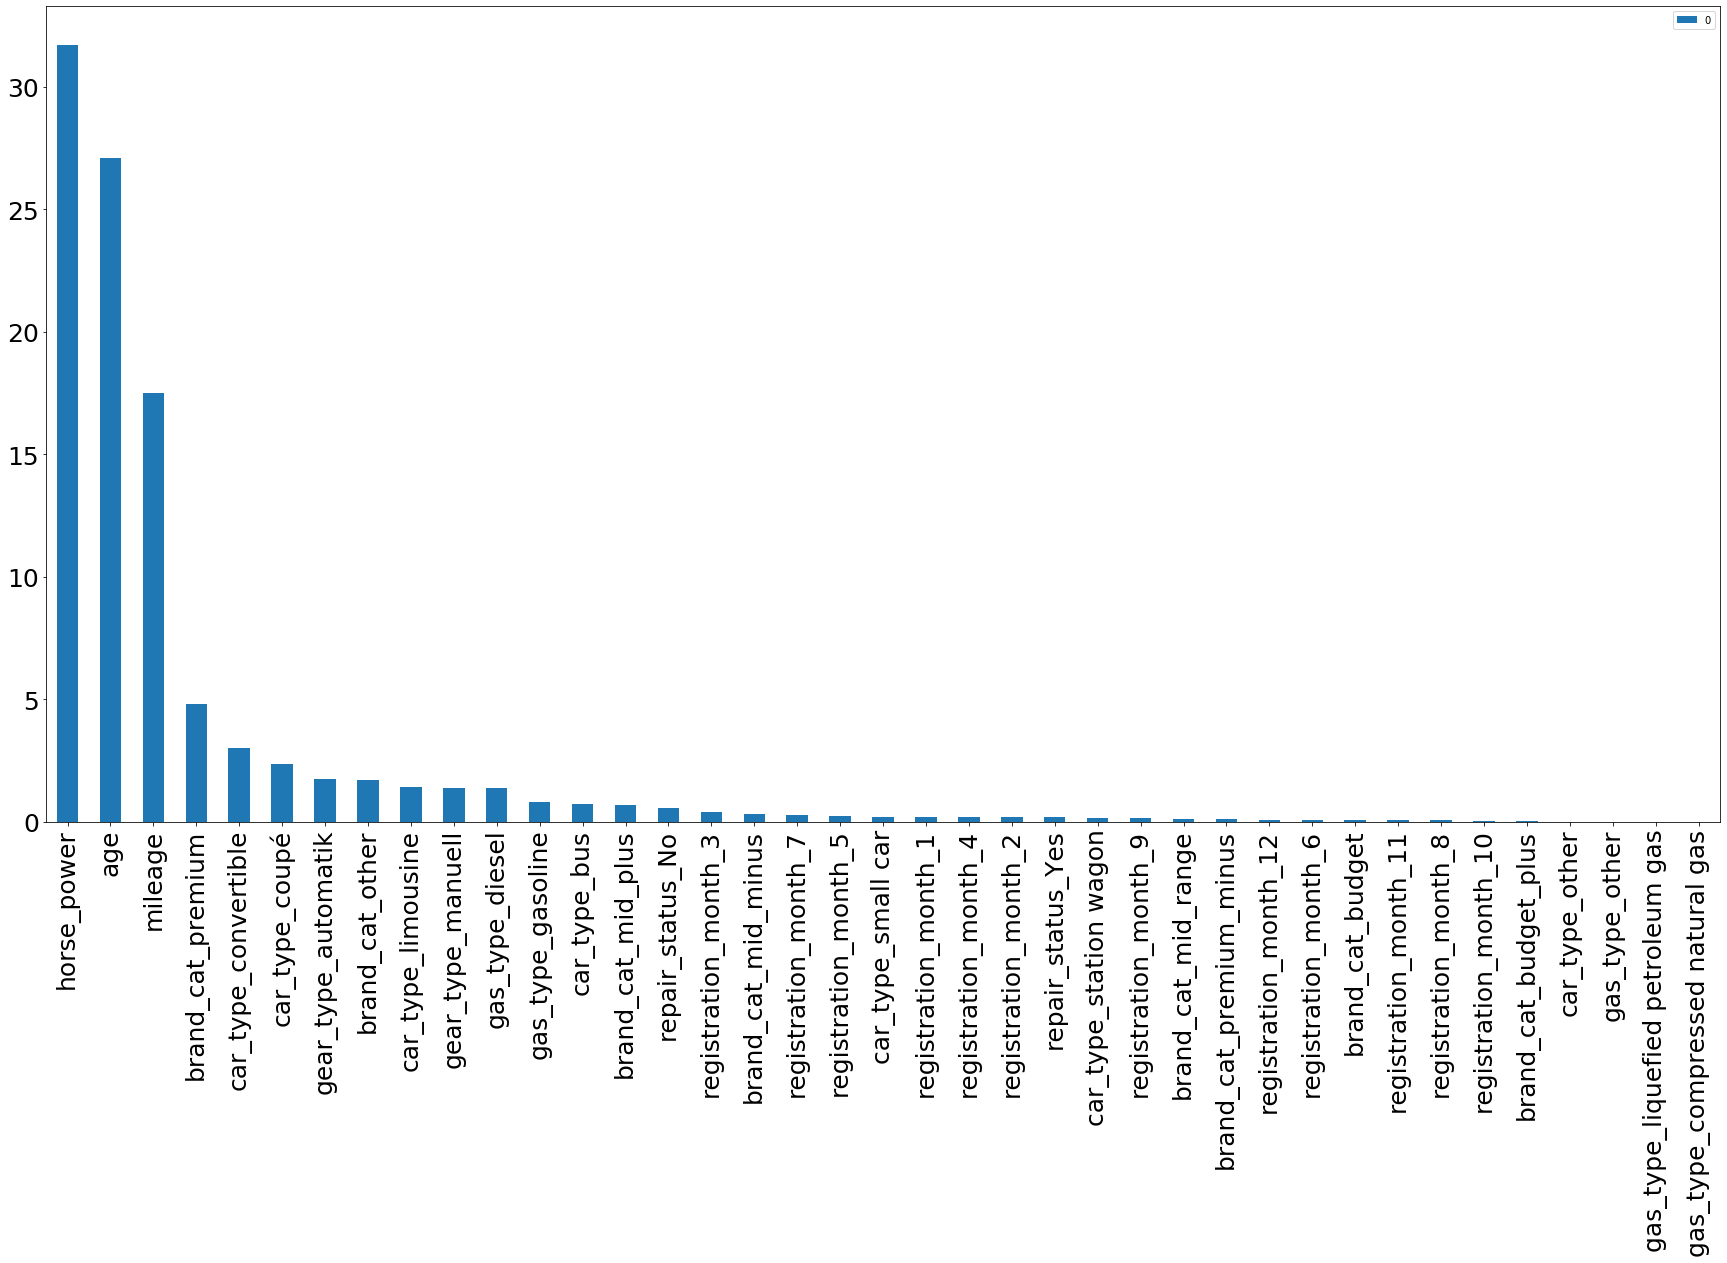

In [112]:
#Let's see what features have the highest predictive power
b =list(cbr.feature_importances_[:])
plt.figure(figsize=(30,15))
features = pd.DataFrame(index=X.columns, data =b)
features.sort_values(0, ascending= False).plot.bar(figsize=(30,15), fontsize=25);




In [270]:
cross_val(cbr, X,y)

0:	learn: 3539814.8388139	total: 65.4ms	remaining: 2m 10s
1:	learn: 3302374.4783684	total: 113ms	remaining: 1m 52s
2:	learn: 3088629.6140199	total: 166ms	remaining: 1m 50s
3:	learn: 2906925.4137795	total: 208ms	remaining: 1m 43s
4:	learn: 2742164.4407594	total: 236ms	remaining: 1m 33s
5:	learn: 2598860.0021306	total: 264ms	remaining: 1m 27s
6:	learn: 2469883.6712454	total: 306ms	remaining: 1m 27s
7:	learn: 2358519.0649943	total: 349ms	remaining: 1m 26s
8:	learn: 2262520.7072264	total: 400ms	remaining: 1m 28s
9:	learn: 2178577.7307220	total: 450ms	remaining: 1m 29s
10:	learn: 2105964.0251440	total: 496ms	remaining: 1m 29s
11:	learn: 2042854.8936921	total: 542ms	remaining: 1m 29s
12:	learn: 1985080.1652457	total: 586ms	remaining: 1m 29s
13:	learn: 1936454.5533912	total: 632ms	remaining: 1m 29s
14:	learn: 1890853.2375896	total: 676ms	remaining: 1m 29s
15:	learn: 1852583.0549300	total: 718ms	remaining: 1m 29s
16:	learn: 1820077.1463009	total: 766ms	remaining: 1m 29s
17:	learn: 1789291.4721

143:	learn: 1280202.6823118	total: 5.88s	remaining: 1m 15s
144:	learn: 1278844.2472901	total: 5.93s	remaining: 1m 15s
145:	learn: 1277972.3280345	total: 5.97s	remaining: 1m 15s
146:	learn: 1276993.7018785	total: 6.02s	remaining: 1m 15s
147:	learn: 1275712.8599915	total: 6.06s	remaining: 1m 15s
148:	learn: 1274742.4322860	total: 6.11s	remaining: 1m 15s
149:	learn: 1274058.5136047	total: 6.15s	remaining: 1m 15s
150:	learn: 1272609.2505628	total: 6.2s	remaining: 1m 15s
151:	learn: 1271973.7423331	total: 6.24s	remaining: 1m 15s
152:	learn: 1271348.7075886	total: 6.29s	remaining: 1m 15s
153:	learn: 1270110.4909087	total: 6.34s	remaining: 1m 15s
154:	learn: 1269334.1933075	total: 6.38s	remaining: 1m 15s
155:	learn: 1268012.4201117	total: 6.43s	remaining: 1m 15s
156:	learn: 1266922.6878363	total: 6.47s	remaining: 1m 15s
157:	learn: 1266115.3137809	total: 6.5s	remaining: 1m 15s
158:	learn: 1265288.8895470	total: 6.53s	remaining: 1m 15s
159:	learn: 1264638.7091137	total: 6.56s	remaining: 1m 15s

289:	learn: 1170704.3417494	total: 11s	remaining: 1m 4s
290:	learn: 1170247.7338803	total: 11.1s	remaining: 1m 4s
291:	learn: 1169958.9044120	total: 11.1s	remaining: 1m 4s
292:	learn: 1169468.4589169	total: 11.1s	remaining: 1m 4s
293:	learn: 1169064.6689320	total: 11.1s	remaining: 1m 4s
294:	learn: 1168640.7700332	total: 11.2s	remaining: 1m 4s
295:	learn: 1168331.4091324	total: 11.2s	remaining: 1m 4s
296:	learn: 1167323.4437108	total: 11.2s	remaining: 1m 4s
297:	learn: 1166416.6168679	total: 11.2s	remaining: 1m 4s
298:	learn: 1165981.4349776	total: 11.3s	remaining: 1m 4s
299:	learn: 1165448.5231726	total: 11.3s	remaining: 1m 4s
300:	learn: 1164590.2059980	total: 11.3s	remaining: 1m 3s
301:	learn: 1164338.6044899	total: 11.4s	remaining: 1m 3s
302:	learn: 1163923.2660717	total: 11.4s	remaining: 1m 3s
303:	learn: 1163464.0445648	total: 11.4s	remaining: 1m 3s
304:	learn: 1163201.4071784	total: 11.5s	remaining: 1m 3s
305:	learn: 1162609.4212286	total: 11.5s	remaining: 1m 3s
306:	learn: 1162

437:	learn: 1108584.0309092	total: 15.6s	remaining: 55.7s
438:	learn: 1108340.6317976	total: 15.6s	remaining: 55.6s
439:	learn: 1107938.0113156	total: 15.7s	remaining: 55.6s
440:	learn: 1107440.1311748	total: 15.7s	remaining: 55.5s
441:	learn: 1107200.5743787	total: 15.7s	remaining: 55.5s
442:	learn: 1106999.4009714	total: 15.8s	remaining: 55.4s
443:	learn: 1106688.2564379	total: 15.8s	remaining: 55.3s
444:	learn: 1106095.2377860	total: 15.8s	remaining: 55.3s
445:	learn: 1105597.6152867	total: 15.9s	remaining: 55.2s
446:	learn: 1105477.5091131	total: 15.9s	remaining: 55.2s
447:	learn: 1105014.2043662	total: 15.9s	remaining: 55.1s
448:	learn: 1104804.2385129	total: 15.9s	remaining: 55s
449:	learn: 1104650.5107985	total: 16s	remaining: 55s
450:	learn: 1104417.8944838	total: 16s	remaining: 54.9s
451:	learn: 1104171.4099767	total: 16s	remaining: 54.8s
452:	learn: 1103720.5988054	total: 16s	remaining: 54.8s
453:	learn: 1103479.3863299	total: 16.1s	remaining: 54.7s
454:	learn: 1103160.595987

582:	learn: 1063521.9149282	total: 19.7s	remaining: 47.8s
583:	learn: 1063231.3363362	total: 19.7s	remaining: 47.8s
584:	learn: 1062785.8013760	total: 19.7s	remaining: 47.7s
585:	learn: 1062541.4649246	total: 19.8s	remaining: 47.7s
586:	learn: 1062394.4630920	total: 19.8s	remaining: 47.6s
587:	learn: 1062241.5982126	total: 19.8s	remaining: 47.6s
588:	learn: 1061837.5780486	total: 19.8s	remaining: 47.5s
589:	learn: 1061687.5040567	total: 19.9s	remaining: 47.5s
590:	learn: 1061525.6553111	total: 19.9s	remaining: 47.4s
591:	learn: 1061346.3826152	total: 19.9s	remaining: 47.4s
592:	learn: 1060981.2202417	total: 20s	remaining: 47.3s
593:	learn: 1060688.6271545	total: 20s	remaining: 47.3s
594:	learn: 1060173.0408245	total: 20s	remaining: 47.2s
595:	learn: 1059858.6308808	total: 20s	remaining: 47.2s
596:	learn: 1059541.5769575	total: 20.1s	remaining: 47.1s
597:	learn: 1059423.2339268	total: 20.1s	remaining: 47.1s
598:	learn: 1059162.7921228	total: 20.1s	remaining: 47s
599:	learn: 1058904.4490

728:	learn: 1029023.1333755	total: 24.5s	remaining: 42.7s
729:	learn: 1028832.5360998	total: 24.5s	remaining: 42.6s
730:	learn: 1028610.9894677	total: 24.5s	remaining: 42.6s
731:	learn: 1028462.8356286	total: 24.6s	remaining: 42.5s
732:	learn: 1028360.2273596	total: 24.6s	remaining: 42.5s
733:	learn: 1028067.1015831	total: 24.6s	remaining: 42.5s
734:	learn: 1027845.8976240	total: 24.7s	remaining: 42.4s
735:	learn: 1027632.7480417	total: 24.7s	remaining: 42.4s
736:	learn: 1027348.6946926	total: 24.7s	remaining: 42.4s
737:	learn: 1027177.9284542	total: 24.8s	remaining: 42.4s
738:	learn: 1027037.1242415	total: 24.8s	remaining: 42.3s
739:	learn: 1026862.1938059	total: 24.9s	remaining: 42.3s
740:	learn: 1026664.9096531	total: 24.9s	remaining: 42.3s
741:	learn: 1026464.8029411	total: 24.9s	remaining: 42.3s
742:	learn: 1026258.0098337	total: 25s	remaining: 42.2s
743:	learn: 1026125.4197024	total: 25s	remaining: 42.2s
744:	learn: 1025671.5884327	total: 25s	remaining: 42.2s
745:	learn: 1025246.

873:	learn: 999857.6108506	total: 29.9s	remaining: 38.5s
874:	learn: 999697.4580320	total: 29.9s	remaining: 38.4s
875:	learn: 999542.4299343	total: 29.9s	remaining: 38.4s
876:	learn: 999242.4569921	total: 29.9s	remaining: 38.3s
877:	learn: 999162.9370596	total: 30s	remaining: 38.3s
878:	learn: 998904.1048766	total: 30s	remaining: 38.3s
879:	learn: 998702.0308413	total: 30s	remaining: 38.2s
880:	learn: 998583.6741639	total: 30.1s	remaining: 38.2s
881:	learn: 998355.5734646	total: 30.1s	remaining: 38.2s
882:	learn: 998161.2112775	total: 30.2s	remaining: 38.2s
883:	learn: 998001.1155719	total: 30.2s	remaining: 38.1s
884:	learn: 997914.7811414	total: 30.2s	remaining: 38.1s
885:	learn: 997767.3974138	total: 30.3s	remaining: 38.1s
886:	learn: 997614.3230147	total: 30.5s	remaining: 38.2s
887:	learn: 997485.8750316	total: 30.5s	remaining: 38.2s
888:	learn: 997388.2062375	total: 30.6s	remaining: 38.2s
889:	learn: 997301.9148547	total: 30.6s	remaining: 38.2s
890:	learn: 997006.3897239	total: 30.

1023:	learn: 974681.4234176	total: 37.7s	remaining: 35.9s
1024:	learn: 974553.9544592	total: 37.7s	remaining: 35.9s
1025:	learn: 974450.7859297	total: 37.8s	remaining: 35.8s
1026:	learn: 974378.1233653	total: 37.8s	remaining: 35.8s
1027:	learn: 974206.6792161	total: 37.8s	remaining: 35.8s
1028:	learn: 974135.4526245	total: 37.8s	remaining: 35.7s
1029:	learn: 974031.0682605	total: 37.9s	remaining: 35.7s
1030:	learn: 973856.2369410	total: 37.9s	remaining: 35.6s
1031:	learn: 973797.4555426	total: 37.9s	remaining: 35.6s
1032:	learn: 973715.0685662	total: 38s	remaining: 35.6s
1033:	learn: 973602.3847883	total: 38s	remaining: 35.5s
1034:	learn: 973499.6926977	total: 38s	remaining: 35.5s
1035:	learn: 973403.4672791	total: 38.1s	remaining: 35.4s
1036:	learn: 973331.1217814	total: 38.1s	remaining: 35.4s
1037:	learn: 973197.4926058	total: 38.1s	remaining: 35.3s
1038:	learn: 973023.8618228	total: 38.1s	remaining: 35.3s
1039:	learn: 972774.9405932	total: 38.2s	remaining: 35.2s
1040:	learn: 972666.

1172:	learn: 954354.7456528	total: 42.1s	remaining: 29.7s
1173:	learn: 954240.4250442	total: 42.1s	remaining: 29.7s
1174:	learn: 954086.0842397	total: 42.2s	remaining: 29.6s
1175:	learn: 953924.2452064	total: 42.2s	remaining: 29.6s
1176:	learn: 953730.6317886	total: 42.2s	remaining: 29.5s
1177:	learn: 953649.3272451	total: 42.3s	remaining: 29.5s
1178:	learn: 953576.7474847	total: 42.3s	remaining: 29.4s
1179:	learn: 953513.4108012	total: 42.3s	remaining: 29.4s
1180:	learn: 953430.4108279	total: 42.3s	remaining: 29.4s
1181:	learn: 953324.9705355	total: 42.4s	remaining: 29.3s
1182:	learn: 953089.6409467	total: 42.4s	remaining: 29.3s
1183:	learn: 953009.3825443	total: 42.4s	remaining: 29.2s
1184:	learn: 952910.9293850	total: 42.5s	remaining: 29.2s
1185:	learn: 952729.1684934	total: 42.5s	remaining: 29.2s
1186:	learn: 952595.0440693	total: 42.5s	remaining: 29.1s
1187:	learn: 952539.1350682	total: 42.6s	remaining: 29.1s
1188:	learn: 952380.6393111	total: 42.6s	remaining: 29.1s
1189:	learn: 9

1315:	learn: 937077.0107398	total: 46.2s	remaining: 24s
1316:	learn: 936931.0620018	total: 46.3s	remaining: 24s
1317:	learn: 936746.2887446	total: 46.3s	remaining: 24s
1318:	learn: 936649.6394921	total: 46.4s	remaining: 23.9s
1319:	learn: 936566.9312914	total: 46.4s	remaining: 23.9s
1320:	learn: 936475.6644797	total: 46.5s	remaining: 23.9s
1321:	learn: 936300.1651955	total: 46.5s	remaining: 23.8s
1322:	learn: 936170.9537083	total: 46.5s	remaining: 23.8s
1323:	learn: 936109.4698044	total: 46.6s	remaining: 23.8s
1324:	learn: 936049.5952471	total: 46.6s	remaining: 23.7s
1325:	learn: 935944.4986351	total: 46.6s	remaining: 23.7s
1326:	learn: 935853.8016009	total: 46.6s	remaining: 23.7s
1327:	learn: 935770.0052592	total: 46.7s	remaining: 23.6s
1328:	learn: 935693.5576081	total: 46.7s	remaining: 23.6s
1329:	learn: 935557.4227713	total: 46.7s	remaining: 23.5s
1330:	learn: 935454.2231647	total: 46.8s	remaining: 23.5s
1331:	learn: 935390.7883648	total: 46.8s	remaining: 23.5s
1332:	learn: 935141.

1458:	learn: 920990.9343526	total: 50.4s	remaining: 18.7s
1459:	learn: 920927.9959998	total: 50.4s	remaining: 18.7s
1460:	learn: 920752.1536042	total: 50.5s	remaining: 18.6s
1461:	learn: 920630.3244155	total: 50.5s	remaining: 18.6s
1462:	learn: 920561.9424925	total: 50.5s	remaining: 18.5s
1463:	learn: 920495.5327543	total: 50.5s	remaining: 18.5s
1464:	learn: 920402.7019718	total: 50.6s	remaining: 18.5s
1465:	learn: 920343.3471044	total: 50.6s	remaining: 18.4s
1466:	learn: 920168.7745674	total: 50.6s	remaining: 18.4s
1467:	learn: 920115.2784468	total: 50.7s	remaining: 18.4s
1468:	learn: 919986.8275505	total: 50.7s	remaining: 18.3s
1469:	learn: 919823.9684740	total: 50.7s	remaining: 18.3s
1470:	learn: 919739.8823211	total: 50.8s	remaining: 18.3s
1471:	learn: 919668.7627677	total: 50.8s	remaining: 18.2s
1472:	learn: 919605.6689401	total: 50.8s	remaining: 18.2s
1473:	learn: 919537.8371644	total: 50.9s	remaining: 18.1s
1474:	learn: 919432.7642088	total: 50.9s	remaining: 18.1s
1475:	learn: 9

1605:	learn: 906549.5492769	total: 54.8s	remaining: 13.4s
1606:	learn: 906503.7897403	total: 54.8s	remaining: 13.4s
1607:	learn: 906477.2886459	total: 54.8s	remaining: 13.4s
1608:	learn: 906429.7861867	total: 54.9s	remaining: 13.3s
1609:	learn: 906252.4606869	total: 54.9s	remaining: 13.3s
1610:	learn: 906222.8615266	total: 54.9s	remaining: 13.3s
1611:	learn: 906140.5669040	total: 54.9s	remaining: 13.2s
1612:	learn: 906088.6541992	total: 55s	remaining: 13.2s
1613:	learn: 905968.3196096	total: 55s	remaining: 13.2s
1614:	learn: 905850.9068732	total: 55s	remaining: 13.1s
1615:	learn: 905820.1441479	total: 55.1s	remaining: 13.1s
1616:	learn: 905758.3764106	total: 55.1s	remaining: 13s
1617:	learn: 905657.5936528	total: 55.1s	remaining: 13s
1618:	learn: 905565.6793416	total: 55.1s	remaining: 13s
1619:	learn: 905473.2536184	total: 55.2s	remaining: 12.9s
1620:	learn: 905450.4414724	total: 55.2s	remaining: 12.9s
1621:	learn: 905389.1491250	total: 55.3s	remaining: 12.9s
1622:	learn: 905329.464338

1749:	learn: 894071.3690636	total: 59.2s	remaining: 8.45s
1750:	learn: 894021.9780288	total: 59.2s	remaining: 8.42s
1751:	learn: 893939.2343168	total: 59.2s	remaining: 8.38s
1752:	learn: 893903.5229976	total: 59.3s	remaining: 8.35s
1753:	learn: 893857.6369266	total: 59.3s	remaining: 8.31s
1754:	learn: 893785.1355991	total: 59.3s	remaining: 8.28s
1755:	learn: 893734.8771274	total: 59.3s	remaining: 8.24s
1756:	learn: 893632.5561346	total: 59.4s	remaining: 8.21s
1757:	learn: 893471.2314479	total: 59.4s	remaining: 8.18s
1758:	learn: 893411.9703954	total: 59.5s	remaining: 8.15s
1759:	learn: 893145.6703184	total: 59.5s	remaining: 8.11s
1760:	learn: 892998.7380264	total: 59.5s	remaining: 8.08s
1761:	learn: 892770.8844071	total: 59.6s	remaining: 8.04s
1762:	learn: 892719.9637122	total: 59.6s	remaining: 8.01s
1763:	learn: 892675.7179095	total: 59.6s	remaining: 7.98s
1764:	learn: 892604.0166751	total: 59.6s	remaining: 7.94s
1765:	learn: 892534.4946279	total: 59.7s	remaining: 7.91s
1766:	learn: 8

1894:	learn: 881159.7381470	total: 1m 4s	remaining: 3.57s
1895:	learn: 881127.7670208	total: 1m 4s	remaining: 3.54s
1896:	learn: 881065.8130744	total: 1m 4s	remaining: 3.5s
1897:	learn: 880982.3013556	total: 1m 4s	remaining: 3.47s
1898:	learn: 880914.4786760	total: 1m 4s	remaining: 3.43s
1899:	learn: 880789.8204274	total: 1m 4s	remaining: 3.4s
1900:	learn: 880741.1003542	total: 1m 4s	remaining: 3.37s
1901:	learn: 880691.6417795	total: 1m 4s	remaining: 3.33s
1902:	learn: 880636.1529320	total: 1m 4s	remaining: 3.3s
1903:	learn: 880574.0309299	total: 1m 4s	remaining: 3.26s
1904:	learn: 880425.4951116	total: 1m 4s	remaining: 3.23s
1905:	learn: 880323.9159044	total: 1m 4s	remaining: 3.19s
1906:	learn: 880228.8695371	total: 1m 4s	remaining: 3.16s
1907:	learn: 880182.0653740	total: 1m 4s	remaining: 3.13s
1908:	learn: 880087.7969468	total: 1m 4s	remaining: 3.09s
1909:	learn: 879912.7611490	total: 1m 4s	remaining: 3.06s
1910:	learn: 879794.8351786	total: 1m 4s	remaining: 3.02s
1911:	learn: 8797

40:	learn: 1506616.4124798	total: 1.4s	remaining: 1m 7s
41:	learn: 1499897.5565494	total: 1.44s	remaining: 1m 6s
42:	learn: 1493422.4197393	total: 1.46s	remaining: 1m 6s
43:	learn: 1488434.9543687	total: 1.49s	remaining: 1m 6s
44:	learn: 1483474.8361287	total: 1.51s	remaining: 1m 5s
45:	learn: 1478855.6973788	total: 1.54s	remaining: 1m 5s
46:	learn: 1473439.0887530	total: 1.56s	remaining: 1m 4s
47:	learn: 1468751.8228971	total: 1.59s	remaining: 1m 4s
48:	learn: 1465780.6110634	total: 1.61s	remaining: 1m 4s
49:	learn: 1461151.6654772	total: 1.65s	remaining: 1m 4s
50:	learn: 1457431.6342556	total: 1.67s	remaining: 1m 3s
51:	learn: 1454430.5701515	total: 1.7s	remaining: 1m 3s
52:	learn: 1451539.3038628	total: 1.73s	remaining: 1m 3s
53:	learn: 1446594.5092835	total: 1.75s	remaining: 1m 3s
54:	learn: 1444375.9253134	total: 1.78s	remaining: 1m 3s
55:	learn: 1440885.3361542	total: 1.81s	remaining: 1m 2s
56:	learn: 1437342.9516352	total: 1.85s	remaining: 1m 3s
57:	learn: 1435476.3638703	total:

189:	learn: 1250400.9702997	total: 5.52s	remaining: 52.6s
190:	learn: 1249267.6578853	total: 5.55s	remaining: 52.5s
191:	learn: 1248257.4166458	total: 5.57s	remaining: 52.5s
192:	learn: 1247149.7153346	total: 5.6s	remaining: 52.4s
193:	learn: 1246424.7875767	total: 5.63s	remaining: 52.4s
194:	learn: 1245241.7243941	total: 5.65s	remaining: 52.3s
195:	learn: 1244606.9846678	total: 5.67s	remaining: 52.2s
196:	learn: 1243981.3241186	total: 5.7s	remaining: 52.2s
197:	learn: 1243404.0435881	total: 5.73s	remaining: 52.1s
198:	learn: 1242736.9418724	total: 5.76s	remaining: 52.1s
199:	learn: 1242206.7834054	total: 5.79s	remaining: 52.1s
200:	learn: 1241768.9370169	total: 5.81s	remaining: 52s
201:	learn: 1241122.7521462	total: 5.84s	remaining: 52s
202:	learn: 1240580.9973731	total: 5.87s	remaining: 52s
203:	learn: 1239751.0851139	total: 5.9s	remaining: 52s
204:	learn: 1239271.9083396	total: 5.93s	remaining: 51.9s
205:	learn: 1238354.7745350	total: 5.96s	remaining: 51.9s
206:	learn: 1237675.51009

332:	learn: 1168461.8155709	total: 9.33s	remaining: 46.7s
333:	learn: 1168129.3948875	total: 9.36s	remaining: 46.7s
334:	learn: 1167745.5688593	total: 9.38s	remaining: 46.6s
335:	learn: 1167007.0224184	total: 9.41s	remaining: 46.6s
336:	learn: 1166474.3261908	total: 9.43s	remaining: 46.5s
337:	learn: 1165954.8296152	total: 9.46s	remaining: 46.5s
338:	learn: 1165413.9254171	total: 9.48s	remaining: 46.5s
339:	learn: 1164990.4824284	total: 9.51s	remaining: 46.4s
340:	learn: 1164372.5161289	total: 9.54s	remaining: 46.4s
341:	learn: 1163583.5114632	total: 9.57s	remaining: 46.4s
342:	learn: 1163108.4476414	total: 9.6s	remaining: 46.4s
343:	learn: 1162396.7926910	total: 9.62s	remaining: 46.3s
344:	learn: 1162159.2559482	total: 9.64s	remaining: 46.3s
345:	learn: 1161953.7814715	total: 9.67s	remaining: 46.2s
346:	learn: 1161614.0231707	total: 9.69s	remaining: 46.2s
347:	learn: 1161259.1652164	total: 9.72s	remaining: 46.1s
348:	learn: 1160981.0597936	total: 9.75s	remaining: 46.1s
349:	learn: 116

476:	learn: 1112361.9229949	total: 13.2s	remaining: 42s
477:	learn: 1112145.5323059	total: 13.2s	remaining: 42s
478:	learn: 1111908.7431789	total: 13.2s	remaining: 42s
479:	learn: 1111698.0078934	total: 13.3s	remaining: 42s
480:	learn: 1111283.2142939	total: 13.3s	remaining: 41.9s
481:	learn: 1111056.8678224	total: 13.3s	remaining: 41.9s
482:	learn: 1110781.9479389	total: 13.3s	remaining: 41.9s
483:	learn: 1110508.0922641	total: 13.4s	remaining: 41.8s
484:	learn: 1110183.3420731	total: 13.4s	remaining: 41.8s
485:	learn: 1109951.7885858	total: 13.4s	remaining: 41.8s
486:	learn: 1109702.9541552	total: 13.4s	remaining: 41.8s
487:	learn: 1109332.0449238	total: 13.5s	remaining: 41.7s
488:	learn: 1109032.5454426	total: 13.5s	remaining: 41.7s
489:	learn: 1108765.8054081	total: 13.5s	remaining: 41.7s
490:	learn: 1108267.1159574	total: 13.5s	remaining: 41.6s
491:	learn: 1108035.0875243	total: 13.6s	remaining: 41.6s
492:	learn: 1107813.5519405	total: 13.6s	remaining: 41.6s
493:	learn: 1107760.38

619:	learn: 1072112.7501400	total: 17.1s	remaining: 38s
620:	learn: 1071883.7247859	total: 17.1s	remaining: 37.9s
621:	learn: 1071718.9095503	total: 17.1s	remaining: 37.9s
622:	learn: 1071552.5812834	total: 17.1s	remaining: 37.9s
623:	learn: 1071261.0839483	total: 17.2s	remaining: 37.8s
624:	learn: 1071089.7005263	total: 17.2s	remaining: 37.8s
625:	learn: 1070700.3959438	total: 17.2s	remaining: 37.8s
626:	learn: 1070558.8580252	total: 17.2s	remaining: 37.8s
627:	learn: 1070388.4018307	total: 17.3s	remaining: 37.7s
628:	learn: 1070085.0285261	total: 17.3s	remaining: 37.7s
629:	learn: 1069726.2928223	total: 17.3s	remaining: 37.7s
630:	learn: 1069581.5689001	total: 17.4s	remaining: 37.7s
631:	learn: 1069363.2246886	total: 17.4s	remaining: 37.6s
632:	learn: 1068946.4601293	total: 17.4s	remaining: 37.6s
633:	learn: 1068653.1073549	total: 17.4s	remaining: 37.6s
634:	learn: 1068341.4289129	total: 17.5s	remaining: 37.5s
635:	learn: 1068240.1613648	total: 17.5s	remaining: 37.5s
636:	learn: 1068

763:	learn: 1040049.0070473	total: 20.9s	remaining: 33.8s
764:	learn: 1039834.6087555	total: 20.9s	remaining: 33.8s
765:	learn: 1039634.1113234	total: 20.9s	remaining: 33.7s
766:	learn: 1039472.5830690	total: 21s	remaining: 33.7s
767:	learn: 1039162.2536500	total: 21s	remaining: 33.7s
768:	learn: 1039035.2316484	total: 21s	remaining: 33.6s
769:	learn: 1038862.7621217	total: 21s	remaining: 33.6s
770:	learn: 1038758.5024483	total: 21.1s	remaining: 33.6s
771:	learn: 1038616.4255066	total: 21.1s	remaining: 33.6s
772:	learn: 1038393.6532589	total: 21.1s	remaining: 33.5s
773:	learn: 1038271.7769597	total: 21.2s	remaining: 33.5s
774:	learn: 1037984.0659433	total: 21.2s	remaining: 33.5s
775:	learn: 1037568.6436913	total: 21.2s	remaining: 33.5s
776:	learn: 1037382.4279287	total: 21.2s	remaining: 33.4s
777:	learn: 1037126.4961047	total: 21.3s	remaining: 33.4s
778:	learn: 1036963.6584282	total: 21.3s	remaining: 33.4s
779:	learn: 1036796.9478528	total: 21.3s	remaining: 33.4s
780:	learn: 1036663.39

909:	learn: 1010456.2086149	total: 25s	remaining: 30s
910:	learn: 1010354.1751872	total: 25s	remaining: 29.9s
911:	learn: 1010173.9815678	total: 25.1s	remaining: 29.9s
912:	learn: 1009991.9241429	total: 25.1s	remaining: 29.9s
913:	learn: 1009732.0907779	total: 25.1s	remaining: 29.8s
914:	learn: 1009606.5791081	total: 25.1s	remaining: 29.8s
915:	learn: 1009350.2731320	total: 25.2s	remaining: 29.8s
916:	learn: 1009209.1676611	total: 25.2s	remaining: 29.8s
917:	learn: 1008991.1269310	total: 25.2s	remaining: 29.7s
918:	learn: 1008840.9550475	total: 25.3s	remaining: 29.7s
919:	learn: 1008696.7484734	total: 25.3s	remaining: 29.7s
920:	learn: 1008516.6729886	total: 25.3s	remaining: 29.6s
921:	learn: 1008446.6904184	total: 25.3s	remaining: 29.6s
922:	learn: 1008278.3333644	total: 25.4s	remaining: 29.6s
923:	learn: 1008141.0456042	total: 25.4s	remaining: 29.6s
924:	learn: 1007945.0712175	total: 25.4s	remaining: 29.5s
925:	learn: 1007727.5205547	total: 25.4s	remaining: 29.5s
926:	learn: 1007568.

1053:	learn: 988235.7460060	total: 28.9s	remaining: 26s
1054:	learn: 988195.8123082	total: 29s	remaining: 25.9s
1055:	learn: 988075.9871684	total: 29s	remaining: 25.9s
1056:	learn: 987988.3435211	total: 29s	remaining: 25.9s
1057:	learn: 987880.1594591	total: 29s	remaining: 25.9s
1058:	learn: 987762.4322126	total: 29.1s	remaining: 25.8s
1059:	learn: 987629.0880782	total: 29.1s	remaining: 25.8s
1060:	learn: 987566.7337238	total: 29.1s	remaining: 25.8s
1061:	learn: 987422.7457628	total: 29.2s	remaining: 25.8s
1062:	learn: 987280.6872111	total: 29.2s	remaining: 25.7s
1063:	learn: 987116.1611421	total: 29.2s	remaining: 25.7s
1064:	learn: 987034.7506365	total: 29.2s	remaining: 25.7s
1065:	learn: 986867.2428375	total: 29.3s	remaining: 25.6s
1066:	learn: 986764.4225110	total: 29.3s	remaining: 25.6s
1067:	learn: 986646.8391745	total: 29.3s	remaining: 25.6s
1068:	learn: 986323.5178791	total: 29.3s	remaining: 25.5s
1069:	learn: 986221.7638422	total: 29.4s	remaining: 25.5s
1070:	learn: 986084.5198

1197:	learn: 968813.5207593	total: 32.8s	remaining: 22s
1198:	learn: 968724.7240676	total: 32.9s	remaining: 22s
1199:	learn: 968554.4516400	total: 32.9s	remaining: 21.9s
1200:	learn: 968401.4603808	total: 32.9s	remaining: 21.9s
1201:	learn: 968277.6153254	total: 33s	remaining: 21.9s
1202:	learn: 968162.1266750	total: 33s	remaining: 21.9s
1203:	learn: 968044.6117289	total: 33s	remaining: 21.8s
1204:	learn: 967742.8463233	total: 33.1s	remaining: 21.8s
1205:	learn: 967656.6272294	total: 33.1s	remaining: 21.8s
1206:	learn: 967547.1527102	total: 33.1s	remaining: 21.8s
1207:	learn: 967370.2616596	total: 33.1s	remaining: 21.7s
1208:	learn: 967197.3178168	total: 33.2s	remaining: 21.7s
1209:	learn: 967113.7217605	total: 33.2s	remaining: 21.7s
1210:	learn: 967030.6268816	total: 33.2s	remaining: 21.6s
1211:	learn: 966908.3232501	total: 33.2s	remaining: 21.6s
1212:	learn: 966839.4917330	total: 33.3s	remaining: 21.6s
1213:	learn: 966706.6637647	total: 33.3s	remaining: 21.6s
1214:	learn: 966654.4908

1342:	learn: 951071.9814930	total: 37.4s	remaining: 18.3s
1343:	learn: 950881.8519590	total: 37.5s	remaining: 18.3s
1344:	learn: 950805.7699262	total: 37.5s	remaining: 18.3s
1345:	learn: 950651.7815124	total: 37.5s	remaining: 18.2s
1346:	learn: 950495.0018774	total: 37.6s	remaining: 18.2s
1347:	learn: 950392.9962511	total: 37.6s	remaining: 18.2s
1348:	learn: 950344.3855158	total: 37.6s	remaining: 18.2s
1349:	learn: 950246.3545543	total: 37.7s	remaining: 18.1s
1350:	learn: 950098.3387899	total: 37.7s	remaining: 18.1s
1351:	learn: 950038.8177758	total: 37.8s	remaining: 18.1s
1352:	learn: 949965.0204570	total: 37.8s	remaining: 18.1s
1353:	learn: 949914.8242608	total: 37.8s	remaining: 18.1s
1354:	learn: 949849.4902654	total: 37.9s	remaining: 18s
1355:	learn: 949651.6170912	total: 37.9s	remaining: 18s
1356:	learn: 949544.6412337	total: 38s	remaining: 18s
1357:	learn: 949465.7004277	total: 38s	remaining: 18s
1358:	learn: 949393.1138777	total: 38s	remaining: 17.9s
1359:	learn: 949286.0212426	

1491:	learn: 933865.7786930	total: 41.8s	remaining: 14.2s
1492:	learn: 933739.1945870	total: 41.8s	remaining: 14.2s
1493:	learn: 933617.5186658	total: 41.9s	remaining: 14.2s
1494:	learn: 933446.2101360	total: 41.9s	remaining: 14.2s
1495:	learn: 933360.5926596	total: 41.9s	remaining: 14.1s
1496:	learn: 933313.1266885	total: 41.9s	remaining: 14.1s
1497:	learn: 933195.8987954	total: 42s	remaining: 14.1s
1498:	learn: 933090.8285828	total: 42s	remaining: 14s
1499:	learn: 933008.1665080	total: 42s	remaining: 14s
1500:	learn: 932963.0636768	total: 42.1s	remaining: 14s
1501:	learn: 932698.9383158	total: 42.1s	remaining: 14s
1502:	learn: 932606.7428659	total: 42.1s	remaining: 13.9s
1503:	learn: 932571.8531675	total: 42.1s	remaining: 13.9s
1504:	learn: 932414.2220318	total: 42.2s	remaining: 13.9s
1505:	learn: 932240.1342788	total: 42.2s	remaining: 13.8s
1506:	learn: 932163.7909256	total: 42.2s	remaining: 13.8s
1507:	learn: 932105.0658125	total: 42.2s	remaining: 13.8s
1508:	learn: 932010.6924253	

1641:	learn: 919878.8611206	total: 45.9s	remaining: 10s
1642:	learn: 919767.4679777	total: 45.9s	remaining: 9.98s
1643:	learn: 919686.7471913	total: 46s	remaining: 9.95s
1644:	learn: 919454.2317655	total: 46s	remaining: 9.93s
1645:	learn: 919419.9530769	total: 46s	remaining: 9.9s
1646:	learn: 919356.5908675	total: 46s	remaining: 9.87s
1647:	learn: 919289.9833996	total: 46.1s	remaining: 9.84s
1648:	learn: 919200.7812546	total: 46.1s	remaining: 9.81s
1649:	learn: 919164.4622917	total: 46.1s	remaining: 9.78s
1650:	learn: 919098.4829544	total: 46.2s	remaining: 9.76s
1651:	learn: 918946.4270659	total: 46.2s	remaining: 9.73s
1652:	learn: 918901.0514345	total: 46.2s	remaining: 9.7s
1653:	learn: 918740.7549479	total: 46.2s	remaining: 9.67s
1654:	learn: 918668.4321749	total: 46.3s	remaining: 9.64s
1655:	learn: 918584.5580507	total: 46.3s	remaining: 9.62s
1656:	learn: 918504.1028549	total: 46.3s	remaining: 9.59s
1657:	learn: 918446.4726323	total: 46.4s	remaining: 9.56s
1658:	learn: 918380.172220

1785:	learn: 906903.0655047	total: 49.8s	remaining: 5.96s
1786:	learn: 906837.1193115	total: 49.8s	remaining: 5.94s
1787:	learn: 906742.4963341	total: 49.8s	remaining: 5.91s
1788:	learn: 906673.4394069	total: 49.9s	remaining: 5.88s
1789:	learn: 906637.8970479	total: 49.9s	remaining: 5.85s
1790:	learn: 906584.9063981	total: 49.9s	remaining: 5.83s
1791:	learn: 906555.8353354	total: 50s	remaining: 5.8s
1792:	learn: 906496.8189347	total: 50s	remaining: 5.77s
1793:	learn: 906418.3080198	total: 50s	remaining: 5.74s
1794:	learn: 906328.1143109	total: 50s	remaining: 5.71s
1795:	learn: 906255.3577279	total: 50.1s	remaining: 5.69s
1796:	learn: 906221.1981785	total: 50.1s	remaining: 5.66s
1797:	learn: 906174.7779638	total: 50.1s	remaining: 5.63s
1798:	learn: 906026.0648012	total: 50.1s	remaining: 5.6s
1799:	learn: 905956.8702597	total: 50.2s	remaining: 5.57s
1800:	learn: 905917.1633254	total: 50.2s	remaining: 5.55s
1801:	learn: 905841.5960361	total: 50.2s	remaining: 5.52s
1802:	learn: 905794.9806

1933:	learn: 896403.7835540	total: 53.8s	remaining: 1.84s
1934:	learn: 896300.0596137	total: 53.9s	remaining: 1.81s
1935:	learn: 896237.9148542	total: 53.9s	remaining: 1.78s
1936:	learn: 895943.7941242	total: 53.9s	remaining: 1.75s
1937:	learn: 895895.6875881	total: 53.9s	remaining: 1.73s
1938:	learn: 895855.2061457	total: 54s	remaining: 1.7s
1939:	learn: 895833.6292743	total: 54s	remaining: 1.67s
1940:	learn: 895806.8925309	total: 54s	remaining: 1.64s
1941:	learn: 895772.8716055	total: 54.1s	remaining: 1.61s
1942:	learn: 895711.5169767	total: 54.1s	remaining: 1.59s
1943:	learn: 895618.3329932	total: 54.1s	remaining: 1.56s
1944:	learn: 895579.2091892	total: 54.1s	remaining: 1.53s
1945:	learn: 895507.7850003	total: 54.2s	remaining: 1.5s
1946:	learn: 895463.1832962	total: 54.2s	remaining: 1.48s
1947:	learn: 895405.9139941	total: 54.2s	remaining: 1.45s
1948:	learn: 895333.4691254	total: 54.2s	remaining: 1.42s
1949:	learn: 895232.0805415	total: 54.3s	remaining: 1.39s
1950:	learn: 895099.39

79:	learn: 1381268.9890383	total: 2.2s	remaining: 52.9s
80:	learn: 1378327.1984882	total: 2.23s	remaining: 52.9s
81:	learn: 1376368.5214205	total: 2.26s	remaining: 52.9s
82:	learn: 1374444.6158520	total: 2.29s	remaining: 53s
83:	learn: 1373335.5800347	total: 2.33s	remaining: 53.2s
84:	learn: 1371710.1907891	total: 2.37s	remaining: 53.3s
85:	learn: 1369612.6344760	total: 2.4s	remaining: 53.3s
86:	learn: 1366840.9604869	total: 2.43s	remaining: 53.4s
87:	learn: 1365538.4571820	total: 2.46s	remaining: 53.4s
88:	learn: 1363420.1968940	total: 2.48s	remaining: 53.4s
89:	learn: 1361824.3198634	total: 2.51s	remaining: 53.3s
90:	learn: 1360560.8688142	total: 2.54s	remaining: 53.2s
91:	learn: 1359170.7382267	total: 2.56s	remaining: 53.2s
92:	learn: 1356895.2826065	total: 2.59s	remaining: 53.1s
93:	learn: 1354746.6045334	total: 2.61s	remaining: 53s
94:	learn: 1352853.8983405	total: 2.64s	remaining: 53s
95:	learn: 1352181.8151923	total: 2.67s	remaining: 53s
96:	learn: 1351108.9770542	total: 2.7s	re

222:	learn: 1225961.1532115	total: 6.11s	remaining: 48.7s
223:	learn: 1225429.5027561	total: 6.14s	remaining: 48.7s
224:	learn: 1224664.3588633	total: 6.17s	remaining: 48.6s
225:	learn: 1222882.0647502	total: 6.19s	remaining: 48.6s
226:	learn: 1222634.7346424	total: 6.22s	remaining: 48.6s
227:	learn: 1222084.8829924	total: 6.25s	remaining: 48.5s
228:	learn: 1221023.1444191	total: 6.27s	remaining: 48.5s
229:	learn: 1220164.1885949	total: 6.3s	remaining: 48.5s
230:	learn: 1219637.3957611	total: 6.33s	remaining: 48.5s
231:	learn: 1219299.1728235	total: 6.36s	remaining: 48.5s
232:	learn: 1218782.5746380	total: 6.39s	remaining: 48.4s
233:	learn: 1218394.9881730	total: 6.41s	remaining: 48.4s
234:	learn: 1217867.7686625	total: 6.44s	remaining: 48.4s
235:	learn: 1217482.1839438	total: 6.46s	remaining: 48.3s
236:	learn: 1216781.7708200	total: 6.49s	remaining: 48.3s
237:	learn: 1216311.8312932	total: 6.52s	remaining: 48.3s
238:	learn: 1216030.7505418	total: 6.55s	remaining: 48.2s
239:	learn: 121

370:	learn: 1148746.7650202	total: 10.2s	remaining: 44.6s
371:	learn: 1148432.7509789	total: 10.2s	remaining: 44.6s
372:	learn: 1148099.6146176	total: 10.2s	remaining: 44.5s
373:	learn: 1147673.1999644	total: 10.2s	remaining: 44.5s
374:	learn: 1147331.0319808	total: 10.3s	remaining: 44.4s
375:	learn: 1146723.4982550	total: 10.3s	remaining: 44.4s
376:	learn: 1146141.3526797	total: 10.3s	remaining: 44.4s
377:	learn: 1145713.8822476	total: 10.3s	remaining: 44.4s
378:	learn: 1145122.4587974	total: 10.4s	remaining: 44.4s
379:	learn: 1144793.9487729	total: 10.4s	remaining: 44.3s
380:	learn: 1144271.1161706	total: 10.4s	remaining: 44.3s
381:	learn: 1143934.4807475	total: 10.4s	remaining: 44.3s
382:	learn: 1143371.9313322	total: 10.5s	remaining: 44.2s
383:	learn: 1142877.8972962	total: 10.5s	remaining: 44.2s
384:	learn: 1142359.7778074	total: 10.5s	remaining: 44.1s
385:	learn: 1142087.9322349	total: 10.5s	remaining: 44.1s
386:	learn: 1141464.6861739	total: 10.6s	remaining: 44.1s
387:	learn: 11

514:	learn: 1098385.2428783	total: 13.9s	remaining: 40.1s
515:	learn: 1098061.7640545	total: 13.9s	remaining: 40.1s
516:	learn: 1097881.5981742	total: 14s	remaining: 40.1s
517:	learn: 1097373.1281079	total: 14s	remaining: 40s
518:	learn: 1097022.4093612	total: 14s	remaining: 40s
519:	learn: 1096774.9747962	total: 14s	remaining: 40s
520:	learn: 1096403.7497874	total: 14.1s	remaining: 39.9s
521:	learn: 1096002.4715687	total: 14.1s	remaining: 39.9s
522:	learn: 1095595.3576220	total: 14.1s	remaining: 39.9s
523:	learn: 1095385.6359444	total: 14.2s	remaining: 39.9s
524:	learn: 1094732.1413058	total: 14.2s	remaining: 39.8s
525:	learn: 1094426.1208894	total: 14.2s	remaining: 39.8s
526:	learn: 1094156.9407383	total: 14.2s	remaining: 39.8s
527:	learn: 1094031.2369231	total: 14.3s	remaining: 39.7s
528:	learn: 1093594.1559254	total: 14.3s	remaining: 39.7s
529:	learn: 1092944.0217212	total: 14.3s	remaining: 39.7s
530:	learn: 1092721.4686059	total: 14.3s	remaining: 39.6s
531:	learn: 1092346.4146121	

661:	learn: 1060540.0114006	total: 18.4s	remaining: 37.1s
662:	learn: 1060215.7588162	total: 18.4s	remaining: 37.1s
663:	learn: 1059930.1274632	total: 18.4s	remaining: 37s
664:	learn: 1059676.6584447	total: 18.4s	remaining: 37s
665:	learn: 1059164.4167471	total: 18.5s	remaining: 37s
666:	learn: 1059008.4901660	total: 18.5s	remaining: 36.9s
667:	learn: 1058710.6731994	total: 18.5s	remaining: 36.9s
668:	learn: 1058570.6568216	total: 18.5s	remaining: 36.9s
669:	learn: 1058339.5879385	total: 18.6s	remaining: 36.9s
670:	learn: 1058144.3992118	total: 18.6s	remaining: 36.8s
671:	learn: 1057968.2100381	total: 18.6s	remaining: 36.8s
672:	learn: 1057676.0642767	total: 18.7s	remaining: 36.8s
673:	learn: 1057609.7219701	total: 18.7s	remaining: 36.8s
674:	learn: 1057404.1401795	total: 18.7s	remaining: 36.7s
675:	learn: 1057271.4379565	total: 18.7s	remaining: 36.7s
676:	learn: 1057002.4987547	total: 18.8s	remaining: 36.7s
677:	learn: 1056842.8123178	total: 18.8s	remaining: 36.7s
678:	learn: 1056660.

806:	learn: 1030552.4363275	total: 23.2s	remaining: 34.2s
807:	learn: 1030303.8007517	total: 23.2s	remaining: 34.2s
808:	learn: 1029987.1250734	total: 23.2s	remaining: 34.2s
809:	learn: 1029819.7781993	total: 23.3s	remaining: 34.2s
810:	learn: 1029679.6131384	total: 23.3s	remaining: 34.2s
811:	learn: 1029390.0537210	total: 23.3s	remaining: 34.2s
812:	learn: 1029199.9490042	total: 23.4s	remaining: 34.2s
813:	learn: 1029113.6747456	total: 23.4s	remaining: 34.1s
814:	learn: 1028866.8961633	total: 23.5s	remaining: 34.1s
815:	learn: 1028705.4709444	total: 23.5s	remaining: 34.1s
816:	learn: 1028602.1790934	total: 23.5s	remaining: 34.1s
817:	learn: 1028383.5777627	total: 23.6s	remaining: 34.1s
818:	learn: 1028193.9818877	total: 23.6s	remaining: 34.1s
819:	learn: 1028001.7438981	total: 23.7s	remaining: 34.1s
820:	learn: 1027913.8708348	total: 23.7s	remaining: 34.1s
821:	learn: 1027789.6277296	total: 23.8s	remaining: 34.1s
822:	learn: 1027684.2617087	total: 23.8s	remaining: 34s
823:	learn: 1027

955:	learn: 1004141.1783979	total: 28.9s	remaining: 31.5s
956:	learn: 1004078.2250207	total: 28.9s	remaining: 31.5s
957:	learn: 1003923.3773126	total: 28.9s	remaining: 31.5s
958:	learn: 1003651.8477708	total: 29s	remaining: 31.4s
959:	learn: 1003376.5270874	total: 29s	remaining: 31.4s
960:	learn: 1003236.0837829	total: 29s	remaining: 31.4s
961:	learn: 1003040.2211507	total: 29.1s	remaining: 31.3s
962:	learn: 1002932.8259402	total: 29.1s	remaining: 31.3s
963:	learn: 1002854.6277148	total: 29.1s	remaining: 31.3s
964:	learn: 1002780.2577647	total: 29.2s	remaining: 31.3s
965:	learn: 1002705.9254807	total: 29.2s	remaining: 31.2s
966:	learn: 1002594.5724590	total: 29.2s	remaining: 31.2s
967:	learn: 1002350.2465980	total: 29.2s	remaining: 31.2s
968:	learn: 1002224.2003046	total: 29.3s	remaining: 31.1s
969:	learn: 1002075.7345623	total: 29.3s	remaining: 31.1s
970:	learn: 1001749.3686697	total: 29.3s	remaining: 31.1s
971:	learn: 1001487.0642710	total: 29.4s	remaining: 31.1s
972:	learn: 1001302.

1098:	learn: 982749.3244010	total: 33.6s	remaining: 27.6s
1099:	learn: 982310.9556094	total: 33.7s	remaining: 27.5s
1100:	learn: 982140.6629214	total: 33.7s	remaining: 27.5s
1101:	learn: 982053.7144181	total: 33.7s	remaining: 27.5s
1102:	learn: 981940.2021439	total: 33.7s	remaining: 27.4s
1103:	learn: 981762.4659420	total: 33.8s	remaining: 27.4s
1104:	learn: 981603.7995411	total: 33.8s	remaining: 27.4s
1105:	learn: 981443.0681781	total: 33.8s	remaining: 27.3s
1106:	learn: 981291.1475274	total: 33.9s	remaining: 27.3s
1107:	learn: 981143.9238100	total: 33.9s	remaining: 27.3s
1108:	learn: 981049.2666288	total: 33.9s	remaining: 27.3s
1109:	learn: 980945.4018408	total: 33.9s	remaining: 27.2s
1110:	learn: 980717.8194602	total: 34s	remaining: 27.2s
1111:	learn: 980606.4613289	total: 34s	remaining: 27.1s
1112:	learn: 980510.6494649	total: 34s	remaining: 27.1s
1113:	learn: 980369.7202885	total: 34.1s	remaining: 27.1s
1114:	learn: 980274.9598373	total: 34.1s	remaining: 27.1s
1115:	learn: 980180.

1246:	learn: 961924.1772338	total: 38.7s	remaining: 23.4s
1247:	learn: 961845.7810963	total: 38.8s	remaining: 23.4s
1248:	learn: 961671.9845285	total: 38.8s	remaining: 23.3s
1249:	learn: 961497.1693439	total: 38.8s	remaining: 23.3s
1250:	learn: 961418.6504226	total: 38.9s	remaining: 23.3s
1251:	learn: 961285.7914020	total: 38.9s	remaining: 23.2s
1252:	learn: 961149.3963860	total: 38.9s	remaining: 23.2s
1253:	learn: 961074.3642502	total: 38.9s	remaining: 23.2s
1254:	learn: 960972.8868576	total: 39s	remaining: 23.1s
1255:	learn: 960896.8895068	total: 39s	remaining: 23.1s
1256:	learn: 960795.7785876	total: 39s	remaining: 23.1s
1257:	learn: 960689.9605876	total: 39.1s	remaining: 23s
1258:	learn: 960600.7262072	total: 39.1s	remaining: 23s
1259:	learn: 960549.2306314	total: 39.1s	remaining: 23s
1260:	learn: 960391.2720936	total: 39.1s	remaining: 22.9s
1261:	learn: 960247.7029903	total: 39.2s	remaining: 22.9s
1262:	learn: 960045.8529539	total: 39.2s	remaining: 22.9s
1263:	learn: 959949.737961

1391:	learn: 944169.9727508	total: 43.4s	remaining: 18.9s
1392:	learn: 944074.5884266	total: 43.4s	remaining: 18.9s
1393:	learn: 943996.3822289	total: 43.5s	remaining: 18.9s
1394:	learn: 943590.9641250	total: 43.5s	remaining: 18.9s
1395:	learn: 943472.0094108	total: 43.5s	remaining: 18.8s
1396:	learn: 943404.8287643	total: 43.5s	remaining: 18.8s
1397:	learn: 943144.7746764	total: 43.6s	remaining: 18.8s
1398:	learn: 943026.1675701	total: 43.6s	remaining: 18.7s
1399:	learn: 942867.4558970	total: 43.6s	remaining: 18.7s
1400:	learn: 942792.3526844	total: 43.7s	remaining: 18.7s
1401:	learn: 942406.7614829	total: 43.7s	remaining: 18.6s
1402:	learn: 942321.4970003	total: 43.7s	remaining: 18.6s
1403:	learn: 942262.0346207	total: 43.7s	remaining: 18.6s
1404:	learn: 942132.6821761	total: 43.8s	remaining: 18.5s
1405:	learn: 942089.1008352	total: 43.8s	remaining: 18.5s
1406:	learn: 942008.1559067	total: 43.8s	remaining: 18.5s
1407:	learn: 941910.5226267	total: 43.9s	remaining: 18.4s
1408:	learn: 9

1535:	learn: 928602.6548641	total: 49.2s	remaining: 14.9s
1536:	learn: 928523.3194153	total: 49.2s	remaining: 14.8s
1537:	learn: 928433.9339248	total: 49.2s	remaining: 14.8s
1538:	learn: 928340.4805450	total: 49.3s	remaining: 14.8s
1539:	learn: 928256.0070204	total: 49.3s	remaining: 14.7s
1540:	learn: 928149.9159670	total: 49.4s	remaining: 14.7s
1541:	learn: 928029.4145706	total: 49.4s	remaining: 14.7s
1542:	learn: 927978.0967120	total: 49.5s	remaining: 14.7s
1543:	learn: 927809.0295713	total: 49.5s	remaining: 14.6s
1544:	learn: 927667.8534778	total: 49.6s	remaining: 14.6s
1545:	learn: 927619.9695445	total: 49.6s	remaining: 14.6s
1546:	learn: 927572.4528200	total: 49.7s	remaining: 14.6s
1547:	learn: 927492.5612371	total: 49.8s	remaining: 14.5s
1548:	learn: 927454.9196032	total: 49.8s	remaining: 14.5s
1549:	learn: 927312.1439832	total: 49.9s	remaining: 14.5s
1550:	learn: 927239.7686364	total: 49.9s	remaining: 14.4s
1551:	learn: 927064.3897358	total: 50s	remaining: 14.4s
1552:	learn: 927

1682:	learn: 913447.5627468	total: 53.9s	remaining: 10.2s
1683:	learn: 913327.2578672	total: 54s	remaining: 10.1s
1684:	learn: 913290.2648728	total: 54s	remaining: 10.1s
1685:	learn: 913198.6504983	total: 54s	remaining: 10.1s
1686:	learn: 913071.7571547	total: 54s	remaining: 10s
1687:	learn: 912952.1651329	total: 54.1s	remaining: 10s
1688:	learn: 912896.2878425	total: 54.1s	remaining: 9.96s
1689:	learn: 912824.1379129	total: 54.2s	remaining: 9.94s
1690:	learn: 912670.1458197	total: 54.2s	remaining: 9.9s
1691:	learn: 912563.8692198	total: 54.2s	remaining: 9.87s
1692:	learn: 912490.3794257	total: 54.3s	remaining: 9.84s
1693:	learn: 912391.3020667	total: 54.3s	remaining: 9.81s
1694:	learn: 912341.6713817	total: 54.4s	remaining: 9.78s
1695:	learn: 912306.4460915	total: 54.4s	remaining: 9.75s
1696:	learn: 912246.7189562	total: 54.4s	remaining: 9.72s
1697:	learn: 912045.5748750	total: 54.5s	remaining: 9.69s
1698:	learn: 911967.0336076	total: 54.5s	remaining: 9.65s
1699:	learn: 911904.0907112

1828:	learn: 899761.2539871	total: 58.7s	remaining: 5.49s
1829:	learn: 899621.8482536	total: 58.7s	remaining: 5.46s
1830:	learn: 899579.3717982	total: 58.8s	remaining: 5.42s
1831:	learn: 899547.1254316	total: 58.8s	remaining: 5.39s
1832:	learn: 899466.4503864	total: 58.8s	remaining: 5.36s
1833:	learn: 899409.8578999	total: 58.9s	remaining: 5.33s
1834:	learn: 899329.1906986	total: 58.9s	remaining: 5.29s
1835:	learn: 899286.3961698	total: 58.9s	remaining: 5.26s
1836:	learn: 899225.5607639	total: 58.9s	remaining: 5.23s
1837:	learn: 899183.4977259	total: 59s	remaining: 5.2s
1838:	learn: 898979.1032574	total: 59s	remaining: 5.16s
1839:	learn: 898896.2992087	total: 59s	remaining: 5.13s
1840:	learn: 898846.5134364	total: 59.1s	remaining: 5.1s
1841:	learn: 898748.1968175	total: 59.1s	remaining: 5.07s
1842:	learn: 898630.3290997	total: 59.1s	remaining: 5.04s
1843:	learn: 898538.9932418	total: 59.1s	remaining: 5s
1844:	learn: 898420.5436412	total: 59.2s	remaining: 4.97s
1845:	learn: 898360.54180

1974:	learn: 887392.5255277	total: 1m 4s	remaining: 818ms
1975:	learn: 887305.4644236	total: 1m 4s	remaining: 786ms
1976:	learn: 887226.4340882	total: 1m 4s	remaining: 753ms
1977:	learn: 887130.1288449	total: 1m 4s	remaining: 720ms
1978:	learn: 887069.8913316	total: 1m 4s	remaining: 688ms
1979:	learn: 886950.2245106	total: 1m 4s	remaining: 655ms
1980:	learn: 886881.6207974	total: 1m 4s	remaining: 622ms
1981:	learn: 886813.2736096	total: 1m 4s	remaining: 590ms
1982:	learn: 886709.9137628	total: 1m 4s	remaining: 557ms
1983:	learn: 886642.0654201	total: 1m 4s	remaining: 524ms
1984:	learn: 886580.0316935	total: 1m 4s	remaining: 491ms
1985:	learn: 886399.2237256	total: 1m 5s	remaining: 458ms
1986:	learn: 886291.4099903	total: 1m 5s	remaining: 426ms
1987:	learn: 886164.9832761	total: 1m 5s	remaining: 393ms
1988:	learn: 886070.9322738	total: 1m 5s	remaining: 360ms
1989:	learn: 885985.5761941	total: 1m 5s	remaining: 327ms
1990:	learn: 885926.5230291	total: 1m 5s	remaining: 295ms
1991:	learn: 8

121:	learn: 1347712.7677269	total: 3.78s	remaining: 58.3s
122:	learn: 1346686.6967793	total: 3.81s	remaining: 58.2s
123:	learn: 1345647.1504726	total: 3.84s	remaining: 58.1s
124:	learn: 1344212.6556855	total: 3.86s	remaining: 58s
125:	learn: 1343091.5096444	total: 3.89s	remaining: 57.9s
126:	learn: 1341613.4764670	total: 3.92s	remaining: 57.8s
127:	learn: 1340832.2337032	total: 3.94s	remaining: 57.6s
128:	learn: 1339467.0551051	total: 3.97s	remaining: 57.5s
129:	learn: 1338025.6688820	total: 4s	remaining: 57.6s
130:	learn: 1336913.6798754	total: 4.04s	remaining: 57.6s
131:	learn: 1334686.3828465	total: 4.06s	remaining: 57.5s
132:	learn: 1333683.4545005	total: 4.09s	remaining: 57.4s
133:	learn: 1332182.8415980	total: 4.12s	remaining: 57.3s
134:	learn: 1331095.2065606	total: 4.14s	remaining: 57.2s
135:	learn: 1329035.9107397	total: 4.17s	remaining: 57.1s
136:	learn: 1328172.0863966	total: 4.19s	remaining: 57s
137:	learn: 1325941.3416384	total: 4.23s	remaining: 57s
138:	learn: 1325178.878

268:	learn: 1217858.9068454	total: 8.19s	remaining: 52.7s
269:	learn: 1217442.6265886	total: 8.24s	remaining: 52.8s
270:	learn: 1216651.1344606	total: 8.28s	remaining: 52.8s
271:	learn: 1216271.5779985	total: 8.31s	remaining: 52.8s
272:	learn: 1215398.6178894	total: 8.36s	remaining: 52.9s
273:	learn: 1214989.0564598	total: 8.39s	remaining: 52.9s
274:	learn: 1214665.7527985	total: 8.44s	remaining: 53s
275:	learn: 1214014.3242944	total: 8.47s	remaining: 52.9s
276:	learn: 1213499.5471442	total: 8.5s	remaining: 52.9s
277:	learn: 1212823.2148130	total: 8.53s	remaining: 52.8s
278:	learn: 1212102.7853125	total: 8.55s	remaining: 52.8s
279:	learn: 1211572.3404715	total: 8.58s	remaining: 52.7s
280:	learn: 1210981.3106973	total: 8.61s	remaining: 52.7s
281:	learn: 1210597.5942154	total: 8.63s	remaining: 52.6s
282:	learn: 1210349.6789936	total: 8.67s	remaining: 52.6s
283:	learn: 1209889.8417732	total: 8.7s	remaining: 52.6s
284:	learn: 1209036.8254601	total: 8.72s	remaining: 52.5s
285:	learn: 120839

412:	learn: 1149743.8105074	total: 13.2s	remaining: 50.8s
413:	learn: 1149572.4416905	total: 13.3s	remaining: 51s
414:	learn: 1149162.9321997	total: 13.4s	remaining: 51.1s
415:	learn: 1148865.4561796	total: 13.5s	remaining: 51.3s
416:	learn: 1148583.1205245	total: 13.5s	remaining: 51.4s
417:	learn: 1148176.1795991	total: 13.6s	remaining: 51.4s
418:	learn: 1147558.2383773	total: 13.7s	remaining: 51.5s
419:	learn: 1146971.1109111	total: 13.7s	remaining: 51.7s
420:	learn: 1146639.0295972	total: 13.8s	remaining: 51.8s
421:	learn: 1146323.7199229	total: 13.9s	remaining: 51.9s
422:	learn: 1145538.3804819	total: 13.9s	remaining: 52s
423:	learn: 1145138.1391799	total: 14s	remaining: 52.1s
424:	learn: 1144728.6750276	total: 14.1s	remaining: 52.2s
425:	learn: 1144338.5816172	total: 14.1s	remaining: 52.3s
426:	learn: 1144118.9048504	total: 14.2s	remaining: 52.4s
427:	learn: 1143741.8201491	total: 14.3s	remaining: 52.4s
428:	learn: 1143336.7870755	total: 14.3s	remaining: 52.5s
429:	learn: 1143195.

557:	learn: 1100547.4123782	total: 18.7s	remaining: 48.3s
558:	learn: 1100297.1357198	total: 18.7s	remaining: 48.3s
559:	learn: 1100153.0545471	total: 18.8s	remaining: 48.2s
560:	learn: 1099461.8867696	total: 18.8s	remaining: 48.2s
561:	learn: 1099228.4264922	total: 18.8s	remaining: 48.1s
562:	learn: 1098896.0644075	total: 18.8s	remaining: 48.1s
563:	learn: 1098647.7260740	total: 18.9s	remaining: 48.1s
564:	learn: 1098205.1989613	total: 18.9s	remaining: 48s
565:	learn: 1097867.5277909	total: 18.9s	remaining: 48s
566:	learn: 1097584.8791154	total: 19s	remaining: 47.9s
567:	learn: 1097169.9077566	total: 19s	remaining: 47.9s
568:	learn: 1096954.2729727	total: 19s	remaining: 47.8s
569:	learn: 1096841.8441135	total: 19s	remaining: 47.8s
570:	learn: 1096372.7993720	total: 19.1s	remaining: 47.7s
571:	learn: 1096111.0547196	total: 19.1s	remaining: 47.7s
572:	learn: 1095771.9704899	total: 19.1s	remaining: 47.7s
573:	learn: 1095619.8303995	total: 19.2s	remaining: 47.6s
574:	learn: 1095234.514255

701:	learn: 1061608.2185043	total: 23.2s	remaining: 42.8s
702:	learn: 1061455.0051823	total: 23.2s	remaining: 42.8s
703:	learn: 1061317.9321728	total: 23.2s	remaining: 42.8s
704:	learn: 1061208.3203345	total: 23.3s	remaining: 42.7s
705:	learn: 1061027.6592913	total: 23.3s	remaining: 42.7s
706:	learn: 1060759.4566384	total: 23.3s	remaining: 42.6s
707:	learn: 1060051.6150274	total: 23.3s	remaining: 42.6s
708:	learn: 1059798.8284235	total: 23.4s	remaining: 42.6s
709:	learn: 1059387.7746947	total: 23.4s	remaining: 42.5s
710:	learn: 1058864.8490944	total: 23.4s	remaining: 42.5s
711:	learn: 1058683.6885172	total: 23.5s	remaining: 42.5s
712:	learn: 1058380.1587372	total: 23.5s	remaining: 42.4s
713:	learn: 1058201.4597031	total: 23.5s	remaining: 42.4s
714:	learn: 1057897.1346825	total: 23.5s	remaining: 42.3s
715:	learn: 1057705.1006876	total: 23.6s	remaining: 42.3s
716:	learn: 1057582.8490272	total: 23.6s	remaining: 42.3s
717:	learn: 1057468.4619107	total: 23.7s	remaining: 42.3s
718:	learn: 10

845:	learn: 1030356.3726138	total: 29.3s	remaining: 40s
846:	learn: 1030237.5186305	total: 29.3s	remaining: 39.9s
847:	learn: 1030001.1600395	total: 29.4s	remaining: 39.9s
848:	learn: 1029607.3290870	total: 29.4s	remaining: 39.8s
849:	learn: 1029561.1986370	total: 29.4s	remaining: 39.8s
850:	learn: 1029356.6548408	total: 29.4s	remaining: 39.7s
851:	learn: 1029138.6560876	total: 29.5s	remaining: 39.7s
852:	learn: 1028967.3069144	total: 29.5s	remaining: 39.7s
853:	learn: 1028731.0964548	total: 29.5s	remaining: 39.6s
854:	learn: 1028591.5470304	total: 29.6s	remaining: 39.6s
855:	learn: 1028391.2214136	total: 29.6s	remaining: 39.5s
856:	learn: 1028259.5281711	total: 29.6s	remaining: 39.5s
857:	learn: 1028115.8985340	total: 29.6s	remaining: 39.4s
858:	learn: 1027993.3552428	total: 29.7s	remaining: 39.4s
859:	learn: 1027781.8641404	total: 29.7s	remaining: 39.4s
860:	learn: 1027601.5619683	total: 29.7s	remaining: 39.3s
861:	learn: 1027234.5452923	total: 29.8s	remaining: 39.3s
862:	learn: 1027

994:	learn: 1004645.3114234	total: 33.4s	remaining: 33.7s
995:	learn: 1004544.1696665	total: 33.4s	remaining: 33.7s
996:	learn: 1003958.9644376	total: 33.4s	remaining: 33.6s
997:	learn: 1003704.7771410	total: 33.5s	remaining: 33.6s
998:	learn: 1003643.8145606	total: 33.5s	remaining: 33.5s
999:	learn: 1003554.1394076	total: 33.5s	remaining: 33.5s
1000:	learn: 1003394.3517861	total: 33.5s	remaining: 33.5s
1001:	learn: 1003312.3031011	total: 33.6s	remaining: 33.4s
1002:	learn: 1003178.6592525	total: 33.6s	remaining: 33.4s
1003:	learn: 1002924.0274907	total: 33.6s	remaining: 33.4s
1004:	learn: 1002679.4206169	total: 33.6s	remaining: 33.3s
1005:	learn: 1002515.8561289	total: 33.7s	remaining: 33.3s
1006:	learn: 1002270.0461191	total: 33.7s	remaining: 33.2s
1007:	learn: 1002128.5074266	total: 33.7s	remaining: 33.2s
1008:	learn: 1002003.0195704	total: 33.8s	remaining: 33.2s
1009:	learn: 1001903.5244666	total: 33.8s	remaining: 33.1s
1010:	learn: 1001747.0184004	total: 33.8s	remaining: 33.1s
101

1138:	learn: 983436.8462400	total: 37.2s	remaining: 28.1s
1139:	learn: 983315.8030080	total: 37.3s	remaining: 28.1s
1140:	learn: 983109.6853018	total: 37.3s	remaining: 28.1s
1141:	learn: 983026.8175333	total: 37.3s	remaining: 28s
1142:	learn: 982933.6601162	total: 37.3s	remaining: 28s
1143:	learn: 982799.3327820	total: 37.4s	remaining: 28s
1144:	learn: 982575.4247413	total: 37.4s	remaining: 27.9s
1145:	learn: 982333.0755813	total: 37.4s	remaining: 27.9s
1146:	learn: 982179.3044025	total: 37.4s	remaining: 27.8s
1147:	learn: 981947.8812479	total: 37.5s	remaining: 27.8s
1148:	learn: 981773.9067743	total: 37.5s	remaining: 27.8s
1149:	learn: 981674.4534861	total: 37.5s	remaining: 27.7s
1150:	learn: 981457.2126825	total: 37.6s	remaining: 27.7s
1151:	learn: 981395.8249614	total: 37.6s	remaining: 27.7s
1152:	learn: 981340.7070613	total: 37.6s	remaining: 27.6s
1153:	learn: 981216.0303104	total: 37.6s	remaining: 27.6s
1154:	learn: 981082.2702521	total: 37.7s	remaining: 27.6s
1155:	learn: 980871.

1281:	learn: 964342.4968784	total: 41.1s	remaining: 23s
1282:	learn: 964263.6925624	total: 41.1s	remaining: 23s
1283:	learn: 964115.5790611	total: 41.1s	remaining: 22.9s
1284:	learn: 964008.5386988	total: 41.2s	remaining: 22.9s
1285:	learn: 963785.1796545	total: 41.2s	remaining: 22.9s
1286:	learn: 963732.1258345	total: 41.2s	remaining: 22.8s
1287:	learn: 963645.0939321	total: 41.2s	remaining: 22.8s
1288:	learn: 963544.1500704	total: 41.3s	remaining: 22.8s
1289:	learn: 963483.7421971	total: 41.3s	remaining: 22.7s
1290:	learn: 963306.7523097	total: 41.3s	remaining: 22.7s
1291:	learn: 963203.3515653	total: 41.4s	remaining: 22.7s
1292:	learn: 963084.4085154	total: 41.4s	remaining: 22.6s
1293:	learn: 962963.0276952	total: 41.4s	remaining: 22.6s
1294:	learn: 962839.4044226	total: 41.4s	remaining: 22.6s
1295:	learn: 962778.5254070	total: 41.5s	remaining: 22.5s
1296:	learn: 962637.8445612	total: 41.5s	remaining: 22.5s
1297:	learn: 962451.0953963	total: 41.5s	remaining: 22.5s
1298:	learn: 96206

1425:	learn: 947956.9084401	total: 45s	remaining: 18.1s
1426:	learn: 947711.9088225	total: 45s	remaining: 18.1s
1427:	learn: 947610.3656347	total: 45s	remaining: 18s
1428:	learn: 947515.0893249	total: 45s	remaining: 18s
1429:	learn: 947464.4274567	total: 45.1s	remaining: 18s
1430:	learn: 947390.7721914	total: 45.1s	remaining: 17.9s
1431:	learn: 947270.7951960	total: 45.1s	remaining: 17.9s
1432:	learn: 947214.0561001	total: 45.1s	remaining: 17.9s
1433:	learn: 947176.9547656	total: 45.1s	remaining: 17.8s
1434:	learn: 947090.6509140	total: 45.2s	remaining: 17.8s
1435:	learn: 946925.9185388	total: 45.2s	remaining: 17.8s
1436:	learn: 946803.9927779	total: 45.2s	remaining: 17.7s
1437:	learn: 946766.5019420	total: 45.3s	remaining: 17.7s
1438:	learn: 946572.9036812	total: 45.3s	remaining: 17.7s
1439:	learn: 946399.0233232	total: 45.3s	remaining: 17.6s
1440:	learn: 946291.0200099	total: 45.3s	remaining: 17.6s
1441:	learn: 946250.3931845	total: 45.4s	remaining: 17.6s
1442:	learn: 946153.5097012	

1569:	learn: 932664.8721287	total: 48.8s	remaining: 13.4s
1570:	learn: 932519.5778861	total: 48.8s	remaining: 13.3s
1571:	learn: 932329.7688369	total: 48.8s	remaining: 13.3s
1572:	learn: 932194.8742256	total: 48.9s	remaining: 13.3s
1573:	learn: 931850.7655713	total: 48.9s	remaining: 13.2s
1574:	learn: 931791.1140753	total: 48.9s	remaining: 13.2s
1575:	learn: 931560.7662270	total: 48.9s	remaining: 13.2s
1576:	learn: 931508.9776741	total: 49s	remaining: 13.1s
1577:	learn: 931389.3131447	total: 49s	remaining: 13.1s
1578:	learn: 931219.1498022	total: 49s	remaining: 13.1s
1579:	learn: 931167.8457729	total: 49s	remaining: 13s
1580:	learn: 931117.0058872	total: 49.1s	remaining: 13s
1581:	learn: 931045.6840060	total: 49.1s	remaining: 13s
1582:	learn: 931005.7280389	total: 49.1s	remaining: 12.9s
1583:	learn: 930881.6077114	total: 49.1s	remaining: 12.9s
1584:	learn: 930763.1233415	total: 49.2s	remaining: 12.9s
1585:	learn: 930622.3452479	total: 49.2s	remaining: 12.8s
1586:	learn: 930572.5593337	

1713:	learn: 917854.4051450	total: 52.6s	remaining: 8.78s
1714:	learn: 917706.5987083	total: 52.6s	remaining: 8.74s
1715:	learn: 917634.0333248	total: 52.6s	remaining: 8.71s
1716:	learn: 917565.9163673	total: 52.7s	remaining: 8.68s
1717:	learn: 917517.7289417	total: 52.7s	remaining: 8.65s
1718:	learn: 917418.0775385	total: 52.7s	remaining: 8.62s
1719:	learn: 917338.2852999	total: 52.8s	remaining: 8.59s
1720:	learn: 917291.2329262	total: 52.8s	remaining: 8.55s
1721:	learn: 917231.6411239	total: 52.8s	remaining: 8.52s
1722:	learn: 917180.8748224	total: 52.8s	remaining: 8.49s
1723:	learn: 917094.5703817	total: 52.9s	remaining: 8.46s
1724:	learn: 917034.1804133	total: 52.9s	remaining: 8.43s
1725:	learn: 916915.6060750	total: 52.9s	remaining: 8.4s
1726:	learn: 916825.6527591	total: 52.9s	remaining: 8.37s
1727:	learn: 916791.5730768	total: 53s	remaining: 8.34s
1728:	learn: 916731.9161259	total: 53s	remaining: 8.3s
1729:	learn: 916442.2612528	total: 53s	remaining: 8.27s
1730:	learn: 916344.44

1859:	learn: 904538.6845164	total: 57.6s	remaining: 4.34s
1860:	learn: 904455.0617530	total: 57.7s	remaining: 4.31s
1861:	learn: 904382.5911578	total: 57.7s	remaining: 4.28s
1862:	learn: 904336.6801479	total: 57.8s	remaining: 4.25s
1863:	learn: 904032.1431207	total: 57.8s	remaining: 4.22s
1864:	learn: 903923.5045315	total: 57.9s	remaining: 4.19s
1865:	learn: 903824.8158285	total: 57.9s	remaining: 4.16s
1866:	learn: 903777.4252847	total: 57.9s	remaining: 4.13s
1867:	learn: 903690.3575325	total: 58s	remaining: 4.1s
1868:	learn: 903607.0455593	total: 58s	remaining: 4.07s
1869:	learn: 903532.3825069	total: 58.1s	remaining: 4.04s
1870:	learn: 903503.4554070	total: 58.1s	remaining: 4.01s
1871:	learn: 903436.2721331	total: 58.2s	remaining: 3.98s
1872:	learn: 903403.9614737	total: 58.2s	remaining: 3.95s
1873:	learn: 903345.5224437	total: 58.3s	remaining: 3.92s
1874:	learn: 903236.7331076	total: 58.3s	remaining: 3.89s
1875:	learn: 903193.3267691	total: 58.4s	remaining: 3.86s
1876:	learn: 903124

7:	learn: 2390486.3566597	total: 332ms	remaining: 1m 22s
8:	learn: 2294164.1887969	total: 362ms	remaining: 1m 20s
9:	learn: 2209816.6122094	total: 391ms	remaining: 1m 17s
10:	learn: 2134056.0695361	total: 430ms	remaining: 1m 17s
11:	learn: 2069344.5891751	total: 478ms	remaining: 1m 19s
12:	learn: 2011651.4589271	total: 525ms	remaining: 1m 20s
13:	learn: 1959485.4158355	total: 576ms	remaining: 1m 21s
14:	learn: 1913506.7442336	total: 626ms	remaining: 1m 22s
15:	learn: 1875785.3072764	total: 676ms	remaining: 1m 23s
16:	learn: 1842365.5628896	total: 726ms	remaining: 1m 24s
17:	learn: 1812941.4999145	total: 756ms	remaining: 1m 23s
18:	learn: 1786460.8018980	total: 786ms	remaining: 1m 21s
19:	learn: 1762875.0706742	total: 823ms	remaining: 1m 21s
20:	learn: 1740256.8197907	total: 854ms	remaining: 1m 20s
21:	learn: 1721441.5333088	total: 883ms	remaining: 1m 19s
22:	learn: 1706275.6693971	total: 929ms	remaining: 1m 19s
23:	learn: 1690578.3666997	total: 976ms	remaining: 1m 20s
24:	learn: 167580

153:	learn: 1295728.6215059	total: 6.21s	remaining: 1m 14s
154:	learn: 1294165.2946564	total: 6.25s	remaining: 1m 14s
155:	learn: 1293193.4065406	total: 6.28s	remaining: 1m 14s
156:	learn: 1292021.6200346	total: 6.32s	remaining: 1m 14s
157:	learn: 1291190.9282927	total: 6.37s	remaining: 1m 14s
158:	learn: 1290000.9428272	total: 6.43s	remaining: 1m 14s
159:	learn: 1288535.6372510	total: 6.47s	remaining: 1m 14s
160:	learn: 1287687.5252076	total: 6.51s	remaining: 1m 14s
161:	learn: 1286553.0835919	total: 6.56s	remaining: 1m 14s
162:	learn: 1285245.8107985	total: 6.59s	remaining: 1m 14s
163:	learn: 1284540.5333500	total: 6.62s	remaining: 1m 14s
164:	learn: 1283880.2479329	total: 6.66s	remaining: 1m 14s
165:	learn: 1283141.9497325	total: 6.7s	remaining: 1m 14s
166:	learn: 1282323.9075004	total: 6.73s	remaining: 1m 13s
167:	learn: 1281416.5475290	total: 6.77s	remaining: 1m 13s
168:	learn: 1280832.0946230	total: 6.8s	remaining: 1m 13s
169:	learn: 1279995.4052308	total: 6.83s	remaining: 1m 13s

296:	learn: 1196711.4405698	total: 11.3s	remaining: 1m 4s
297:	learn: 1196462.6061255	total: 11.3s	remaining: 1m 4s
298:	learn: 1196057.0558460	total: 11.3s	remaining: 1m 4s
299:	learn: 1195588.8258798	total: 11.4s	remaining: 1m 4s
300:	learn: 1194884.7601429	total: 11.4s	remaining: 1m 4s
301:	learn: 1194528.2630398	total: 11.5s	remaining: 1m 4s
302:	learn: 1194189.0864462	total: 11.5s	remaining: 1m 4s
303:	learn: 1193899.8729910	total: 11.6s	remaining: 1m 4s
304:	learn: 1193386.2907993	total: 11.6s	remaining: 1m 4s
305:	learn: 1192931.0793945	total: 11.6s	remaining: 1m 4s
306:	learn: 1192671.1009332	total: 11.7s	remaining: 1m 4s
307:	learn: 1192197.3229023	total: 11.7s	remaining: 1m 4s
308:	learn: 1191229.5593569	total: 11.7s	remaining: 1m 4s
309:	learn: 1190880.9786930	total: 11.8s	remaining: 1m 4s
310:	learn: 1190328.7664102	total: 11.8s	remaining: 1m 4s
311:	learn: 1189790.3721010	total: 11.8s	remaining: 1m 4s
312:	learn: 1189001.1943948	total: 11.9s	remaining: 1m 3s
313:	learn: 11

444:	learn: 1135404.5946937	total: 16.4s	remaining: 57.2s
445:	learn: 1135149.2971627	total: 16.4s	remaining: 57.1s
446:	learn: 1135015.2599715	total: 16.4s	remaining: 57.1s
447:	learn: 1133976.3845177	total: 16.5s	remaining: 57s
448:	learn: 1133765.1885187	total: 16.5s	remaining: 56.9s
449:	learn: 1133317.5503978	total: 16.5s	remaining: 56.9s
450:	learn: 1132637.8088242	total: 16.5s	remaining: 56.8s
451:	learn: 1132310.1583716	total: 16.6s	remaining: 56.7s
452:	learn: 1131918.7461049	total: 16.6s	remaining: 56.7s
453:	learn: 1131528.3994719	total: 16.6s	remaining: 56.6s
454:	learn: 1131329.9304891	total: 16.7s	remaining: 56.5s
455:	learn: 1131194.7790599	total: 16.7s	remaining: 56.5s
456:	learn: 1130749.8213185	total: 16.7s	remaining: 56.4s
457:	learn: 1130402.4906830	total: 16.7s	remaining: 56.3s
458:	learn: 1130071.1312810	total: 16.8s	remaining: 56.2s
459:	learn: 1129789.2324597	total: 16.8s	remaining: 56.2s
460:	learn: 1129532.4630911	total: 16.8s	remaining: 56.2s
461:	learn: 1129

KeyboardInterrupt: 

/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

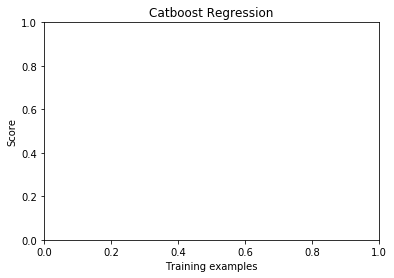

In [244]:
plot_learning_curve(cbr, "Catboost Regression", X, y)

# Test data Preprocessing

In [117]:
#test_data = pd.read_csv('test_car0408.csv',error_bad_lines=False, index_col=False, dtype='unicode')
test_data = pd.read_csv('test_car0408.csv')
test_data.info()

/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110586 entries, 0 to 110585
Data columns (total 19 columns):
ID                      110586 non-null int64
seller_type             110586 non-null object
country_of_use          110586 non-null object
scrapped_date           110586 non-null object
postal_code             110586 non-null object
car_name                110586 non-null object
car_type                96884 non-null object
year_of_registration    110586 non-null object
registration_month      110586 non-null int64
horse_power             110586 non-null object
mileage                 110585 non-null object
gas_type                102527 non-null object
car_brand               110585 non-null object
repair_status           92358 non-null object
gear_type               106084 non-null object
date_of_advert          110586 non-null object
last_advert_online      110585 non-null object
model                   105588 non-null object
Unnamed: 18             0 non-null float64
dtyp

In [118]:
# Check for duplicates
idsUnique = len(set(test_data.ID))
idsTotal = test_data.shape[0]
idsDupli = idsTotal - idsUnique
print(idsDupli)

#check two, we expect unique instances in Customer id to be equal to dataset size
print( "There are %s unique ids and the size of the dataset is %d " %(len(test_data.ID.unique()), len(test_data)))

0
There are 110586 unique ids and the size of the dataset is 110586 


In [119]:
categoricals_test = test_data.select_dtypes(np.object).columns
numericals_test = test_data.select_dtypes(np.number).columns
print(categoricals_test)
print(numericals_test)

Index(['seller_type', 'country_of_use', 'scrapped_date', 'postal_code',
       'car_name', 'car_type', 'year_of_registration', 'horse_power',
       'mileage', 'gas_type', 'car_brand', 'repair_status', 'gear_type',
       'date_of_advert', 'last_advert_online', 'model'],
      dtype='object')
Index(['ID', 'registration_month', 'Unnamed: 18'], dtype='object')


In [120]:
corrupt_columns = ['postal_code','year_of_registration',
                   'registration_month',  'date_of_advert', 'last_advert_online','horse_power']
for col in corrupt_columns:
    print('----------------')
    print(col)
    print(test_data[col].unique())

----------------
postal_code
[90480 67112 94505 ... 84187 95188 91623]
----------------
year_of_registration
[2006 2016 1997 2011 2018 1983 1993 1986 2008 2000 2012 1994 2005 2010
 2014 2001 2002 2004 2003 2009 2007 1998 1991 2017 1992 1987 2013 2015
 1996 1999 1975 1971 1973 1990 1995 1978 1989 1988 1976 1981 1985 1967
 1974 1982 1963 1979 1966 1968 1984 1977 1970 1972 1980 1969 1962 1965
 1961 1955 1959 1960 1958 1956 1953 1947 1964 1950 1952 1957 '2018' '1997'
 '2007' '2004' '2002' '2015' '2014' '2009' '2008' '1999' '1998' '2005'
 '2006' '2011' '2001' '1982' '2000' '2010' '2003' '1996' '1995' '1986'
 '1989' '2016' '2013' '1971' '2012' '1985' '2017' '1994' '1993' '1958'
 '1987' '1990' '1977' '1962' '1983' '1981' '1991' 'Angebot' '1976' '1992'
 '1980' '1973' '1984' '1968' '1974' '1972' '1957' '1970' '1953' '1967'
 '1975' '1969' '1988' '1978' '1966' '1959' '1979' '1954' '1961' '1965'
 'andere' 'limousine' 'bus' '1964' '1951' '1963' '1949' '1955' '1952' 1949
 1954]
----------------
regi

# Cleaning the data

In [121]:
dirty_words = ['150000','volkswagen', 'toyota', 'renault']
rgx = fr"(?i){'|'.join(dirty_words)}"
dirty_data = test_data[test_data.date_of_advert.str.contains(rgx, na=False)]
print("There are %s corrupted rows" %len(dirty_data)) #check how many rows
dirty_data

There are 5 corrupted rows


ID       seller_type  \
33564  101767           private   
42366  128253           private   
42367  128255  25/03/2016 11:45   
42368  128257  03/04/2016 22:52   
42369  128263  16/03/2016 20:52   

                                          country_of_use scrapped_date  \
33564                                             london    15/03/2016   
42366                                             london    27/03/2016   
42367                       Golf_3_GT_Special_mit_Tuning           NaT   
42368   Prius__Hybrid__+_1A_TOP_+_VOLLAUSSTATTUNG_+_IPA!           NaT   
42369  Renault_Grand_Scenic_1.9_dCi_TÜV_NEU.KLIMA._7S...           NaT   

      postal_code                                           car_name car_type  \
33564       86441  Sehr_Schoener_VW_Lupo_1_4_Sport__Bildschoene_O...   privat   
42366       22159                      SUCHE_OPEL_VECTRA_B.""SUCHE""   privat   
42367     Angebot                                                899     test   
42368     Angebot                                               7500  control   
42369     Angebot                                               3100  control   

      year_of_registration  registration_month horse_power     mileage  \
33564              Angebot                2690        test  kleinwagen   
42366              Angebot                   0        test         NaN   
42367               andere                1993     manuell          90   
42368            limousine                2006   automatik          77   
42369                  bus                2006     manuell         131   

      gas_type car_brand repair_status gear_type date_of_advert  \
33564     2002   manuell            75      lupo         150000   
42366     2000       NaN             0    vectra         150000   
42367     golf    150000             4    benzin     volkswagen   
42368   andere     90000             6    hybrid         toyota   
42369   andere    150000             6    diesel        renault   

      last_advert_online       model  Unnamed: 18  
33564                  8  volkswagen          NaN  
42366                  4        opel          NaN  
42367                NaN           0          NaN  
42368               nein           0          NaN  
42369               nein           0          NaN

In [122]:
print('before drop: ')
print(len(test_data))
cleaner = test_data[~test_data.date_of_advert.str.contains(rgx, na=False)]
print('after drop: ')
print(len(cleaner))
cleaner

before drop: 
110586
after drop: 
110581


ID seller_type country_of_use scrapped_date postal_code  \
0            2     private         london    14/03/2016       90480   
1            6     private         london    01/04/2016       67112   
2            7     private         london    04/04/2016       94505   
3           11     private         london    15/03/2016       37269   
4           12     private         london    21/03/2016       90762   
5           16     private         london    01/04/2016       49565   
6           17     private         london    01/04/2016       75365   
7           22     private         london    10/03/2016       31139   
8           24     private         london    09/03/2016       87471   
9           26     private         london    03/04/2016       53879   
10          30     private         london    11/03/2016        2943   
11          33     private         london    25/03/2016       22767   
12          35     private         london    24/03/2016       46119   
13          40     private         london    04/04/2016       86157   
14          41     private         london    25/03/2016       48499   
15          44     private         london    07/03/2016       66115   
16          49     private         london    21/03/2016       10435   
17          53     private         london    25/03/2016       71711   
18          54     private         london    30/03/2016       57076   
19          60     private         london    15/03/2016       86163   
20          79     private         london    23/03/2016       40210   
21          80     private         london    02/04/2016       57290   
22          85     private         london    26/03/2016       44623   
23          87     private         london    11/03/2016       23568   
24          88     private         london    28/03/2016       74223   
25          89     private         london    16/03/2016       88167   
26          91     private         london    26/03/2016       37130   
27          96     private         london    22/03/2016       83022   
28         101     private         london    09/03/2016       63526   
29         105     private         london    18/03/2016       57578   
...        ...         ...            ...           ...         ...   
110556  335007     private         london    30/03/2016       58097   
110557  335010     private         london    23/03/2016       77746   
110558  335012     private         london    27/03/2016       84453   
110559  335018     private         london    14/03/2016       47441   
110560  335023     private         london    28/03/2016       79206   
110561  335026     private         london    20/03/2016       57482   
110562  335030     private         london    14/03/2016       45326   
110563  335037     private         london    23/03/2016       94036   
110564  335039     private         london    23/03/2016       70191   
110565  335044     private         london    05/04/2016       59269   
110566  335048     private         london    16/03/2016       12057   
110567  335050     private         london    11/03/2016       18107   
110568  335052     private         london    19/03/2016       82256   
110569  335060     private         london    01/04/2016       85375   
110570  335064     private         london    15/03/2016       47228   
110571  335067     private         london    08/03/2016        1217   
110572  335069     private         london    04/04/2016       49086   
110573  335072     private         london    07/03/2016       10317   
110574  335076     private         london    15/03/2016       91186   
110575  335078     private         london    23/03/2016       91623   
110576  335081     private         london    12/03/2016       21147   
110577  335082     private         london    31/03/2016       35102   
110578  335083     private         london    07/03/2016       77694   
110579  335084     private         london    14/03/2016       83364   
110580  335090     private         l

In [123]:
for col in dirty_data.columns:
    print('----------------')
    print(col)
    print(test_data[col].unique())
    print(dirty_data[col].unique())

----------------
ID
[     2      6      7 ... 335107 335108 335110]
[101767 128253 128255 128257 128263]
----------------
seller_type
['private' '25/03/2016 11:45' '03/04/2016 22:52' '16/03/2016 20:52']
['private' '25/03/2016 11:45' '03/04/2016 22:52' '16/03/2016 20:52']
----------------
country_of_use
['london' 'Golf_3_GT_Special_mit_Tuning'
 'Prius__Hybrid__+_1A_TOP_+_VOLLAUSSTATTUNG_+_IPA!'
 'Renault_Grand_Scenic_1.9_dCi_TÜV_NEU.KLIMA._7Sitzer']
['london' 'Golf_3_GT_Special_mit_Tuning'
 'Prius__Hybrid__+_1A_TOP_+_VOLLAUSSTATTUNG_+_IPA!'
 'Renault_Grand_Scenic_1.9_dCi_TÜV_NEU.KLIMA._7Sitzer']
----------------
scrapped_date
['14/03/2016' '01/04/2016' '04/04/2016' '15/03/2016' '21/03/2016'
 '10/03/2016' '09/03/2016' '03/04/2016' '11/03/2016' '25/03/2016'
 '24/03/2016' '07/03/2016' '30/03/2016' '23/03/2016' '02/04/2016'
 '26/03/2016' '28/03/2016' '16/03/2016' '22/03/2016' '18/03/2016'
 '27/03/2016' '20/03/2016' '31/03/2016' '29/03/2016' '19/03/2016'
 '08/03/2016' '05/04/2016' '05/03/201

 '0' '9000' 'samara' 'kappa']
['volkswagen' 'opel' '0']
----------------
Unnamed: 18
[nan]
[nan]


In [124]:
#NEW METHOD

important_columns = ['car_type',
                                 'registration_month',
                                 'mileage','gas_type','car_brand','repair_status',
                                'gear_type']
for col in dirty_data.columns[1:-1]:
    print('----------------')
    print(col)
    print('before replacement')
    print(dirty_data[col].unique())
    dirty_data[col][dirty_data[dirty_data.registration_month != cleaner[col].mode()[0]].index]=cleaner[col].mode()[0]
    print('after replacement')
    print(dirty_data[col].unique())




----------------
seller_type
before replacement
['private' '25/03/2016 11:45' '03/04/2016 22:52' '16/03/2016 20:52']
after replacement
['private']
----------------
country_of_use
before replacement
['london' 'Golf_3_GT_Special_mit_Tuning'
 'Prius__Hybrid__+_1A_TOP_+_VOLLAUSSTATTUNG_+_IPA!'
 'Renault_Grand_Scenic_1.9_dCi_TÜV_NEU.KLIMA._7Sitzer']


/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:1079: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)
/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-

after replacement
['london']
----------------
scrapped_date
before replacement
['15/03/2016' '27/03/2016' 'NaT']
after replacement
['03/04/2016']
----------------
postal_code
before replacement
['86441' '22159' 'Angebot']
after replacement
[10115]
----------------
car_name
before replacement
['Sehr_Schoener_VW_Lupo_1_4_Sport__Bildschoene_Optik_Tuev_02/2018'
 'SUCHE_OPEL_VECTRA_B.""SUCHE""' '899' '7500' '3100']
after replacement
['Volkswagen_Golf_1.4']
----------------
car_type
before replacement
['privat' 'test' 'control']
after replacement
['limousine']
----------------
year_of_registration
before replacement
['Angebot' 'andere' 'limousine' 'bus']
after replacement
[2007]
----------------
registration_month
before replacement
[2690    0 1993 2006]
after replacement
[3]
----------------
horse_power
before replacement
['test' 'manuell' 'automatik']
after replacement
[0]
----------------
mileage
before replacement
['kleinwagen' nan '90' '77' '131']
after replacement
[241350]
------------

In [125]:
dirty_data

ID seller_type country_of_use scrapped_date  postal_code  \
33564  101767     private         london    03/04/2016        10115   
42366  128253     private         london    03/04/2016        10115   
42367  128255     private         london    03/04/2016        10115   
42368  128257     private         london    03/04/2016        10115   
42369  128263     private         london    03/04/2016        10115   

                  car_name   car_type  year_of_registration  \
33564  Volkswagen_Golf_1.4  limousine                  2007   
42366  Volkswagen_Golf_1.4  limousine                  2007   
42367  Volkswagen_Golf_1.4  limousine                  2007   
42368  Volkswagen_Golf_1.4  limousine                  2007   
42369  Volkswagen_Golf_1.4  limousine                  2007   

       registration_month  horse_power  mileage  gas_type   car_brand  \
33564                   3            0   241350  gasoline  volkswagen   
42366                   3            0   241350  gasoline  volkswagen   
42367                   3            0   241350  gasoline  volkswagen   
42368                   3            0   241350  gasoline  volkswagen   
42369                   3            0   241350  gasoline  volkswagen   

      repair_status gear_type date_of_advert last_advert_online model  \
33564          nein   manuell     03/04/2016         06/04/2016  golf   
42366          nein   manuell     03/04/2016         06/04/2016  golf   
42367          nein   manuell     03/04/2016         06/04/2016  golf   
42368          nein   manuell     03/04/2016         06/04/2016  golf   
42369          nein   manuell     03/04/2016         06/04/2016  golf   

       Unnamed: 18  
33564          NaN  
42366          NaN  
42367          NaN  
42368          NaN  
42369          NaN

In [126]:
test_data.update(dirty_data)

In [127]:
len(test_data)

110586

In [128]:
print(test_data['repair_status'].unique())
test_data['repair_status'] = test_data['repair_status'].replace('nein','No')
test_data['repair_status'] = test_data['repair_status'].replace('ja','Yes')
print(test_data['repair_status'].unique())

[nan 'nein' 'ja']
[nan 'No' 'Yes']


### Fix wrong data type columns and null values

In [129]:
#lets start with the datetime columns

#Convert columns to datetime
date_time = test_data[['scrapped_date','date_of_advert', 'last_advert_online']]

for col in date_time:
    print('Before conversion')
    print(test_data[col].dtype)
    test_data[col] = pd.to_datetime(test_data[col], format='%d/%m/%Y')
    print('After conversion')
    print(test_data[col].dtype)

Before conversion
object
After conversion
datetime64[ns]
Before conversion
object
After conversion
datetime64[ns]
Before conversion
object
After conversion
datetime64[ns]


In [130]:
#now to convert to integers
print("Before conversion")
print(test_data[['ID','horse_power',
                 'year_of_registration', 'registration_month','mileage']].dtypes)
test_data[['ID','horse_power',
                 'year_of_registration', 'registration_month','mileage']] = test_data[['ID','horse_power',
                 'year_of_registration', 'registration_month','mileage']].astype(int)
print("After conversion")
print(test_data[['ID','horse_power',
                 'year_of_registration', 'registration_month','mileage']].dtypes)

Before conversion
ID                      float64
horse_power              object
year_of_registration     object
registration_month      float64
mileage                  object
dtype: object
After conversion
ID                      int64
horse_power             int64
year_of_registration    int64
registration_month      int64
mileage                 int64
dtype: object


In [131]:
test_data.isnull().sum()

ID                           0
seller_type                  0
country_of_use               0
scrapped_date                0
postal_code                  0
car_name                     0
car_type                 13702
year_of_registration         0
registration_month           0
horse_power                  0
mileage                      0
gas_type                  8059
car_brand                    0
repair_status            18228
gear_type                 4502
date_of_advert               0
last_advert_online           0
model                     4998
Unnamed: 18             110586
dtype: int64

In [132]:
total = test_data.isnull().sum().sort_values(ascending=False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Unnamed: 18           110586  1.000000
repair_status          18228  0.164831
car_type               13702  0.123904
gas_type                8059  0.072875
model                   4998  0.045196
gear_type               4502  0.040710
seller_type                0  0.000000
country_of_use             0  0.000000
scrapped_date              0  0.000000
postal_code                0  0.000000
car_name                   0  0.000000
horse_power                0  0.000000
year_of_registration       0  0.000000
registration_month         0  0.000000
mileage                    0  0.000000
car_brand                  0  0.000000
date_of_advert             0  0.000000
last_advert_online         0  0.000000
ID                         0  0.000000

In [133]:
#Input missing values
#make a new dataframe to store result of approach 1
test_mode = test_data.copy()
test_mode['repair_status'].fillna(test_mode['repair_status'].mode()[0], inplace=True)
test_mode['car_type'].fillna(test_mode['car_type'].mode()[0], inplace=True)
test_mode['gas_type'].fillna(test_mode['gas_type'].mode()[0], inplace=True)
test_mode['gear_type'].fillna(test_mode['gear_type'].mode()[0], inplace=True)
test_mode['model'].fillna(test_mode['model'].mode()[0], inplace=True)

In [134]:
total = test_mode.isnull().sum().sort_values(ascending=False)
percent = (test_mode.isnull().sum()/test_mode.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
Unnamed: 18           110586      1.0
registration_month         0      0.0
seller_type                0      0.0
country_of_use             0      0.0
scrapped_date              0      0.0
postal_code                0      0.0
car_name                   0      0.0
car_type                   0      0.0
year_of_registration       0      0.0
horse_power                0      0.0
model                      0      0.0
mileage                    0      0.0
gas_type                   0      0.0
car_brand                  0      0.0
repair_status              0      0.0
gear_type                  0      0.0
date_of_advert             0      0.0
last_advert_online         0      0.0
ID                         0      0.0

In [135]:
#create Age from Permit registration year
#Let us get the age of the car from Year of registration - today's year
test_mode['age'] = pd.to_datetime('today').year - test_mode.year_of_registration
test_mode['age'].head(4) #check

0    13
1    13
2     3
3    22
Name: age, dtype: int64

In [136]:
test_mode.describe()

ID  year_of_registration  registration_month    horse_power  \
count  110586.000000         110586.000000       110586.000000  110586.000000   
mean   167455.973903           2005.721529            5.919239     120.660952   
std     96664.732298              7.301825            3.627603     185.031410   
min         2.000000           1947.000000            0.000000       0.000000   
25%     83553.750000           2002.000000            3.000000      75.000000   
50%    167427.000000           2006.000000            6.000000     110.000000   
75%    251132.250000           2010.000000            9.000000     150.000000   
max    335110.000000           2018.000000           12.000000   17322.000000   

             mileage  Unnamed: 18            age  
count  110586.000000          0.0  110586.000000  
mean   201634.605420          NaN      13.278471  
std     63539.287798          NaN       7.301825  
min      8045.000000          NaN       1.000000  
25%    160900.000000          NaN       9.000000  
50%    241350.000000          NaN      13.000000  
75%    241350.000000          NaN      17.000000  
max    241350.000000          NaN      72.000000

In [137]:
#input the 0s in horse power and registration month with mode

cols = ['horse_power']

for col in cols:
    test_mode[col]= test_mode[col].mask(test_mode[col]== 0,
                                        test_mode[col].median())
    




In [138]:
test_mode.registration_month.value_counts()

3     11067
6     10107
4      9531
5      9318
7      8817
10     8484
0      8248
11     7876
9      7795
12     7667
8      7463
1      7456
2      6757
Name: registration_month, dtype: int64

In [139]:
test_mode['registration_month']= test_mode['registration_month'].mask(test_mode['registration_month']== 0,
                                        3)

In [140]:
test_mode.registration_month.value_counts()

3     19315
6     10107
4      9531
5      9318
7      8817
10     8484
11     7876
9      7795
12     7667
8      7463
1      7456
2      6757
Name: registration_month, dtype: int64

In [141]:
test_mode.describe()

ID  year_of_registration  registration_month    horse_power  \
count  110586.000000         110586.000000       110586.000000  110586.000000   
mean   167455.973903           2005.721529            6.142993     130.242906   
std     96664.732298              7.301825            3.336432     181.346288   
min         2.000000           1947.000000            1.000000       1.000000   
25%     83553.750000           2002.000000            3.000000      90.000000   
50%    167427.000000           2006.000000            6.000000     110.000000   
75%    251132.250000           2010.000000            9.000000     150.000000   
max    335110.000000           2018.000000           12.000000   17322.000000   

             mileage  Unnamed: 18            age  
count  110586.000000          0.0  110586.000000  
mean   201634.605420          NaN      13.278471  
std     63539.287798          NaN       7.301825  
min      8045.000000          NaN       1.000000  
25%    160900.000000          NaN       9.000000  
50%    241350.000000          NaN      13.000000  
75%    241350.000000          NaN      17.000000  
max    241350.000000          NaN      72.000000

In [142]:
test_mode['brand_cat'] = None
test_mode.loc[test_mode['car_brand'].isin(other),'brand_cat'] = 'other'
test_mode.loc[test_mode['car_brand'].isin(budget),'brand_cat'] = 'budget'
test_mode.loc[test_mode['car_brand'].isin(budget_plus),'brand_cat'] = 'budget_plus'
test_mode.loc[test_mode['car_brand'].isin(mid_minus),'brand_cat']= 'mid_minus'
test_mode.loc[test_mode['car_brand'].isin(mid_range),'brand_cat']= 'mid_range'
test_mode.loc[test_mode['car_brand'].isin(mid_plus),'brand_cat']= 'mid_plus'
test_mode.loc[test_mode['car_brand'].isin(premium_minus),'brand_cat']= 'premium_minus'
test_mode.loc[test_mode['car_brand'].isin(premium),'brand_cat']= 'premium'





In [245]:
test_mode_dropped = test_mode[['car_type','car_brand','age',
                                 'registration_month','horse_power',
                                 'mileage','gas_type','repair_status',
                                'gear_type']]
test_mode_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110586 entries, 0 to 110585
Data columns (total 9 columns):
car_type              110586 non-null object
car_brand             110586 non-null object
age                   110586 non-null int64
registration_month    110586 non-null int64
horse_power           110586 non-null int64
mileage               110586 non-null int64
gas_type              110586 non-null object
repair_status         110586 non-null object
gear_type             110586 non-null object
dtypes: int64(4), object(5)
memory usage: 7.6+ MB


In [246]:
#convert cat columns to one hot encoding
test_X = test_mode_dropped

col = test_mode_dropped.select_dtypes(np.object).columns
col = list(col)
col.append('registration_month')
test_X =pd.get_dummies(test_X, columns=col,prefix=col)
test_X.head()

age  horse_power  mileage  car_type_bus  car_type_convertible  \
0   13          163   201125             0                     0   
1   13          109   241350             0                     1   
2    3          125    48270             1                     0   
3   22          115   241350             0                     0   
4   13          131   241350             0                     0   

   car_type_coupé  car_type_limousine  car_type_other  car_type_small car  \
0               0                   1               0                   0   
1               0                   0               0                   0   
2               0                   0               0                   0   
3               0                   0               0                   0   
4               0                   0               0                   0   

   car_type_station wagon  ...  registration_month_3  registration_month_4  \
0                       0  ...                     0                     0   
1                       0  ...                     0                     0   
2                       0  ...                     0                     0   
3                       1  ...                     0                     0   
4                       1  ...                     0                     0   

   registration_month_5  registration_month_6  registration_month_7  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   registration_month_8  registration_month_9  registration_month_10  \
0                     1                     0                      0   
1                     1                     0                      0   
2                     1                     0                      0   
3                     0                     0                      0   
4                     0                     0                      0   

   registration_month_11  registration_month_12  
0                      0                      0  
1                      0                      0  
2                      0                      0  
3                      1                      0  
4                      0                      0  

[5 rows x 71 columns]

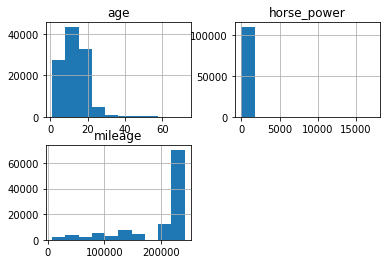

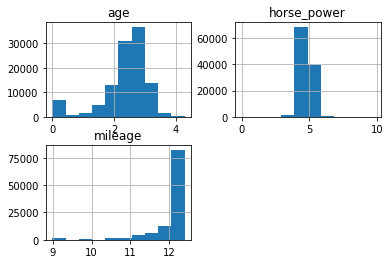

In [247]:
test_X[['horse_power','mileage','age']].hist()
plt.show();
test_X['age'] = np.log(test_X['age'])
test_X['horse_power'] = np.log(test_X['horse_power'])
test_X['mileage'] = np.log(test_X['mileage'])
test_X[['horse_power','mileage','age']].hist()
plt.show();

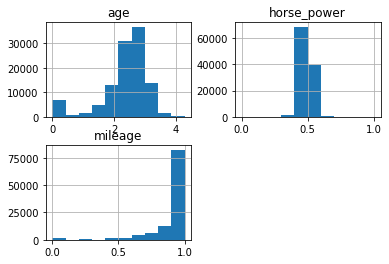

In [248]:
#Rescaling the numerical features

test_X['horse_power'] =  scaler.fit_transform(test_X['horse_power'].values.reshape(-1,1))
test_X['mileage'] =  scaler.fit_transform(test_X['mileage'].values.reshape(-1,1))
#test_X['age'] = np.log(test_X['age'])

test_X[['horse_power','mileage','age',]].hist();

In [249]:
test_X.columns

Index(['age', 'horse_power', 'mileage', 'car_type_bus', 'car_type_convertible',
       'car_type_coupé', 'car_type_limousine', 'car_type_other',
       'car_type_small car', 'car_type_station wagon', 'car_brand_alfa_romeo',
       'car_brand_audi', 'car_brand_bmw', 'car_brand_chevrolet',
       'car_brand_chrysler', 'car_brand_citroen', 'car_brand_dacia',
       'car_brand_daewoo', 'car_brand_daihatsu', 'car_brand_fiat',
       'car_brand_ford', 'car_brand_honda', 'car_brand_hyundai',
       'car_brand_innoson', 'car_brand_jeep', 'car_brand_kia',
       'car_brand_land_rover', 'car_brand_lotus', 'car_brand_mazda',
       'car_brand_mercedes_benz', 'car_brand_mini', 'car_brand_mitsubishi',
       'car_brand_nissan', 'car_brand_opel', 'car_brand_peugeot',
       'car_brand_porsche', 'car_brand_renault', 'car_brand_rover',
       'car_brand_saab', 'car_brand_seat', 'car_brand_skoda',
       'car_brand_smart', 'car_brand_sonstige_autos', 'car_brand_subaru',
       'car_brand_suzuki', 'car_

In [250]:
X.columns

Index(['age', 'horse_power', 'mileage', 'car_type_bus', 'car_type_convertible',
       'car_type_coupé', 'car_type_limousine', 'car_type_other',
       'car_type_small car', 'car_type_station wagon', 'car_brand_alfa_romeo',
       'car_brand_audi', 'car_brand_bmw', 'car_brand_chevrolet',
       'car_brand_chrysler', 'car_brand_citroen', 'car_brand_dacia',
       'car_brand_daewoo', 'car_brand_daihatsu', 'car_brand_fiat',
       'car_brand_ford', 'car_brand_honda', 'car_brand_hyundai',
       'car_brand_innoson', 'car_brand_jeep', 'car_brand_kia',
       'car_brand_land_rover', 'car_brand_lotus', 'car_brand_mazda',
       'car_brand_mercedes_benz', 'car_brand_mini', 'car_brand_mitsubishi',
       'car_brand_nissan', 'car_brand_opel', 'car_brand_peugeot',
       'car_brand_porsche', 'car_brand_renault', 'car_brand_rover',
       'car_brand_saab', 'car_brand_seat', 'car_brand_skoda',
       'car_brand_smart', 'car_brand_sonstige_autos', 'car_brand_subaru',
       'car_brand_suzuki', 'car_

In [293]:
print(test_mode_dropped.repair_status.unique())
train_mode_dropped.repair_status.unique()

AttributeError: 'DataFrame' object has no attribute 'repair_status'

# Model Prediction on Test Data


We will use the catboost model as it seems to generalize well, and gave the smallest RMSE

In [271]:
test_prediction =  cbr.predict(test_X)

In [272]:
#Save prediction for Kaggle submission
output = pd.DataFrame({'ID':test_mode.ID, 'naira_price':test_prediction.round()})
output.to_csv('SSI_cbr10.csv', index=False)

In [273]:
print(len(output))
output

110586


ID  naira_price
0            2    3258454.0
1            6    1243621.0
2            7    6330928.0
3           11     515978.0
4           12    1441891.0
5           16    1468893.0
6           17    4271877.0
7           22    1563522.0
8           24    4616795.0
9           26    1014686.0
10          30     709834.0
11          33    1594038.0
12          35    5151600.0
13          40    1000629.0
14          41    1709605.0
15          44     473023.0
16          49   15250554.0
17          53    2345158.0
18          54    1992096.0
19          60     763197.0
20          79    1411611.0
21          80    1404744.0
22          85    2402220.0
23          87    1953219.0
24          88    1298091.0
25          89    9614864.0
26          91     751903.0
27          96    7733047.0
28         101    2257883.0
29         105    1187010.0
...        ...          ...
110556  335007     593635.0
110557  335010     222077.0
110558  335012     579426.0
110559  335018     467082.0
110560  335023    2320463.0
110561  335026    1898748.0
110562  335030    2541140.0
110563  335037    1933381.0
110564  335039    1435414.0
110565  335044    1832664.0
110566  335048    1588118.0
110567  335050     950025.0
110568  335052     540050.0
110569  335060    3043772.0
110570  335064    1049388.0
110571  335067    1694333.0
110572  335069     484961.0
110573  335072    5905778.0
110574  335076    4796407.0
110575  335078     775654.0
110576  335081   13179781.0
110577  335082     408062.0
110578  335083    8433207.0
110579  335084    2862346.0
110580  335090    1006698.0
110581  335094    1893504.0
110582  335103    1755973.0
110583  335107    2122120.0
110584  335108     767049.0
110585  335110    2026932.0

[110586 rows x 2 columns]

Notes:

Car price usually depends on brand and model, age,
horsepower and mileage. The fuel type used in the
car as well as fuel consumption per mile highly affect
price of a car due to a frequent changes in the price of
a fuel.